In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

We retrieved functional domain annotation. E-value column denotes a confidence score, similar to BLAST E-scores. E-values are dependent on the size of the database, hence the in-house developed bit score is used, which is not dependent on database size. Entries are grouped together in clans. 

In [3]:
pfam = pd.read_csv("9606.tsv", sep="\t")
print(pfam.shape[0])
pfam.rename({"seq id": "ACC_ID"}, axis=1, inplace=True)
pfam.head(10)

113100


ACC_ID  allignment start  allignment end  envelope start  envelope end  \
0  A0A024QZ33                 5             123               4           123   
1  A0A024QZ33               239             416             238           416   
2  A0A024QZ42                25              83              22            86   
3  A0A024QZP7                 4             287               4           287   
4  A0A024QZW4                48             339              48           339   
5  A0A024QZX5                11             380              10           380   
6  A0A024R0K5                40             140              38           141   
7  A0A024R0K5               240             318             239           318   
8  A0A024R0K5               418             496             417           496   
9  A0A024R0K5               596             674             595           674   

   hmm acc   hmm name         type  hmm start  hmm end  hmm length  bit score  \
0  PF09745    NSRP1_N  Coiled-coil          2      121         121      124.8   
1  PF20427     NRP1_C       Domain          2      178         178      249.7   
2  PF13499  EF-hand_7       Domain          4       68          71       42.2   
3  PF00069    Pkinase       Domain          1      264         264      257.7   
4  PF08449        UAA       Family          1      307         307      315.4   
5  PF00079     Serpin       Domain          2      370         370      434.6   
6  PF07686      V-set       Domain          3      108         109       49.8   
7  PF13895       Ig_2       Domain          2       79          79       65.2   
8  PF13895       Ig_2       Domain          2       79          79       61.4   
9  PF13895       Ig_2       Domain          2       79          79       41.9   

    E-value     clan  
0   6.1e-33  No_clan  
1   4.9e-71  No_clan  
2   2.8e-07   CL0220  
3   3.7e-73   CL0016  
4   1.2e-90   CL0184  
5  1.2e-126  No_clan  
6   1.1e-09   CL0011  
7   1.7e-14   CL0011  
8   2.6e-13   CL0011  
9   3.2e-07   CL0011

In [5]:
pfam_sub = pfam[["ACC_ID", "hmm start", "hmm end", "hmm name", "type", "clan", "E-value"]]
pfam_sub["E-value"] = pfam_sub["E-value"].str.replace("E", "e")
pfam_sub["E-value"] = pfam_sub["E-value"].str.replace(",", ".")
pfam_sub["E-value"] = pfam_sub["E-value"].astype("float")
pfam_sub.head()

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3889640521.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfam_sub["E-value"] = pfam_sub["E-value"].str.replace("E", "e")
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3889640521.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pfam_sub["E-value"] = pfam_sub["E-value"].str.replace(",", ".")
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3889640521.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

ACC_ID  hmm start  hmm end   hmm name         type     clan  \
0  A0A024QZ33          2      121    NSRP1_N  Coiled-coil  No_clan   
1  A0A024QZ33          2      178     NRP1_C       Domain  No_clan   
2  A0A024QZ42          4       68  EF-hand_7       Domain   CL0220   
3  A0A024QZP7          1      264    Pkinase       Domain   CL0016   
4  A0A024QZW4          1      307        UAA       Family   CL0184   

        E-value  
0  6.100000e-33  
1  4.900000e-71  
2  2.800000e-07  
3  3.700000e-73  
4  1.200000e-90

In [6]:
print(pfam_sub[pfam_sub["E-value"]<=1].shape[0])
pfam_sub[pfam_sub["E-value"]<=1].head()

106522


ACC_ID  hmm start  hmm end   hmm name         type     clan  \
0  A0A024QZ33          2      121    NSRP1_N  Coiled-coil  No_clan   
1  A0A024QZ33          2      178     NRP1_C       Domain  No_clan   
2  A0A024QZ42          4       68  EF-hand_7       Domain   CL0220   
3  A0A024QZP7          1      264    Pkinase       Domain   CL0016   
4  A0A024QZW4          1      307        UAA       Family   CL0184   

        E-value  
0  6.100000e-33  
1  4.900000e-71  
2  2.800000e-07  
3  3.700000e-73  
4  1.200000e-90

In [7]:
data_site= pd.read_csv("site_data", sep="\t")
print(data_site.shape[0])
data_site.drop(["Total"], axis=1, inplace=True)
data_site.head()

23903


ACC_ID  UP_POS           tissue modres  Adipose tissue  B-cells  Blood  \
0  A0A075B6H7      30             Lung      T               0        0      0   
1  A0A075B6S5      52  Menstrual fluid      S               0        0      0   
2  A0A087WXM9     223           Testis      S               0        0      0   
3  A0A0B4J2D5     124             PBMC      S               0        0      0   
4  A0A0B4J2D5     145             PBMC      T               0        0      0   

   Bone  Brain  Breast  ...  Skin  Small intestine  Synovial tissue  T-cells  \
0     0      0       0  ...     0                0                0        0   
1     0      0       0  ...     0                0                0        0   
2     0      0       0  ...     0                0                0        0   
3     0      0       0  ...     0                0                0        0   
4     0      0       0  ...     0                0                0        0   

   Testis  Tooth  Umbilical cord  Ureter  Urinary bladder  Urine  
0       0      0               0       0                0      0  
1       0      0               0       0                0      0  
2       1      0               0       0                0      0  
3       0      0               0       0                0      0  
4       0      0               0       0                0      0  

[5 rows x 45 columns]

In [9]:
tspec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
print(tspec_sites.shape[0])
print(tspec_sites["ACC_ID"].nunique())
tspec_sites_pfam = pd.merge(tspec_sites, pfam_sub, how="inner")
tspec_sites_pfam = tspec_sites_pfam.loc[(tspec_sites_pfam["UP_POS"]>=tspec_sites_pfam["hmm start"])&
                                             (tspec_sites_pfam["UP_POS"]<=tspec_sites_pfam["hmm end"]),:]
tspec_sites_pfam = tspec_sites_pfam[tspec_sites_pfam["E-value"]<=1]
print(tspec_sites_pfam.shape[0])
print(tspec_sites_pfam["ACC_ID"].nunique())
tspec_sites_pfam.head()

14019
4977
5386
2017


ACC_ID  UP_POS             tissue modres  Adipose tissue  B-cells  \
0  A0A075B6H7      30               Lung      T               0        0   
1  A0A075B6S5      52    Menstrual fluid      S               0        0   
2  A0A0B4J2D9      52  Blood,Blood,Blood      S               0        0   
4  A0A0C4DH24      75    Skeletal muscle      S               0        0   
5  A0A0C4DH67      50              Blood      S               0        0   

   Blood  Bone  Brain  Breast  ...  Ureter  Urinary bladder  Urine  Total  \
0      0     0      0       0  ...       0                0      0      1   
1      0     0      0       0  ...       0                0      0      1   
2      1     0      0       0  ...       0                0      0      1   
4      0     0      0       0  ...       0                0      0      1   
5      1     0      0       0  ...       0                0      0      1   

   hmm start  hmm end  hmm name    type    clan       E-value  
0          1       91     V-set  Domain  CL0011  1.100000e-13  
1          1       92     V-set  Domain  CL0011  2.200000e-13  
2          1       92     V-set  Domain  CL0011  7.100000e-13  
4          2       91     V-set  Domain  CL0011  1.200000e-11  
5          1       91     V-set  Domain  CL0011  1.100000e-11  

[5 rows x 52 columns]

In [10]:
print(tspec_sites_pfam[(tspec_sites_pfam["type"]=="Domain")|(tspec_sites_pfam["type"]=="Family")].groupby(["ACC_ID", "UP_POS"]).agg({"type":"first"}).shape[0])

3336


In [11]:
taspec_sites = pd.read_csv("1.2 non tissue-specific sites.tsv", sep="\t")
print(taspec_sites.shape[0])
print(taspec_sites["ACC_ID"].nunique())
taspec_sites_pfam = pd.merge(taspec_sites, pfam_sub, how="inner")
taspec_sites_pfam = taspec_sites_pfam.loc[(taspec_sites_pfam["UP_POS"]>=taspec_sites_pfam["hmm start"])&
                                             (taspec_sites_pfam["UP_POS"]<=taspec_sites_pfam["hmm end"]),:]
taspec_sites_pfam = taspec_sites_pfam[taspec_sites_pfam["E-value"]<=1]
print(taspec_sites_pfam.shape[0])
print(taspec_sites_pfam["ACC_ID"].nunique())
taspec_sites_pfam.head()

6478
2718
2634
1053


ACC_ID  UP_POS                                             tissue modres  \
22  A0M8Q6      31  Nasal polyps, Palatine tonsils, Parotid gland,...      S   
23  A1L390      76  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S   
24  A1L390      76  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S   
25  A2RRP1     473  Blood,Blood,Blood,Blood,Blood,Placenta,Placent...      S   
27  A3KN83     214  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S   

    Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
22               0        0      0     0      0       0  ...       0   
23               0        0      0     0      0       0  ...       0   
24               0        0      0     0      0       0  ...       0   
25               0        0      1     0      0       0  ...       0   
27               0        0      0     0      0       0  ...       0   

    Urinary bladder  Urine  Total  hmm start  hmm end      hmm name    type  \
22                0      0      3          1       85        C1-set  Domain   
23                0      0      2          1      183        RhoGEF  Domain   
24                0      0      2         20      104            PH  Domain   
25                0      0      3          1      737         Sec39  Family   
27                0      0      2          1      271  Helicase_C_4  Domain   

       clan        E-value  
22   CL0011   2.100000e-27  
23  No_clan   7.400000e-41  
24   CL0266   6.400000e-04  
25  No_clan   4.200000e-24  
27   CL0023  2.200000e-119  

[5 rows x 52 columns]

In [12]:
print(taspec_sites_pfam[(taspec_sites_pfam["type"]=="Domain")|(taspec_sites_pfam["type"]=="Family")].groupby(["ACC_ID", "UP_POS"]).agg({"type":"first"}).shape[0])

1660


In [13]:
gen_sites = pd.read_csv("1.2 general P sites.tsv", sep="\t")
gen_sites_pfam = pd.merge(gen_sites, pfam_sub, how="inner")
print(gen_sites.shape[0])
print(gen_sites["ACC_ID"].nunique())
gen_sites_pfam = gen_sites_pfam.loc[(gen_sites_pfam["UP_POS"]>=gen_sites_pfam["hmm start"])&
                                             (gen_sites_pfam["UP_POS"]<=gen_sites_pfam["hmm end"]),:]
gen_sites_pfam = gen_sites_pfam[gen_sites_pfam["E-value"]<=1]
print(gen_sites_pfam.shape[0])
print(gen_sites_pfam["ACC_ID"].nunique())
gen_sites_pfam.head()

3406
1368
1409
486


ACC_ID  UP_POS                                             tissue  \
0   A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
23      A5PKW4      68  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
24      A5PKW4      68  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
25      A5PKW4      86  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
26      A5PKW4      86  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   

   modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
0       S               0        0      1     0      1       0  ...       0   
23      T               0        0      1     0      1       0  ...       0   
24      T               0        0      1     0      1       0  ...       0   
25      S               0        0      1     0      1       0  ...       0   
26      S               0        0      1     0      1       0  ...       0   

    Urinary bladder  Urine  Total  hmm start  hmm end  hmm name    type  \
0                 0      0      7          9       91     V-set  Domain   
23                0      0      7         32      182      Sec7  Domain   
24                0      0      7          1      101        PH  Domain   
25                0      0      7         32      182      Sec7  Domain   
26                0      0      7          1      101        PH  Domain   

       clan       E-value  
0    CL0011  7.200000e-07  
23  No_clan  1.800000e-38  
24   CL0266  2.600000e-08  
25  No_clan  1.800000e-38  
26   CL0266  2.600000e-08  

[5 rows x 52 columns]

In [14]:
print(gen_sites_pfam[(gen_sites_pfam["type"]=="Domain")|(gen_sites_pfam["type"]=="Family")].groupby(["ACC_ID", "UP_POS"]).agg({"type":"first"}).shape[0])

930


# 1. Domains associated with the three different kind of proteins

We'll now have a look at the different types of functional domains associated with the three different kinds of proteins.

In [15]:
tspec_sites_pfam["hmm name"].value_counts()

Pkinase        151
Filament       140
Filamin        104
Plectin         88
Histone         82
              ... 
TP2              1
zf-C3HC4         1
RAWUL            1
MAM33            1
zf_C2H2_ZHX      1
Name: hmm name, Length: 1473, dtype: int64

In [16]:
taspec_sites_pfam["hmm name"].value_counts()

Pkinase           98
Filament          90
Actin             76
Filamin           65
Histone           61
                  ..
PA28_alpha         1
PA28_beta          1
Ribosomal_L15e     1
Cpn10              1
DNA_methylase      1
Name: hmm name, Length: 882, dtype: int64

In [17]:
gen_sites_pfam["hmm name"].value_counts()

Actin             95
Pkinase           49
Filament          48
Annexin           32
THRAP3_BCLAF1     22
                  ..
HABP4_PAI-RBP1     1
IHABP4_N           1
Ribosomal_60s      1
E3_UbLigase_R4     1
V-set              1
Name: hmm name, Length: 391, dtype: int64

In [18]:
tspec_sites_pfam["type"].value_counts()

Domain         3025
Family         1736
Repeat          341
Coiled-coil     238
Disordered       40
Motif             6
Name: type, dtype: int64

In [19]:
taspec_sites_pfam["type"].value_counts()

Domain         1505
Family          862
Coiled-coil     143
Repeat           97
Disordered       24
Motif             3
Name: type, dtype: int64

In [20]:
gen_sites_pfam["type"].value_counts()

Domain         673
Family         565
Repeat          96
Coiled-coil     64
Disordered      11
Name: type, dtype: int64

The following clans can be distinguished (with their name and, if applicable, some explanation):
- CL0023: P-loop_NTPase, protein NTP hydrolase superfamily
- CL0011: Immunoglobulin superfamily
- CL0016: PKinase, proteins kinase superfamily
- CL0159: Ig-like superfamily (E-set)

In [21]:
tspec_sites_pfam["clan"].value_counts()

No_clan    1978
CL0023      240
CL0016      195
CL0159      192
CL0020      144
           ... 
CL0104        1
CL0290        1
CL0330        1
CL0492        1
CL0423        1
Name: clan, Length: 280, dtype: int64

The following clans can be distinguished (with their name and, if applicable, some explanation):
- CL0108: Actin ATPase
- CL0023: P-loop_NTPase, protein NTP hydrolase superfamily
- CL0016: PKinase, proteins kinase superfamily
- CL0012: histone superfamily

In [22]:
taspec_sites_pfam["clan"].value_counts()

No_clan    969
CL0023     169
CL0159     116
CL0016     113
CL0108     108
          ... 
CL0293       1
CL0363       1
CL0458       1
CL0492       1
CL0679       1
Name: clan, Length: 209, dtype: int64

The following clans can be distinguished (with their name and, if applicable, some explanation):
- CL0108: Actin_ATPase, Actin-like ATPase superfamily
- CL0442: TubulinC
- CL0016: PKinase, proteins kinase superfamily
- CL0023: P-loop_NTPase, protein NTP hydrolase superfamily

In [23]:
gen_sites_pfam["clan"].value_counts()

No_clan    551
CL0108     100
CL0023      60
CL0016      51
CL0020      37
          ... 
CL0479       1
CL0145       1
CL0121       1
CL0022       1
CL0265       1
Name: clan, Length: 130, dtype: int64

In [24]:
print(tspec_sites_pfam[tspec_sites_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(tspec_sites_pfam[tspec_sites_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

1978
868


In [25]:
print(taspec_sites_pfam[taspec_sites_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(taspec_sites_pfam[taspec_sites_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

969
452


In [26]:
print(gen_sites_pfam[gen_sites_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(gen_sites_pfam[gen_sites_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

551
208


# 2. Spread of domain annotation across tissues

In [27]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = tspec_sites_pfam.loc[tspec_sites_pfam[tissue]==1, :]["ACC_ID"].count()
    count_taspec = taspec_sites_pfam.loc[taspec_sites_pfam[tissue]==1, :]["ACC_ID"].count()
    count_gen = gen_sites_pfam.loc[gen_sites_pfam[tissue]==1, :]["ACC_ID"].count()
    count_total = count_tspec + count_taspec + count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues["Number of tissue-specific phosphosites"] = list_tspec
df_spread_tissues["Number of tissue aspecific phosphosites"] = list_taspec
df_spread_tissues["Number of pervasive phosphosites"] = list_gen
df_spread_tissues["Total"] = list_total
df_spread_tissues

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                       6   
2                       Blood                                     559   
3                        Bone                                       2   
4                       Brain                                      76   
5                      Breast                                      16   
6         Cerebrospinal fluid                                       2   
7                      Cervix                                       4   
8                       Colon                                    1620   
9               Dental plaque                                      19   
10                  Esophagus                                       0   
11                        Eye                                       0   
12           Follicular fluid                                       0   
13                      Heart                                      12   
14                       Hela                                       0   
15                     Kidney                                       3   
16                      Liver                                      98   
17                       Lung                                     444   
18                 Lymph node                                     659   
19            Menstrual fluid                                       1   
20                  Monocytes                                      22   
21               Nasal polyps                                       0   
22                   NK-cells                                      11   
23                      Ovary                                       2   
24                   Pancreas                                      15   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     522   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     427   
30            Skeletal muscle                                     139   
31                       Skin                                     429   
32            Small intestine                                      73   
33            Synovial tissue                                       0   
34                    T-cells                                       0   
35                     Testis                                     113   
36                      Tooth                                       0   
37             Umbilical cord                                      51   
38                     Ureter                                       3   
39            Urinary bladder                                      28   
40                      Urine                                      30   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       119                               199   
1                                        32                                87   
2                                       835                              1185   
3                                         2                                 4   
4                                        93                               924   
5                                        32                                60   
6                                        16                               872   
7                                        13                                12   
8                                      1316                               658   
9                                        10                                20   
10                                        7                      

<AxesSubplot:title={'center':'Number of phosphosites in each of the three categories for which the phopshosite is inside a domain'}, xlabel='Tissue'>

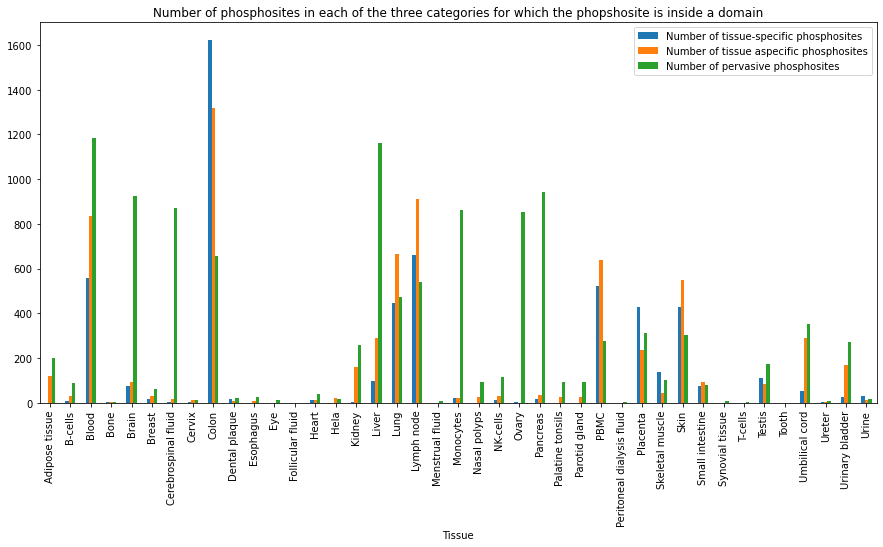

In [28]:
df_spread_tissues[["Tissue", "Number of tissue-specific phosphosites", "Number of tissue aspecific phosphosites", "Number of pervasive phosphosites"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphosites in each of the three categories for which the phopshosite is inside a domain")
#plt.savefig("WP2 Pfam_phosphosites inside a functional domain.png", format="png", bbox_inches="tight")

<AxesSubplot:title={'center':'Ratio phosphosites in a domain for each of the three categories compared to total phosphosites'}, xlabel='Tissue'>

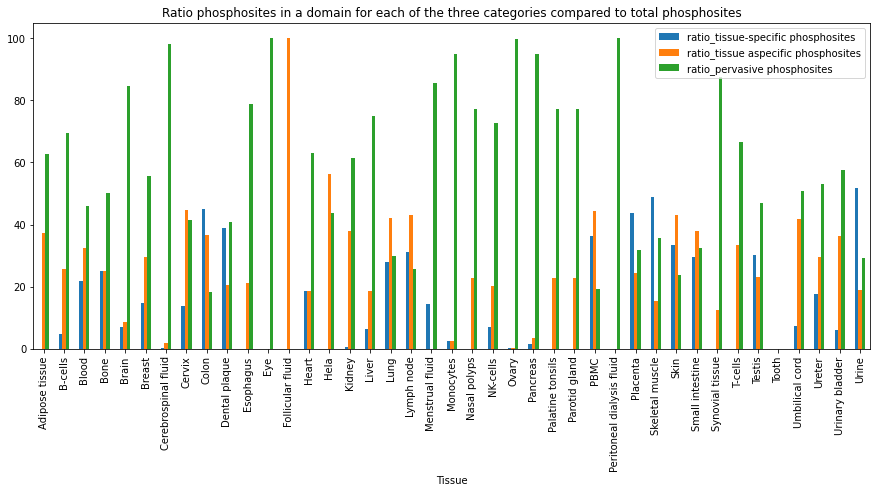

In [29]:
df_spread_tissues["ratio_tissue-specific phosphosites"] = df_spread_tissues["Number of tissue-specific phosphosites"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_tissue aspecific phosphosites"] = df_spread_tissues["Number of tissue aspecific phosphosites"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_pervasive phosphosites"] = df_spread_tissues["Number of pervasive phosphosites"]*100/df_spread_tissues["Total"]
df_spread_tissues[["Tissue", "ratio_tissue-specific phosphosites", "ratio_tissue aspecific phosphosites", "ratio_pervasive phosphosites"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Ratio phosphosites in a domain for each of the three categories compared to total phosphosites")

In [30]:
df_spread_tissues2 = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = tspec_sites_pfam.loc[(tspec_sites_pfam[tissue]==1)&((tspec_sites_pfam["type"]=="Domain")|(tspec_sites_pfam["type"]=="Family")), :]["ACC_ID"].count()
    count_taspec = taspec_sites_pfam.loc[(taspec_sites_pfam[tissue]==1)&((taspec_sites_pfam["type"]=="Domain")|(taspec_sites_pfam["type"]=="Family")), :]["ACC_ID"].count()
    count_gen = gen_sites_pfam.loc[(gen_sites_pfam[tissue]==1)&((gen_sites_pfam["type"]=="Domain")|(gen_sites_pfam["type"]=="Family")), :]["ACC_ID"].count()
    count_total = count_tspec + count_taspec + count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues2["Number of tissue-specific phosphosites"] = list_tspec
df_spread_tissues2["Number of tissue aspecific phosphosites"] = list_taspec
df_spread_tissues2["Number of pervasive phosphosites"] = list_gen
df_spread_tissues2["Total"] = list_total
df_spread_tissues2

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                       4   
2                       Blood                                     509   
3                        Bone                                       2   
4                       Brain                                      65   
5                      Breast                                      16   
6         Cerebrospinal fluid                                       2   
7                      Cervix                                       1   
8                       Colon                                    1360   
9               Dental plaque                                      12   
10                  Esophagus                                       0   
11                        Eye                                       0   
12           Follicular fluid                                       0   
13                      Heart                                      12   
14                       Hela                                       0   
15                     Kidney                                       3   
16                      Liver                                      90   
17                       Lung                                     417   
18                 Lymph node                                     611   
19            Menstrual fluid                                       1   
20                  Monocytes                                      22   
21               Nasal polyps                                       0   
22                   NK-cells                                      11   
23                      Ovary                                       1   
24                   Pancreas                                      14   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     489   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     366   
30            Skeletal muscle                                     118   
31                       Skin                                     388   
32            Small intestine                                      62   
33            Synovial tissue                                       0   
34                    T-cells                                       0   
35                     Testis                                      90   
36                      Tooth                                       0   
37             Umbilical cord                                      43   
38                     Ureter                                       3   
39            Urinary bladder                                      19   
40                      Urine                                      30   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       102                               180   
1                                        30                                80   
2                                       767                              1054   
3                                         1                                 4   
4                                        80                               808   
5                                        26                                58   
6                                        16                               763   
7                                         7                                 9   
8                                      1180                               595   
9                                         5                                12   
10                                        4                      

In [31]:
#df_spread_tissues2.to_csv("2.2 number of sites in each category per tissue in domain", sep="\t")

In [32]:
missing_tspec = pd.merge(tspec_sites, tspec_sites_pfam, how="left", indicator=True, suffixes=["","_y"])
missing_tspec = missing_tspec[missing_tspec["_merge"]=="left_only"]
missing_tspec.head()

ACC_ID  UP_POS    tissue modres  Adipose tissue  B-cells  Blood  Bone  \
2   A0A087WXM9     223    Testis      S               0        0      0     0   
3   A0A0B4J2D5     124      PBMC      S               0        0      0     0   
4   A0A0B4J2D5     145      PBMC      T               0        0      0     0   
6   A0A0B4J2F2     435  Placenta      S               0        0      0     0   
13  A0A0U1RRK4      41    Testis      S               0        0      0     0   

    Brain  Breast  ...  Urinary bladder  Urine  Total  hmm start  hmm end  \
2       0       0  ...                0      0      1        NaN      NaN   
3       0       0  ...                0      0      1        NaN      NaN   
4       0       0  ...                0      0      1        NaN      NaN   
6       0       0  ...                0      0      1        NaN      NaN   
13      0       0  ...                0      0      1        NaN      NaN   

    hmm name  type  clan  E-value     _merge  
2        NaN   NaN   NaN      NaN  left_only  
3        NaN   NaN   NaN      NaN  left_only  
4        NaN   NaN   NaN      NaN  left_only  
6        NaN   NaN   NaN      NaN  left_only  
13       NaN   NaN   NaN      NaN  left_only  

[5 rows x 53 columns]

In [33]:
missing_taspec = pd.merge(taspec_sites, taspec_sites_pfam, how="left", indicator=True, suffixes=["","_y"])
missing_taspec = missing_taspec[missing_taspec["_merge"]=="left_only"]
missing_taspec.head()

ACC_ID  UP_POS                                             tissue  \
0  A0A0C4DH36     108                                   Lung,Blood,Blood   
1      A0AVK6      71                Blood,Colon,Colon,Colon,Colon,Colon   
2      A0AVK6     102          Blood,Blood,Colon,Colon,Colon,Colon,Colon   
3      A0FGR8     738  Liver,Liver,Liver,Liver,Blood,Testis,Lymph nod...   
4      A0FGR8     739  Liver,Blood,Blood,Colon,Lymph node,Lymph node,...   

  modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0      T               0        0      1     0      0       0  ...   
1      S               0        0      1     0      0       0  ...   
2      S               0        0      1     0      0       0  ...   
3      S               0        0      1     0      0       0  ...   
4      S               0        0      1     0      0       0  ...   

   Urinary bladder  Urine  Total  hmm start  hmm end  hmm name  type  clan  \
0                0      0      2        NaN      NaN       NaN   NaN   NaN   
1                0      0      2        NaN      NaN       NaN   NaN   NaN   
2                0      0      2        NaN      NaN       NaN   NaN   NaN   
3                0      0      4        NaN      NaN       NaN   NaN   NaN   
4                0      0      4        NaN      NaN       NaN   NaN   NaN   

   E-value     _merge  
0      NaN  left_only  
1      NaN  left_only  
2      NaN  left_only  
3      NaN  left_only  
4      NaN  left_only  

[5 rows x 53 columns]

In [34]:
missing_gen = pd.merge(gen_sites, gen_sites_pfam, how="left", indicator=True, suffixes=["","_y"])
missing_gen = missing_gen[missing_gen["_merge"]=="left_only"]
missing_gen.head()

ACC_ID  UP_POS                                             tissue modres  \
1  A0JNW5    1402  Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...      S   
2  A2RU30     454  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...      S   
3  A5A3E0     939  Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...      S   
4  A5A3E0     940  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      Y   
5  A5A3E0     971  Liver,PBMC,PBMC,Urinary bladder, Colon, Kidney...      S   

   Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Urinary bladder  \
1               0        0      1     0      1       0  ...                0   
2               0        0      1     0      1       0  ...                0   
3               0        0      1     0      1       0  ...                0   
4               1        0      1     0      1       0  ...                0   
5               0        0      1     0      1       0  ...                1   

   Urine  Total  hmm start  hmm end  hmm name  type  clan  E-value     _merge  
1      0      8        NaN      NaN       NaN   NaN   NaN      NaN  left_only  
2      0      7        NaN      NaN       NaN   NaN   NaN      NaN  left_only  
3      0     11        NaN      NaN       NaN   NaN   NaN      NaN  left_only  
4      0     13        NaN      NaN       NaN   NaN   NaN      NaN  left_only  
5      0     15        NaN      NaN       NaN   NaN   NaN      NaN  left_only  

[5 rows x 53 columns]

In [35]:
df_spread_tissues_missing = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = missing_tspec.loc[missing_tspec[tissue]==1, :]["ACC_ID"].count()
    count_taspec = missing_taspec.loc[missing_taspec[tissue]==1, :]["ACC_ID"].count()
    count_gen = missing_gen.loc[missing_gen[tissue]==1, :]["ACC_ID"].count()
    count_total = data_site.loc[data_site[tissue]==1, :]["ACC_ID"].count()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues_missing["Number of tissue-specific phosphosites"] = list_tspec
df_spread_tissues_missing["Number of tissue aspecific phosphosites"] = list_taspec
df_spread_tissues_missing["Number of pervasive phosphosites"] = list_gen
df_spread_tissues_missing["Total"] = list_total
df_spread_tissues_missing

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                      12   
2                       Blood                                    1270   
3                        Bone                                       0   
4                       Brain                                      82   
5                      Breast                                      12   
6         Cerebrospinal fluid                                       7   
7                      Cervix                                       4   
8                       Colon                                    4160   
9               Dental plaque                                       4   
10                  Esophagus                                       1   
11                        Eye                                       5   
12           Follicular fluid                                       0   
13                      Heart                                      14   
14                       Hela                                       0   
15                     Kidney                                       8   
16                      Liver                                     134   
17                       Lung                                    1002   
18                 Lymph node                                    1785   
19            Menstrual fluid                                       1   
20                  Monocytes                                      15   
21               Nasal polyps                                       0   
22                   NK-cells                                      26   
23                      Ovary                                       1   
24                   Pancreas                                      20   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     400   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     543   
30            Skeletal muscle                                     149   
31                       Skin                                     320   
32            Small intestine                                      78   
33            Synovial tissue                                       3   
34                    T-cells                                       0   
35                     Testis                                     196   
36                      Tooth                                       1   
37             Umbilical cord                                      47   
38                     Ureter                                       1   
39            Urinary bladder                                      36   
40                      Urine                                      50   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       133                               247   
1                                        66                               177   
2                                      1869                              2131   
3                                         1                                 5   
4                                       108                              1635   
5                                        13                                37   
6                                        15                              1568   
7                                         1                                 6   
8                                      3153                              1159   
9                                         3                                 8   
10                                        3                      

<AxesSubplot:title={'center':'Number of phosphosites not entailed by a domain'}, xlabel='Tissue'>

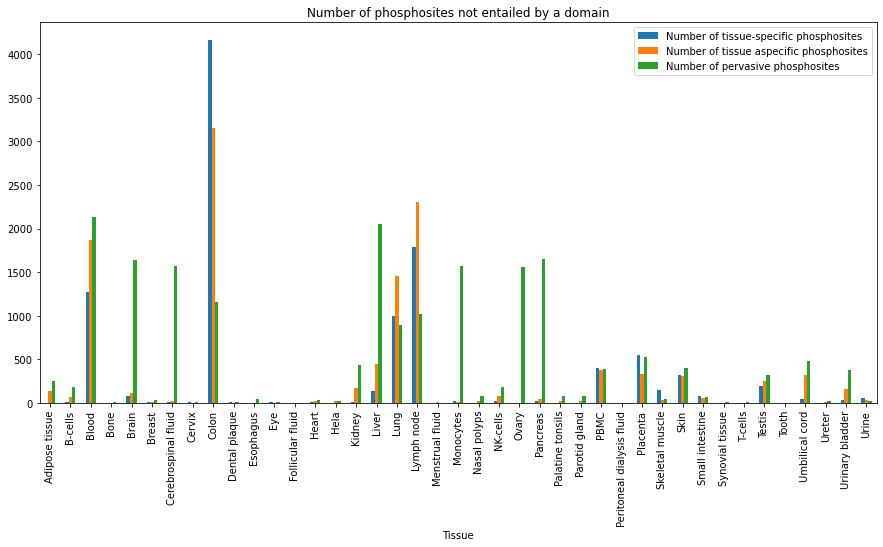

In [36]:
df_spread_tissues_missing[["Tissue", "Number of tissue-specific phosphosites", "Number of tissue aspecific phosphosites", "Number of pervasive phosphosites"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphosites not entailed by a domain")

<AxesSubplot:title={'center':'Ratio phosphosites not entailed by a domain compared to total missing phosphosites in that tissue'}, xlabel='Tissue'>

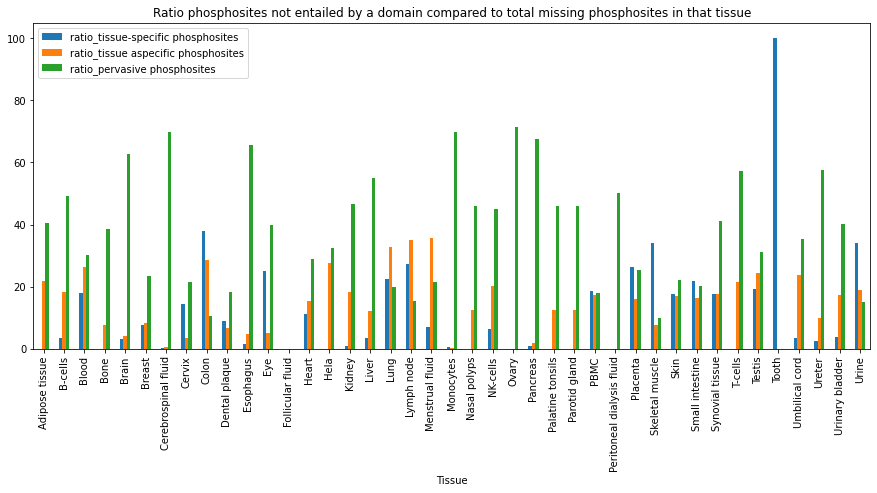

In [37]:
df_spread_tissues_missing["ratio_tissue-specific phosphosites"] = df_spread_tissues_missing["Number of tissue-specific phosphosites"]*100/df_spread_tissues_missing["Total"]
df_spread_tissues_missing["ratio_tissue aspecific phosphosites"] = df_spread_tissues_missing["Number of tissue aspecific phosphosites"]*100/df_spread_tissues_missing["Total"]
df_spread_tissues_missing["ratio_pervasive phosphosites"] = df_spread_tissues_missing["Number of pervasive phosphosites"]*100/df_spread_tissues_missing["Total"]
df_spread_tissues_missing[["Tissue", "ratio_tissue-specific phosphosites", "ratio_tissue aspecific phosphosites", "ratio_pervasive phosphosites"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Ratio phosphosites not entailed by a domain compared to total missing phosphosites in that tissue")

In [38]:
df_spread_tissues_missing

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                      12   
2                       Blood                                    1270   
3                        Bone                                       0   
4                       Brain                                      82   
5                      Breast                                      12   
6         Cerebrospinal fluid                                       7   
7                      Cervix                                       4   
8                       Colon                                    4160   
9               Dental plaque                                       4   
10                  Esophagus                                       1   
11                        Eye                                       5   
12           Follicular fluid                                       0   
13                      Heart                                      14   
14                       Hela                                       0   
15                     Kidney                                       8   
16                      Liver                                     134   
17                       Lung                                    1002   
18                 Lymph node                                    1785   
19            Menstrual fluid                                       1   
20                  Monocytes                                      15   
21               Nasal polyps                                       0   
22                   NK-cells                                      26   
23                      Ovary                                       1   
24                   Pancreas                                      20   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     400   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     543   
30            Skeletal muscle                                     149   
31                       Skin                                     320   
32            Small intestine                                      78   
33            Synovial tissue                                       3   
34                    T-cells                                       0   
35                     Testis                                     196   
36                      Tooth                                       1   
37             Umbilical cord                                      47   
38                     Ureter                                       1   
39            Urinary bladder                                      36   
40                      Urine                                      50   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       133                               247   
1                                        66                               177   
2                                      1869                              2131   
3                                         1                                 5   
4                                       108                              1635   
5                                        13                                37   
6                                        15                              1568   
7                                         1                                 6   
8                                      3153                              1159   
9                                         3                                 8   
10                                        3                      

We'll now calculate the ratio of annotated sites compared to the number of sites per category, per tissue. We've previously calulated for each tissue, how many site are associated with each of the three categories.

<AxesSubplot:title={'center':'ratio number of P-sites with functional domain annotation/total amount of P-sites in that category in that tissue'}, xlabel='Tissue'>

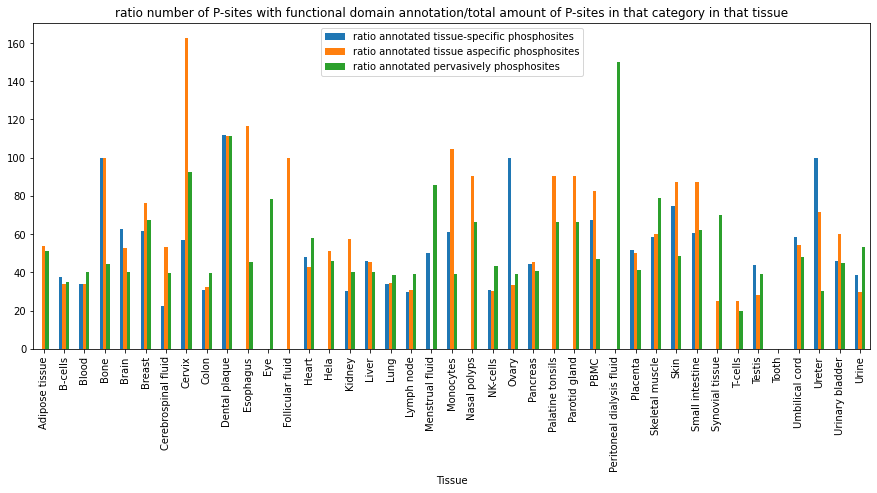

In [39]:
data_cat = pd.read_csv("number of three categories per tissue_sites.tsv", sep="\t")
data_cat["ratio annotated tissue-specific phosphosites"] = df_spread_tissues["Number of tissue-specific phosphosites"]*100/data_cat["number of tissue-specific sites"]
data_cat["ratio annotated tissue aspecific phosphosites"] = df_spread_tissues["Number of tissue aspecific phosphosites"]*100/data_cat["number of non tissue-specific sites"]
data_cat["ratio annotated pervasively phosphosites"] = df_spread_tissues["Number of pervasive phosphosites"]*100/data_cat["number of generally expressed sites"]
data_cat[["Tissue", "ratio annotated tissue-specific phosphosites", "ratio annotated tissue aspecific phosphosites", "ratio annotated pervasively phosphosites"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="ratio number of P-sites with functional domain annotation/total amount of P-sites in that category in that tissue")

In [40]:
data_cat

Tissue  number of tissue-specific sites  \
0              Adipose tissue                                0   
1                     B-cells                               16   
2                       Blood                             1642   
3                        Bone                                2   
4                       Brain                              121   
5                      Breast                               26   
6         Cerebrospinal fluid                                9   
7                      Cervix                                7   
8                       Colon                             5252   
9               Dental plaque                               17   
10                  Esophagus                                1   
11                        Eye                                5   
12           Follicular fluid                                0   
13                      Heart                               25   
14                       Hela                                0   
15                     Kidney                               10   
16                      Liver                              213   
17                       Lung                             1316   
18                 Lymph node                             2224   
19            Menstrual fluid                                2   
20                  Monocytes                               36   
21               Nasal polyps                                0   
22                   NK-cells                               36   
23                      Ovary                                2   
24                   Pancreas                               34   
25           Palatine tonsils                                0   
26              Parotid gland                                0   
27                       PBMC                              772   
28  Peritoneal dialysis fluid                                0   
29                   Placenta                              826   
30            Skeletal muscle                              238   
31                       Skin                              574   
32            Small intestine                              121   
33            Synovial tissue                                3   
34                    T-cells                                0   
35                     Testis                              259   
36                      Tooth                                1   
37             Umbilical cord                               87   
38                     Ureter                                3   
39            Urinary bladder                               61   
40                      Urine                               78   

    number of non tissue-specific sites  number of generally expressed sites  \
0                                   221                                  390   
1                                    95                                  250   
2                                  2466                                 2961   
3                                     2                                    9   
4                                   176                                 2307   
5                                    42                                   89   
6                                    30                                 2203   
7                                     8                                   13   
8                                  4089                                 1651   
9                                     9                                   18   
10                                    6                                   57   
11                                    1                                   14   
12                                    1                                    0   
13                                   28                                   71   
14                                   43           

In [41]:
print(data_cat["ratio annotated tissue-specific phosphosites"].describe())
print(data_cat["ratio annotated tissue aspecific phosphosites"].describe())
print(data_cat["ratio annotated pervasively phosphosites"].describe())

count     33.000000
mean      48.194798
std       28.563373
min        0.000000
25%       30.845392
50%       46.009390
75%       61.111111
max      111.764706
Name: ratio annotated tissue-specific phosphosites, dtype: float64
count     39.000000
mean      59.833240
std       34.239227
min        0.000000
25%       33.508772
50%       53.333333
75%       87.110291
max      162.500000
Name: ratio annotated tissue aspecific phosphosites, dtype: float64
count     39.000000
mean      54.539790
std       24.294588
min       20.000000
25%       39.911765
50%       45.614035
75%       66.433566
max      150.000000
Name: ratio annotated pervasively phosphosites, dtype: float64


In [42]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = tspec_sites_pfam.loc[tspec_sites_pfam[tissue]==1, :]["ACC_ID"].count()
    count_taspec = taspec_sites_pfam.loc[taspec_sites_pfam[tissue]==1, :]["ACC_ID"].count()
    count_gen = gen_sites_pfam.loc[gen_sites_pfam[tissue]==1, :]["ACC_ID"].count()
    count_total = count_tspec + count_taspec + count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues["Number of tissue-specific phosphosites in a domain"] = list_tspec
df_spread_tissues["Number of tissue aspecific phosphosites in a domain"] = list_taspec
df_spread_tissues["Number of pervasive phosphosites in a domain"] = list_gen
df_spread_tissues["Total"] = list_total
df_spread_tissues

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphosites in a domain  \
0                                                   0    
1                                                   6    
2                                                 559    
3                                                   2    
4                                                  76    
5                                                  16    
6                                                   2    
7                                                   4    
8                                                1620    
9                                                  19    
10                                                  0    
11                                                  0    
12                                                  0    
13                                                 12    
14                                                  0    
15                                                  3    
16                                                 98    
17                                                444    
18                                                659    
19                                                  1    
20                                                 22    
21                                                  0    
22                                                 11    
23                                                  2    
24                                                 15    
25                                                  0    
26                                                  0    
27                                                522    
28                                                  0    
29                                                427    
30                                                139    
31                                                429    
32                                                 73    
33                                                  0    
34                                                  0    
35                                                113    
36                                                  0    
37                                                 51    
38                                                  3    
39                                                 28    
40                                                 30    

    Number of tissue aspecific phosphosites in a domain  \
0                                                 119     
1                                                  32     
2                     

In [43]:
df_spread_tissues_missing = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = missing_tspec.loc[missing_tspec[tissue]==1, :]["ACC_ID"].count()
    count_taspec = missing_taspec.loc[missing_taspec[tissue]==1, :]["ACC_ID"].count()
    count_gen = missing_gen.loc[missing_gen[tissue]==1, :]["ACC_ID"].count()
    count_total = data_site.loc[data_site[tissue]==1, :]["ACC_ID"].count()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues_missing["Number of tissue-specific phosphosites outside a domain"] = list_tspec
df_spread_tissues_missing["Number of tissue aspecific phosphosites outside a domain"] = list_taspec
df_spread_tissues_missing["Number of pervasive phosphosites outside a domain"] = list_gen
df_spread_tissues_missing["Total"] = list_total
df_spread_tissues_missing

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphosites outside a domain  \
0                                                   0         
1                                                  12         
2                                                1270         
3                                                   0         
4                                                  82         
5                                                  12         
6                                                   7         
7                                                   4         
8                                                4160         
9                                                   4         
10                                                  1         
11                                                  5         
12                                                  0         
13                                                 14         
14                                                  0         
15                                                  8         
16                                                134         
17                                               1002         
18                                               1785         
19                                                  1         
20                                                 15         
21                                                  0         
22                                                 26         
23                                                  1         
24                                                 20         
25                                                  0         
26                                                  0         
27                                                400         
28                                                  0         
29                                                543         
30                                                149         
31                                                320         
32                                                 78         
33                                                  3         
34                                                  0         
35                                                196         
36                                                  1         
37                                                 47         
38                                                  1         
39                                                 36         
40                                                 50

In [44]:
df_spread_tissues = pd.merge(df_spread_tissues, df_spread_tissues_missing, on=["Tissue"], how="outer")
distr_tissues_tspec = df_spread_tissues[["Tissue", "Number of tissue-specific phosphosites in a domain", "Number of tissue-specific phosphosites outside a domain"]].copy()
distr_tissues_taspec = df_spread_tissues[["Tissue", "Number of tissue aspecific phosphosites in a domain", "Number of tissue aspecific phosphosites outside a domain"]].copy()
distr_tissues_gen = df_spread_tissues[["Tissue", "Number of pervasive phosphosites in a domain", "Number of pervasive phosphosites outside a domain"]].copy()

<Figure size 1080x432 with 0 Axes>

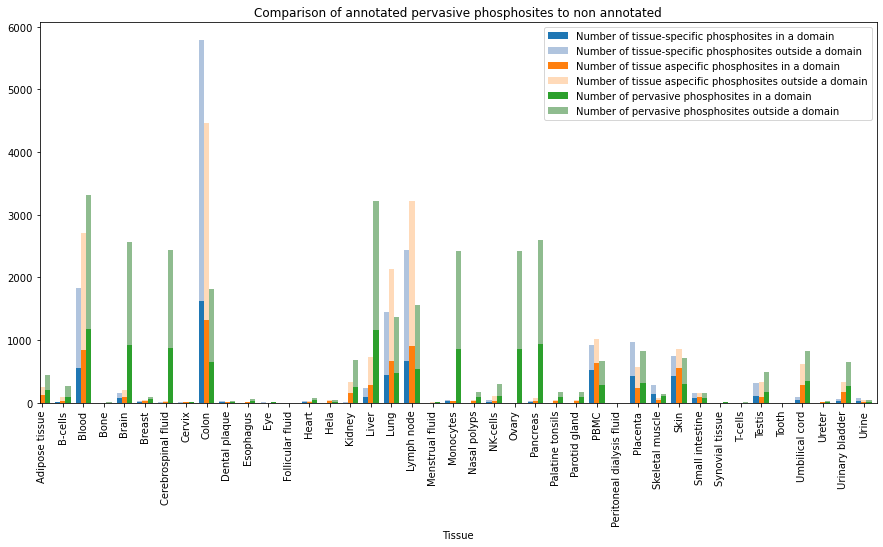

In [45]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
distr_tissues_tspec.plot(kind="bar", x="Tissue", ax=ax, position=1.5, stacked=True, width=0.25, color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Comparison of annotated tissue-specific phosphosites compared to non annotated")
distr_tissues_taspec.plot(kind="bar", x="Tissue", ax=ax, position=0.5, stacked=True, width=0.25, color=["tab:orange","peachpuff"], figsize=(15,7), title="Comparison of annotated tissue aspecific phosphosites compared to non annotated")
distr_tissues_gen.plot(kind="bar", x="Tissue", ax=ax, position=-0.5, stacked=True, width=0.25, color=["tab:green", "darkseagreen"], figsize=(15,7), title="Comparison of annotated pervasive phosphosites to non annotated")
#plt.savefig("WP2 Pfam_missing_annotated_sites_per_tissue.png", format="png", bbox_inches="tight")
plt.show()

<Figure size 1080x432 with 0 Axes>

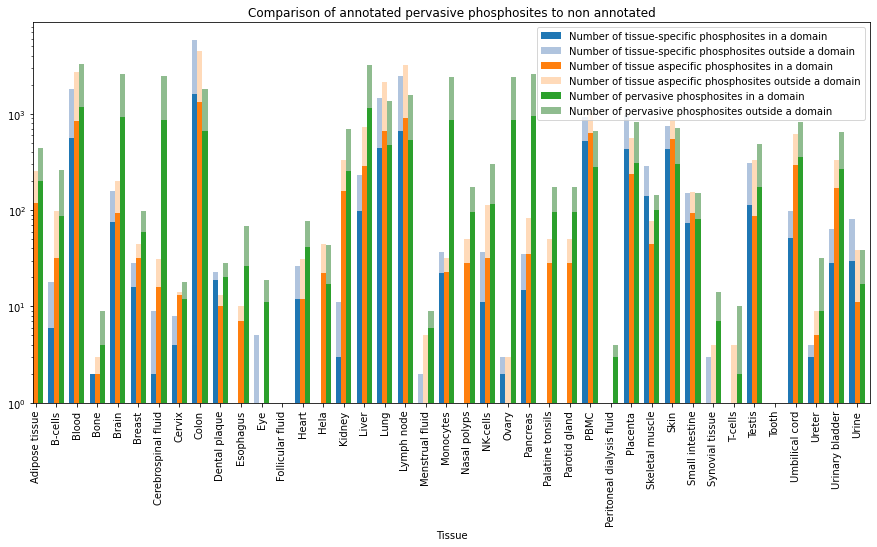

In [46]:
plt.figure(figsize=(15,6))
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True)
distr_tissues_tspec.plot(kind="bar", x="Tissue", ax=ax, logy=True, position=1.5, stacked=True, width=0.25, color=["tab:blue", "lightsteelblue"], figsize=(15,7), title="Comparison of annotated tissue-specific phosphosites compared to non annotated")
distr_tissues_taspec.plot(kind="bar", x="Tissue", ax=ax, logy=True, position=0.5, stacked=True, width=0.25, color=["tab:orange","peachpuff"], figsize=(15,7), title="Comparison of annotated tissue aspecific phosphosites compared to non annotated")
distr_tissues_gen.plot(kind="bar", x="Tissue", ax=ax, logy=True, position=-0.5, stacked=True, width=0.25, color=["tab:green", "darkseagreen"], figsize=(15,7), title="Comparison of annotated pervasive phosphosites to non annotated")
#plt.savefig("WP2 Pfam_missing_annotated_sites_per_tissue_log.png", format="png", bbox_inches="tight")
plt.show()

# 3. Domain

We'll now take a closer look at the domain types across the three categories of proteins. We'll follow this up by doing the same on the domain name level, followed by the clans.

<AxesSubplot:title={'center':'Number of sites with a certain kind of domain'}, xlabel='Type'>

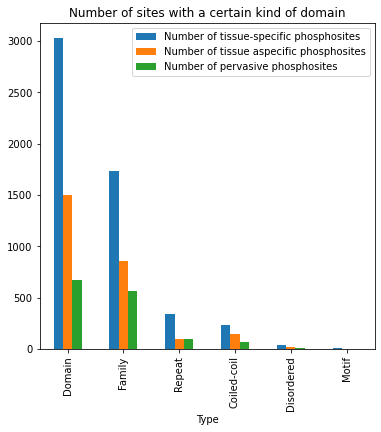

In [47]:
list_types = ["Domain", "Family", "Repeat", "Coiled-coil", "Disordered", "Motif"]
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    count_tspec = tspec_sites_pfam.loc[tspec_sites_pfam["type"]==element, :]["ACC_ID"].count()
    count_taspec = taspec_sites_pfam.loc[taspec_sites_pfam["type"]==element, :]["ACC_ID"].count()
    count_gen = gen_sites_pfam.loc[gen_sites_pfam["type"]==element, :]["ACC_ID"].count()
    list_counts_tspec.append(count_tspec)
    list_counts_taspec.append(count_taspec)
    list_counts_gen.append(count_gen)
df_types = pd.DataFrame({"Type": list_types, "Number of tissue-specific phosphosites": list_counts_tspec,
                        "Number of tissue aspecific phosphosites": list_counts_taspec,
                         "Number of pervasive phosphosites": list_counts_gen})
df_types.plot(kind="bar", x="Type", figsize=(6,6), title="Number of sites with a certain kind of domain")
#plt.savefig("WP2 Pfam_Psites_per_category.png", format="png", bbox_inches="tight")

In [48]:
df_types_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    list_counts_tspec = []
    list_counts_taspec = []
    list_counts_gen = []
    for tissue in list_tissues_STY:
        count_tspec = tspec_sites_pfam.loc[(tspec_sites_pfam[tissue]==1)&(tspec_sites_pfam["type"]==element), :]["ACC_ID"].count()
        count_taspec = taspec_sites_pfam.loc[(taspec_sites_pfam[tissue]==1)&(taspec_sites_pfam["type"]==element), :]["ACC_ID"].count()
        count_gen = gen_sites_pfam.loc[(gen_sites_pfam[tissue]==1)&(gen_sites_pfam["type"]==element), :]["ACC_ID"].count()
        list_counts_tspec.append(count_tspec)
        list_counts_taspec.append(count_taspec)
        list_counts_gen.append(count_gen)
    tspec_colname = element+"_tspec"
    taspec_colname = element+"_taspec"
    gen_colname = element+"_pervasive"
    df_types_tissue[tspec_colname] = list_counts_tspec
    df_types_tissue[taspec_colname] = list_counts_taspec
    df_types_tissue[gen_colname] = list_counts_gen
df_types_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0              Adipose tissue             0             66               102   
1                     B-cells             1             21                43   
2                       Blood           334            467               568   
3                        Bone             2              0                 3   
4                       Brain            53             43               419   
5                      Breast            16             25                34   
6         Cerebrospinal fluid             0             11               394   
7                      Cervix             0              2                 6   
8                       Colon           778            681               326   
9               Dental plaque             3              1                 3   
10                  Esophagus             0              3                14   
11                        Eye             0              0                 4   
12           Follicular fluid             0              0                 0   
13                      Heart             9              6                23   
14                       Hela             0             16                10   
15                     Kidney             2            102               116   
16                      Liver            66            176               545   
17                       Lung           240            326               224   
18                 Lymph node           356            473               270   
19            Menstrual fluid             1              0                 4   
20                  Monocytes            18             19               379   
21               Nasal polyps             0             21                71   
22                   NK-cells             5             17                61   
23                      Ovary             0              0               373   
24                   Pancreas            11             20               434   
25           Palatine tonsils             0             21                71   
26              Parotid gland             0             21                71   
27                       PBMC           377            481               132   
28  Peritoneal dialysis fluid             0              0                 0   
29                   Placenta           233            139               149   
30            Skeletal muscle            77             10                36   
31                       Skin           288            373               146   
32            Small intestine            50             59                38   
33            Synovial tissue             0              1                 3   
34                    T-cells             0              1                 0   
35                     Testis            51             46               106   
36                      Tooth             0              0                 0   
37             Umbilical cord            26            170               175   
38                     Ureter             3              2                 5   
39            Urinary bladder            10            107               130   
40                      Urine            15              6                11   

    Family_tspec  Family_taspec  Family_pervasive  Repeat_tspec  \
0              0             36                78             0   
1              3              9                37             2   
2            175            300               486            36   
3              0              1                 1             0   
4             12             37               389             8   
5              0              1                24             0   
6              2              5               369             0   
7              1              5                 3             0   
8            582            499               269          

We note that for the tissue-specific phosphosites in lymph node, there is a relatively high percentage of disorderedness. For skeletal muscle in the same category, this is more the case for coiled-coils. Disordered regions are relateively highly represented in lymph node, for the tissue aspecific phosphosites. Repeat regions are more frequent in tissue aspecific phosphosites.

In [49]:
df_types_tissue["Domain_tspec"] = df_types_tissue["Domain_tspec"] + df_types_tissue["Family_tspec"] +df_types_tissue["Motif_tspec"]
df_types_tissue.drop(["Family_tspec"], axis=1, inplace=True)
df_types_tissue.drop(["Motif_tspec"], axis=1, inplace=True)
df_types_tissue["Domain_taspec"] = df_types_tissue["Domain_taspec"] + df_types_tissue["Family_taspec"] +df_types_tissue["Motif_taspec"]
df_types_tissue.drop(["Family_taspec"], axis=1, inplace=True)
df_types_tissue.drop(["Motif_taspec"], axis=1, inplace=True)
df_types_tissue["Domain_pervasive"] = df_types_tissue["Domain_pervasive"] + df_types_tissue["Family_pervasive"] +df_types_tissue["Motif_pervasive"]
df_types_tissue.drop(["Family_pervasive"], axis=1, inplace=True)
df_types_tissue.drop(["Motif_pervasive"], axis=1, inplace=True)
df_types_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0              Adipose tissue             0            102               180   
1                     B-cells             4             30                80   
2                       Blood           510            768              1054   
3                        Bone             2              1                 4   
4                       Brain            65             80               808   
5                      Breast            16             26                58   
6         Cerebrospinal fluid             2             16               763   
7                      Cervix             1              7                 9   
8                       Colon          1362           1182               595   
9               Dental plaque            12              5                12   
10                  Esophagus             0              4                22   
11                        Eye             0              0                 7   
12           Follicular fluid             0              1                 0   
13                      Heart            12             11                41   
14                       Hela             0             22                14   
15                     Kidney             3            147               231   
16                      Liver            91            260              1021   
17                       Lung           417            586               405   
18                 Lymph node           613            831               482   
19            Menstrual fluid             1              0                 6   
20                  Monocytes            22             21               751   
21               Nasal polyps             0             24                93   
22                   NK-cells            11             29               108   
23                      Ovary             1              0               743   
24                   Pancreas            14             33               820   
25           Palatine tonsils             0             24                93   
26              Parotid gland             0             24                93   
27                       PBMC           489            603               258   
28  Peritoneal dialysis fluid             0              0                 1   
29                   Placenta           366            202               267   
30            Skeletal muscle           118             39                92   
31                       Skin           388            495               271   
32            Small intestine            62             74                61   
33            Synovial tissue             0              1                 7   
34                    T-cells             0              1                 2   
35                     Testis            90             79               163   
36                      Tooth             0              0                 0   
37             Umbilical cord            43            263               320   
38                     Ureter             3              4                 7   
39            Urinary bladder            19            154               244   
40                      Urine            30             11                15   

    Repeat_tspec  Repeat_taspec  Repeat_pervasive  Coiled-coil_tspec  \
0              0              3                 6                  0   
1              2              1                 6                  0   
2             36             36                87                 10   
3              0              0                 0                  0   
4              8             10                80                  3   
5              0              2                 1                  0   
6              0              0                75                  0   
7              0              0                 0                  2   
8            1

<AxesSubplot:xlabel='Tissue'>

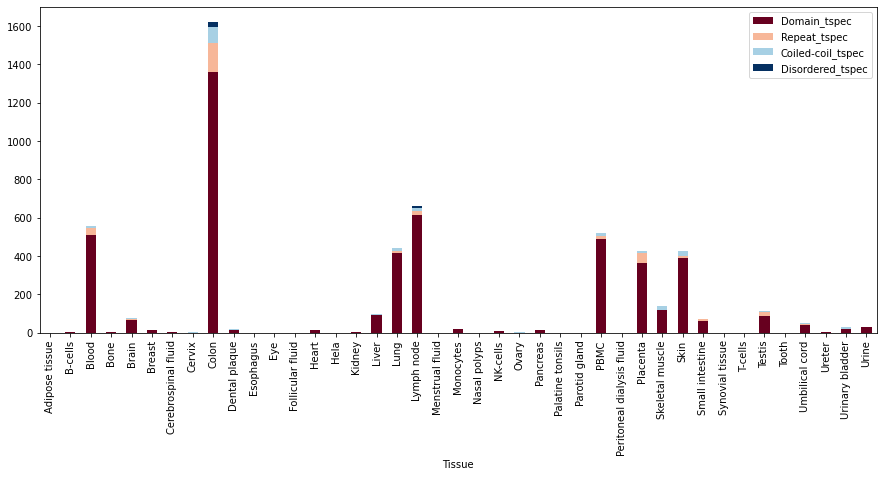

In [50]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("tspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")
#plt.savefig("WP2 Pfam_tspecsites_tissues_categories.png", format="png", bbox_inches="tight")

<AxesSubplot:xlabel='Tissue'>

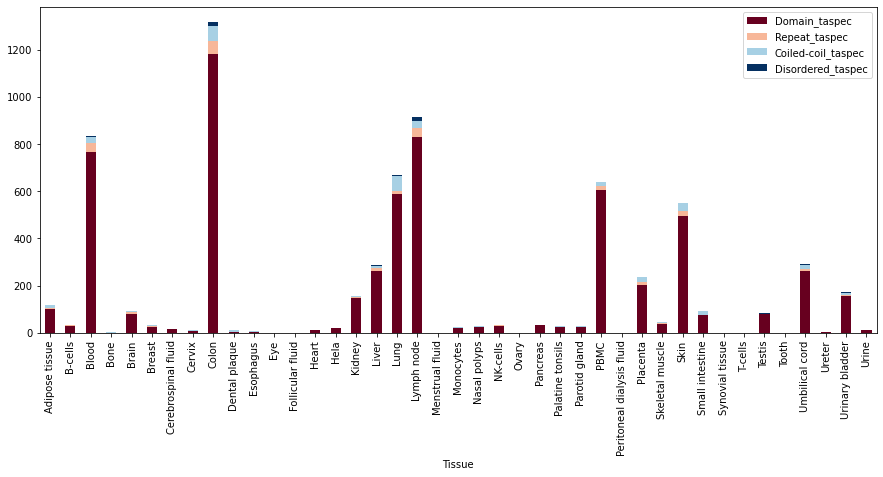

In [51]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("taspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")
#plt.savefig("WP2 Pfam_taspecsites_tissues_categories.png", format="png", bbox_inches="tight")

<AxesSubplot:xlabel='Tissue'>

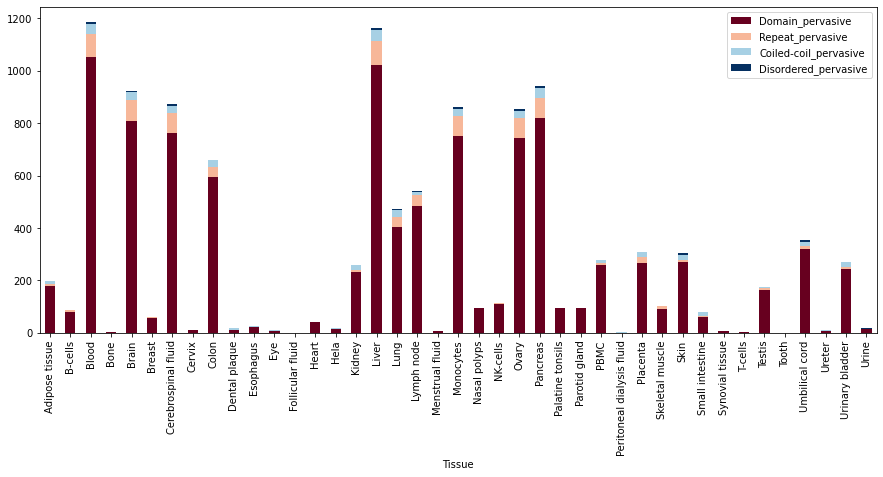

In [52]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("pervasive"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")
#plt.savefig("WP2 Pfam_pervasive_Psites_tissues_categories.png", format="png", bbox_inches="tight")

In [53]:
df_types_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    list_counts_tspec = []
    list_counts_taspec = []
    list_counts_gen = []
    for tissue in list_tissues_STY:
        count_tspec = tspec_sites_pfam.loc[(tspec_sites_pfam[tissue]==1)&(tspec_sites_pfam["type"]==element), :]["ACC_ID"].count()
        count_taspec = taspec_sites_pfam.loc[(taspec_sites_pfam[tissue]==1)&(taspec_sites_pfam["type"]==element), :]["ACC_ID"].count()
        count_gen = gen_sites_pfam.loc[(gen_sites_pfam[tissue]==1)&(gen_sites_pfam["type"]==element), :]["ACC_ID"].count()
        list_counts_tspec.append(count_tspec)
        list_counts_taspec.append(count_taspec)
        list_counts_gen.append(count_gen)
    tspec_colname = element+"_tspec"
    taspec_colname = element+"_taspec"
    gen_colname = element+"_pervasive"
    df_types_tissue[tspec_colname] = list_counts_tspec
    df_types_tissue[taspec_colname] = list_counts_taspec
    df_types_tissue[gen_colname] = list_counts_gen
df_types_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0              Adipose tissue             0             66               102   
1                     B-cells             1             21                43   
2                       Blood           334            467               568   
3                        Bone             2              0                 3   
4                       Brain            53             43               419   
5                      Breast            16             25                34   
6         Cerebrospinal fluid             0             11               394   
7                      Cervix             0              2                 6   
8                       Colon           778            681               326   
9               Dental plaque             3              1                 3   
10                  Esophagus             0              3                14   
11                        Eye             0              0                 4   
12           Follicular fluid             0              0                 0   
13                      Heart             9              6                23   
14                       Hela             0             16                10   
15                     Kidney             2            102               116   
16                      Liver            66            176               545   
17                       Lung           240            326               224   
18                 Lymph node           356            473               270   
19            Menstrual fluid             1              0                 4   
20                  Monocytes            18             19               379   
21               Nasal polyps             0             21                71   
22                   NK-cells             5             17                61   
23                      Ovary             0              0               373   
24                   Pancreas            11             20               434   
25           Palatine tonsils             0             21                71   
26              Parotid gland             0             21                71   
27                       PBMC           377            481               132   
28  Peritoneal dialysis fluid             0              0                 0   
29                   Placenta           233            139               149   
30            Skeletal muscle            77             10                36   
31                       Skin           288            373               146   
32            Small intestine            50             59                38   
33            Synovial tissue             0              1                 3   
34                    T-cells             0              1                 0   
35                     Testis            51             46               106   
36                      Tooth             0              0                 0   
37             Umbilical cord            26            170               175   
38                     Ureter             3              2                 5   
39            Urinary bladder            10            107               130   
40                      Urine            15              6                11   

    Family_tspec  Family_taspec  Family_pervasive  Repeat_tspec  \
0              0             36                78             0   
1              3              9                37             2   
2            175            300               486            36   
3              0              1                 1             0   
4             12             37               389             8   
5              0              1                24             0   
6              2              5               369             0   
7              1              5                 3             0   
8            582            499               269          

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1600454285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1600454285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp

<AxesSubplot:title={'center':"Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

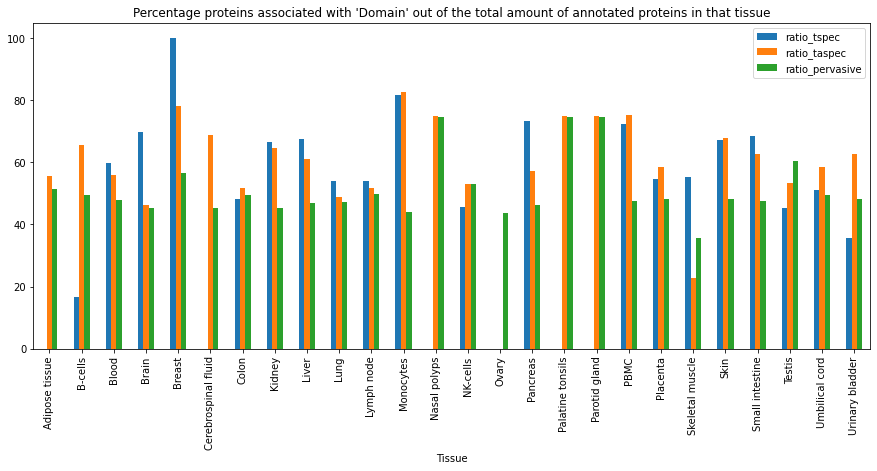

In [54]:
df_domain_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Domain")|df_types_tissue.columns.str.contains("Tissue"))]
df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_domain_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_domain_tissue = df_domain_tissue[(df_domain_tissue["Total_tspec"]>=50)|(df_domain_tissue["Total_taspec"]>=50)|(df_domain_tissue["Total_pervasive"]>=50)]
df_domain_tissue["ratio_tspec"] = df_domain_tissue["Domain_tspec"]*100/df_domain_tissue["Total_tspec"]
df_domain_tissue["ratio_taspec"] = df_domain_tissue["Domain_taspec"]*100/df_domain_tissue["Total_taspec"]
df_domain_tissue["ratio_pervasive"] = df_domain_tissue["Domain_pervasive"]*100/df_domain_tissue["Total_pervasive"]

df_domain_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue")

In [55]:
df_domain_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0        Adipose tissue             0             66               102   
1               B-cells             1             21                43   
2                 Blood           334            467               568   
4                 Brain            53             43               419   
5                Breast            16             25                34   
6   Cerebrospinal fluid             0             11               394   
8                 Colon           778            681               326   
15               Kidney             2            102               116   
16                Liver            66            176               545   
17                 Lung           240            326               224   
18           Lymph node           356            473               270   
20            Monocytes            18             19               379   
21         Nasal polyps             0             21                71   
22             NK-cells             5             17                61   
23                Ovary             0              0               373   
24             Pancreas            11             20               434   
25     Palatine tonsils             0             21                71   
26        Parotid gland             0             21                71   
27                 PBMC           377            481               132   
29             Placenta           233            139               149   
30      Skeletal muscle            77             10                36   
31                 Skin           288            373               146   
32      Small intestine            50             59                38   
35               Testis            51             46               106   
37       Umbilical cord            26            170               175   
39      Urinary bladder            10            107               130   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0           119              199          NaN     55.462185   
1             6            32               87    16.666667     65.625000   
2           559           835             1185    59.749553     55.928144   
4            76            93              924    69.736842     46.236559   
5            16            32               60   100.000000     78.125000   
6             2            16              872     0.000000     68.750000   
8          1620          1316              658    48.024691     51.747720   
15            3           158              257    66.666667     64.556962   
16           98           288             1162    67.346939     61.111111   
17          444           667              474    54.054054     48.875562   
18          659           913              541    54.021244     51.807229   
20           22            23              860    81.818182     82.608696   
21            0            28               95          NaN     75.000000   
22           11            32              115    45.454545     53.125000   
23            2             1              854     0.000000      0.000000   
24           15            35              941    73.333333     57.142857   
25            0            28               95          NaN     75.000000   
26            0            28               95          NaN     75.000000   
27          522           639              278    72.222222     75.273865   
29          427           238              310    54.566745     58.403361   
30          139            44              101    55.395683     22.727273   
31          429           551              303    67.132867     67.695100   
32           73            94               80    68.493151     62.765957   
35          113            86              175    45.132743     53.488372   
37           51           291              353    50.980392     58.419244   
39           28 

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1427199085.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1427199085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp

<AxesSubplot:title={'center':"Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

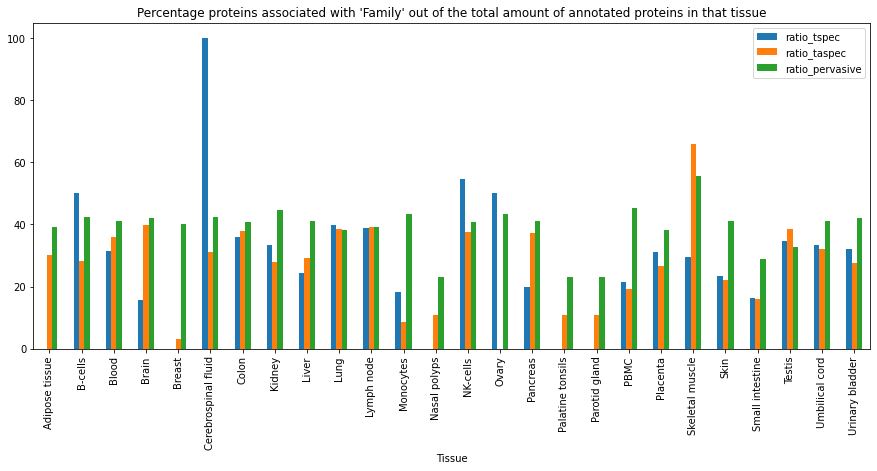

In [56]:
df_family_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Family")|df_types_tissue.columns.str.contains("Tissue"))]
df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_family_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_family_tissue = df_family_tissue[(df_family_tissue["Total_tspec"]>=50)|(df_family_tissue["Total_taspec"]>=50)|(df_family_tissue["Total_pervasive"]>=50)]
df_family_tissue["ratio_tspec"] = df_family_tissue["Family_tspec"]*100/df_family_tissue["Total_tspec"]
df_family_tissue["ratio_taspec"] = df_family_tissue["Family_taspec"]*100/df_family_tissue["Total_taspec"]
df_family_tissue["ratio_pervasive"] = df_family_tissue["Family_pervasive"]*100/df_family_tissue["Total_pervasive"]

df_family_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue")

In [57]:
df_family_tissue

Tissue  Family_tspec  Family_taspec  Family_pervasive  \
0        Adipose tissue             0             36                78   
1               B-cells             3              9                37   
2                 Blood           175            300               486   
4                 Brain            12             37               389   
5                Breast             0              1                24   
6   Cerebrospinal fluid             2              5               369   
8                 Colon           582            499               269   
15               Kidney             1             44               115   
16                Liver            24             84               476   
17                 Lung           177            258               181   
18           Lymph node           255            357               212   
20            Monocytes             4              2               372   
21         Nasal polyps             0              3                22   
22             NK-cells             6             12                47   
23                Ovary             1              0               370   
24             Pancreas             3             13               386   
25     Palatine tonsils             0              3                22   
26        Parotid gland             0              3                22   
27                 PBMC           112            122               126   
29             Placenta           133             63               118   
30      Skeletal muscle            41             29                56   
31                 Skin           100            122               125   
32      Small intestine            12             15                23   
35               Testis            39             33                57   
37       Umbilical cord            17             93               145   
39      Urinary bladder             9             47               114   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0           119              199          NaN     30.252101   
1             6            32               87    50.000000     28.125000   
2           559           835             1185    31.305903     35.928144   
4            76            93              924    15.789474     39.784946   
5            16            32               60     0.000000      3.125000   
6             2            16              872   100.000000     31.250000   
8          1620          1316              658    35.925926     37.917933   
15            3           158              257    33.333333     27.848101   
16           98           288             1162    24.489796     29.166667   
17          444           667              474    39.864865     38.680660   
18          659           913              541    38.694992     39.101862   
20           22            23              860    18.181818      8.695652   
21            0            28               95          NaN     10.714286   
22           11            32              115    54.545455     37.500000   
23            2             1              854    50.000000      0.000000   
24           15            35              941    20.000000     37.142857   
25            0            28               95          NaN     10.714286   
26            0            28               95          NaN     10.714286   
27          522           639              278    21.455939     19.092332   
29          427           238              310    31.147541     26.470588   
30          139            44              101    29.496403     65.909091   
31          429           551              303    23.310023     22.141561   
32           73            94               80    16.438356     15.957447   
35          113            86              175    34.513274     38.372093   
37           51           291              353    33.333333     31.958763   
39           28 

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3678828970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3678828970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp

<AxesSubplot:title={'center':"Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

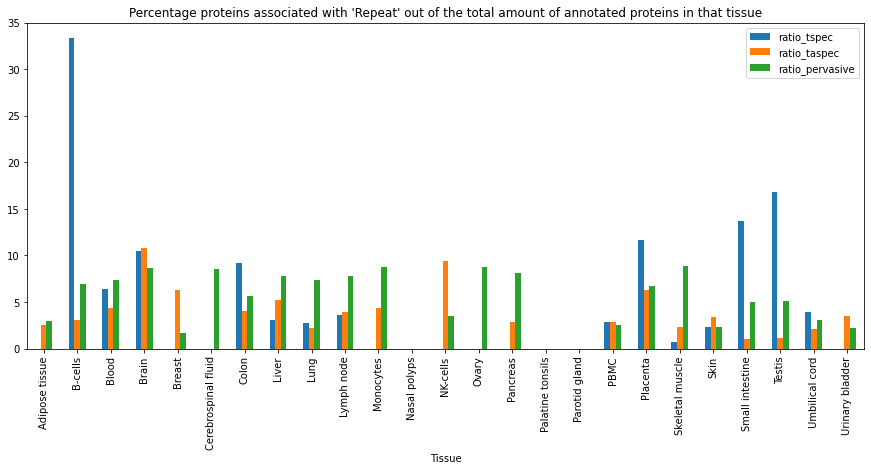

In [58]:
df_repeat_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Repeat")|df_types_tissue.columns.str.contains("Tissue"))]
df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_repeat_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_repeat_tissue = df_repeat_tissue[(df_repeat_tissue["Total_tspec"]>=50)|(df_repeat_tissue["Total_taspec"]>=50)|(df_repeat_tissue["Total_pervasive"]>=50)]
df_repeat_tissue["ratio_tspec"] = df_repeat_tissue["Repeat_tspec"]*100/df_repeat_tissue["Total_tspec"]
df_repeat_tissue["ratio_taspec"] = df_repeat_tissue["Repeat_taspec"]*100/df_repeat_tissue["Total_taspec"]
df_repeat_tissue["ratio_pervasive"] = df_repeat_tissue["Repeat_pervasive"]*100/df_repeat_tissue["Total_pervasive"]

df_repeat_tissue[df_repeat_tissue["Tissue"]!="Kidney"][["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue")

In [59]:
df_repeat_tissue

Tissue  Repeat_tspec  Repeat_taspec  Repeat_pervasive  \
0        Adipose tissue             0              3                 6   
1               B-cells             2              1                 6   
2                 Blood            36             36                87   
4                 Brain             8             10                80   
5                Breast             0              2                 1   
6   Cerebrospinal fluid             0              0                75   
8                 Colon           149             53                37   
15               Kidney             0              5                10   
16                Liver             3             15                91   
17                 Lung            12             15                35   
18           Lymph node            24             36                42   
20            Monocytes             0              1                75   
21         Nasal polyps             0              0                 0   
22             NK-cells             0              3                 4   
23                Ovary             0              0                75   
24             Pancreas             0              1                76   
25     Palatine tonsils             0              0                 0   
26        Parotid gland             0              0                 0   
27                 PBMC            15             18                 7   
29             Placenta            50             15                21   
30      Skeletal muscle             1              1                 9   
31                 Skin            10             19                 7   
32      Small intestine            10              1                 4   
35               Testis            19              1                 9   
37       Umbilical cord             2              6                11   
39      Urinary bladder             0              6                 6   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0           119              199          NaN      2.521008   
1             6            32               87    33.333333      3.125000   
2           559           835             1185     6.440072      4.311377   
4            76            93              924    10.526316     10.752688   
5            16            32               60     0.000000      6.250000   
6             2            16              872     0.000000      0.000000   
8          1620          1316              658     9.197531      4.027356   
15            3           158              257     0.000000      3.164557   
16           98           288             1162     3.061224      5.208333   
17          444           667              474     2.702703      2.248876   
18          659           913              541     3.641882      3.943045   
20           22            23              860     0.000000      4.347826   
21            0            28               95          NaN      0.000000   
22           11            32              115     0.000000      9.375000   
23            2             1              854     0.000000      0.000000   
24           15            35              941     0.000000      2.857143   
25            0            28               95          NaN      0.000000   
26            0            28               95          NaN      0.000000   
27          522           639              278     2.873563      2.816901   
29          427           238              310    11.709602      6.302521   
30          139            44              101     0.719424      2.272727   
31          429           551              303     2.331002      3.448276   
32           73            94               80    13.698630      1.063830   
35          113            86              175    16.814159      1.162791   
37           51           291              353     3.921569      2.061856   
39           28 

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3556606590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3556606590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\

<AxesSubplot:title={'center':"Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

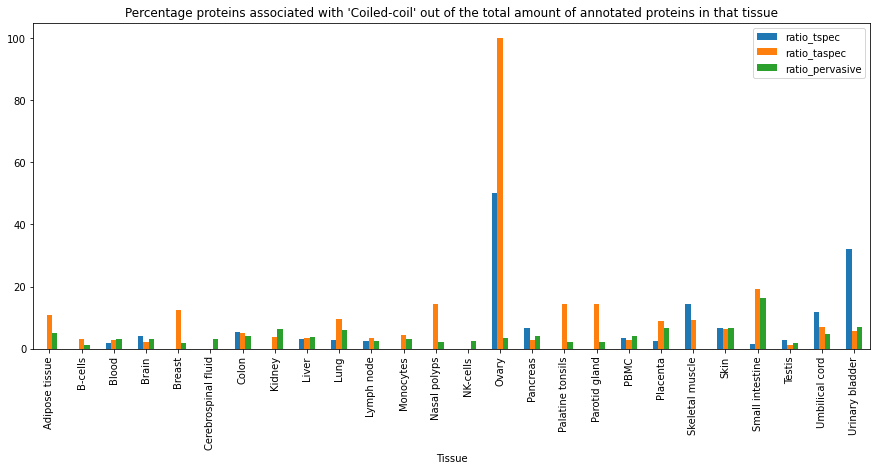

In [60]:
df_coiled_coil_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Coiled-coil")|df_types_tissue.columns.str.contains("Tissue"))]
df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_coiled_coil_tissue = df_coiled_coil_tissue[(df_coiled_coil_tissue["Total_tspec"]>=50)|(df_coiled_coil_tissue["Total_taspec"]>=50)|(df_coiled_coil_tissue["Total_pervasive"]>=50)]
df_coiled_coil_tissue["ratio_tspec"] = df_coiled_coil_tissue["Coiled-coil_tspec"]*100/df_coiled_coil_tissue["Total_tspec"]
df_coiled_coil_tissue["ratio_taspec"] = df_coiled_coil_tissue["Coiled-coil_taspec"]*100/df_coiled_coil_tissue["Total_taspec"]
df_coiled_coil_tissue["ratio_pervasive"] = df_coiled_coil_tissue["Coiled-coil_pervasive"]*100/df_coiled_coil_tissue["Total_pervasive"]

df_coiled_coil_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue")

In [61]:
df_coiled_coil_tissue

Tissue  Coiled-coil_tspec  Coiled-coil_taspec  \
0        Adipose tissue                  0                  13   
1               B-cells                  0                   1   
2                 Blood                 10                  24   
4                 Brain                  3                   2   
5                Breast                  0                   4   
6   Cerebrospinal fluid                  0                   0   
8                 Colon                 86                  65   
15               Kidney                  0                   6   
16                Liver                  3                  10   
17                 Lung                 13                  63   
18           Lymph node                 16                  32   
20            Monocytes                  0                   1   
21         Nasal polyps                  0                   4   
22             NK-cells                  0                   0   
23                Ovary                  1                   1   
24             Pancreas                  1                   1   
25     Palatine tonsils                  0                   4   
26        Parotid gland                  0                   4   
27                 PBMC                 18                  18   
29             Placenta                 10                  21   
30      Skeletal muscle                 20                   4   
31                 Skin                 29                  35   
32      Small intestine                  1                  18   
35               Testis                  3                   1   
37       Umbilical cord                  6                  20   
39      Urinary bladder                  9                  10   

    Coiled-coil_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
0                      10            0           119              199   
1                       1            6            32               87   
2                      36          559           835             1185   
4                      29           76            93              924   
5                       1           16            32               60   
6                      27            2            16              872   
8                      26         1620          1316              658   
15                     16            3           158              257   
16                     43           98           288             1162   
17                     28          444           667              474   
18                     14          659           913              541   
20                     27           22            23              860   
21                      2            0            28               95   
22                      3           11            32              115   
23                     29            2             1              854   
24                     38           15            35              941   
25                      2            0            28               95   
26                      2            0            28               95   
27                     11          522           639              278   
29                     21          427           238              310   
30                      0          139            44              101   
31                     20          429           551              303   
32                     13           73            94               80   
35                      3          113            86              175   
37                     17           51           291              353   
39                     19           28           171              270   

    ratio_tspec  ratio_taspec  ratio_pervasive  
0           NaN     10.924370         5.025126  
1      0.000000      3.125000         1.149425  
2      1.788909      2.874251         3.037975  
4      3.947368      2.150538         3.138528  
5      0.000000  

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1339115317.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1339115317.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Lo

<AxesSubplot:title={'center':"Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

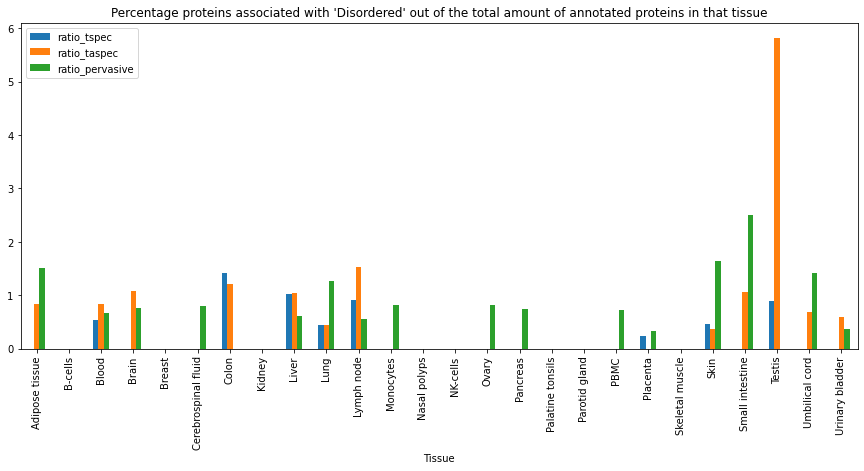

In [62]:
df_disordered_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Disordered")|df_types_tissue.columns.str.contains("Tissue"))]
df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_disordered_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_disordered_tissue = df_disordered_tissue[(df_disordered_tissue["Total_tspec"]>=50)|(df_disordered_tissue["Total_taspec"]>=50)|(df_disordered_tissue["Total_pervasive"]>=50)]
df_disordered_tissue["ratio_tspec"] = df_disordered_tissue["Disordered_tspec"]*100/df_disordered_tissue["Total_tspec"]
df_disordered_tissue["ratio_taspec"] = df_disordered_tissue["Disordered_taspec"]*100/df_disordered_tissue["Total_taspec"]
df_disordered_tissue["ratio_pervasive"] = df_disordered_tissue["Disordered_pervasive"]*100/df_disordered_tissue["Total_pervasive"]

df_disordered_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue")

In [63]:
df_disordered_tissue

Tissue  Disordered_tspec  Disordered_taspec  \
0        Adipose tissue                 0                  1   
1               B-cells                 0                  0   
2                 Blood                 3                  7   
4                 Brain                 0                  1   
5                Breast                 0                  0   
6   Cerebrospinal fluid                 0                  0   
8                 Colon                23                 16   
15               Kidney                 0                  0   
16                Liver                 1                  3   
17                 Lung                 2                  3   
18           Lymph node                 6                 14   
20            Monocytes                 0                  0   
21         Nasal polyps                 0                  0   
22             NK-cells                 0                  0   
23                Ovary                 0                  0   
24             Pancreas                 0                  0   
25     Palatine tonsils                 0                  0   
26        Parotid gland                 0                  0   
27                 PBMC                 0                  0   
29             Placenta                 1                  0   
30      Skeletal muscle                 0                  0   
31                 Skin                 2                  2   
32      Small intestine                 0                  1   
35               Testis                 1                  5   
37       Umbilical cord                 0                  2   
39      Urinary bladder                 0                  1   

    Disordered_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
0                      3            0           119              199   
1                      0            6            32               87   
2                      8          559           835             1185   
4                      7           76            93              924   
5                      0           16            32               60   
6                      7            2            16              872   
8                      0         1620          1316              658   
15                     0            3           158              257   
16                     7           98           288             1162   
17                     6          444           667              474   
18                     3          659           913              541   
20                     7           22            23              860   
21                     0            0            28               95   
22                     0           11            32              115   
23                     7            2             1              854   
24                     7           15            35              941   
25                     0            0            28               95   
26                     0            0            28               95   
27                     2          522           639              278   
29                     1          427           238              310   
30                     0          139            44              101   
31                     5          429           551              303   
32                     2           73            94               80   
35                     0          113            86              175   
37                     5           51           291              353   
39                     1           28           171              270   

    ratio_tspec  ratio_taspec  ratio_pervasive  
0           NaN      0.840336         1.507538  
1      0.000000      0.000000         0.000000  
2      0.536673      0.838323         0.675105  
4      0.000000      1.075269         0.757576  
5      0.000000      0.000000         0.000000  
6      0.000000      0.000000         0.802752  


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/2677423619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/2677423619.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\5

<AxesSubplot:title={'center':"Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

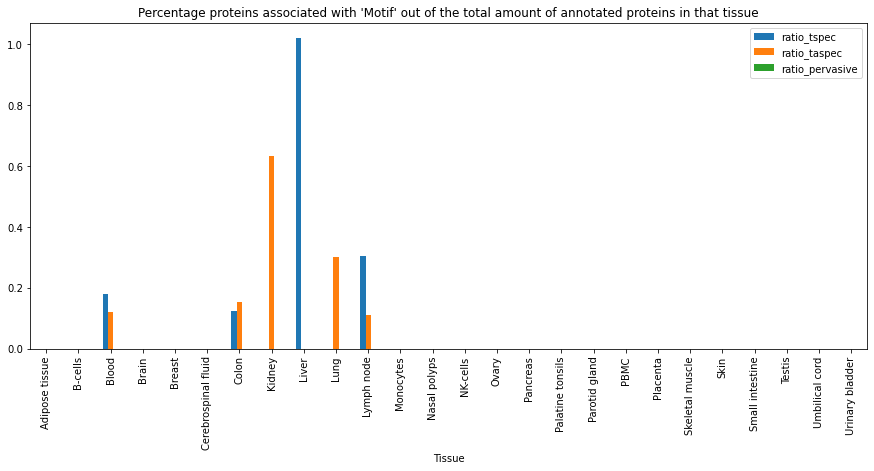

In [64]:
df_motif_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Motif")|df_types_tissue.columns.str.contains("Tissue"))]
df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_motif_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_motif_tissue = df_motif_tissue[(df_motif_tissue["Total_tspec"]>=50)|(df_motif_tissue["Total_taspec"]>=50)|(df_motif_tissue["Total_pervasive"]>=50)]
df_motif_tissue["ratio_tspec"] = df_motif_tissue["Motif_tspec"]*100/df_motif_tissue["Total_tspec"]
df_motif_tissue["ratio_taspec"] = df_motif_tissue["Motif_taspec"]*100/df_motif_tissue["Total_taspec"]
df_motif_tissue["ratio_pervasive"] = df_motif_tissue["Motif_pervasive"]*100/df_motif_tissue["Total_pervasive"]

df_motif_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue")

In [65]:
df_motif_tissue

Tissue  Motif_tspec  Motif_taspec  Motif_pervasive  \
0        Adipose tissue            0             0                0   
1               B-cells            0             0                0   
2                 Blood            1             1                0   
4                 Brain            0             0                0   
5                Breast            0             0                0   
6   Cerebrospinal fluid            0             0                0   
8                 Colon            2             2                0   
15               Kidney            0             1                0   
16                Liver            1             0                0   
17                 Lung            0             2                0   
18           Lymph node            2             1                0   
20            Monocytes            0             0                0   
21         Nasal polyps            0             0                0   
22             NK-cells            0             0                0   
23                Ovary            0             0                0   
24             Pancreas            0             0                0   
25     Palatine tonsils            0             0                0   
26        Parotid gland            0             0                0   
27                 PBMC            0             0                0   
29             Placenta            0             0                0   
30      Skeletal muscle            0             0                0   
31                 Skin            0             0                0   
32      Small intestine            0             0                0   
35               Testis            0             0                0   
37       Umbilical cord            0             0                0   
39      Urinary bladder            0             0                0   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
0             0           119              199          NaN      0.000000   
1             6            32               87     0.000000      0.000000   
2           559           835             1185     0.178891      0.119760   
4            76            93              924     0.000000      0.000000   
5            16            32               60     0.000000      0.000000   
6             2            16              872     0.000000      0.000000   
8          1620          1316              658     0.123457      0.151976   
15            3           158              257     0.000000      0.632911   
16           98           288             1162     1.020408      0.000000   
17          444           667              474     0.000000      0.299850   
18          659           913              541     0.303490      0.109529   
20           22            23              860     0.000000      0.000000   
21            0            28               95          NaN      0.000000   
22           11            32              115     0.000000      0.000000   
23            2             1              854     0.000000      0.000000   
24           15            35              941     0.000000      0.000000   
25            0            28               95          NaN      0.000000   
26            0            28               95          NaN      0.000000   
27          522           639              278     0.000000      0.000000   
29          427           238              310     0.000000      0.000000   
30          139            44              101     0.000000      0.000000   
31          429           551              303     0.000000      0.000000   
32           73            94               80     0.000000      0.000000   
35          113            86              175     0.000000      0.000000   
37           51           291              353     0.000000      0.000000   
39           28           171              270     0.000000      0.000000   

    ratio_pervasive

# 4. Domain names

We'll proceed with the same kind of analysis, now for the domain names.

In [66]:
tspec_sites_pfam_hmm_name = tspec_sites_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites"}, inplace=True, )
tspec_sites_pfam_hmm_name.set_index("hmm name", inplace=True)
taspec_sites_pfam_hmm_name = taspec_sites_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue aspecific phosphosites"}, inplace=True)
taspec_sites_pfam_hmm_name.set_index("hmm name", inplace=True)
gen_sites_pfam_hmm_name = gen_sites_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_pfam_hmm_name.rename(columns ={"ACC_ID": "number of pervasive phosphosites"}, inplace=True)
gen_sites_pfam_hmm_name.set_index("hmm name", inplace=True)

pfam_hmm_name = pd.concat([tspec_sites_pfam_hmm_name, taspec_sites_pfam_hmm_name, gen_sites_pfam_hmm_name], axis=1)

In [67]:
pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphosites"]>15)|
             (pfam_hmm_name["number of tissue aspecific phosphosites"]>15)|
             (pfam_hmm_name["number of pervasive phosphosites"]>15)].shape[0]

55

In [68]:
pfam_hmm_name.shape[0]

1794

In [69]:
pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphosites"]>15)|
             (pfam_hmm_name["number of tissue aspecific phosphosites"]>15)|
             (pfam_hmm_name["number of pervasive phosphosites"]>15)]

number of tissue-specific phosphosites  \
hmm name                                                 
14-3-3                                            19.0   
AbLIM_anchor                                       3.0   
Actin                                             52.0   
Ank_2                                             26.0   
Annexin                                           24.0   
C1-set                                            32.0   
CH                                                34.0   
Cofilin_ADF                                       16.0   
Cpn60_TCP1                                        31.0   
Crystall                                          19.0   
DEAD                                              23.0   
FERM_C                                            16.0   
FERM_M                                            24.0   
Filament                                         140.0   
Filamin                                          104.0   
GTP_EFTU                                          27.0   
Globin                                            13.0   
HSP70                                             42.0   
HSP90                                             22.0   
Helicase_C                                        26.0   
Histone                                           82.0   
I-set                                             16.0   
KH_1                                              21.0   
Keratin_2_head                                    28.0   
Linker_histone                                    10.0   
Lipocalin                                         17.0   
Myosin_head                                       27.0   
Myosin_tail_1                                     29.0   
Oxysterol_BP                                      18.0   
PDZ                                               17.0   
PH                                                31.0   
PK_Tyr_Ser-Thr                                    34.0   
Pkinase                                          151.0   
Plectin                                           88.0   
Proteasome                                        19.0   
RCC1                                              19.0   
RRM_1                                             77.0   
Ras                                               33.0   
RhoGEF                                            32.0   
SARG                                              21.0   
SH2                                               17.0   
Serpin                                            44.0   
Spectrin                                          17.0   
THRAP3_BCLAF1                                     20.0   
Trypsin                                           31.0   
Tubulin                                           49.0   
Tubulin_C                                         45.0   
V-set                                             17.0   
Vinculin                                          19.0   
WD40                                              16.0   
fn3                                               23.0   
ubiquitin                                         46.0   
zf-C2H2                                           23.0   
zf-RanBP                                          16.0   
Ank                                                NaN   

                number of tissue aspecific phosphosites  \
hmm name                                                  
14-3-3                                             18.0   
AbLIM_anchor                                        2.0   
Actin                                              76.0   
Ank_2                                               1.0   
Annexin                                            48.0   
C1-set                                             22.0   
CH                                                 23.0   
Cofilin_ADF                                         6.0   
Cpn60_TCP1                                         13.0   
Crystall                                            NaN   
D

Domains are rarely more associated with sites other than tissue-specific phosphosites, as there are more tissue-specific phosphosites. Only two domains show more pervasive phosphosites (none show tissue-aspecific phosphosites): actin and tubulin_C

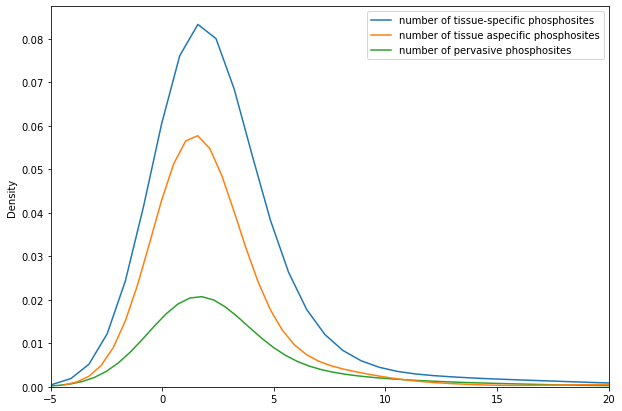

In [70]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name, palette="tab10")
#plt.axvline(x=6, c="black")
#plt.title("Distribution of the number of P-sites in the three categories in a domain")
plt.xlim([-5,20])
#plt.savefig("Distribution_Psites_domains.png", format="png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='hmm name'>

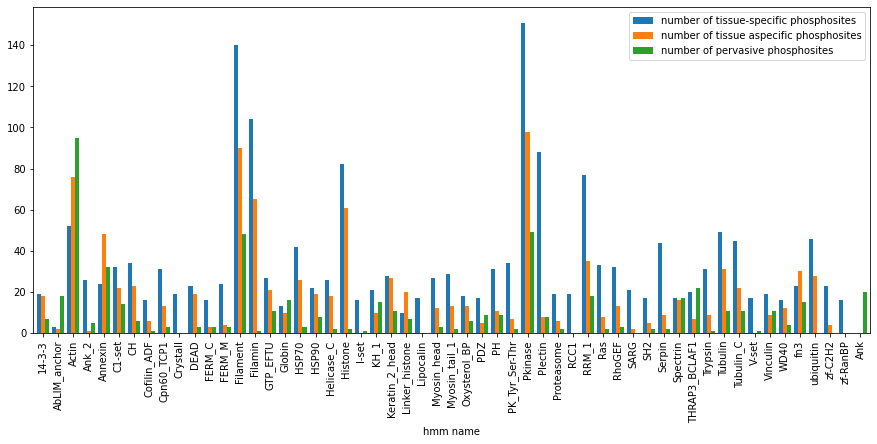

In [71]:
pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphosites"]>15)|
             (pfam_hmm_name["number of tissue aspecific phosphosites"]>15)|
             (pfam_hmm_name["number of pervasive phosphosites"]>15)].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Domains associated with Psites.png", format="png", bbox_inches="tight")

In [72]:
tspec_sites_pfam[tspec_sites_pfam["hmm name"]=="C1-set"] # should be highly specific to immune cells

ACC_ID  UP_POS                                             tissue  \
42     A0M8Q6      10                                     Lung,Lung,Lung   
5704   P01834      66                                              Blood   
5706   P01857      19  Small intestine,Small intestine,Small intestin...   
5707   P01857      19  Small intestine,Small intestine,Small intestin...   
5708   P01857      19  Small intestine,Small intestine,Small intestin...   
5709   P01857      22  Small intestine,Small intestine,Small intestin...   
5710   P01857      22  Small intestine,Small intestine,Small intestin...   
5711   P01857      22  Small intestine,Small intestine,Small intestin...   
5730   P01860      19  Small intestine,Small intestine,Small intestin...   
5731   P01860      19  Small intestine,Small intestine,Small intestin...   
5732   P01860      19  Small intestine,Small intestine,Small intestin...   
5733   P01860      22  Small intestine,Small intestine,Small intestin...   
5734   P01860      22  Small intestine,Small intestine,Small intestin...   
5735   P01860      22  Small intestine,Small intestine,Small intestin...   
5763   P01871      82                                    Small intestine   
5764   P01871      82                                    Small intestine   
5765   P01871      82                                    Small intestine   
5766   P01871      82                                    Small intestine   
5791   P01876      64                    Small intestine,Small intestine   
5792   P01876      64                    Small intestine,Small intestine   
5793   P01876      65                    Small intestine,Small intestine   
5794   P01876      65                    Small intestine,Small intestine   
5795   P01876      66  Small intestine,Small intestine,Small intestin...   
5796   P01876      66  Small intestine,Small intestine,Small intestin...   
5797   P01876      67  Small intestine,Small intestine,Small intestin...   
5798   P01876      67  Small intestine,Small intestine,Small intestin...   
5799   P01876      68  Small intestine,Small intestine,Small intestin...   
5800   P01876      68  Small intestine,Small intestine,Small intestin...   
9051   P0CF74      10                                     Lung,Lung,Lung   
9151   P0DOY2      10                                     Lung,Lung,Lung   
9153   P0DOY3      10                                     Lung,Lung,Lung   
22214  P61769      48                                          Monocytes   

      modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
42         T               0        0      0     0      0       0  ...   
5704       Y               0        0      1     0      0       0  ...   
5706       S               0        0      0     0      0       0  ...   
5707       S               0        0      0     0      0       0  ...   
5708       S               0        0      0     0      0       0  ...   
5709       T               0        0      0     0      0       0  ...   
5710       T               0        0      0     0      0       0  ...   
5711       T               0        0      0     0      0       0  ...   
5730       S               0        0      0     0      0       0  ...   
5731       S               0        0      0     0      0       0  ...   
5732       S               0        0      0     0      0       0  ...   
5733       T               0        0      0     0      0       0  ...   
5734       T               0        0      0     0      0       0  ...   
5735       T               0        0      0     0      0       0  ...   
5763       T               0        0      0     0      0       0  ...   
5764       T               0        0      0     0      0       0  ...   
5765       T               0        0      0     0      0       0  ...   
5766       T               0        0      0     0      0       0  ...   
5791       Y               0        0      0     0      0       0  ...   
5792       Y      

In [73]:
taspec_sites_pfam[taspec_sites_pfam["hmm name"]=="C1-set"]

ACC_ID  UP_POS                                             tissue  \
22    A0M8Q6      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
2071  P01834       7               Breast,Blood,Blood,Blood,Blood,Blood   
2072  P01834      20                Small intestine,Cerebrospinal fluid   
2073  P01834      49  Dental plaque,Dental plaque,Lymph node,Lymph node   
2074  P01834      52     Placenta,Placenta,Placenta,Placenta,Lymph node   
2075  P01857       7                                       Brain,Testis   
2076  P01857       7                                       Brain,Testis   
2077  P01857       7                                       Brain,Testis   
2084  P01859      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2085  P01859      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2086  P01859      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2093  P01861      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2094  P01861      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
2095  P01861      21  PBMC,PBMC,Small intestine,Small intestine,Smal...   
3359  P0CF74      85                              Brain,Small intestine   
3360  P0CG04      85                              Brain,Small intestine   
3428  P0DOY2      47                        PBMC,PBMC,Blood,Blood,Blood   
3429  P0DOY2      85                              Brain,Small intestine   
3430  P0DOY3      47                        PBMC,PBMC,Blood,Blood,Blood   
3431  P0DOY3      85                              Brain,Small intestine   
3988  P15814      61                     Adipose tissue, Umbilical cord   
8862  P61769      46  PBMC,PBMC,PBMC,Cerebrospinal fluid,Adipose tis...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
22        S               0        0      0     0      0       0  ...       0   
2071      S               0        0      1     0      0       1  ...       0   
2072      S               0        0      0     0      0       0  ...       0   
2073      S               0        0      0     0      0       0  ...       0   
2074      S               0        0      0     0      0       0  ...       0   
2075      S               0        0      0     0      1       0  ...       0   
2076      S               0        0      0     0      1       0  ...       0   
2077      S               0        0      0     0      1       0  ...       0   
2084      S               0        0      0     0      0       0  ...       0   
2085      S               0        0      0     0      0       0  ...       0   
2086      S               0        0      0     0      0       0  ...       0   
2093      S               0        0      0     0      0       0  ...       0   
2094      S               0        0      0     0      0       0  ...       0   
2095      S               0        0      0     0      0       0  ...       0   
3359      Y               0        0      0     0      1       0  ...       0   
3360      Y               0        0      0     0      1       0  ...       0   
3428      S               0        0      1     0      0       0  ...       0   
3429      Y               0        0      0     0      1       0  ...       0   
3430      S               0        0      1     0      0       0  ...       0   
3431      Y               0        0      0     0      1       0  ...       0   
3988      S               1        0      0     0      0       0  ...       0   
8862      Y               1        0      0     0      0       0  ...       0   

      Urinary bladder  Urine  Total  hmm start  hmm end  hmm name    type  \
22                  0      0      3          1       85    C1-set  Domain   
2071                0      0      2          1       86    C1-set  Domain   
2072                0      0      2          1       86    C1-set  Domain   
2073                0      0      2          1       86    C1-set  Domain   
2074                0      0   

In [74]:
gen_sites_pfam[gen_sites_pfam["hmm name"]=="C1-set"]

ACC_ID  UP_POS                                             tissue  \
903   P01834      24  Breast,Breast,PBMC,PBMC,Lung,Lung,Lung,Lung,Lu...   
904   P01834      85  PBMC,Urinary bladder, Colon, Kidney, Liver,Uri...   
931   P01876      75  Breast,Lung,Blood,Blood,Blood,Blood,Blood,Bloo...   
932   P01876      75  Breast,Lung,Blood,Blood,Blood,Blood,Blood,Bloo...   
1655  P0CF74      84  Nasal polyps, Palatine tonsils, Parotid gland,...   
1657  P0CG04      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
1658  P0CG04      34  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1659  P0CG04      84  Nasal polyps, Palatine tonsils, Parotid gland,...   
1679  P0DOY2      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
1680  P0DOY2      34  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1681  P0DOY2      84  Nasal polyps, Palatine tonsils, Parotid gland,...   
1683  P0DOY3      31  Nasal polyps, Palatine tonsils, Parotid gland,...   
1684  P0DOY3      34  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1685  P0DOY3      84  Nasal polyps, Palatine tonsils, Parotid gland,...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  Ureter  \
903       S               0        0      1     0      1       1  ...       0   
904       Y               0        0      1     0      1       0  ...       0   
931       T               0        0      1     0      0       1  ...       0   
932       T               0        0      1     0      0       1  ...       0   
1655      S               0        0      1     0      0       0  ...       0   
1657      S               0        0      1     0      1       0  ...       0   
1658      Y               0        0      1     0      1       0  ...       0   
1659      S               0        0      1     0      0       0  ...       0   
1679      S               0        0      1     0      1       0  ...       0   
1680      Y               0        0      1     0      1       0  ...       0   
1681      S               0        0      1     0      0       0  ...       0   
1683      S               0        0      1     0      1       0  ...       0   
1684      Y               0        0      1     0      1       0  ...       0   
1685      S               0        0      1     0      0       0  ...       0   

      Urinary bladder  Urine  Total  hmm start  hmm end  hmm name    type  \
903                 0      0     12          1       86    C1-set  Domain   
904                 1      1     12          1       86    C1-set  Domain   
931                 1      1      8          1       86    C1-set  Domain   
932                 1      1      8          1       85    C1-set  Domain   
1655                0      0      6          1       85    C1-set  Domain   
1657                0      0     10          1       85    C1-set  Domain   
1658                0      0      7          1       85    C1-set  Domain   
1659                0      0      6          1       85    C1-set  Domain   
1679                0      0     10          1       85    C1-set  Domain   
1680                0      0      7          1       85    C1-set  Domain   
1681                0      0      6          1       85    C1-set  Domain   
1683                0      0     10          1       85    C1-set  Domain   
1684                0      0      7          1       85    C1-set  Domain   
1685                0      0      6          1       85    C1-set  Domain   

        clan       E-value  
903   CL0011  1.300000e-21  
904   CL0011  1.300000e-21  
931   CL0011  5.800000e-17  
932   CL0011  2.400000e-13  
1655  CL0011  1.200000e-28  
1657  CL0011  1.400000e-28  
1658  CL0011  1.400000e-28  
1659  CL0011  1.400000e-28  
1679  CL0011  5.900000e-28  
1680  CL0011  5.900000e-28  
1681  CL0011  5.900000e-28  
1683  CL0011  2.500000e-28  
1684  CL0011  2.500000e-28  
1685  CL0011  2.500000e-28  

[14 rows x 52 columns]

In [75]:
data_all = pd.read_csv("phospho_data_tissue_annotation_enrichment1.txt", sep="\t")
data_all.dropna(inplace=True)
data_all.shape[0]

585310

In [77]:
data_all = data_all[(data_all["modres"]=="S")|(data_all["modres"]=="T")|(data_all["modres"]=="Y")]
data_gr = data_all.groupby(["ACC_ID", "UP_POS", "modres"], as_index=False).agg({"peptide": lambda x: max(x, key=len),
                                                                 "pep_start": lambda x: min(x), "pep_end": lambda x: max(x)})
list_S = []
list_T = []
list_Y = []
for i in range(30):
    col = "S"+ str(i)
    data_gr[col] = None
    data_gr.loc[(data_gr["peptide"].str[i]=="S") & (data_gr["pep_start"]+i<=data_gr["pep_end"]) & (data_gr["pep_start"]+i != data_gr["UP_POS"]) , col] = data_gr["pep_start"]+i
    list_S.append(col)
    col_T = "T"+ str(i)
    data_gr[col_T] = None
    data_gr.loc[(data_gr["peptide"].str[i]=="T") & (data_gr["pep_start"]+i<=data_gr["pep_end"]) & (data_gr["pep_start"]+i != data_gr["UP_POS"]) , col_T] = data_gr["pep_start"]+i
    list_T.append(col_T)
    col_Y = "Y"+ str(i)
    data_gr[col_Y] = None
    data_gr.loc[(data_gr["peptide"].str[i]=="Y") & (data_gr["pep_start"]+i<=data_gr["pep_end"]) & (data_gr["pep_start"]+i != data_gr["UP_POS"]) , col_Y] = data_gr["pep_start"]+i
    list_Y.append(col_Y)
data_gr

ACC_ID  UP_POS modres                      peptide  pep_start  \
0      A0A075B6H7      30      T           EIVMTQSPPTLSLSPGER         21   
1      A0A075B6S5      52      S              ASQGISNYLAWYQQK         47   
2      A0A087WXM9     223      S                TVMTVADQNVSPK        213   
3      A0A0B4J2D5     124      S  GKITDLANLSAANHDAAIFPGGFGAAK        115   
4      A0A0B4J2D5     145      T                NLSTFAVDGKDCK        142   
...           ...     ...    ...                          ...        ...   
23877      Q9Y6Y0     326      S                 NSPQSSPTSTPK        321   
23878      Q9Y6Y0     336      S               SLSFEMQQDELIEK        336   
23879      Q9Y6Y0     338      S               SLSFEMQQDELIEK        336   
23880      Q9Y6Y8     737      S                DMASLPSESNEPK        734   
23881      Q9Y6Y8     926      S             VVESPDFSKDEDYLGK        923   

       pep_end    S0    T0    Y0    S1  ...   Y26   S27   T27   Y27   S28  \
0           38  None  None  None  None  ...  None  None  None  None  None   
1           61  None  None  None    48  ...  None  None  None  None  None   
2          225  None   213  None  None  ...  None  None  None  None  None   
3          141  None  None  None  None  ...  None  None  None  None  None   
4          154  None  None  None  None  ...  None  None  None  None  None   
...        ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   
23877      332  None  None  None   322  ...  None  None  None  None  None   
23878      349  None  None  None  None  ...  None  None  None  None  None   
23879      349   336  None  None  None  ...  None  None  None  None  None   
23880      746  None  None  None  None  ...  None  None  None  None  None   
23881      938  None  None  None  None  ...  None  None  None  None  None   

        T28   Y28   S29   T29   Y29  
0      None  None  None  None  None  
1      None  None  None  None  None  
2      None  None  None  None  None  
3      None  None  None  None  None  
4      None  None  None  None  None  
...     ...   ...   ...   ...   ...  
23877  None  None  None  None  None  
23878  None  None  None  None  None  
23879  None  None  None  None  None  
23880  None  None  None  None  None  
23881  None  None  None  None  None  

[23882 rows x 96 columns]

In [79]:
domain_res = pd.DataFrame({})
for n in list_S:
    print(n)
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        domain_res = domain_res.append(sub)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_T:
    print(n)
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        domain_res = domain_res.append(sub)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_Y:
    print(n)
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        domain_res = domain_res.append(sub)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)       
domain_res

S0
S1


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3174922377.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)


S2
S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
S29
T0
T1


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3174922377.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)


T2
T3
T4
T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
T29
Y0


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3174922377.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)


Y1
Y2
Y3
Y4
Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28
Y29


ACC_ID  UP_POS modres                         peptide  pep_start  pep_end  \
26  A1L429      10      Y                       STYYWPRPR          7       15   
27  A2AJT9      17      S                         SLSPVPR         15       21   
28  A3KN83     214      S                         SFSPTMK        212      218   
29  A3KN83     214      S                         SFSPTMK        212      218   
80  A5PKW4     133      S          SWDLGGVSPPRPTPALGPGSNR        126      147   
..     ...     ...    ...                             ...        ...      ...   
47  Q99613      15      S  FFTTGSDSESESSLSGEELVTKPVGGNYGK          4       33   
48  Q99613      15      S  FFTTGSDSESESSLSGEELVTKPVGGNYGK          4       33   
14  P40425     146      S  GGGSAAAAAAAAASGGGVSPDNSIEHSDYR        133      162   
16  P40425     151      S  GGGSAAAAAAAAASGGGVSPDNSIEHSDYR        133      162   
17  P42126     144      S  LYQSNLVLVSAINGACPAGGCLVALTCDYR        135      164   

    pos_int    T0    Y0    S1  ...   T29   Y29 hmm start hmm end  \
26        7  None  None  None  ...  None  None         1     107   
27       15  None  None  None  ...  None  None         1     661   
28      212  None  None  None  ...  None  None         1     271   
29      212  None  None  None  ...  None  None         1     302   
80      126  None  None  None  ...  None  None        32     182   
..      ...   ...   ...   ...  ...   ...   ...       ...     ...   
47       31  None  None  None  ...  None  None         2     105   
48       31  None  None  None  ...  None  None         3     593   
14      161  None  None  None  ...  None  None         1     181   
16      161  None  None  None  ...  None  None         1     181   
17      163  None  None  None  ...  None  None         3     245   

         hmm name    type     clan        E-value res    S0  
26           GAGE  Family  No_clan   2.500000e-29   S   NaN  
27  THRAP3_BCLAF1  Family  No_clan  2.600000e-217   S   NaN  
28   Helicase_C_4  Domain   CL0023  2.200000e-119   S   NaN  
29         AAA_34  Domain   CL0023  1.700000e-134   S   NaN  
80           Sec7  Domain  No_clan   1.800000e-38   S   NaN  
..            ...     ...      ...            ...  ..   ...  
47            PCI  Domain   CL0123   4.600000e-13   S  None  
48       eIF-3c_N  Repeat   CL0020  3.200000e-268   S  None  
14            PBC  Family  No_clan   2.000000e-83   S  None  
16            PBC  Family  No_clan   2.000000e-83   S  None  
17          ECH_1  Domain   CL0127   3.000000e-88   S  None  

[28574 rows x 104 columns]

In [80]:
domain_res.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"peptide": "first"}).shape[0]

6042

In [81]:
domain_res.groupby(["ACC_ID", "pos_int"], as_index=False).agg({"peptide": "first"}).shape[0]

12461

In [82]:
domain_res

ACC_ID  UP_POS modres                         peptide  pep_start  pep_end  \
26  A1L429      10      Y                       STYYWPRPR          7       15   
27  A2AJT9      17      S                         SLSPVPR         15       21   
28  A3KN83     214      S                         SFSPTMK        212      218   
29  A3KN83     214      S                         SFSPTMK        212      218   
80  A5PKW4     133      S          SWDLGGVSPPRPTPALGPGSNR        126      147   
..     ...     ...    ...                             ...        ...      ...   
47  Q99613      15      S  FFTTGSDSESESSLSGEELVTKPVGGNYGK          4       33   
48  Q99613      15      S  FFTTGSDSESESSLSGEELVTKPVGGNYGK          4       33   
14  P40425     146      S  GGGSAAAAAAAAASGGGVSPDNSIEHSDYR        133      162   
16  P40425     151      S  GGGSAAAAAAAAASGGGVSPDNSIEHSDYR        133      162   
17  P42126     144      S  LYQSNLVLVSAINGACPAGGCLVALTCDYR        135      164   

    pos_int    T0    Y0    S1  ...   T29   Y29 hmm start hmm end  \
26        7  None  None  None  ...  None  None         1     107   
27       15  None  None  None  ...  None  None         1     661   
28      212  None  None  None  ...  None  None         1     271   
29      212  None  None  None  ...  None  None         1     302   
80      126  None  None  None  ...  None  None        32     182   
..      ...   ...   ...   ...  ...   ...   ...       ...     ...   
47       31  None  None  None  ...  None  None         2     105   
48       31  None  None  None  ...  None  None         3     593   
14      161  None  None  None  ...  None  None         1     181   
16      161  None  None  None  ...  None  None         1     181   
17      163  None  None  None  ...  None  None         3     245   

         hmm name    type     clan        E-value res    S0  
26           GAGE  Family  No_clan   2.500000e-29   S   NaN  
27  THRAP3_BCLAF1  Family  No_clan  2.600000e-217   S   NaN  
28   Helicase_C_4  Domain   CL0023  2.200000e-119   S   NaN  
29         AAA_34  Domain   CL0023  1.700000e-134   S   NaN  
80           Sec7  Domain  No_clan   1.800000e-38   S   NaN  
..            ...     ...      ...            ...  ..   ...  
47            PCI  Domain   CL0123   4.600000e-13   S  None  
48       eIF-3c_N  Repeat   CL0020  3.200000e-268   S  None  
14            PBC  Family  No_clan   2.000000e-83   S  None  
16            PBC  Family  No_clan   2.000000e-83   S  None  
17          ECH_1  Domain   CL0127   3.000000e-88   S  None  

[28574 rows x 104 columns]

In [83]:
domain_res[domain_res["UP_POS"]==domain_res["pos_int"]]

Empty DataFrame
Columns: [ACC_ID, UP_POS, modres, peptide, pep_start, pep_end, pos_int, T0, Y0, S1, T1, Y1, S2, T2, Y2, S3, T3, Y3, S4, T4, Y4, S5, T5, Y5, S6, T6, Y6, S7, T7, Y7, S8, T8, Y8, S9, T9, Y9, S10, T10, Y10, S11, T11, Y11, S12, T12, Y12, S13, T13, Y13, S14, T14, Y14, S15, T15, Y15, S16, T16, Y16, S17, T17, Y17, S18, T18, Y18, S19, T19, Y19, S20, T20, Y20, S21, T21, Y21, S22, T22, Y22, S23, T23, Y23, S24, T24, Y24, S25, T25, Y25, S26, T26, Y26, S27, T27, Y27, S28, T28, Y28, S29, T29, Y29, hmm start, hmm end, hmm name, type, ...]
Index: []

[0 rows x 104 columns]

In [84]:
domain_res_tspec = pd.merge(tspec_sites[["ACC_ID", "UP_POS"]], domain_res, how="inner", on=["ACC_ID", "UP_POS"])
print(domain_res_tspec.groupby(["ACC_ID", "pos_int"], as_index=False).agg({"peptide": "first"}).shape[0])
domain_res_taspec = pd.merge(taspec_sites[["ACC_ID", "UP_POS"]], domain_res, how="inner", on=["ACC_ID", "UP_POS"])
print(domain_res_taspec.groupby(["ACC_ID", "pos_int"], as_index=False).agg({"peptide": "first"}).shape[0])
domain_res_gen = pd.merge(gen_sites[["ACC_ID", "UP_POS"]], domain_res, how="inner", on=["ACC_ID", "UP_POS"])
print(domain_res_gen.groupby(["ACC_ID", "pos_int"], as_index=False).agg({"peptide": "first"}).shape[0])

8426
4226
2277


In [85]:
tspec_sites_pfam_hmm_name_nonP = domain_res_tspec.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_pfam_hmm_name_nonP.rename(columns ={"ACC_ID": "canonical sites near tissue-specific phosphosites"}, inplace=True, )
tspec_sites_pfam_hmm_name_nonP.set_index("hmm name", inplace=True)
taspec_sites_pfam_hmm_name_nonP = domain_res_taspec.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_pfam_hmm_name_nonP.rename(columns ={"ACC_ID": "canonical sites near tissue aspecific phosphosites"}, inplace=True)
taspec_sites_pfam_hmm_name_nonP.set_index("hmm name", inplace=True)
gen_sites_pfam_hmm_name_nonP = domain_res_gen.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_pfam_hmm_name_nonP.rename(columns ={"ACC_ID": "canonical sites near pervasive phosphosites"}, inplace=True)
gen_sites_pfam_hmm_name_nonP.set_index("hmm name", inplace=True)

pfam_hmm_name_nonP = pd.concat([tspec_sites_pfam_hmm_name_nonP, taspec_sites_pfam_hmm_name_nonP, gen_sites_pfam_hmm_name_nonP], axis=1)

In [86]:
pfam_hmm_name_nonP

canonical sites near tissue-specific phosphosites  \
hmm name                                                        
1-cysPrx_C                                                1.0   
14-3-3                                                   40.0   
3HCDH                                                     4.0   
3HCDH_N                                                   4.0   
40S_S4_C                                                  6.0   
...                                                       ...   
Vps53_N                                                   NaN   
ZU5                                                       NaN   
muHD                                                      NaN   
p25-alpha                                                 NaN   
wnt                                                       NaN   

            canonical sites near tissue aspecific phosphosites  \
hmm name                                                         
1-cysPrx_C                                                NaN    
14-3-3                                                   36.0    
3HCDH                                                     NaN    
3HCDH_N                                                   NaN    
40S_S4_C                                                  NaN    
...                                                       ...    
Vps53_N                                                   NaN    
ZU5                                                       NaN    
muHD                                                      NaN    
p25-alpha                                                 NaN    
wnt                                                       NaN    

            canonical sites near pervasive phosphosites  
hmm name                                                 
1-cysPrx_C                                          NaN  
14-3-3                                             14.0  
3HCDH                                               NaN  
3HCDH_N                                             NaN  
40S_S4_C                                            NaN  
...                                                 ...  
Vps53_N                                             3.0  
ZU5                                                 6.0  
muHD                                                2.0  
p25-alpha                                           5.0  
wnt                                                 4.0  

[1696 rows x 3 columns]

In [87]:
pfam_hmm_name_all = pd.concat([pfam_hmm_name, pfam_hmm_name_nonP], axis=1)
pfam_hmm_name_all

number of tissue-specific phosphosites  \
hmm name                                               
1-cysPrx_C                                       2.0   
14-3-3                                          19.0   
2-oxoacid_dh                                     1.0   
3HCDH                                            2.0   
3HCDH_N                                          2.0   
...                                              ...   
zf-CCCH_3                                        NaN   
EF-hand_11                                       NaN   
EF-hand_8                                        NaN   
NPM1-C                                           NaN   
OCRE                                             NaN   

              number of tissue aspecific phosphosites  \
hmm name                                                
1-cysPrx_C                                        NaN   
14-3-3                                           18.0   
2-oxoacid_dh                                      NaN   
3HCDH                                             NaN   
3HCDH_N                                           NaN   
...                                               ...   
zf-CCCH_3                                         NaN   
EF-hand_11                                        NaN   
EF-hand_8                                         NaN   
NPM1-C                                            NaN   
OCRE                                              NaN   

              number of pervasive phosphosites  \
hmm name                                         
1-cysPrx_C                                 NaN   
14-3-3                                     7.0   
2-oxoacid_dh                               NaN   
3HCDH                                      NaN   
3HCDH_N                                    NaN   
...                                        ...   
zf-CCCH_3                                  NaN   
EF-hand_11                                 NaN   
EF-hand_8                                  NaN   
NPM1-C                                     NaN   
OCRE                                       NaN   

              canonical sites near tissue-specific phosphosites  \
hmm name                                                          
1-cysPrx_C                                                  1.0   
14-3-3                                                     40.0   
2-oxoacid_dh                                                NaN   
3HCDH                                                       4.0   
3HCDH_N                                                     4.0   
...                                                         ...   
zf-CCCH_3                                                   NaN   
EF-hand_11                                                  NaN   
EF-hand_8                                                   NaN   
NPM1-C                                                      NaN   
OCRE                                                        NaN   

              canonical sites near tissue aspecific phosphosites  \
hmm name                                                           
1-cysPrx_C                                                  NaN    
14-3-3                                                     36.0    
2-oxoacid_dh                                                NaN    
3HCDH                                                       NaN    
3HCDH_N                                                     NaN    
...                                                         ...    
zf-CCCH_3                                                   2.0    
EF-hand_11                                                  NaN    
EF-hand_8                                                   NaN    
NPM1-C                                                      NaN    
OCRE                                                        NaN    

              canonical sites near pervasive phosphosites  
hmm name                                                   
1-cysPrx_C     

In [88]:
pfam_hmm_name_all["ratio tissue-specific P-sites"] = (pfam_hmm_name_all["number of tissue-specific phosphosites"])*100/(pfam_hmm_name_all["canonical sites near tissue-specific phosphosites"])
pfam_hmm_name_all["ratio tissue aspecific P-sites"] = (pfam_hmm_name_all["number of tissue aspecific phosphosites"])*100/(pfam_hmm_name_all["canonical sites near tissue aspecific phosphosites"])
pfam_hmm_name_all["ratio pervasive P-sites"] = (pfam_hmm_name_all["number of pervasive phosphosites"])*100/(pfam_hmm_name_all["canonical sites near pervasive phosphosites"])
pfam_hmm_name_all

number of tissue-specific phosphosites  \
hmm name                                               
1-cysPrx_C                                       2.0   
14-3-3                                          19.0   
2-oxoacid_dh                                     1.0   
3HCDH                                            2.0   
3HCDH_N                                          2.0   
...                                              ...   
zf-CCCH_3                                        NaN   
EF-hand_11                                       NaN   
EF-hand_8                                        NaN   
NPM1-C                                           NaN   
OCRE                                             NaN   

              number of tissue aspecific phosphosites  \
hmm name                                                
1-cysPrx_C                                        NaN   
14-3-3                                           18.0   
2-oxoacid_dh                                      NaN   
3HCDH                                             NaN   
3HCDH_N                                           NaN   
...                                               ...   
zf-CCCH_3                                         NaN   
EF-hand_11                                        NaN   
EF-hand_8                                         NaN   
NPM1-C                                            NaN   
OCRE                                              NaN   

              number of pervasive phosphosites  \
hmm name                                         
1-cysPrx_C                                 NaN   
14-3-3                                     7.0   
2-oxoacid_dh                               NaN   
3HCDH                                      NaN   
3HCDH_N                                    NaN   
...                                        ...   
zf-CCCH_3                                  NaN   
EF-hand_11                                 NaN   
EF-hand_8                                  NaN   
NPM1-C                                     NaN   
OCRE                                       NaN   

              canonical sites near tissue-specific phosphosites  \
hmm name                                                          
1-cysPrx_C                                                  1.0   
14-3-3                                                     40.0   
2-oxoacid_dh                                                NaN   
3HCDH                                                       4.0   
3HCDH_N                                                     4.0   
...                                                         ...   
zf-CCCH_3                                                   NaN   
EF-hand_11                                                  NaN   
EF-hand_8                                                   NaN   
NPM1-C                                                      NaN   
OCRE                                                        NaN   

              canonical sites near tissue aspecific phosphosites  \
hmm name                                                           
1-cysPrx_C                                                  NaN    
14-3-3                                                     36.0    
2-oxoacid_dh                                                NaN    
3HCDH                                                       NaN    
3HCDH_N                                                     NaN    
...                                                         ...    
zf-CCCH_3                                                   2.0    
EF-hand_11                                                  NaN    
EF-hand_8                                                   NaN    
NPM1-C                                                      NaN    
OCRE                                                        NaN    

              canonical sites near pervasive phosphosites  \
hmm name                                                    
1-cysPrx_C   

In [89]:
#pfam_hmm_name["ratio_tissue_specific_P-sites"] = pfam_hmm_name["number of tissue-specific phosphosites"]*100/(tspec_sites_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"hmm name": "first"}).shape[0])
#pfam_hmm_name["ratio_tissue_aspecific_P-sites"] = pfam_hmm_name["number of tissue aspecific phosphosites"]*100/(taspec_sites_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"hmm name": "first"}).shape[0])
#pfam_hmm_name["ratio_pervasive_P-sites"] = pfam_hmm_name["number of pervasive phosphosites"]*100/(gen_sites_pfam.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"hmm name": "first"}).shape[0])
#pfam_hmm_name

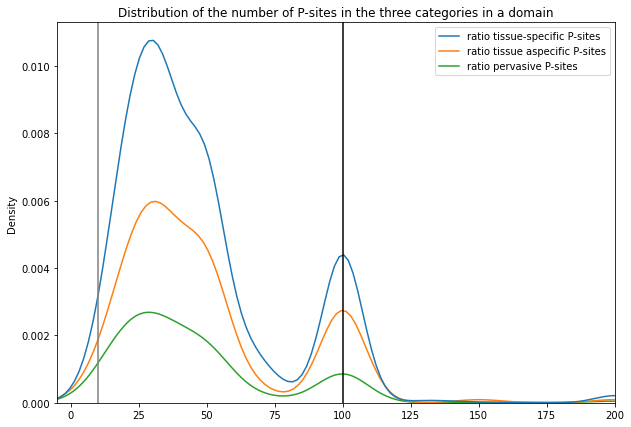

In [90]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name_all[["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]], palette="tab10")
plt.axvline(x=100, c="black")
plt.axvline(x=10, c="grey")
plt.title("Distribution of the number of P-sites in the three categories in a domain")
plt.xlim([-5,200])
#plt.savefig("Distribution_Psites_domains.png", format="png", bbox_inches="tight")
plt.show()

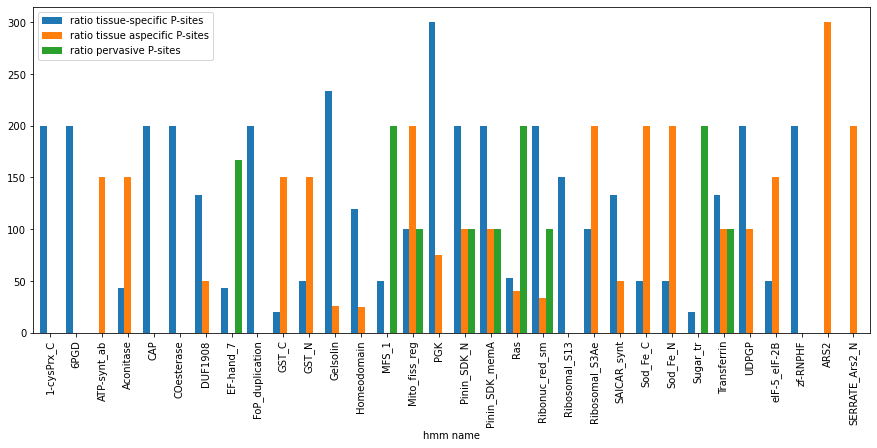

In [91]:
pfam_hmm_name_all[(pfam_hmm_name_all["ratio tissue-specific P-sites"]>100)|
             (pfam_hmm_name_all["ratio tissue aspecific P-sites"]>100)|
             (pfam_hmm_name_all["ratio pervasive P-sites"]>100)][["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]].plot(kind="bar", figsize=(15,6), width=0.8)
plt.savefig("Domains associated with more Psites.png", format="png", bbox_inches="tight")

In [92]:
pfam_hmm_name_all[(pfam_hmm_name_all["ratio tissue-specific P-sites"]>100)|
             (pfam_hmm_name_all["ratio tissue aspecific P-sites"]>100)|
             (pfam_hmm_name_all["ratio pervasive P-sites"]>100)]

number of tissue-specific phosphosites  \
hmm name                                                  
1-cysPrx_C                                          2.0   
6PGD                                                2.0   
ATP-synt_ab                                         2.0   
Aconitase                                           3.0   
CAP                                                 2.0   
COesterase                                          2.0   
DUF1908                                             4.0   
EF-hand_7                                           3.0   
FoP_duplication                                     2.0   
GST_C                                               1.0   
GST_N                                               3.0   
Gelsolin                                            7.0   
Homeodomain                                         6.0   
MFS_1                                               5.0   
Mito_fiss_reg                                       1.0   
PGK                                                 3.0   
Pinin_SDK_N                                         2.0   
Pinin_SDK_memA                                      2.0   
Ras                                                33.0   
Ribonuc_red_sm                                      2.0   
Ribosomal_S13                                       3.0   
Ribosomal_S3Ae                                      2.0   
SAICAR_synt                                         4.0   
Sod_Fe_C                                            1.0   
Sod_Fe_N                                            1.0   
Sugar_tr                                            1.0   
Transferrin                                         8.0   
UDPGP                                               2.0   
eIF-5_eIF-2B                                        1.0   
zf-RNPHF                                            2.0   
ARS2                                                NaN   
SERRATE_Ars2_N                                      NaN   

                 number of tissue aspecific phosphosites  \
hmm name                                                   
1-cysPrx_C                                           NaN   
6PGD                                                 NaN   
ATP-synt_ab                                          3.0   
Aconitase                                            3.0   
CAP                                                  NaN   
COesterase                                           NaN   
DUF1908                                              2.0   
EF-hand_7                                            NaN   
FoP_duplication                                      NaN   
GST_C                                                3.0   
GST_N                                                3.0   
Gelsolin                                             5.0   
Homeodomain                                          1.0   
MFS_1                                                NaN   
Mito_fiss_reg                                        2.0   
PGK                                                  6.0   
Pinin_SDK_N                                          1.0   
Pinin_SDK_memA                                       1.0   
Ras                                                  8.0   
Ribonuc_red_sm                                       1.0   
Ribosomal_S13                                        NaN   
Ribosomal_S3Ae                                       2.0   
SAICAR_synt                                          2.0   
Sod_Fe_C                                             2.0   
Sod_Fe_N                                             2.0   
Sugar_tr                                             NaN   
Transferrin                                          6.0   
UDPGP                                                1.0   
eIF-5_eIF-2B                                         3.0   
zf-RNPHF                                             NaN   
ARS2                                                 3.0   
SERRATE_Ars2_N                

<AxesSubplot:xlabel='hmm name'>

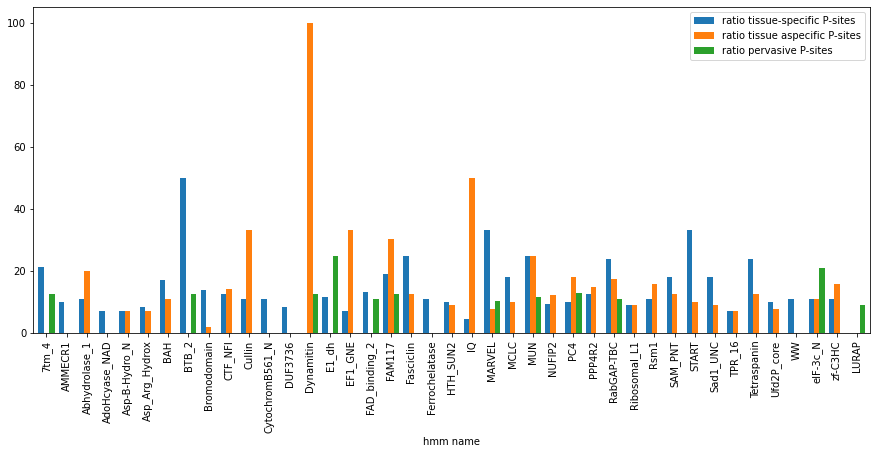

In [93]:
pfam_hmm_name_all[(pfam_hmm_name_all["ratio tissue-specific P-sites"]<13)|
             (pfam_hmm_name_all["ratio tissue aspecific P-sites"]<13)|
             (pfam_hmm_name_all["ratio pervasive P-sites"]<13)][["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Domains associated with nonPsites.png", format="png", bbox_inches="tight")

In [94]:
pfam_hmm_name_all[(pfam_hmm_name_all["ratio tissue-specific P-sites"]<13)|
             (pfam_hmm_name_all["ratio tissue aspecific P-sites"]<13)|
             (pfam_hmm_name_all["ratio pervasive P-sites"]<13)]

number of tissue-specific phosphosites  \
hmm name                                                  
7tm_4                                               3.0   
AMMECR1                                             1.0   
Abhydrolase_1                                       1.0   
AdoHcyase_NAD                                       1.0   
Asp-B-Hydro_N                                       6.0   
Asp_Arg_Hydrox                                      7.0   
BAH                                                 5.0   
BTB_2                                               1.0   
Bromodomain                                        12.0   
CTF_NFI                                             5.0   
Cullin                                              9.0   
CytochromB561_N                                     1.0   
DUF3736                                             2.0   
Dynamitin                                           1.0   
E1_dh                                               4.0   
EF1_GNE                                             1.0   
FAD_binding_2                                       5.0   
FAM117                                             12.0   
Fasciclin                                           4.0   
Ferrochelatase                                      2.0   
HTH_SUN2                                            1.0   
IQ                                                  2.0   
MARVEL                                              1.0   
MCLC                                                2.0   
MUN                                                 3.0   
NUFIP2                                             11.0   
PC4                                                 2.0   
PPP4R2                                              1.0   
RabGAP-TBC                                         11.0   
Ribosomal_L1                                        1.0   
Rsm1                                                2.0   
SAM_PNT                                             4.0   
START                                               2.0   
Sad1_UNC                                            2.0   
TPR_16                                              6.0   
Tetraspanin                                         5.0   
Ufd2P_core                                          6.0   
WW                                                  1.0   
eIF-3c_N                                            4.0   
zf-C3HC                                             2.0   
LURAP                                               NaN   

                 number of tissue aspecific phosphosites  \
hmm name                                                   
7tm_4                                                NaN   
AMMECR1                                              NaN   
Abhydrolase_1                                        1.0   
AdoHcyase_NAD                                        NaN   
Asp-B-Hydro_N                                        8.0   
Asp_Arg_Hydrox                                       8.0   
BAH                                                  2.0   
BTB_2                                                NaN   
Bromodomain                                          1.0   
CTF_NFI                                              1.0   
Cullin                                               3.0   
CytochromB561_N                                      NaN   
DUF3736                                              NaN   
Dynamitin                                            1.0   
E1_dh                                                NaN   
EF1_GNE                                              2.0   
FAD_binding_2                                        NaN   
FAM117                                               7.0   
Fasciclin                                            4.0   
Ferrochelatase                                       NaN   
HTH_SUN2                                             1.0   
IQ                                                   1.0   
MARVEL                                 

In [95]:
all_sites_pfam = pd.merge(data_site, pfam_sub, how="inner")
all_sites_pfam = all_sites_pfam.loc[(all_sites_pfam["UP_POS"]>=all_sites_pfam["hmm start"])&
                                             (all_sites_pfam["UP_POS"]<=all_sites_pfam["hmm end"]),:]
all_sites_pfam

ACC_ID  UP_POS                                             tissue  \
0      A0A075B6H7      30                                               Lung   
1      A0A075B6S5      52                                    Menstrual fluid   
2      A0A0B4J2D9      52                                  Blood,Blood,Blood   
4      A0A0C4DH24      75                                    Skeletal muscle   
6      A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
...           ...     ...                                                ...   
90283      Q9Y6T7     123  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
90376      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
90377      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
90378      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
90379      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

      modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0          T               0        0      0     0      0       0  ...   
1          S               0        0      0     0      0       0  ...   
2          S               0        0      1     0      0       0  ...   
4          S               0        0      0     0      0       0  ...   
6          S               0        0      1     0      1       0  ...   
...      ...             ...      ...    ...   ...    ...     ...  ...   
90283      S               0        0      1     0      1       0  ...   
90376      T               0        0      0     0      0       0  ...   
90377      T               0        0      0     0      0       0  ...   
90378      T               0        0      0     0      0       0  ...   
90379      T               0        0      0     0      0       0  ...   

       Umbilical cord  Ureter  Urinary bladder  Urine  hmm start  hmm end  \
0                   0       0                0      0          1       91   
1                   0       0                0      0          1       92   
2                   0       0                0      0          1       92   
4                   0       0                0      0          2       91   
6                   0       0                0      0          9       91   
...               ...     ...              ...    ...        ...      ...   
90283               0       0                0      0          2      160   
90376               0       0                0      0          8       56   
90377               0       0                0      0          8       52   
90378               0       0                0      0          8       53   
90379               0       0                0      0          2       52   

          hmm name    type    clan       E-value  
0            V-set  Domain  CL0011  1.100000e-13  
1            V-set  Domain  CL0011  2.200000e-13  
2            V-set  Domain  CL0011  7.100000e-13  
4            V-set  Domain  CL0011  1.200000e-11  
6            V-set  Domain  CL0011  7.200000e-07  
...            ...     ...     ...           ...  
90283     DAGK_acc  Family  CL0701  1.200000e-53  
90376  Homeodomain  Domain  CL0123  5.200000e-03  
90377  Homeodomain  Domain  CL0123  8.300000e-03  
90378  Homeodomain  Domain  CL0123  6.000000e-02  
90379  zf_C2H2_ZHX  Domain  CL0361  1.400000e-19  

[9530 rows x 51 columns]

In [96]:
Psites_pfam_hmm_name = all_sites_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
Psites_pfam_hmm_name.rename(columns ={"ACC_ID": "phosphosites"}, inplace=True, )
Psites_pfam_hmm_name.set_index("hmm name", inplace=True)

nonPsites_pfam_hmm_name = domain_res.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
nonPsites_pfam_hmm_name.rename(columns ={"ACC_ID": "nonPsites"}, inplace=True, )
nonPsites_pfam_hmm_name.set_index("hmm name", inplace=True)

pfam_hmm_name_all = pd.concat([Psites_pfam_hmm_name, nonPsites_pfam_hmm_name], axis=1)

In [97]:
pfam_hmm_name_all["ratio"] = pfam_hmm_name_all["phosphosites"]*100/pfam_hmm_name_all["nonPsites"]

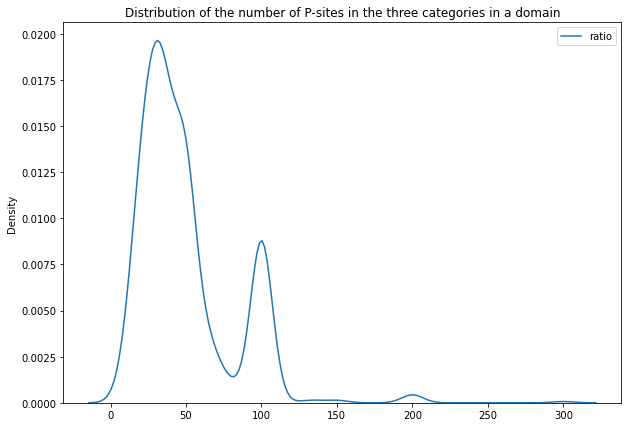

In [98]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name_all[["ratio"]], palette="tab10")
#plt.axvline(x=100, c="black")
#plt.axvline(x=10, c="grey")
plt.title("Distribution of the number of P-sites in the three categories in a domain")
#plt.xlim([-5,200])
#plt.savefig("Distribution_Psites_domains.png", format="png", bbox_inches="tight")
plt.show()

In [99]:
pfam_hmm_name_all[pfam_hmm_name_all["ratio"]>100]

phosphosites  nonPsites       ratio
hmm name                                            
1-cysPrx_C                2.0        1.0  200.000000
6PGD                      2.0        1.0  200.000000
ARS2                      3.0        1.0  300.000000
ATP-synt_ab               6.0        2.0  300.000000
CAP                       2.0        1.0  200.000000
COesterase                2.0        1.0  200.000000
Cornifin                  2.0        1.0  200.000000
Ferritin                  2.0        1.0  200.000000
FoP_duplication           2.0        1.0  200.000000
GST_N_3                   2.0        1.0  200.000000
Glyco_transf_29           2.0        1.0  200.000000
IF-2                      3.0        2.0  150.000000
Methyltr_RsmF_N           2.0        1.0  200.000000
Mito_fiss_reg             4.0        3.0  133.333333
PGK                      10.0        9.0  111.111111
Pinin_SDK_N               4.0        3.0  133.333333
Pinin_SDK_memA            4.0        3.0  133.333333
Ribosomal_L2_C            2.0        1.0  200.000000
Ribosomal_S13             3.0        2.0  150.000000
Ribosomal_S3Ae            4.0        3.0  133.333333
SERRATE_Ars2_N            2.0        1.0  200.000000
Tmemb_cc2                 3.0        2.0  150.000000
Transferrin              16.0       14.0  114.285714
UDPGP                     3.0        2.0  150.000000
zf-RNPHF                  2.0        1.0  200.000000

In [100]:
data_gr

ACC_ID  UP_POS modres                      peptide  pep_start  \
0      A0A075B6H7      30      T           EIVMTQSPPTLSLSPGER         21   
1      A0A075B6S5      52      S              ASQGISNYLAWYQQK         47   
2      A0A087WXM9     223      S                TVMTVADQNVSPK        213   
3      A0A0B4J2D5     124      S  GKITDLANLSAANHDAAIFPGGFGAAK        115   
4      A0A0B4J2D5     145      T                NLSTFAVDGKDCK        142   
...           ...     ...    ...                          ...        ...   
23877      Q9Y6Y0     326      S                 NSPQSSPTSTPK        321   
23878      Q9Y6Y0     336      S               SLSFEMQQDELIEK        336   
23879      Q9Y6Y0     338      S               SLSFEMQQDELIEK        336   
23880      Q9Y6Y8     737      S                DMASLPSESNEPK        734   
23881      Q9Y6Y8     926      S             VVESPDFSKDEDYLGK        923   

       pep_end    S0    T0    Y0    S1  ...   Y26   S27   T27   Y27   S28  \
0           38  None  None  None  None  ...  None  None  None  None  None   
1           61  None  None  None    48  ...  None  None  None  None  None   
2          225  None   213  None  None  ...  None  None  None  None  None   
3          141  None  None  None  None  ...  None  None  None  None  None   
4          154  None  None  None  None  ...  None  None  None  None  None   
...        ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...   
23877      332  None  None  None   322  ...  None  None  None  None  None   
23878      349  None  None  None  None  ...  None  None  None  None  None   
23879      349   336  None  None  None  ...  None  None  None  None  None   
23880      746  None  None  None  None  ...  None  None  None  None  None   
23881      938  None  None  None  None  ...  None  None  None  None  None   

        T28   Y28   S29   T29   Y29  
0      None  None  None  None  None  
1      None  None  None  None  None  
2      None  None  None  None  None  
3      None  None  None  None  None  
4      None  None  None  None  None  
...     ...   ...   ...   ...   ...  
23877  None  None  None  None  None  
23878  None  None  None  None  None  
23879  None  None  None  None  None  
23880  None  None  None  None  None  
23881  None  None  None  None  None  

[23882 rows x 96 columns]

In [101]:
data_gr["countSTY"] = data_gr["peptide"].str.count("S") + data_gr["peptide"].str.count("T") + data_gr["peptide"].str.count("Y")
data_gr["countS"] = data_gr["peptide"].str.count("S") # total count S (P and nonP)
data_gr["countT"] = data_gr["peptide"].str.count("T")
data_gr["countY"] = data_gr["peptide"].str.count("Y")
data_gr = pd.get_dummies(data_gr, columns=["modres"])
data_gr_peptide = data_gr.groupby(["peptide"], as_index=False).agg({"countSTY": "first", "countS": "first", "countT": "first",
                                                                   "countY": "first", "UP_POS": "count", "modres_S": "sum",
                                                                   "modres_T": "sum", "modres_Y": "sum", "ACC_ID": "first"})

data_gr_peptide["countSTYnonP"] = data_gr_peptide["countSTY"] - data_gr_peptide["UP_POS"]
data_gr_peptide["countSnonP"] = data_gr_peptide["countS"] - data_gr_peptide["modres_S"]
data_gr_peptide["countTnonP"] = data_gr_peptide["countT"] - data_gr_peptide["modres_T"]
data_gr_peptide["countYnonP"] = data_gr_peptide["countY"] - data_gr_peptide["modres_Y"]
data_gr_peptide.head()

peptide  countSTY  countS  countT  countY  UP_POS  \
0   AAAAAAAATMALAAPSSPTPESPTMLTK         7       3       4       0       3   
1           AAAAAATAPPSPGPAQPGPR         2       1       1       0       1   
2        AAAAAATAPPSPGPAQPGPRAQR         2       1       1       0       1   
3  AAAAGLGHPASPGGSEDGPPGSEEEDAAR         3       3       0       0       1   
4                    AAAAGSLDRSR         2       2       0       0       1   

   modres_S  modres_T  modres_Y  ACC_ID  countSTYnonP  countSnonP  countTnonP  \
0         3         0         0  Q9NQS7             4           0           4   
1         1         0         0  Q6SPF0             1           0           1   
2         0         1         0  Q6SPF0             1           1           0   
3         1         0         0  Q99856             2           2           0   
4         1         0         0  Q9Y2U8             1           1           0   

   countYnonP  
0           0  
1           0  
2           0  
3           0  
4           0

In [102]:
data_gr_counts = pd.merge(data_gr_peptide[["ACC_ID", "peptide", "modres_S", "modres_T", "modres_Y", "countSnonP", "countTnonP", "countYnonP", "countSTYnonP"]], data_gr, on=["ACC_ID", "peptide", "modres_S", "modres_T", "modres_Y"])

In [103]:
data_gr_counts

ACC_ID                        peptide  modres_S  modres_T  modres_Y  \
0      Q6SPF0           AAAAAATAPPSPGPAQPGPR         1         0         0   
1      Q6SPF0        AAAAAATAPPSPGPAQPGPRAQR         0         1         0   
2      Q99856  AAAAGLGHPASPGGSEDGPPGSEEEDAAR         1         0         0   
3      Q9Y2U8                    AAAAGSLDRSR         1         0         0   
4      O43295                AAACPSSPHKIPLTR         1         0         0   
...       ...                            ...       ...       ...       ...   
11345  O15197               YYIDPSTYEDPCQAIR         0         0         1   
11346  Q16739         YYISANVTGFKCVTGMSCLMRK         1         0         0   
11347  Q9Y6R7               YYPLGEVFYPGPECER         0         0         1   
11348  Q8NFC6                 YYSDSDDELTVEQR         1         0         0   
11349  P07900            YYTSASGDEMVSLKDYCTR         1         0         0   

       countSnonP  countTnonP  countYnonP  countSTYnonP  UP_POS  ...   S28  \
0               0           1           0             1     161  ...  None   
1               1           0           0             1     157  ...  None   
2               2           0           0             2      77  ...  None   
3               1           0           0             1     331  ...  None   
4               1           1           0             2     894  ...  None   
...           ...         ...         ...           ...     ...  ...   ...   
11345           1           1           2             4     644  ...  None   
11346           1           2           2             5     212  ...  None   
11347           0           0           2             2    4801  ...  None   
11348           1           1           2             4     484  ...  None   
11349           2           2           3             7     476  ...  None   

        T28   Y28   S29   T29   Y29 countSTY countS countT countY  
0      None  None  None  None  None        2      1      1      0  
1      None  None  None  None  None        2      1      1      0  
2      None  None  None  None  None        3      3      0      0  
3      None  None  None  None  None        2      2      0      0  
4      None  None  None  None  None        3      2      1      0  
...     ...   ...   ...   ...   ...      ...    ...    ...    ...  
11345  None  None  None  None  None        5      1      1      3  
11346  None  None  None  None  None        6      2      2      2  
11347  None  None  None  None  None        3      0      0      3  
11348  None  None  None  None  None        5      2      1      2  
11349  None  None  None  None  None        8      3      2      3  

[11350 rows x 106 columns]

In [104]:
tspec_sites_allP = pd.merge(data_gr_counts, tspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_allP = pd.merge(data_gr_counts, taspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
gen_sites_allP = pd.merge(data_gr_counts, gen_sites, how="inner", on=["ACC_ID", "UP_POS"])

In [105]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_nonPtspec = []
list_nonPtaspec = []
list_nonPgen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_sites_allP.loc[tspec_sites_allP[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"peptide": "first"}).shape[0]
    count_taspec = taspec_sites_allP.loc[taspec_sites_allP[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"peptide": "first"}).shape[0]
    count_gen = gen_sites_allP.loc[gen_sites_allP[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"peptide": "first"}).shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    count_tspec = tspec_sites_allP.loc[tspec_sites_allP[tissue]==1, :]["countSTYnonP"].sum()
    count_taspec = taspec_sites_allP.loc[taspec_sites_allP[tissue]==1, :]["countSTYnonP"].sum()
    count_gen = gen_sites_allP.loc[gen_sites_allP[tissue]==1, :]["countSTYnonP"].sum()
    list_nonPtspec.append(count_tspec)
    list_nonPtaspec.append(count_taspec)
    list_nonPgen.append(count_gen)
    
df_spread_tissues["Number of tissue-specific phosphosites"] = list_tspec
df_spread_tissues["Number of tissue aspecific phosphosites"] = list_taspec
df_spread_tissues["Number of pervasive phosphosites"] = list_gen
df_spread_tissues["Number of non-phosphorylated near tissue-specific phosphosites"] = list_nonPtspec
df_spread_tissues["Number of non-phosphorylated near tissue aspecific phosphosites"] = list_nonPtaspec
df_spread_tissues["Number of non-phosphorylated near pervasive phosphosites"] = list_nonPgen
df_spread_tissues

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                      11   
2                       Blood                                     981   
3                        Bone                                       1   
4                       Brain                                      71   
5                      Breast                                      14   
6         Cerebrospinal fluid                                       7   
7                      Cervix                                       7   
8                       Colon                                    2107   
9               Dental plaque                                       9   
10                  Esophagus                                       1   
11                        Eye                                       4   
12           Follicular fluid                                       0   
13                      Heart                                      20   
14                       Hela                                       0   
15                     Kidney                                      10   
16                      Liver                                     128   
17                       Lung                                     764   
18                 Lymph node                                    1387   
19            Menstrual fluid                                       1   
20                  Monocytes                                      18   
21               Nasal polyps                                       0   
22                   NK-cells                                      14   
23                      Ovary                                       1   
24                   Pancreas                                      18   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     477   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     406   
30            Skeletal muscle                                     117   
31                       Skin                                     361   
32            Small intestine                                      62   
33            Synovial tissue                                       2   
34                    T-cells                                       0   
35                     Testis                                     184   
36                      Tooth                                       1   
37             Umbilical cord                                      47   
38                     Ureter                                       3   
39            Urinary bladder                                      26   
40                      Urine                                      32   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       116                               107   
1                                        35                                80   
2                                      1114                              1058   
3                                         1                                 0   
4                                        78                               777   
5                                        17                                22   
6                                        17                               744   
7                                         4                                 6   
8                                      1793                               567   
9                                         1                                 4   
10                                        4                      

In [106]:
df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"] = df_spread_tissues["Number of tissue-specific phosphosites"]*100/df_spread_tissues["Number of non-phosphorylated near tissue-specific phosphosites"]
df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"] = df_spread_tissues["Number of tissue aspecific phosphosites"]*100/df_spread_tissues["Number of non-phosphorylated near tissue aspecific phosphosites"]
df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"] = df_spread_tissues["Number of pervasive phosphosites"]*100/df_spread_tissues["Number of non-phosphorylated near pervasive phosphosites"]

<AxesSubplot:title={'center':'Percentage P-sites versus non-phosphoryalted canonical sites'}, xlabel='Tissue'>

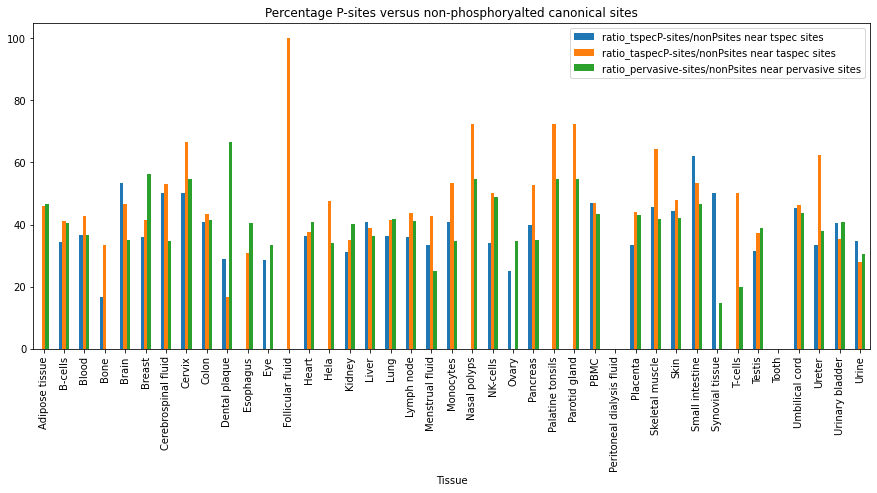

In [107]:
df_spread_tissues[["Tissue", "ratio_tspecP-sites/nonPsites near tspec sites", "ratio_taspecP-sites/nonPsites near taspec sites", "ratio_pervasive-sites/nonPsites near pervasive sites"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage P-sites versus non-phosphoryalted canonical sites")
#plt.savefig("Percentage Psites compared to nonPsites.png", format="png", bbox_inches="tight")

In [108]:
df_spread_tissues

Tissue  Number of tissue-specific phosphosites  \
0              Adipose tissue                                       0   
1                     B-cells                                      11   
2                       Blood                                     981   
3                        Bone                                       1   
4                       Brain                                      71   
5                      Breast                                      14   
6         Cerebrospinal fluid                                       7   
7                      Cervix                                       7   
8                       Colon                                    2107   
9               Dental plaque                                       9   
10                  Esophagus                                       1   
11                        Eye                                       4   
12           Follicular fluid                                       0   
13                      Heart                                      20   
14                       Hela                                       0   
15                     Kidney                                      10   
16                      Liver                                     128   
17                       Lung                                     764   
18                 Lymph node                                    1387   
19            Menstrual fluid                                       1   
20                  Monocytes                                      18   
21               Nasal polyps                                       0   
22                   NK-cells                                      14   
23                      Ovary                                       1   
24                   Pancreas                                      18   
25           Palatine tonsils                                       0   
26              Parotid gland                                       0   
27                       PBMC                                     477   
28  Peritoneal dialysis fluid                                       0   
29                   Placenta                                     406   
30            Skeletal muscle                                     117   
31                       Skin                                     361   
32            Small intestine                                      62   
33            Synovial tissue                                       2   
34                    T-cells                                       0   
35                     Testis                                     184   
36                      Tooth                                       1   
37             Umbilical cord                                      47   
38                     Ureter                                       3   
39            Urinary bladder                                      26   
40                      Urine                                      32   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
0                                       116                               107   
1                                        35                                80   
2                                      1114                              1058   
3                                         1                                 0   
4                                        78                               777   
5                                        17                                22   
6                                        17                               744   
7                                         4                                 6   
8                                      1793                               567   
9                                         1                                 4   
10                                        4                      

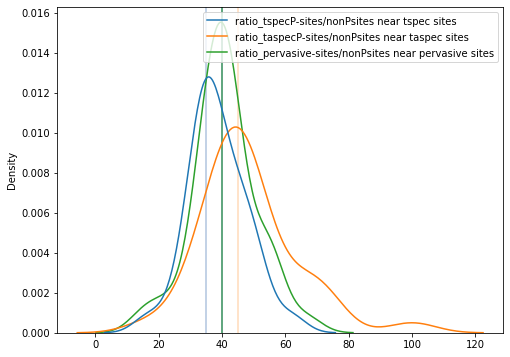

In [109]:
plt.figure(figsize=(8,6))
plt.axvline(x=35, c="lightsteelblue")
plt.axvline(x=45, c="peachpuff")
plt.axvline(x=40, c="seagreen", label="tspec")
sns.kdeplot(data = df_spread_tissues[["Tissue", "ratio_tspecP-sites/nonPsites near tspec sites", "ratio_taspecP-sites/nonPsites near taspec sites", "ratio_pervasive-sites/nonPsites near pervasive sites"]], palette="tab10")
#plt.savefig("Distribution of percentage Psites compared to nonPsites.png", format="png", bbox_inches="tight")
plt.show()

In [110]:
df_spread_tissues[(df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]>=35)&
                  (df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]>=45)&
                  (df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]>=40)]

Tissue  Number of tissue-specific phosphosites  \
7            Cervix                                       7   
27             PBMC                                     477   
30  Skeletal muscle                                     117   
31             Skin                                     361   
32  Small intestine                                      62   
37   Umbilical cord                                      47   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
7                                         4                                 6   
27                                      289                               160   
30                                       18                                13   
31                                      250                               157   
32                                       32                                40   
37                                      236                               215   

    Number of non-phosphorylated near tissue-specific phosphosites  \
7                                                  14                
27                                               1016                
30                                                257                
31                                                815                
32                                                100                
37                                                104                

    Number of non-phosphorylated near tissue aspecific phosphosites  \
7                                                   6                 
27                                                617                 
30                                                 28                 
31                                                521                 
32                                                 60                 
37                                                510                 

    Number of non-phosphorylated near pervasive phosphosites  \
7                                                  11          
27                                                370          
30                                                 31          
31                                                372          
32                                                 86          
37                                                490          

    ratio_tspecP-sites/nonPsites near tspec sites  \
7                                       50.000000   
27                                      46.948819   
30                                      45.525292   
31                                      44.294479   
32                                      62.000000   
37                                      45.192308   

    ratio_taspecP-sites/nonPsites near taspec sites  \
7                                         66.666667   
27                                        46.839546   
30                                        64.285714   
31                                        47.984645   
32                                        53.333333   
37                                        46.274510   

    ratio_pervasive-sites/nonPsites near pervasive sites  
7                                           54.545455     
27                                          43.243243     
30                                          41.935484     
31                                          42.204301     
32                                          46.511628     
37                                          43.877551

In [111]:
df_spread_tissues[(df_spread_tissues["ratio_tspecP-sites/nonPsites near tspec sites"]<=35)&
                  (df_spread_tissues["ratio_taspecP-sites/nonPsites near taspec sites"]<=45)&
                  (df_spread_tissues["ratio_pervasive-sites/nonPsites near pervasive sites"]<=40)]

Tissue  Number of tissue-specific phosphosites  \
19  Menstrual fluid                                       1   
35           Testis                                     184   
40            Urine                                      32   

    Number of tissue aspecific phosphosites  Number of pervasive phosphosites  \
19                                        3                                 2   
35                                      140                               167   
40                                        7                                 7   

    Number of non-phosphorylated near tissue-specific phosphosites  \
19                                                  3                
35                                                585                
40                                                 92                

    Number of non-phosphorylated near tissue aspecific phosphosites  \
19                                                  7                 
35                                                374                 
40                                                 25                 

    Number of non-phosphorylated near pervasive phosphosites  \
19                                                  8          
35                                                428          
40                                                 23          

    ratio_tspecP-sites/nonPsites near tspec sites  \
19                                      33.333333   
35                                      31.452991   
40                                      34.782609   

    ratio_taspecP-sites/nonPsites near taspec sites  \
19                                        42.857143   
35                                        37.433155   
40                                        28.000000   

    ratio_pervasive-sites/nonPsites near pervasive sites  
19                                          25.000000     
35                                          39.018692     
40                                          30.434783

In [112]:
tspec_sites_allP_plot = tspec_sites_allP[(tspec_sites_allP["Cervix"]==1)|(tspec_sites_allP["Skeletal muscle"]==1)|(tspec_sites_allP["PBMC"]==1)|(tspec_sites_allP["Skin"]==1)|(tspec_sites_allP["Small intestine"]==1)|(tspec_sites_allP["Umbilical cord"]==1)|(tspec_sites_allP["Menstrual fluid"]==1)|(tspec_sites_allP["Testis"]==1)|(tspec_sites_allP["Urine"]==1)]
taspec_sites_allP_plot = taspec_sites_allP[(taspec_sites_allP["Cervix"]==1)|(taspec_sites_allP["Skeletal muscle"]==1)|(taspec_sites_allP["PBMC"]==1)|(taspec_sites_allP["Skin"]==1)|(taspec_sites_allP["Small intestine"]==1)|(taspec_sites_allP["Umbilical cord"]==1)|(taspec_sites_allP["Menstrual fluid"]==1)|(taspec_sites_allP["Testis"]==1)|(taspec_sites_allP["Urine"]==1)]
gen_sites_allP_plot = gen_sites_allP[(gen_sites_allP["Cervix"]==1)|(gen_sites_allP["Skeletal muscle"]==1)|(gen_sites_allP["PBMC"]==1)|(gen_sites_allP["Skin"]==1)|(gen_sites_allP["Small intestine"]==1)|(gen_sites_allP["Umbilical cord"]==1)|(gen_sites_allP["Menstrual fluid"]==1)|(gen_sites_allP["Testis"]==1)|(gen_sites_allP["Urine"]==1)]

In [116]:
tspec_sites_allP_plot_pfam = pd.DataFrame({})
for n in list_S:
    print(n)
    tspec_sites_allP_sub = tspec_sites_allP_plot[~tspec_sites_allP_plot[n].isnull()]
    if tspec_sites_allP_sub.shape[0] != 0:
        tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)
        tspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(tspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        tspec_sites_allP_plot_pfam = tspec_sites_allP_plot_pfam.append(sub)
        tspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_T:
    print(n)
    tspec_sites_allP_sub = tspec_sites_allP_plot[~tspec_sites_allP_plot[n].isnull()]
    if tspec_sites_allP_sub.shape[0] != 0:
        tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)
        tspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(tspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        tspec_sites_allP_plot_pfam = tspec_sites_allP_plot_pfam.append(sub)
        tspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_Y:
    print(n)
    tspec_sites_allP_sub = tspec_sites_allP_plot[~tspec_sites_allP_plot[n].isnull()]
    if tspec_sites_allP_sub.shape[0] != 0:
        tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)
        tspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(tspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        tspec_sites_allP_plot_pfam = tspec_sites_allP_plot_pfam.append(sub)
        tspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)       
tspec_sites_allP_plot_pfam

S0
S1
S2
S3
S4


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1300539484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)


S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
S29
T0


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1300539484.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)


T1
T2
T3
T4
T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
T29
Y0


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1300539484.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tspec_sites_allP_sub[n]= tspec_sites_allP_sub[n].astype(int)


Y1
Y2
Y3
Y4
Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28
Y29


ACC_ID                         peptide  modres_S  modres_T  modres_Y  \
4   P49023          SAEPSPTVMSTSLGSNLSELDR         1         0         0   
5   Q9Y271        SAFQVYMINLAVADLLCVCTLPLR         0         1         0   
6   Q9H6Z4      SAGGSSPEGGEDSDREDGNYCPPVKR         1         0         0   
7   P50454                  SAGLAFSLYQAMAK         1         0         0   
8   P50454     SALQSINEWAAQTTDGKLPEVTKDVER         1         0         0   
..     ...                             ...       ...       ...       ...   
3   P38159        LFIGGLNTETNEKALEAVFGKYGR         0         1         0   
4   P38159        LFIGGLNTETNEKALEAVFGKYGR         0         1         0   
5   O96019  STGLILDSGATHTTAIPVHDGYVLQQGIVK         0         1         0   
2   P61158  TLTGTVIDSGDGVTHVIPVAEGYVIGSCIK         0         1         0   
0   O60664  TLTAAAVSGAQPILSKLEPQIASASEYAHR         1         0         0   

    countSnonP  countTnonP  countYnonP  countSTYnonP  UP_POS  ...  Urine  \
4            5           2           0             7     143  ...      0   
5            1           0           1             2      75  ...      0   
6            3           0           1             4     100  ...      0   
7            1           0           1             2      53  ...      0   
8            1           3           0             4     172  ...      0   
..         ...         ...         ...           ...     ...  ...    ...   
3            0           1           1             2      17  ...      0   
4            0           1           1             2      17  ...      0   
5            2           3           1             6     177  ...      0   
2            2           3           1             6     175  ...      0   
0            3           2           1             6      76  ...      0   

    Total  hmm start hmm end   hmm name    type     clan        E-value res  \
4       1          1     201   Paxillin  Family  No_clan   2.000000e-90   S   
5       1          1     264      7tm_1  Family   CL0192   6.600000e-43   S   
6       1          1     108    Ran_BP1  Domain   CL0266   3.200000e-10   S   
7       1          4     370     Serpin  Domain  No_clan   2.700000e-91   S   
8       1          4     370     Serpin  Domain  No_clan   2.700000e-91   S   
..    ...        ...     ...        ...     ...      ...            ...  ..   
3       1          1      70      RRM_1  Domain   CL0221   1.700000e-19   S   
4       1          1      45    RBM1CTR  Family  No_clan   1.500000e-19   S   
5       1          1     384      Actin  Family   CL0108  2.700000e-138   S   
2       1          4     381      Actin  Family   CL0108   1.300000e-83   S   
0       1          3     402  Perilipin  Family   CL0718  7.900000e-169   S   

      S0  
4    NaN  
5    NaN  
6    NaN  
7    NaN  
8    NaN  
..   ...  
3   None  
4   None  
5    165  
2   None  
0   None  

[1582 rows x 158 columns]

In [117]:
taspec_sites_allP_plot_pfam = pd.DataFrame({})
for n in list_S:
    print(n)
    taspec_sites_allP_sub = taspec_sites_allP_plot[~taspec_sites_allP_plot[n].isnull()]
    if taspec_sites_allP_sub.shape[0] != 0:
        taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)
        taspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(taspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        taspec_sites_allP_plot_pfam = taspec_sites_allP_plot_pfam.append(sub)
        taspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_T:
    print(n)
    taspec_sites_allP_sub = taspec_sites_allP_plot[~taspec_sites_allP_plot[n].isnull()]
    if taspec_sites_allP_sub.shape[0] != 0:
        taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)
        taspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(taspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        taspec_sites_allP_plot_pfam = taspec_sites_allP_plot_pfam.append(sub)
        taspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_Y:
    print(n)
    taspec_sites_allP_sub = taspec_sites_allP_plot[~taspec_sites_allP_plot[n].isnull()]
    if taspec_sites_allP_sub.shape[0] != 0:
        taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)
        taspec_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(taspec_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        taspec_sites_allP_plot_pfam = taspec_sites_allP_plot_pfam.append(sub)
        taspec_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)       
taspec_sites_allP_plot_pfam

S0
S1
S2
S3
S4
S5


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1564743463.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
S29
T0
T1
T2


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1564743463.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)


T3
T4
T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
T29
Y0
Y1
Y2


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1564743463.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taspec_sites_allP_sub[n]= taspec_sites_allP_sub[n].astype(int)


Y3
Y4
Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28
Y29


ACC_ID                        peptide  modres_S  modres_T  modres_Y  \
0   Q9H6Z4      SAGGSSPEGGEDSDREDGNYCPPVK         1         0         0   
7   P68871         SAVTALWGKVNVDEVGGEALGR         0         1         0   
8   Q9BY32           SAYALCTFALSTGDPSQPVR         0         1         0   
17  P11142                 SFYPEEVSSMVLTK         0         0         1   
21  P13647     SGGGGGGGFGRVSLAGACGVGGYGSR         1         0         0   
..     ...                            ...       ...       ...       ...   
0   P04075    QLLLTADDRVNPCIGGVILFHETLYQK         0         1         0   
0   Q15582  GCPAALPLSNLYETLGVVGSTTTQLYTDR         0         1         0   
1   Q15582  GCPAALPLSNLYETLGVVGSTTTQLYTDR         0         1         0   
2   Q15582  GCPAALPLSNLYETLGVVGSTTTQLYTDR         0         1         0   
3   Q15582  GCPAALPLSNLYETLGVVGSTTTQLYTDR         0         1         0   

    countSnonP  countTnonP  countYnonP  countSTYnonP  UP_POS  ...  Urine  \
0            3           0           1             4     101  ...      0   
7            1           0           0             1      13  ...      0   
8            3           1           1             5     117  ...      0   
17           3           1           0             4     115  ...      0   
21           2           0           1             3      50  ...      0   
..         ...         ...         ...           ...     ...  ...    ...   
0            0           1           1             2      65  ...      0   
0            2           4           2             8     109  ...      0   
1            2           4           2             8     109  ...      0   
2            2           4           2             8     109  ...      0   
3            2           4           2             8     109  ...      0   

    Total  hmm start hmm end    hmm name         type     clan        E-value  \
0       2          1     108     Ran_BP1       Domain   CL0266   3.200000e-10   
7       3          2     118      Globin       Domain   CL0090   5.200000e-29   
8       2          1     186  Ham1p_like       Domain   CL0269   3.200000e-52   
17      2          1     599       HSP70       Family   CL0108  1.300000e-260   
21      4          1     312    Filament  Coiled-coil  No_clan  3.000000e-115   
..    ...        ...     ...         ...          ...      ...            ...   
0       2          1     349  Glycolytic       Domain   CL0035  1.100000e-180   
0       2          2     128   Fasciclin       Domain  No_clan   6.100000e-28   
1       2          2     128   Fasciclin       Domain  No_clan   7.600000e-27   
2       2         10     126   Fasciclin       Domain  No_clan   1.900000e-23   
3       2          2     128   Fasciclin       Domain  No_clan   6.000000e-12   

   res    S0  
0    S   NaN  
7    S   NaN  
8    S   NaN  
17   S   NaN  
21   S   NaN  
..  ..   ...  
0    S  None  
0    S  None  
1    S  None  
2    S  None  
3    S  None  

[767 rows x 158 columns]

In [118]:
gen_sites_allP_plot_pfam = pd.DataFrame({})
for n in list_S:
    print(n)
    gen_sites_allP_sub = gen_sites_allP_plot[~gen_sites_allP_plot[n].isnull()]
    if gen_sites_allP_sub.shape[0] != 0:
        gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)
        gen_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(gen_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        gen_sites_allP_plot_pfam = gen_sites_allP_plot_pfam.append(sub)
        gen_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_T:
    print(n)
    gen_sites_allP_sub = gen_sites_allP_plot[~gen_sites_allP_plot[n].isnull()]
    if gen_sites_allP_sub.shape[0] != 0:
        gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)
        gen_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(gen_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        gen_sites_allP_plot_pfam = gen_sites_allP_plot_pfam.append(sub)
        gen_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)
for n in list_Y:
    print(n)
    gen_sites_allP_sub = gen_sites_allP_plot[~gen_sites_allP_plot[n].isnull()]
    if gen_sites_allP_sub.shape[0] != 0:
        gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)
        gen_sites_allP_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(gen_sites_allP_sub, pfam_sub, how="inner", on=["ACC_ID"])
        sub = sub.loc[(sub["pos_int"]>=sub["hmm start"])&
                                             (sub["pos_int"]<=sub["hmm end"]),:]
        sub["res"] = "S"
        gen_sites_allP_plot_pfam = gen_sites_allP_plot_pfam.append(sub)
        gen_sites_allP_sub.rename({"pos_int": n}, axis=1, inplace=True)       
gen_sites_allP_plot_pfam

S0
S1
S2
S3
S4
S5


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/693015349.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
S29
T0
T1


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/693015349.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)


T2
T3
T4
T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
T29
Y0
Y1
Y2


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/693015349.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_sites_allP_sub[n]= gen_sites_allP_sub[n].astype(int)


Y3
Y4
Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28
Y29


ACC_ID                         peptide  modres_S  modres_T  modres_Y  \
13  P02787             SAGWNIPIGLLYCDLPEPR         0         0         1   
14  P02787             SAGWNIPIGLLYCDLPEPR         0         0         1   
27  O00151                SEHKVWSPLVTEEGKR         1         0         0   
28  Q9NYF8                SEKLKDLFDYSPPLHK         1         0         0   
29  Q9NYF8            SSATSGDIWPGLSAYDNSPR         1         0         0   
..     ...                             ...       ...       ...       ...   
10  P19823          SLPGESEEMMEEVDQVTLYSYK         1         0         0   
11  P19823          SLPGESEEMMEEVDQVTLYSYK         1         0         0   
12  P19823  SLPGESEEMMEEVDQVTLYSYKVQSTITSR         1         0         0   
13  P19823  SLPGESEEMMEEVDQVTLYSYKVQSTITSR         1         0         0   
14  P19823  SLPGESEEMMEEVDQVTLYSYKVQSTITSR         1         0         0   

    countSnonP  countTnonP  countYnonP  countSTYnonP  UP_POS  ...  Urine  \
13           1           0           0             1     155  ...      0   
14           1           0           0             1     155  ...      0   
27           1           1           0             2      90  ...      0   
28           1           0           1             2     512  ...      0   
29           4           1           1             6     222  ...      0   
..         ...         ...         ...           ...     ...  ...    ...   
10           2           1           2             5      55  ...      0   
11           2           1           2             5      55  ...      0   
12           4           3           2             9      60  ...      0   
13           4           3           2             9      60  ...      0   
14           4           3           2             9      60  ...      0   

    Total  hmm start hmm end       hmm name    type     clan        E-value  \
13     10          1     329    Transferrin  Domain   CL0177  4.200000e-171   
14     10          1     329    Transferrin  Domain   CL0177   7.800000e-89   
27      6          1      93        DUF4749  Family  No_clan   1.900000e-24   
28     14          1     657  THRAP3_BCLAF1  Family  No_clan  1.100000e-151   
29     10          1     657  THRAP3_BCLAF1  Family  No_clan  1.100000e-151   
..    ...        ...     ...            ...     ...      ...            ...   
10     12          1     189       ITI_HC_C  Family  No_clan   7.000000e-67   
11     12          1     111            VIT  Family   CL0029   3.800000e-25   
12     11          1     175            VWA  Domain   CL0128   1.000000e-17   
13     11          1     189       ITI_HC_C  Family  No_clan   7.000000e-67   
14     11          1     111            VIT  Family   CL0029   3.800000e-25   

   res    S0  
13   S   NaN  
14   S   NaN  
27   S   NaN  
28   S   NaN  
29   S   NaN  
..  ..   ...  
10   S  None  
11   S  None  
12   S    55  
13   S    55  
14   S    55  

[367 rows x 158 columns]

In [119]:
tspec_sites_plot_pfam = pd.merge(tspec_sites_allP_plot, pfam_sub, how="inner", on=["ACC_ID"])
tspec_sites_plot_pfam = tspec_sites_plot_pfam[(tspec_sites_plot_pfam["UP_POS"]>=tspec_sites_plot_pfam["hmm start"])&
                                             (tspec_sites_plot_pfam["UP_POS"]<=tspec_sites_plot_pfam["hmm end"])]
taspec_sites_plot_pfam = pd.merge(taspec_sites_allP_plot, pfam_sub, how="inner", on=["ACC_ID"])
tapsec_sites_plot_pfam = taspec_sites_plot_pfam[(taspec_sites_plot_pfam["UP_POS"]>=taspec_sites_plot_pfam["hmm start"])&
                                             (taspec_sites_plot_pfam["UP_POS"]<=taspec_sites_plot_pfam["hmm end"])]
gen_sites_plot_pfam = pd.merge(gen_sites_allP_plot, pfam_sub, how="inner", on=["ACC_ID"])
gen_sites_plot_pfam = gen_sites_plot_pfam[(gen_sites_plot_pfam["UP_POS"]>=gen_sites_plot_pfam["hmm start"])&
                                             (gen_sites_plot_pfam["UP_POS"]<=gen_sites_plot_pfam["hmm end"])]

In [120]:
tspec_sites_allP_plot_hmm = tspec_sites_allP_plot_pfam[(tspec_sites_allP_plot_pfam["PBMC"]==1)|(tspec_sites_allP_plot_pfam["Cervix"]==1)|(tspec_sites_allP_plot_pfam["Skeletal muscle"]==1)|(tspec_sites_allP_plot_pfam["Skin"]==1)|(tspec_sites_allP_plot_pfam["Small intestine"]==1)|(tspec_sites_allP_plot_pfam["Umbilical cord"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_allP_plot_hmm.rename(columns ={"ACC_ID": "canonical sites near tissue-specific phosphosites_higher"}, inplace=True, )
tspec_sites_allP_plot_hmm.set_index("hmm name", inplace=True)
tspec_sites_allP_plot_hmm1 = tspec_sites_allP_plot_pfam[(tspec_sites_allP_plot_pfam["Menstrual fluid"]==1)|(tspec_sites_allP_plot_pfam["Testis"]==1)|(tspec_sites_allP_plot_pfam["Urine"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_allP_plot_hmm1.rename(columns ={"ACC_ID": "canonical sites near tissue-specific phosphosites_lower"}, inplace=True, )
tspec_sites_allP_plot_hmm1.set_index("hmm name", inplace=True)

taspec_sites_allP_plot_hmm = taspec_sites_allP_plot_pfam[(taspec_sites_allP_plot_pfam["PBMC"]==1)|(taspec_sites_allP_plot_pfam["Cervix"]==1)|(taspec_sites_allP_plot_pfam["Skeletal muscle"]==1)|(taspec_sites_allP_plot_pfam["Skin"]==1)|(taspec_sites_allP_plot_pfam["Small intestine"]==1)|(taspec_sites_allP_plot_pfam["Umbilical cord"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_allP_plot_hmm.rename(columns ={"ACC_ID": "canonical sites near tissue aspecific phosphosites_higher"}, inplace=True, )
taspec_sites_allP_plot_hmm.set_index("hmm name", inplace=True)
taspec_sites_allP_plot_hmm1 = taspec_sites_allP_plot_pfam[(taspec_sites_allP_plot_pfam["Menstrual fluid"]==1)|(taspec_sites_allP_plot_pfam["Testis"]==1)|(taspec_sites_allP_plot_pfam["Urine"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_allP_plot_hmm1.rename(columns ={"ACC_ID": "canonical sites near tissue aspecific phosphosites_lower"}, inplace=True, )
taspec_sites_allP_plot_hmm1.set_index("hmm name", inplace=True)

gen_sites_allP_plot_hmm = gen_sites_allP_plot_pfam[(gen_sites_allP_plot_pfam["PBMC"]==1)|(gen_sites_allP_plot_pfam["Cervix"]==1)|(gen_sites_allP_plot_pfam["Skeletal muscle"]==1)|(gen_sites_allP_plot_pfam["Skin"]==1)|(gen_sites_allP_plot_pfam["Small intestine"]==1)|(gen_sites_allP_plot_pfam["Umbilical cord"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_allP_plot_hmm.rename(columns ={"ACC_ID": "canonical sites near pervasive phosphosites_higher"}, inplace=True, )
gen_sites_allP_plot_hmm.set_index("hmm name", inplace=True)
gen_sites_allP_plot_hmm1 = gen_sites_allP_plot_pfam[(gen_sites_allP_plot_pfam["Menstrual fluid"]==1)|(gen_sites_allP_plot_pfam["Testis"]==1)|(gen_sites_allP_plot_pfam["Urine"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_allP_plot_hmm1.rename(columns ={"ACC_ID": "canonical sites near pervasive phosphosites_lower"}, inplace=True, )
gen_sites_allP_plot_hmm1.set_index("hmm name", inplace=True)

pfam_hmm_name_nonP = pd.concat([tspec_sites_allP_plot_hmm, taspec_sites_allP_plot_hmm, gen_sites_allP_plot_hmm, tspec_sites_allP_plot_hmm1, taspec_sites_allP_plot_hmm1, gen_sites_allP_plot_hmm1], axis=1)

In [121]:
tspec_sites_plot_hmm = tspec_sites_plot_pfam[(tspec_sites_plot_pfam["PBMC"]==1)|(tspec_sites_plot_pfam["Cervix"]==1)|(tspec_sites_plot_pfam["Skeletal muscle"]==1)|(tspec_sites_plot_pfam["Skin"]==1)|(tspec_sites_plot_pfam["Small intestine"]==1)|(tspec_sites_plot_pfam["Umbilical cord"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_plot_hmm.rename(columns ={"ACC_ID": "tissue-specific phosphosites_higher"}, inplace=True, )
tspec_sites_plot_hmm.set_index("hmm name", inplace=True)
tspec_sites_plot_hmm1 = tspec_sites_plot_pfam[(tspec_sites_plot_pfam["Menstrual fluid"]==1)|(tspec_sites_plot_pfam["Testis"]==1)|(tspec_sites_plot_pfam["Urine"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_sites_plot_hmm1.rename(columns ={"ACC_ID": "tissue-specific phosphosites_lower"}, inplace=True, )
tspec_sites_plot_hmm1.set_index("hmm name", inplace=True)

taspec_sites_plot_hmm = taspec_sites_plot_pfam[(taspec_sites_plot_pfam["PBMC"]==1)|(taspec_sites_plot_pfam["Cervix"]==1)|(taspec_sites_plot_pfam["Skeletal muscle"]==1)|(taspec_sites_plot_pfam["Skin"]==1)|(taspec_sites_plot_pfam["Small intestine"]==1)|(taspec_sites_plot_pfam["Umbilical cord"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_plot_hmm.rename(columns ={"ACC_ID": "tissue aspecific phosphosites_higher"}, inplace=True, )
taspec_sites_plot_hmm.set_index("hmm name", inplace=True)
taspec_sites_plot_hmm1 = taspec_sites_plot_pfam[(taspec_sites_plot_pfam["Menstrual fluid"]==1)|(taspec_sites_plot_pfam["Testis"]==1)|(taspec_sites_plot_pfam["Urine"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_sites_plot_hmm1.rename(columns ={"ACC_ID": "tissue aspecific phosphosites_lower"}, inplace=True, )
taspec_sites_plot_hmm1.set_index("hmm name", inplace=True)

gen_sites_plot_hmm = gen_sites_plot_pfam[(gen_sites_plot_pfam["PBMC"]==1)|(gen_sites_plot_pfam["Cervix"]==1)|(gen_sites_plot_pfam["Skeletal muscle"]==1)|(gen_sites_plot_pfam["Skin"]==1)|(gen_sites_plot_pfam["Small intestine"]==1)|(gen_sites_plot_pfam["Umbilical cord"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_plot_hmm.rename(columns ={"ACC_ID": "pervasive phosphosites_higher"}, inplace=True, )
gen_sites_plot_hmm.set_index("hmm name", inplace=True)
gen_sites_plot_hmm1 = gen_sites_plot_pfam[(gen_sites_plot_pfam["Menstrual fluid"]==1)|(gen_sites_plot_pfam["Testis"]==1)|(gen_sites_plot_pfam["Urine"]==1)].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_sites_plot_hmm1.rename(columns ={"ACC_ID": "pervasive phosphosites_lower"}, inplace=True, )
gen_sites_plot_hmm1.set_index("hmm name", inplace=True)

pfam_hmm_name_P = pd.concat([tspec_sites_plot_hmm, taspec_sites_plot_hmm, gen_sites_plot_hmm, tspec_sites_plot_hmm1, taspec_sites_plot_hmm1, gen_sites_plot_hmm1], axis=1)


In [122]:
pfam_hmm_name_P

tissue-specific phosphosites_higher  \
hmm name                                               
1-cysPrx_C                                       2.0   
14-3-3                                           6.0   
6PGD                                             2.0   
7tm_1                                            1.0   
AAA_33                                           1.0   
...                                              ...   
mRNA_decap_C                                     NaN   
zf-C2H2_jaz                                      NaN   
zf-UBR                                           NaN   
PCM1_C                                           NaN   
p53-inducible11                                  NaN   

                 tissue aspecific phosphosites_higher  \
hmm name                                                
1-cysPrx_C                                        6.0   
14-3-3                                           11.0   
6PGD                                              NaN   
7tm_1                                             NaN   
AAA_33                                            2.0   
...                                               ...   
mRNA_decap_C                                      NaN   
zf-C2H2_jaz                                       NaN   
zf-UBR                                            NaN   
PCM1_C                                            NaN   
p53-inducible11                                   NaN   

                 pervasive phosphosites_higher  \
hmm name                                         
1-cysPrx_C                                 NaN   
14-3-3                                     1.0   
6PGD                                       NaN   
7tm_1                                      NaN   
AAA_33                                     1.0   
...                                        ...   
mRNA_decap_C                               NaN   
zf-C2H2_jaz                                NaN   
zf-UBR                                     NaN   
PCM1_C                                     NaN   
p53-inducible11                            NaN   

                 tissue-specific phosphosites_lower  \
hmm name                                              
1-cysPrx_C                                      NaN   
14-3-3                                          NaN   
6PGD                                            NaN   
7tm_1                                           NaN   
AAA_33                                          NaN   
...                                             ...   
mRNA_decap_C                                    NaN   
zf-C2H2_jaz                                     NaN   
zf-UBR                                          NaN   
PCM1_C                                          NaN   
p53-inducible11                                 NaN   

                 tissue aspecific phosphosites_lower  \
hmm name                                               
1-cysPrx_C                                       1.0   
14-3-3                                           NaN   
6PGD                                             NaN   
7tm_1                                            NaN   
AAA_33                                           2.0   
...                                              ...   
mRNA_decap_C                                     1.0   
zf-C2H2_jaz                                      1.0   
zf-UBR                                           1.0   
PCM1_C                                           NaN   
p53-inducible11                                  NaN   

                 pervasive phosphosites_lower  
hmm name                                       
1-cysPrx_C                                NaN  
14-3-3                                    NaN  
6PGD                                      NaN  
7tm_1                                     NaN  
AAA_33                                    NaN  
...                                       ...  
mRNA_decap_C                              NaN  
zf-C2H2_jaz       

In [123]:
pfam_hmm_name_both = pd.concat([pfam_hmm_name_P, pfam_hmm_name_nonP], axis=1)
pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher"] = pfam_hmm_name_both["tissue-specific phosphosites_higher"]*100/pfam_hmm_name_both["canonical sites near tissue-specific phosphosites_higher"]
pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"] = pfam_hmm_name_both["tissue aspecific phosphosites_higher"]*100/pfam_hmm_name_both["canonical sites near tissue aspecific phosphosites_higher"]
pfam_hmm_name_both["ratio pervasive Psites/nonP near pervasive Psites_higher"] = pfam_hmm_name_both["pervasive phosphosites_higher"]*100/pfam_hmm_name_both["canonical sites near pervasive phosphosites_higher"]
pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower"] = pfam_hmm_name_both["tissue-specific phosphosites_lower"]*100/pfam_hmm_name_both["canonical sites near tissue-specific phosphosites_lower"]
pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"] = pfam_hmm_name_both["tissue aspecific phosphosites_lower"]*100/pfam_hmm_name_both["canonical sites near tissue aspecific phosphosites_lower"]
pfam_hmm_name_both["ratio pervasive Psites/nonP near pervasive Psites_lower"] = pfam_hmm_name_both["pervasive phosphosites_lower"]*100/pfam_hmm_name_both["canonical sites near pervasive phosphosites_lower"]

In [124]:
pfam_hmm_name_both

tissue-specific phosphosites_higher  \
hmm name                                             
1-cysPrx_C                                     2.0   
14-3-3                                         6.0   
6PGD                                           2.0   
7tm_1                                          1.0   
AAA_33                                         1.0   
...                                            ...   
DBP10CT                                        NaN   
Prp19                                          NaN   
AA_permease_N                                  NaN   
DBC1                                           NaN   
Defensin_beta                                  NaN   

               tissue aspecific phosphosites_higher  \
hmm name                                              
1-cysPrx_C                                      6.0   
14-3-3                                         11.0   
6PGD                                            NaN   
7tm_1                                           NaN   
AAA_33                                          2.0   
...                                             ...   
DBP10CT                                         NaN   
Prp19                                           NaN   
AA_permease_N                                   NaN   
DBC1                                            NaN   
Defensin_beta                                   NaN   

               pervasive phosphosites_higher  \
hmm name                                       
1-cysPrx_C                               NaN   
14-3-3                                   1.0   
6PGD                                     NaN   
7tm_1                                    NaN   
AAA_33                                   1.0   
...                                      ...   
DBP10CT                                  NaN   
Prp19                                    NaN   
AA_permease_N                            NaN   
DBC1                                     NaN   
Defensin_beta                            NaN   

               tissue-specific phosphosites_lower  \
hmm name                                            
1-cysPrx_C                                    NaN   
14-3-3                                        NaN   
6PGD                                          NaN   
7tm_1                                         NaN   
AAA_33                                        NaN   
...                                           ...   
DBP10CT                                       NaN   
Prp19                                         NaN   
AA_permease_N                                 NaN   
DBC1                                          NaN   
Defensin_beta                                 NaN   

               tissue aspecific phosphosites_lower  \
hmm name                                             
1-cysPrx_C                                     1.0   
14-3-3                                         NaN   
6PGD                                           NaN   
7tm_1                                          NaN   
AAA_33                                         2.0   
...                                            ...   
DBP10CT                                        NaN   
Prp19                                          NaN   
AA_permease_N                                  NaN   
DBC1                                           NaN   
Defensin_beta                                  NaN   

               pervasive phosphosites_lower  \
hmm name                                      
1-cysPrx_C                              NaN   
14-3-3                                  NaN   
6PGD                                    NaN   
7tm_1                                   NaN   
AAA_33                                  NaN   
...                                     ...   
DBP10CT                                 NaN   
Prp19                                   NaN   
AA_permease_N                           NaN   
DBC1                                    NaN   
Defensin_beta 

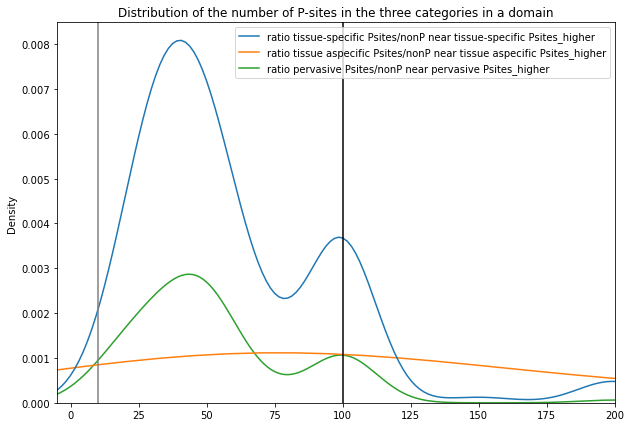

In [125]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name_both[["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher", "ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher", "ratio pervasive Psites/nonP near pervasive Psites_higher"]], palette="tab10")
plt.axvline(x=100, c="black")
plt.axvline(x=10, c="grey")
plt.title("Distribution of the number of P-sites in the three categories in a domain")
plt.xlim([-5,200])
#plt.savefig("Distribution_Psites_domains_higher.png", format="png", bbox_inches="tight")
plt.show()

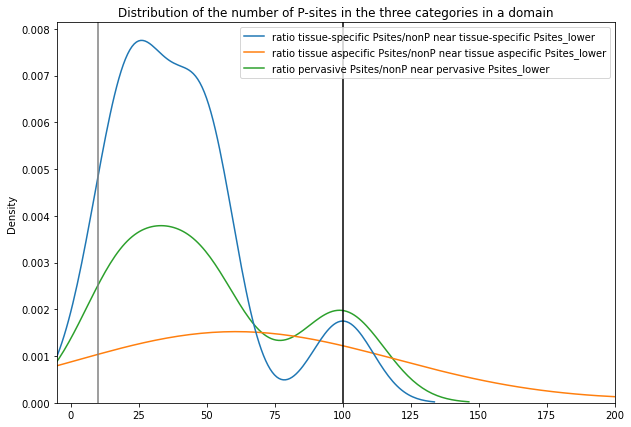

In [126]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_hmm_name_both[["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower", "ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower", "ratio pervasive Psites/nonP near pervasive Psites_lower"]], palette="tab10")
plt.axvline(x=100, c="black")
plt.axvline(x=10, c="grey")
plt.title("Distribution of the number of P-sites in the three categories in a domain")
plt.xlim([-5,200])
#plt.savefig("Distribution_Psites_domains_lower_lower.png", format="png", bbox_inches="tight")
plt.show()

In [127]:
pfam_hmm_name_both

tissue-specific phosphosites_higher  \
hmm name                                             
1-cysPrx_C                                     2.0   
14-3-3                                         6.0   
6PGD                                           2.0   
7tm_1                                          1.0   
AAA_33                                         1.0   
...                                            ...   
DBP10CT                                        NaN   
Prp19                                          NaN   
AA_permease_N                                  NaN   
DBC1                                           NaN   
Defensin_beta                                  NaN   

               tissue aspecific phosphosites_higher  \
hmm name                                              
1-cysPrx_C                                      6.0   
14-3-3                                         11.0   
6PGD                                            NaN   
7tm_1                                           NaN   
AAA_33                                          2.0   
...                                             ...   
DBP10CT                                         NaN   
Prp19                                           NaN   
AA_permease_N                                   NaN   
DBC1                                            NaN   
Defensin_beta                                   NaN   

               pervasive phosphosites_higher  \
hmm name                                       
1-cysPrx_C                               NaN   
14-3-3                                   1.0   
6PGD                                     NaN   
7tm_1                                    NaN   
AAA_33                                   1.0   
...                                      ...   
DBP10CT                                  NaN   
Prp19                                    NaN   
AA_permease_N                            NaN   
DBC1                                     NaN   
Defensin_beta                            NaN   

               tissue-specific phosphosites_lower  \
hmm name                                            
1-cysPrx_C                                    NaN   
14-3-3                                        NaN   
6PGD                                          NaN   
7tm_1                                         NaN   
AAA_33                                        NaN   
...                                           ...   
DBP10CT                                       NaN   
Prp19                                         NaN   
AA_permease_N                                 NaN   
DBC1                                          NaN   
Defensin_beta                                 NaN   

               tissue aspecific phosphosites_lower  \
hmm name                                             
1-cysPrx_C                                     1.0   
14-3-3                                         NaN   
6PGD                                           NaN   
7tm_1                                          NaN   
AAA_33                                         2.0   
...                                            ...   
DBP10CT                                        NaN   
Prp19                                          NaN   
AA_permease_N                                  NaN   
DBC1                                           NaN   
Defensin_beta                                  NaN   

               pervasive phosphosites_lower  \
hmm name                                      
1-cysPrx_C                              NaN   
14-3-3                                  NaN   
6PGD                                    NaN   
7tm_1                                   NaN   
AAA_33                                  NaN   
...                                     ...   
DBP10CT                                 NaN   
Prp19                                   NaN   
AA_permease_N                           NaN   
DBC1                                    NaN   
Defensin_beta 

<AxesSubplot:xlabel='hmm name'>

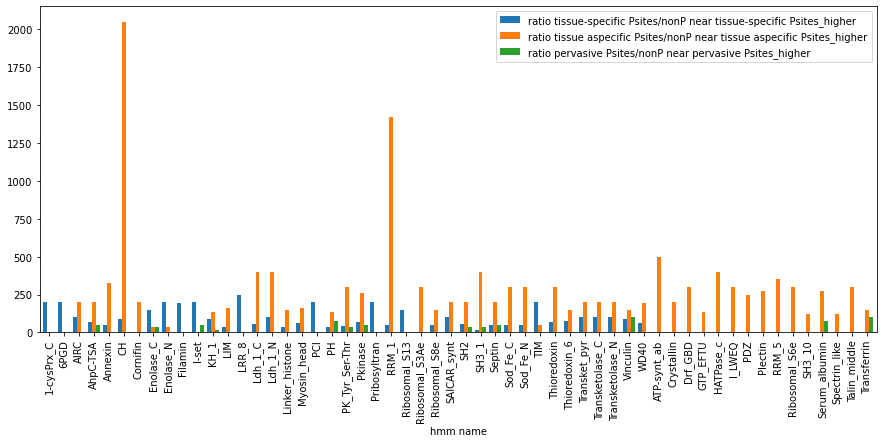

In [128]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher"]>100)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]>100)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]>100)][["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher", "ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher", "ratio pervasive Psites/nonP near pervasive Psites_higher"]].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Domains associated with more Psites_higher.png", format="png", bbox_inches="tight")

In [129]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher"]>100)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]>100)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]>100)]

tissue-specific phosphosites_higher  \
hmm name                                               
1-cysPrx_C                                       2.0   
6PGD                                             2.0   
AIRC                                             1.0   
AhpC-TSA                                         5.0   
Annexin                                          4.0   
CH                                              11.0   
Cornifin                                         1.0   
Enolase_C                                        3.0   
Enolase_N                                        2.0   
Filamin                                         44.0   
I-set                                            2.0   
KH_1                                             6.0   
LIM                                              2.0   
LRR_8                                            5.0   
Ldh_1_C                                          4.0   
Ldh_1_N                                          3.0   
Linker_histone                                   3.0   
Myosin_head                                      5.0   
PCI                                              2.0   
PH                                               2.0   
PK_Tyr_Ser-Thr                                   3.0   
Pkinase                                          2.0   
Pribosyltran                                     2.0   
RRM_1                                           21.0   
Ribosomal_S13                                    3.0   
Ribosomal_S3Ae                                   1.0   
Ribosomal_S8e                                    1.0   
SAICAR_synt                                      1.0   
SH2                                              7.0   
SH3_1                                            1.0   
Septin                                           2.0   
Sod_Fe_C                                         1.0   
Sod_Fe_N                                         1.0   
TIM                                              2.0   
Thioredoxin                                      2.0   
Thioredoxin_6                                    3.0   
Transket_pyr                                     1.0   
Transketolase_C                                  1.0   
Transketolase_N                                  1.0   
Vinculin                                         7.0   
WD40                                             5.0   
ATP-synt_ab                                      NaN   
Crystallin                                       NaN   
Drf_GBD                                          NaN   
GTP_EFTU                                         NaN   
HATPase_c                                        NaN   
I_LWEQ                                           NaN   
PDZ                                              NaN   
Plectin                                          NaN   
RRM_5                                            NaN   
Ribosomal_S6e                                    NaN   
SH3_10                                           NaN   
Serum_albumin                                    NaN   
Spectrin_like                                    NaN   
Talin_middle                                     NaN   
Transferrin                                      NaN   

                 tissue aspecific phosphosites_higher  \
hmm name                                                
1-cysPrx_C                                        6.0   
6PGD                                              NaN   
AIRC                                              2.0   
AhpC-TSA                                          6.0   
Annexin                                          92.0   
CH                                               82.0   
Cornifin                                          2.0   
Enolase_C                                         1.0   
Enolase_N                                         1.0   
Filamin                                         414.0   
I-set                                            66.0   
KH_1                       

<AxesSubplot:xlabel='hmm name'>

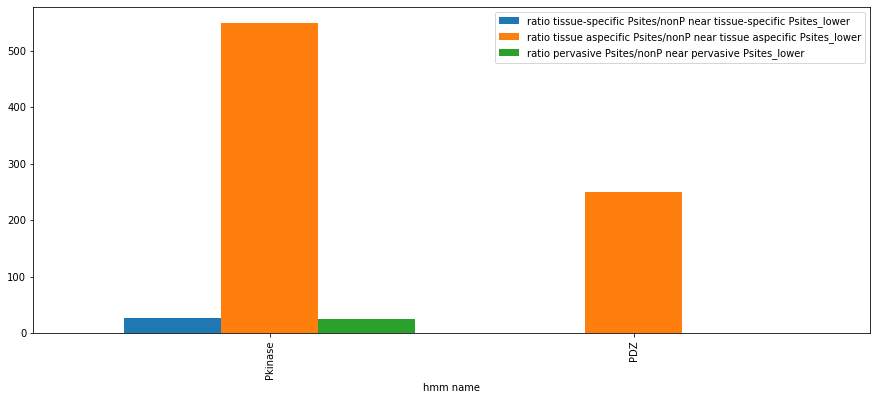

In [130]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower"]>100)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]>100)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]>100)][["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower", "ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower", "ratio pervasive Psites/nonP near pervasive Psites_lower"]].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Domains associated with more Psites_lower.png", format="png", bbox_inches="tight")

In [131]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower"]>100)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]>100)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]>100)]

tissue-specific phosphosites_higher  \
hmm name                                        
Pkinase                                   2.0   
PDZ                                       NaN   

          tissue aspecific phosphosites_higher  pervasive phosphosites_higher  \
hmm name                                                                        
Pkinase                                   13.0                            1.0   
PDZ                                        5.0                            NaN   

          tissue-specific phosphosites_lower  \
hmm name                                       
Pkinase                                  3.0   
PDZ                                      NaN   

          tissue aspecific phosphosites_lower  pervasive phosphosites_lower  \
hmm name                                                                      
Pkinase                                  11.0                           1.0   
PDZ                                       5.0                           NaN   

          canonical sites near tissue-specific phosphosites_higher  \
hmm name                                                             
Pkinase                                                 3.0          
PDZ                                                     NaN          

          canonical sites near tissue aspecific phosphosites_higher  \
hmm name                                                              
Pkinase                                                 5.0           
PDZ                                                     2.0           

          canonical sites near pervasive phosphosites_higher  \
hmm name                                                       
Pkinase                                                 2.0    
PDZ                                                     NaN    

          canonical sites near tissue-specific phosphosites_lower  \
hmm name                                                            
Pkinase                                                11.0         
PDZ                                                     NaN         

          canonical sites near tissue aspecific phosphosites_lower  \
hmm name                                                             
Pkinase                                                 2.0          
PDZ                                                     2.0          

          canonical sites near pervasive phosphosites_lower  \
hmm name                                                      
Pkinase                                                 4.0   
PDZ                                                     NaN   

          ratio tissue-specific Psites/nonP near tissue-specific Psites_higher  \
hmm name                                                                         
Pkinase                                           66.666667                      
PDZ                                                     NaN                      

          ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher  \
hmm name                                                                           
Pkinase                                               260.0                        
PDZ                                                   250.0                        

          ratio pervasive Psites/nonP near pervasive Psites_higher  \
hmm name                                                             
Pkinase                                                50.0          
PDZ                                                     NaN          

          ratio tissue-specific Psites/nonP near tissue-specific Psites_lower  \
hmm name                                                                        
Pkinase                                           27.272727                     
PDZ                                                     NaN                     

          ratio tissue aspecific Psites/nonP near tissue aspecific Psite

In [132]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_higher"]<10)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]<10)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher"]<10)]

Empty DataFrame
Columns: [tissue-specific phosphosites_higher, tissue aspecific phosphosites_higher, pervasive phosphosites_higher, tissue-specific phosphosites_lower, tissue aspecific phosphosites_lower, pervasive phosphosites_lower, canonical sites near tissue-specific phosphosites_higher, canonical sites near tissue aspecific phosphosites_higher, canonical sites near pervasive phosphosites_higher, canonical sites near tissue-specific phosphosites_lower, canonical sites near tissue aspecific phosphosites_lower, canonical sites near pervasive phosphosites_lower, ratio tissue-specific Psites/nonP near tissue-specific Psites_higher, ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher, ratio pervasive Psites/nonP near pervasive Psites_higher, ratio tissue-specific Psites/nonP near tissue-specific Psites_lower, ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower, ratio pervasive Psites/nonP near pervasive Psites_lower]
Index: []

In [133]:
pfam_hmm_name_both[(pfam_hmm_name_both["ratio tissue-specific Psites/nonP near tissue-specific Psites_lower"]<10)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]<10)|
             (pfam_hmm_name_both["ratio tissue aspecific Psites/nonP near tissue aspecific Psites_lower"]<10)]

tissue-specific phosphosites_higher  \
hmm name                                             
AdoHcyase                                      1.0   
AdoHcyase_NAD                                  NaN   

               tissue aspecific phosphosites_higher  \
hmm name                                              
AdoHcyase                                       NaN   
AdoHcyase_NAD                                   NaN   

               pervasive phosphosites_higher  \
hmm name                                       
AdoHcyase                                NaN   
AdoHcyase_NAD                            NaN   

               tissue-specific phosphosites_lower  \
hmm name                                            
AdoHcyase                                     1.0   
AdoHcyase_NAD                                 1.0   

               tissue aspecific phosphosites_lower  \
hmm name                                             
AdoHcyase                                      NaN   
AdoHcyase_NAD                                  NaN   

               pervasive phosphosites_lower  \
hmm name                                      
AdoHcyase                               NaN   
AdoHcyase_NAD                           NaN   

               canonical sites near tissue-specific phosphosites_higher  \
hmm name                                                                  
AdoHcyase                                                    NaN          
AdoHcyase_NAD                                                NaN          

               canonical sites near tissue aspecific phosphosites_higher  \
hmm name                                                                   
AdoHcyase                                                    NaN           
AdoHcyase_NAD                                                NaN           

               canonical sites near pervasive phosphosites_higher  \
hmm name                                                            
AdoHcyase                                                    NaN    
AdoHcyase_NAD                                                NaN    

               canonical sites near tissue-specific phosphosites_lower  \
hmm name                                                                 
AdoHcyase                                                   14.0         
AdoHcyase_NAD                                               14.0         

               canonical sites near tissue aspecific phosphosites_lower  \
hmm name                                                                  
AdoHcyase                                                    NaN          
AdoHcyase_NAD                                                NaN          

               canonical sites near pervasive phosphosites_lower  \
hmm name                                                           
AdoHcyase                                                    NaN   
AdoHcyase_NAD                                                NaN   

               ratio tissue-specific Psites/nonP near tissue-specific Psites_higher  \
hmm name                                                                              
AdoHcyase                                                    NaN                      
AdoHcyase_NAD                                                NaN                      

               ratio tissue aspecific Psites/nonP near tissue aspecific Psites_higher  \
hmm name                                                                                
AdoHcyase                                                    NaN                        
AdoHcyase_NAD                                                NaN                        

               ratio pervasive Psites/nonP near pervasive Psites_higher  \
hmm name                                                                  
AdoHcyase                                                    NaN          
AdoHcyase_NAD                                                NaN          

    

# 5. Clans

We'll now have a look at the different clans.

In [134]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = tspec_sites_pfam.loc[(tspec_sites_pfam[tissue]==1)&(tspec_sites_pfam["clan"]!="No_clan"), :]["ACC_ID"].count()
    count_taspec = taspec_sites_pfam.loc[(taspec_sites_pfam[tissue]==1)&(taspec_sites_pfam["clan"]!="No_clan"), :]["ACC_ID"].count()
    count_gen = gen_sites_pfam.loc[(gen_sites_pfam[tissue]==1)&(gen_sites_pfam["clan"]!="No_clan"), :]["ACC_ID"].count()
    count_total = count_tspec + count_taspec + count_gen
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues["Number of tissue-specific phosphosites associated with a clan"] = list_tspec
df_spread_tissues["Number of tissue aspecific phosphosites associated with a clan"] = list_taspec
df_spread_tissues["Number of pervasive phosphosites associated with a clan"] = list_gen
df_spread_tissues["Total"] = list_total
df_spread_tissues

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphosites associated with a clan  \
0                                                   0               
1                                                   3               
2                                                 369               
3                                                   2               
4                                                  66               
5                                                  16               
6                                                   0               
7                                                   0               
8                                                 842               
9                                                   1               
10                                                  0               
11                                                  0               
12                                                  0               
13                                                  9               
14                                                  0               
15                                                  3               
16                                                 63               
17                                                280               
18                                                389               
19                                                  1               
20                                                 18               
21                                                  0               
22                                                  5               
23                                                  0               
24                                                 11               
25                                                  0               
26                                                  0               
27                                                431               
28                                                  0               
29                                                310               
30                                                108               
31                                                304               
32                                                 52               
33                                                  0               
34                                                  0               
35                                                 57               
36                                                  0               
37            

<AxesSubplot:title={'center':'Number of phosphosites in each of the three categories for which the phopshosite is inside a domain'}, xlabel='Tissue'>

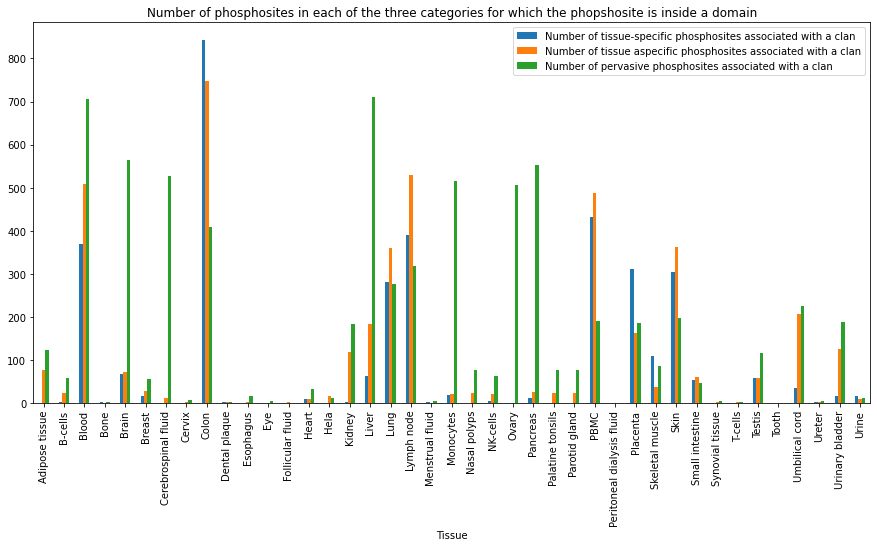

In [135]:
df_spread_tissues[["Tissue", "Number of tissue-specific phosphosites associated with a clan", "Number of tissue aspecific phosphosites associated with a clan", "Number of pervasive phosphosites associated with a clan"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of phosphosites in each of the three categories for which the phopshosite is inside a domain")
#plt.savefig("WP2 Pfam_phosphosites inside a functional domain_clan.png", format="png", bbox_inches="tight")

In [136]:
tspec_sites_pfam_clan = tspec_sites_pfam.groupby(["clan"], as_index=False)["ACC_ID"].count()
tspec_sites_pfam_clan.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites"}, inplace=True, )
tspec_sites_pfam_clan.set_index("clan", inplace=True)
taspec_sites_pfam_clan = taspec_sites_pfam.groupby(["clan"], as_index=False)["ACC_ID"].count()
taspec_sites_pfam_clan.rename(columns ={"ACC_ID": "number of tissue aspecific phosphosites"}, inplace=True)
taspec_sites_pfam_clan.set_index("clan", inplace=True)
gen_sites_pfam_clan = gen_sites_pfam.groupby(["clan"], as_index=False)["ACC_ID"].count()
gen_sites_pfam_clan.rename(columns ={"ACC_ID": "number of pervasive phosphosites"}, inplace=True)
gen_sites_pfam_clan.set_index("clan", inplace=True)

pfam_clan = pd.concat([tspec_sites_pfam_clan, taspec_sites_pfam_clan, gen_sites_pfam_clan], axis=1)
pfam_clan.head()

number of tissue-specific phosphosites  \
clan                                             
CL0001                                     9.0   
CL0003                                    17.0   
CL0004                                    12.0   
CL0005                                     2.0   
CL0006                                     8.0   

        number of tissue aspecific phosphosites  \
clan                                              
CL0001                                      NaN   
CL0003                                      3.0   
CL0004                                     12.0   
CL0005                                      1.0   
CL0006                                      4.0   

        number of pervasive phosphosites  
clan                                      
CL0001                               NaN  
CL0003                               1.0  
CL0004                               2.0  
CL0005                               NaN  
CL0006                               8.0

In [137]:
pfam_clan[(pfam_clan["number of tissue-specific phosphosites"]>15)|
             (pfam_clan["number of tissue aspecific phosphosites"]>15)|
             (pfam_clan["number of pervasive phosphosites"]>15)].shape[0]

51

In [138]:
pfam_clan.shape[0]

305

In [139]:
pfam_clan[(pfam_clan["number of tissue-specific phosphosites"]>15)|
             (pfam_clan["number of tissue aspecific phosphosites"]>15)|
             (pfam_clan["number of pervasive phosphosites"]>15)]

number of tissue-specific phosphosites  \
clan                                              
CL0003                                     17.0   
CL0007                                     22.0   
CL0010                                     27.0   
CL0011                                     69.0   
CL0012                                     84.0   
CL0016                                    195.0   
CL0020                                    144.0   
CL0021                                     35.0   
CL0022                                     17.0   
CL0023                                    240.0   
CL0029                                     16.0   
CL0031                                     18.0   
CL0035                                     22.0   
CL0039                                     17.0   
CL0052                                     24.0   
CL0062                                     25.0   
CL0063                                     87.0   
CL0066                                     16.0   
CL0072                                     71.0   
CL0090                                     13.0   
CL0092                                     23.0   
CL0108                                     98.0   
CL0116                                     19.0   
CL0123                                     76.0   
CL0124                                     33.0   
CL0125                                     31.0   
CL0128                                     23.0   
CL0137                                     15.0   
CL0154                                     21.0   
CL0159                                    192.0   
CL0167                                     39.0   
CL0172                                     23.0   
CL0186                                     62.0   
CL0188                                     34.0   
CL0220                                     39.0   
CL0221                                     92.0   
CL0266                                     99.0   
CL0295                                     17.0   
CL0333                                     19.0   
CL0361                                     27.0   
CL0390                                     19.0   
CL0409                                     16.0   
CL0442                                     45.0   
CL0465                                     26.0   
CL0466                                     18.0   
CL0541                                     17.0   
CL0566                                     51.0   
CL0575                                     17.0   
CL0632                                     29.0   
CL0705                                     25.0   
No_clan                                  1978.0   

         number of tissue aspecific phosphosites  \
clan                                               
CL0003                                       3.0   
CL0007                                      11.0   
CL0010                                       7.0   
CL0011                                      24.0   
CL0012                                      64.0   
CL0016                                     113.0   
CL0020                                      55.0   
CL0021                                      11.0   
CL0022                                       1.0   
CL0023                                     169.0   
CL0029                                      17.0   
CL0031                                       7.0   
CL0035                                       9.0   
CL0039                                       4.0   
CL0052                                       8.0   
CL0062                                      13.0   
CL0063                                      44.0   
CL0066                                       4.0   
CL0072                                      37.0   
CL0090                                      10.0   
CL0092                                      11.0   
CL0108                                     108.0   
CL0116                                       NaN   
CL012

Interesting clans:
- CL0001: EGF family
- CL0011: Immunoglobulin superfamily
- CL0016: PKinase
- CL0020: TPR-clan
- CL0023: P-loop_NTPase
- CL0063: NADP_Rossmann
- CL0108: Actin_ATPase
- CL0123: Helix-Turn-Helix clan
- CL0159: Ig-like fold superfamily (E-set)
- CL0221: RRM-like clan, RNA recognition motifs
- CL0442: Tubulin-C
- CL0566: Tubulin

<AxesSubplot:xlabel='clan'>

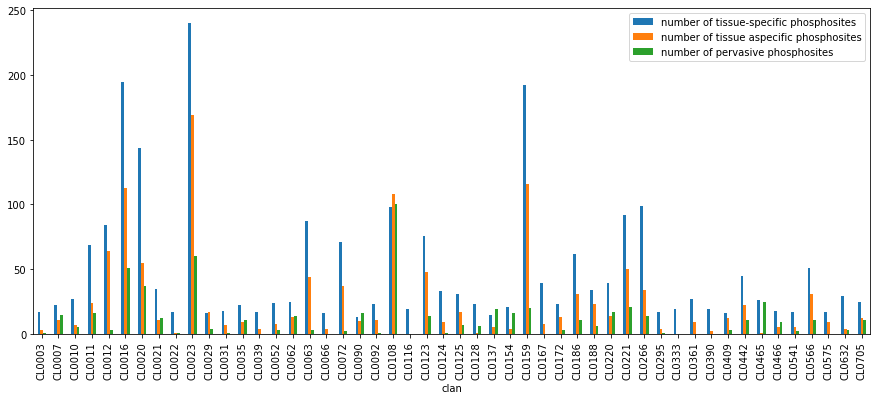

In [140]:
pfam_clan[(pfam_clan["number of tissue-specific phosphosites"]>15)|
             (pfam_clan["number of tissue aspecific phosphosites"]>15)|
             (pfam_clan["number of pervasive phosphosites"]>15)].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))
#plt.savefig("WP2 Pfam_clans associated with Psites.png", format="png", bbox_inches="tight")

In [141]:
tspec_sites_pfam_clan_nonP = domain_res_tspec.groupby(["clan"], as_index=False)["ACC_ID"].count()
tspec_sites_pfam_clan_nonP.rename(columns ={"ACC_ID": "canonical sites near tissue-specific phosphosites"}, inplace=True, )
tspec_sites_pfam_clan_nonP.set_index("clan", inplace=True)
taspec_sites_pfam_clan_nonP = domain_res_taspec.groupby(["clan"], as_index=False)["ACC_ID"].count()
taspec_sites_pfam_clan_nonP.rename(columns ={"ACC_ID": "canonical sites near tissue aspecific phosphosites"}, inplace=True)
taspec_sites_pfam_clan_nonP.set_index("clan", inplace=True)
gen_sites_pfam_clan_nonP = domain_res_gen.groupby(["clan"], as_index=False)["ACC_ID"].count()
gen_sites_pfam_clan_nonP.rename(columns ={"ACC_ID": "canonical sites near pervasive phosphosites"}, inplace=True)
gen_sites_pfam_clan_nonP.set_index("clan", inplace=True)

pfam_clan_nonP = pd.concat([tspec_sites_pfam_clan_nonP, taspec_sites_pfam_clan_nonP, gen_sites_pfam_clan_nonP], axis=1)

In [142]:
pfam_clan_nonP

canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0001                                               44.0   
CL0003                                               68.0   
CL0004                                               28.0   
CL0005                                                6.0   
CL0006                                               28.0   
...                                                   ...   
CL0629                                                NaN   
CL0083                                                NaN   
CL0117                                                NaN   
CL0264                                                NaN   
CL0498                                                NaN   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0001                                                NaN    
CL0003                                               21.0    
CL0004                                               24.0    
CL0005                                                3.0    
CL0006                                               15.0    
...                                                   ...    
CL0629                                                2.0    
CL0083                                                NaN    
CL0117                                                NaN    
CL0264                                                NaN    
CL0498                                                NaN    

        canonical sites near pervasive phosphosites  
clan                                                 
CL0001                                          NaN  
CL0003                                          5.0  
CL0004                                          3.0  
CL0005                                          NaN  
CL0006                                          8.0  
...                                             ...  
CL0629                                          NaN  
CL0083                                          4.0  
CL0117                                          4.0  
CL0264                                          2.0  
CL0498                                          1.0  

[300 rows x 3 columns]

In [143]:
pfam_clan_all = pd.concat([pfam_clan, pfam_clan_nonP], axis=1)
pfam_clan_all

number of tissue-specific phosphosites  \
clan                                             
CL0001                                     9.0   
CL0003                                    17.0   
CL0004                                    12.0   
CL0005                                     2.0   
CL0006                                     8.0   
...                                        ...   
CL0264                                     NaN   
CL0498                                     NaN   
CL0060                                     NaN   
CL0075                                     NaN   
CL0537                                     NaN   

        number of tissue aspecific phosphosites  \
clan                                              
CL0001                                      NaN   
CL0003                                      3.0   
CL0004                                     12.0   
CL0005                                      1.0   
CL0006                                      4.0   
...                                         ...   
CL0264                                      NaN   
CL0498                                      NaN   
CL0060                                      NaN   
CL0075                                      NaN   
CL0537                                      NaN   

        number of pervasive phosphosites  \
clan                                       
CL0001                               NaN   
CL0003                               1.0   
CL0004                               2.0   
CL0005                               NaN   
CL0006                               8.0   
...                                  ...   
CL0264                               1.0   
CL0498                               1.0   
CL0060                               NaN   
CL0075                               NaN   
CL0537                               NaN   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0001                                               44.0   
CL0003                                               68.0   
CL0004                                               28.0   
CL0005                                                6.0   
CL0006                                               28.0   
...                                                   ...   
CL0264                                                NaN   
CL0498                                                NaN   
CL0060                                                1.0   
CL0075                                                2.0   
CL0537                                                NaN   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0001                                                NaN    
CL0003                                               21.0    
CL0004                                               24.0    
CL0005                                                3.0    
CL0006                                               15.0    
...                                                   ...    
CL0264                                                NaN    
CL0498                                                NaN    
CL0060                                                NaN    
CL0075                                                NaN    
CL0537                                                2.0    

        canonical sites near pervasive phosphosites  
clan                                                 
CL0001                                          NaN  
CL0003                                          5.0  
CL0004                                          3.0  
CL0005                                          NaN  
CL0006                                          8.0  
...                                             ...  
CL0264                                          2.0  
CL0498                           

In [144]:
pfam_clan_all["ratio tissue-specific P-sites"] = (pfam_clan_all["number of tissue-specific phosphosites"])*100/(pfam_clan_all["canonical sites near tissue-specific phosphosites"])
pfam_clan_all["ratio tissue aspecific P-sites"] = (pfam_clan_all["number of tissue aspecific phosphosites"])*100/(pfam_clan_all["canonical sites near tissue aspecific phosphosites"])
pfam_clan_all["ratio pervasive P-sites"] = (pfam_clan_all["number of pervasive phosphosites"])*100/(pfam_clan_all["canonical sites near pervasive phosphosites"])
pfam_clan_all

number of tissue-specific phosphosites  \
clan                                             
CL0001                                     9.0   
CL0003                                    17.0   
CL0004                                    12.0   
CL0005                                     2.0   
CL0006                                     8.0   
...                                        ...   
CL0264                                     NaN   
CL0498                                     NaN   
CL0060                                     NaN   
CL0075                                     NaN   
CL0537                                     NaN   

        number of tissue aspecific phosphosites  \
clan                                              
CL0001                                      NaN   
CL0003                                      3.0   
CL0004                                     12.0   
CL0005                                      1.0   
CL0006                                      4.0   
...                                         ...   
CL0264                                      NaN   
CL0498                                      NaN   
CL0060                                      NaN   
CL0075                                      NaN   
CL0537                                      NaN   

        number of pervasive phosphosites  \
clan                                       
CL0001                               NaN   
CL0003                               1.0   
CL0004                               2.0   
CL0005                               NaN   
CL0006                               8.0   
...                                  ...   
CL0264                               1.0   
CL0498                               1.0   
CL0060                               NaN   
CL0075                               NaN   
CL0537                               NaN   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0001                                               44.0   
CL0003                                               68.0   
CL0004                                               28.0   
CL0005                                                6.0   
CL0006                                               28.0   
...                                                   ...   
CL0264                                                NaN   
CL0498                                                NaN   
CL0060                                                1.0   
CL0075                                                2.0   
CL0537                                                NaN   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0001                                                NaN    
CL0003                                               21.0    
CL0004                                               24.0    
CL0005                                                3.0    
CL0006                                               15.0    
...                                                   ...    
CL0264                                                NaN    
CL0498                                                NaN    
CL0060                                                NaN    
CL0075                                                NaN    
CL0537                                                2.0    

        canonical sites near pervasive phosphosites  \
clan                                                  
CL0001                                          NaN   
CL0003                                          5.0   
CL0004                                          3.0   
CL0005                                          NaN   
CL0006                                          8.0   
...                                             ...   
CL0264                                          2.0   
CL0498                  

In [145]:
pfam_clan_all["ratio tissue-specific P-sites"] = (pfam_clan_all["number of tissue-specific phosphosites"])*100/(pfam_clan_all["canonical sites near tissue-specific phosphosites"])
pfam_clan_all["ratio tissue aspecific P-sites"] = (pfam_clan_all["number of tissue aspecific phosphosites"])*100/(pfam_clan_all["canonical sites near tissue aspecific phosphosites"])
pfam_clan_all["ratio pervasive P-sites"] = (pfam_clan_all["number of pervasive phosphosites"])*100/(pfam_clan_all["canonical sites near pervasive phosphosites"])
pfam_clan_all

number of tissue-specific phosphosites  \
clan                                             
CL0001                                     9.0   
CL0003                                    17.0   
CL0004                                    12.0   
CL0005                                     2.0   
CL0006                                     8.0   
...                                        ...   
CL0264                                     NaN   
CL0498                                     NaN   
CL0060                                     NaN   
CL0075                                     NaN   
CL0537                                     NaN   

        number of tissue aspecific phosphosites  \
clan                                              
CL0001                                      NaN   
CL0003                                      3.0   
CL0004                                     12.0   
CL0005                                      1.0   
CL0006                                      4.0   
...                                         ...   
CL0264                                      NaN   
CL0498                                      NaN   
CL0060                                      NaN   
CL0075                                      NaN   
CL0537                                      NaN   

        number of pervasive phosphosites  \
clan                                       
CL0001                               NaN   
CL0003                               1.0   
CL0004                               2.0   
CL0005                               NaN   
CL0006                               8.0   
...                                  ...   
CL0264                               1.0   
CL0498                               1.0   
CL0060                               NaN   
CL0075                               NaN   
CL0537                               NaN   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0001                                               44.0   
CL0003                                               68.0   
CL0004                                               28.0   
CL0005                                                6.0   
CL0006                                               28.0   
...                                                   ...   
CL0264                                                NaN   
CL0498                                                NaN   
CL0060                                                1.0   
CL0075                                                2.0   
CL0537                                                NaN   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0001                                                NaN    
CL0003                                               21.0    
CL0004                                               24.0    
CL0005                                                3.0    
CL0006                                               15.0    
...                                                   ...    
CL0264                                                NaN    
CL0498                                                NaN    
CL0060                                                NaN    
CL0075                                                NaN    
CL0537                                                2.0    

        canonical sites near pervasive phosphosites  \
clan                                                  
CL0001                                          NaN   
CL0003                                          5.0   
CL0004                                          3.0   
CL0005                                          NaN   
CL0006                                          8.0   
...                                             ...   
CL0264                                          2.0   
CL0498                  

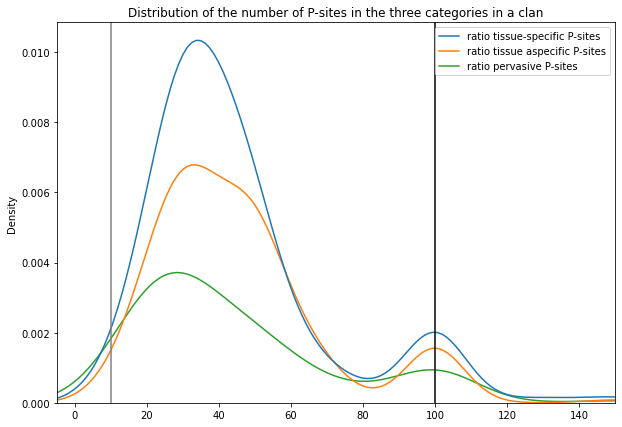

In [146]:
plt.figure(figsize=(10,7))
sns.kdeplot(data=pfam_clan_all[["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]], palette="tab10")
plt.axvline(x=100, c="black")
plt.axvline(x=10, c="grey")
plt.title("Distribution of the number of P-sites in the three categories in a clan")
plt.xlim([-5,150])
#plt.savefig("Distribution_Psites_clans.png", format="png", bbox_inches="tight")
plt.show()

<AxesSubplot:xlabel='clan'>

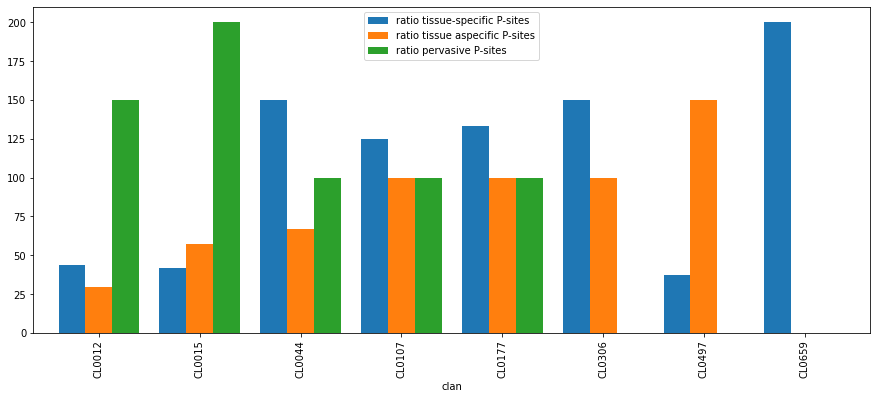

In [147]:
pfam_clan_all[(pfam_clan_all["ratio tissue-specific P-sites"]>100)|
             (pfam_clan_all["ratio tissue aspecific P-sites"]>100)|
             (pfam_clan_all["ratio pervasive P-sites"]>100)][["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]].plot(kind="bar", figsize=(15,6), width=0.8)
#plt.savefig("Clans associated with more Psites.png", format="png", bbox_inches="tight")

In [148]:
pfam_clan_all[(pfam_clan_all["ratio tissue-specific P-sites"]>100)|
             (pfam_clan_all["ratio tissue aspecific P-sites"]>100)|
             (pfam_clan_all["ratio pervasive P-sites"]>100)]

number of tissue-specific phosphosites  \
clan                                             
CL0012                                    84.0   
CL0015                                    10.0   
CL0044                                     3.0   
CL0107                                     5.0   
CL0177                                     8.0   
CL0306                                     3.0   
CL0497                                     6.0   
CL0659                                     2.0   

        number of tissue aspecific phosphosites  \
clan                                              
CL0012                                     64.0   
CL0015                                      4.0   
CL0044                                      2.0   
CL0107                                      2.0   
CL0177                                      6.0   
CL0306                                      1.0   
CL0497                                      3.0   
CL0659                                      NaN   

        number of pervasive phosphosites  \
clan                                       
CL0012                               3.0   
CL0015                               4.0   
CL0044                               1.0   
CL0107                               1.0   
CL0177                               2.0   
CL0306                               NaN   
CL0497                               1.0   
CL0659                               NaN   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0012                                              193.0   
CL0015                                               24.0   
CL0044                                                2.0   
CL0107                                                4.0   
CL0177                                                6.0   
CL0306                                                2.0   
CL0497                                               16.0   
CL0659                                                1.0   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0012                                              215.0    
CL0015                                                7.0    
CL0044                                                3.0    
CL0107                                                2.0    
CL0177                                                6.0    
CL0306                                                1.0    
CL0497                                                2.0    
CL0659                                                NaN    

        canonical sites near pervasive phosphosites  \
clan                                                  
CL0012                                          2.0   
CL0015                                          2.0   
CL0044                                          1.0   
CL0107                                          1.0   
CL0177                                          2.0   
CL0306                                          NaN   
CL0497                                          NaN   
CL0659                                          NaN   

        ratio tissue-specific P-sites  ratio tissue aspecific P-sites  \
clan                                                                    
CL0012                      43.523316                       29.767442   
CL0015                      41.666667                       57.142857   
CL0044                     150.000000                       66.666667   
CL0107                     125.000000                      100.000000   
CL0177                     133.333333                      100.000000   
CL0306                     150.000000                      100.000000   
CL0497                      37.500000                      150.000000   
CL0659                     200.000000                             NaN   

        ratio pervasive P-sites  
clan   

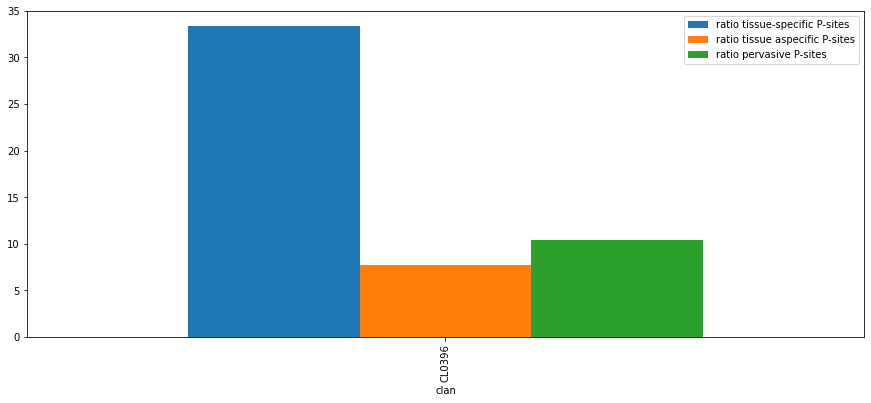

In [149]:
pfam_clan_all[(pfam_clan_all["ratio tissue-specific P-sites"]<10)|
             (pfam_clan_all["ratio tissue aspecific P-sites"]<10)|
             (pfam_clan_all["ratio pervasive P-sites"]<10)][["ratio tissue-specific P-sites", "ratio tissue aspecific P-sites", "ratio pervasive P-sites"]].plot(kind="bar", figsize=(15,6), width=0.8)
plt.savefig("Clans associated with nonPsites.png", format="png", bbox_inches="tight")

In [150]:
pfam_clan_all[(pfam_clan_all["ratio tissue-specific P-sites"]<10)|
             (pfam_clan_all["ratio tissue aspecific P-sites"]<10)|
             (pfam_clan_all["ratio pervasive P-sites"]<10)]

number of tissue-specific phosphosites  \
clan                                             
CL0396                                     1.0   

        number of tissue aspecific phosphosites  \
clan                                              
CL0396                                      1.0   

        number of pervasive phosphosites  \
clan                                       
CL0396                              14.0   

        canonical sites near tissue-specific phosphosites  \
clan                                                        
CL0396                                                3.0   

        canonical sites near tissue aspecific phosphosites  \
clan                                                         
CL0396                                               13.0    

        canonical sites near pervasive phosphosites  \
clan                                                  
CL0396                                        134.0   

        ratio tissue-specific P-sites  ratio tissue aspecific P-sites  \
clan                                                                    
CL0396                      33.333333                        7.692308   

        ratio pervasive P-sites  
clan                             
CL0396                10.447761

# 6. Looking at different tissues

## looking at Colon

We now repeat the same analysis for all of the tissues seperately, as well as for all tissues excluding colon (the largest tissue in terms of protein counts).

- CL0020: Tetratrico peptide repeat superfamily (involved in protein-protein interaction and multiprotein complexes (amongst others)
- CL0192: Family A G protein-coupled receptor-like superfamily
- CL0266: PH domain-like superfamily, bind short peptide motifs and involved in cellular signalling

<AxesSubplot:xlabel='clan'>

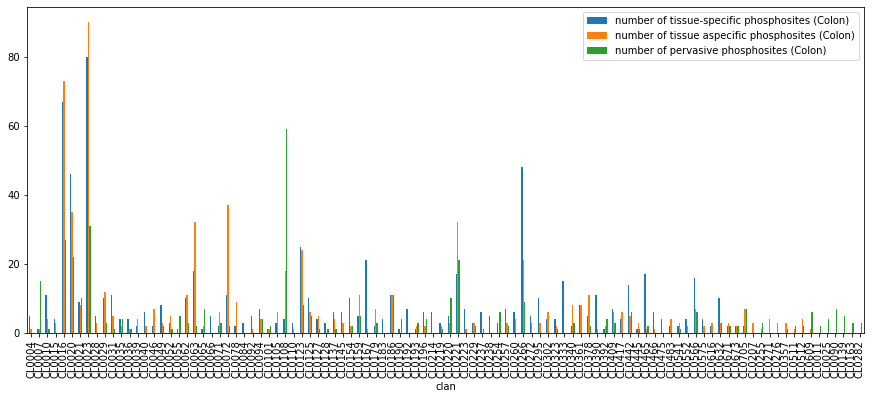

In [151]:
df_clan_tspec_colon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_tspec_colon.set_index(["clan"], inplace=True)
df_clan_taspec_colon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_colon.rename({"ACC_ID": "number of tissue aspecific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_taspec_colon.set_index(["clan"], inplace=True)
df_clan_gen_colon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_colon.rename({"ACC_ID": "number of pervasive phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_gen_colon.set_index(["clan"], inplace=True)
df_clan_all_colon = pd.concat([df_clan_tspec_colon, df_clan_taspec_colon, df_clan_gen_colon], axis=1)
df_clan_all_colon[((df_clan_all_colon["number of tissue-specific phosphosites (Colon)"]>2)|
                 (df_clan_all_colon["number of tissue aspecific phosphosites (Colon)"]>2)|
                 (df_clan_all_colon["number of pervasive phosphosites (Colon)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

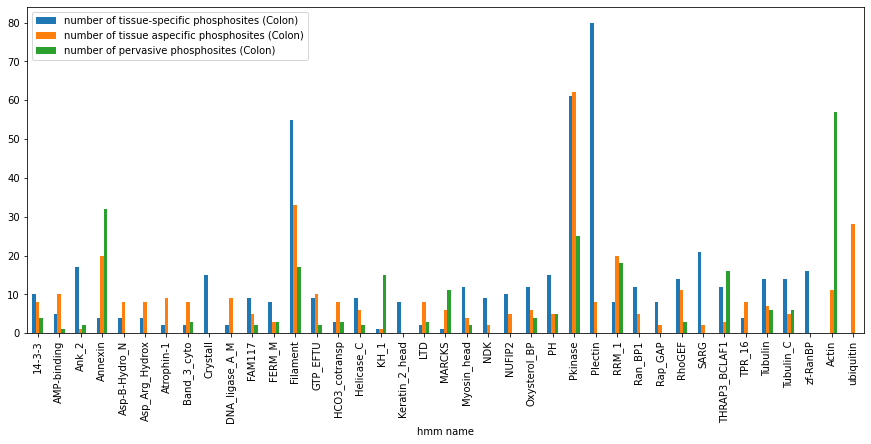

In [152]:
df_hmm_tspec_colon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_tspec_colon.set_index(["hmm name"], inplace=True)
df_hmm_taspec_colon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_colon.rename({"ACC_ID": "number of tissue aspecific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_taspec_colon.set_index(["hmm name"], inplace=True)
df_hmm_gen_colon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_colon.rename({"ACC_ID": "number of pervasive phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_gen_colon.set_index(["hmm name"], inplace=True)
df_hmm_all_colon = pd.concat([df_hmm_tspec_colon, df_hmm_taspec_colon, df_hmm_gen_colon], axis=1)
df_hmm_all_colon[((df_hmm_all_colon["number of tissue-specific phosphosites (Colon)"]>7)|
                 (df_hmm_all_colon["number of tissue aspecific phosphosites (Colon)"]>7)|
                 (df_hmm_all_colon["number of pervasive phosphosites (Colon)"]>7))].plot(kind="bar", figsize=(15,6))

## looking at all other tissues

<AxesSubplot:xlabel='clan'>

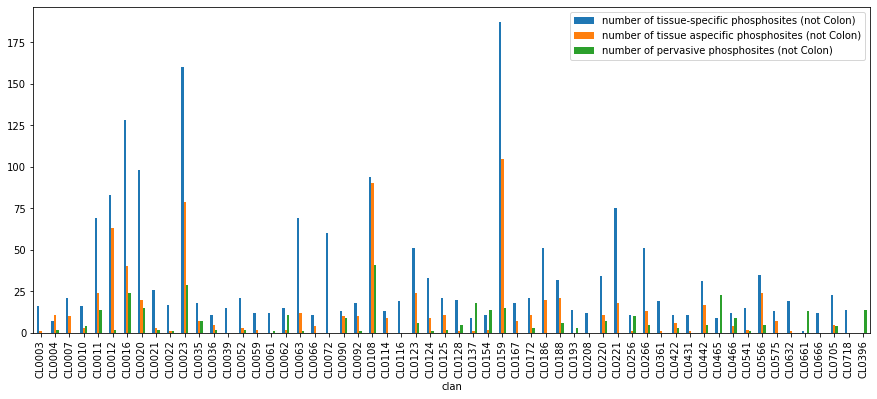

In [153]:
df_clan_tspec_noncolon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==0, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_noncolon.rename({"ACC_ID": "number of tissue-specific phosphosites (not Colon)"}, inplace=True, axis=1)
df_clan_tspec_noncolon.set_index(["clan"], inplace=True)
df_clan_taspec_noncolon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==0, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_noncolon.rename({"ACC_ID": "number of tissue aspecific phosphosites (not Colon)"}, inplace=True, axis=1)
df_clan_taspec_noncolon.set_index(["clan"], inplace=True)
df_clan_gen_noncolon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==0, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_noncolon.rename({"ACC_ID": "number of pervasive phosphosites (not Colon)"}, inplace=True, axis=1)
df_clan_gen_noncolon.set_index(["clan"], inplace=True)
df_clan_all_noncolon = pd.concat([df_clan_tspec_noncolon, df_clan_taspec_noncolon, df_clan_gen_noncolon], axis=1)
df_clan_all_noncolon[((df_clan_all_noncolon["number of tissue-specific phosphosites (not Colon)"]>10)|
                 (df_clan_all_noncolon["number of tissue aspecific phosphosites (not Colon)"]>10)|
                 (df_clan_all_noncolon["number of pervasive phosphosites (not Colon)"]>10))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

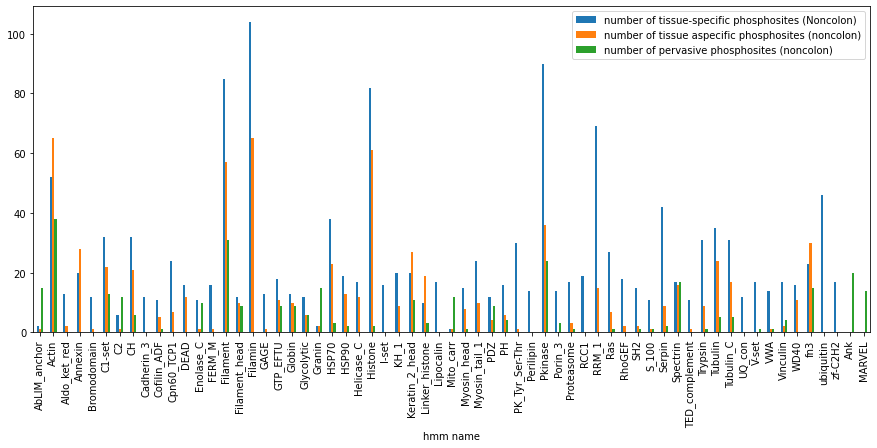

In [154]:
df_hmm_tspec_noncolon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==0, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_noncolon.rename({"ACC_ID": "number of tissue-specific phosphosites (Noncolon)"}, inplace=True, axis=1)
df_hmm_tspec_noncolon.set_index(["hmm name"], inplace=True)
df_hmm_taspec_noncolon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==0, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_noncolon.rename({"ACC_ID": "number of tissue aspecific phosphosites (noncolon)"}, inplace=True, axis=1)
df_hmm_taspec_noncolon.set_index(["hmm name"], inplace=True)
df_hmm_gen_noncolon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==0, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_noncolon.rename({"ACC_ID": "number of pervasive phosphosites (noncolon)"}, inplace=True, axis=1)
df_hmm_gen_noncolon.set_index(["hmm name"], inplace=True)
df_hmm_all_noncolon = pd.concat([df_hmm_tspec_noncolon, df_hmm_taspec_noncolon, df_hmm_gen_noncolon], axis=1)
df_hmm_all_noncolon[((df_hmm_all_noncolon["number of tissue-specific phosphosites (Noncolon)"]>10)|
                 (df_hmm_all_noncolon["number of tissue aspecific phosphosites (noncolon)"]>10)|
                 (df_hmm_all_noncolon["number of pervasive phosphosites (noncolon)"]>10))].plot(kind="bar", figsize=(15,6))

## Adipose tissue

<AxesSubplot:xlabel='clan'>

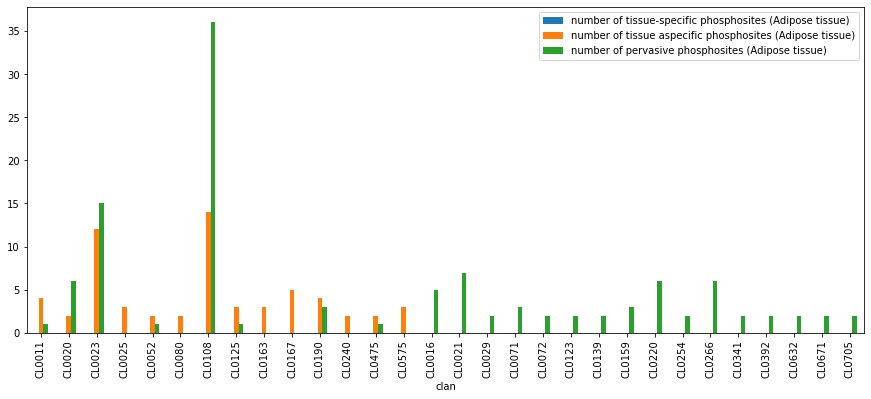

In [155]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Adipose tissue)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Adipose tissue)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Adipose tissue)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

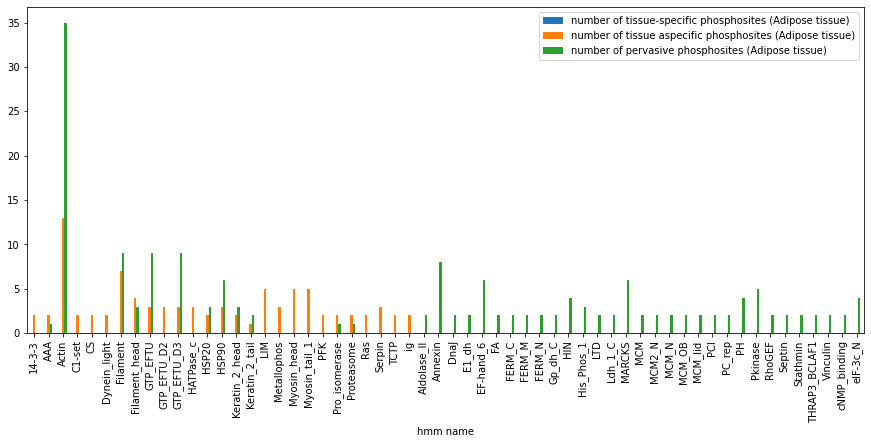

In [156]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Adipose tissue)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Adipose tissue)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Adipose tissue)"]>1))].plot(kind="bar", figsize=(15,6))

## B-cells

<AxesSubplot:xlabel='clan'>

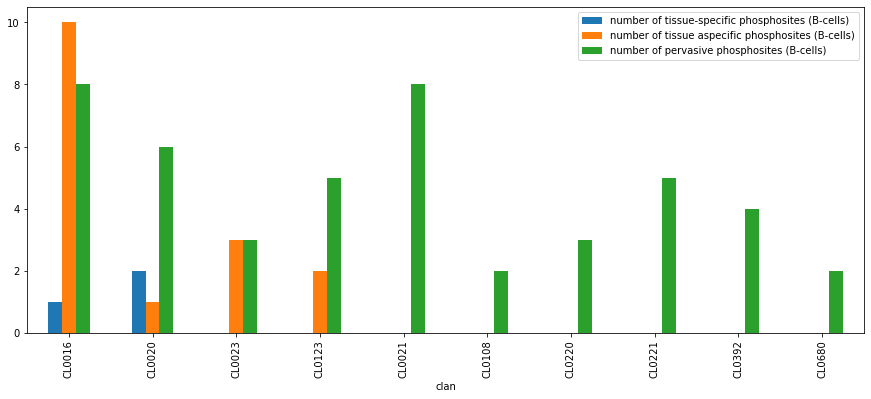

In [157]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["B-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (B-cells)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["B-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (B-cells)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["B-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (B-cells)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (B-cells)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (B-cells)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (B-cells)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

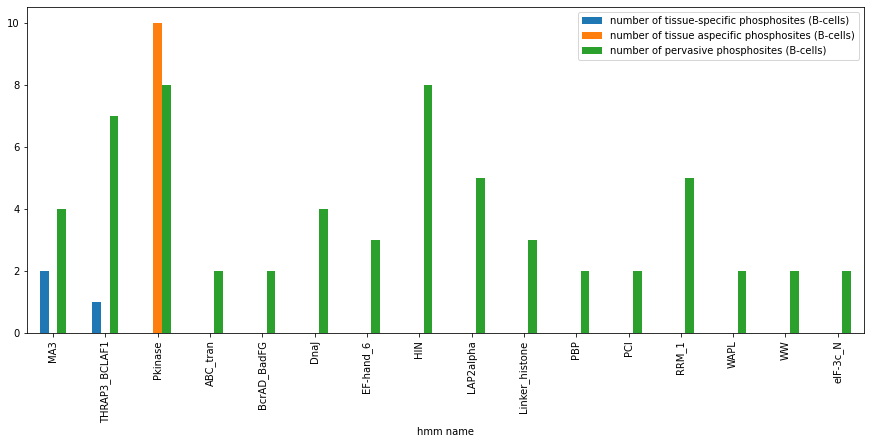

In [158]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["B-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (B-cells)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["B-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (B-cells)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["B-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (B-cells)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (B-cells)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (B-cells)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (B-cells)"]>1))].plot(kind="bar", figsize=(15,6))

## Blood

<AxesSubplot:xlabel='clan'>

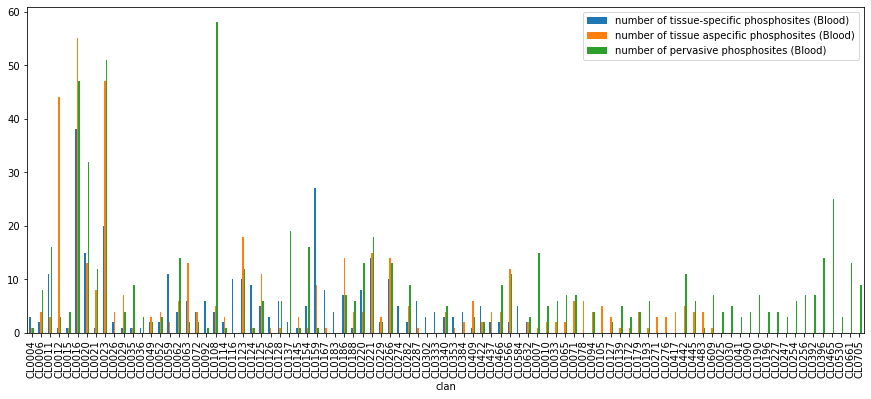

In [159]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Blood)"]>2)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Blood)"]>2)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Blood)"]>2))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

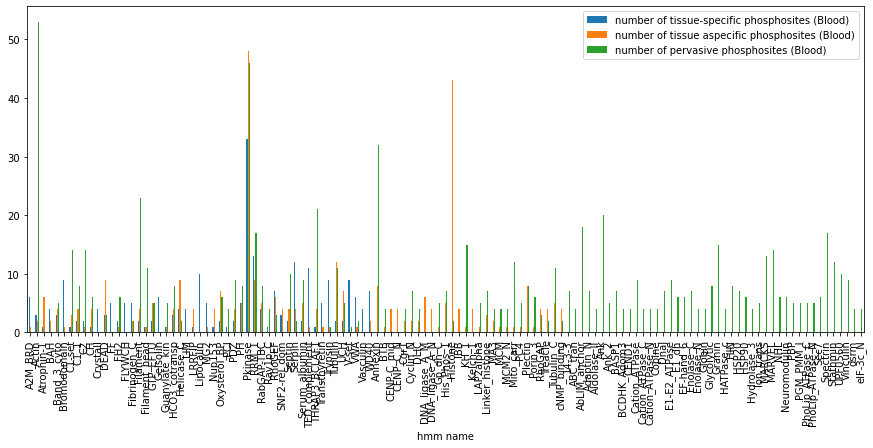

In [160]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Blood)"]>3)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Blood)"]>3)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Blood)"]>3))].plot(kind="bar", figsize=(15,6))

## Bone

<AxesSubplot:xlabel='clan'>

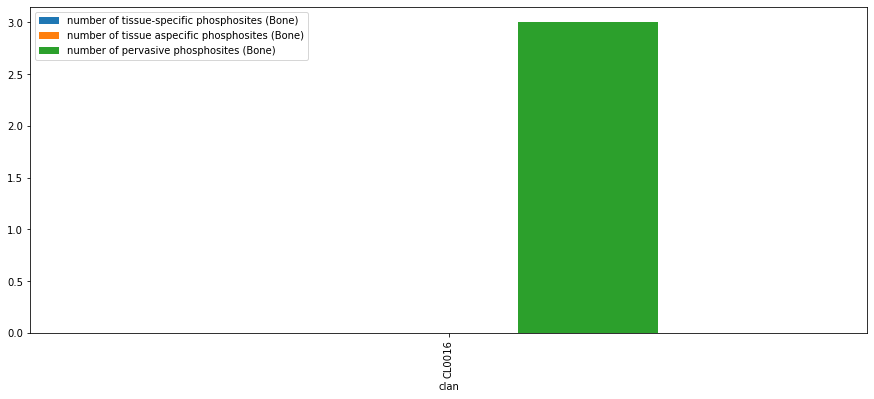

In [161]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Bone"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Bone)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Bone"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Bone)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Bone"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Bone)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Bone)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Bone)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Bone)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

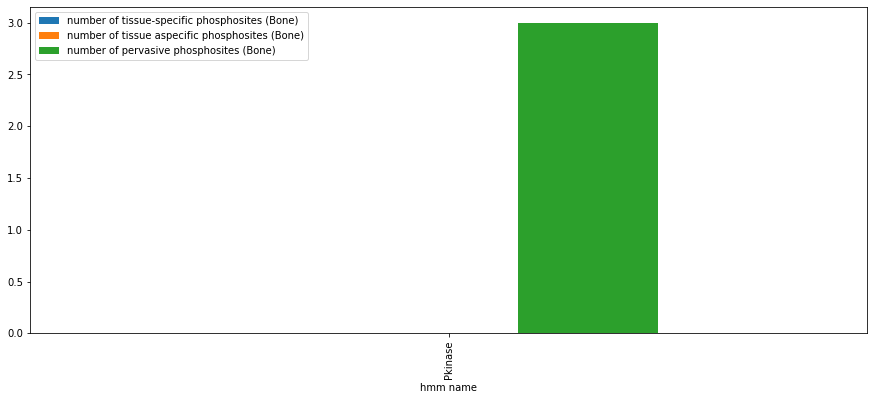

In [162]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Bone"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Bone)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Bone"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Bone)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Bone"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Bone)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Bone)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Bone)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Bone)"]>1))].plot(kind="bar", figsize=(15,6))

## Brain

<AxesSubplot:xlabel='clan'>

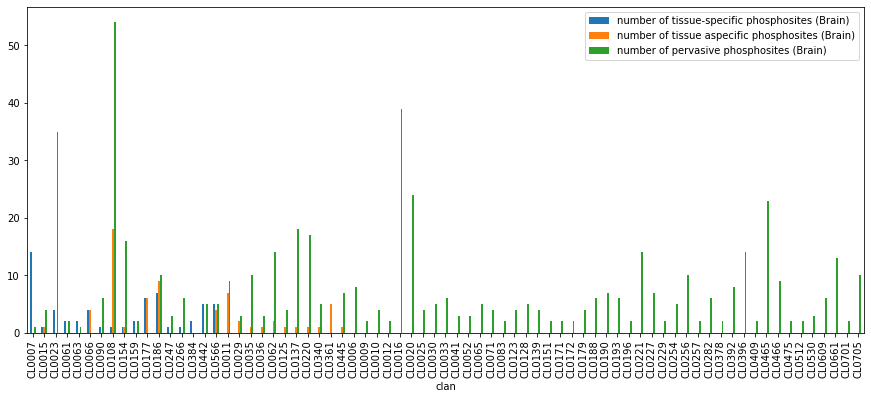

In [163]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Brain)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Brain)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Brain)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Brain)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Brain)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

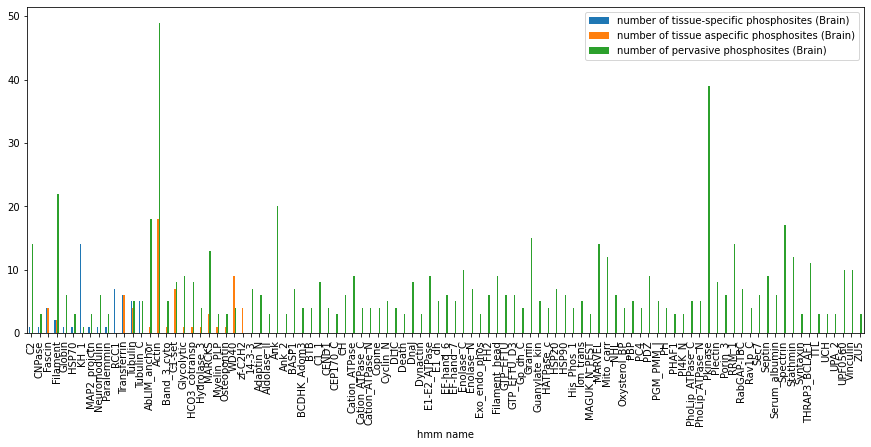

In [164]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Brain)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Brain)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Brain)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Brain)"]>2)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Brain)"]>2))].plot(kind="bar", figsize=(15,6))

## Breast

<AxesSubplot:xlabel='clan'>

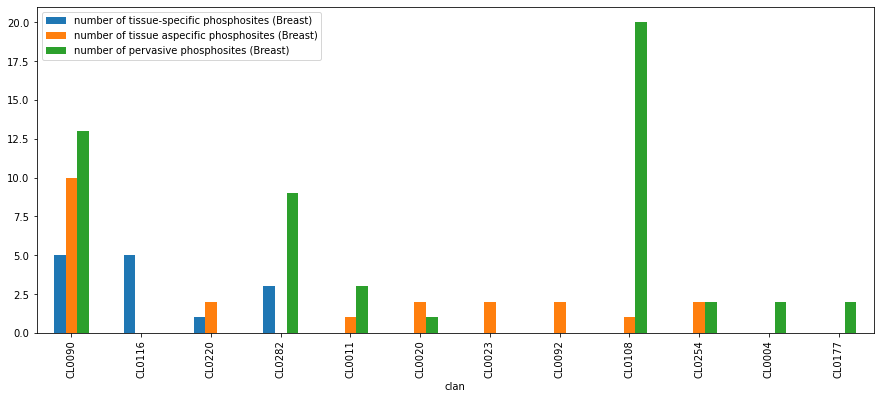

In [165]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Breast"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Breast)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Breast"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Breast)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Breast"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Breast)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Breast)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Breast)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Breast)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

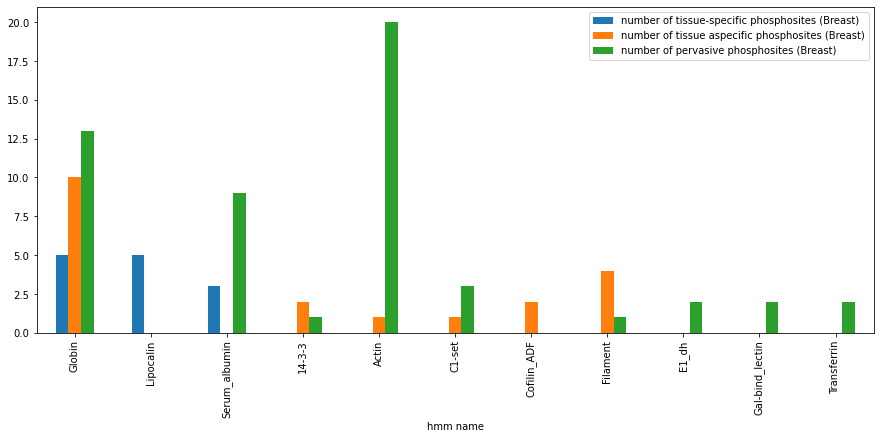

In [166]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Breast"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Breast)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Breast"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Breast)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Breast"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Breast)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Breast)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Breast)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Breast)"]>1))].plot(kind="bar", figsize=(15,6))

## Cerebrospinal fluid

<AxesSubplot:xlabel='clan'>

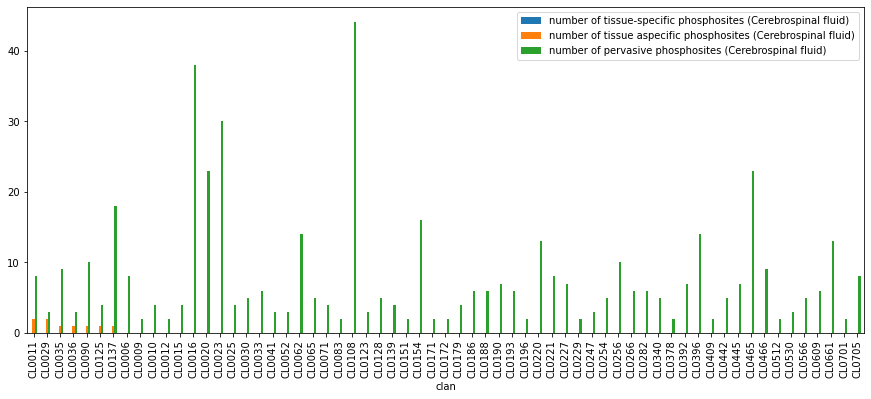

In [167]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Cerebrospinal fluid)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Cerebrospinal fluid)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Cerebrospinal fluid)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

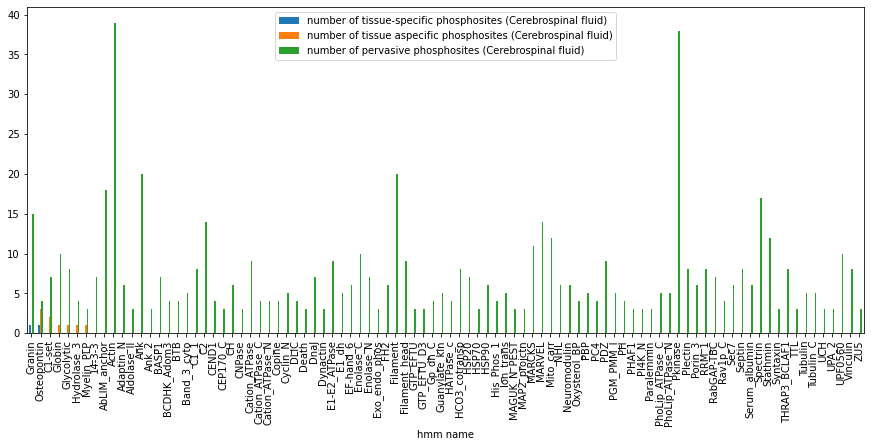

In [168]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Cerebrospinal fluid)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Cerebrospinal fluid)"]>2)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Cerebrospinal fluid)"]>2))].plot(kind="bar", figsize=(15,6))

## Cervix

In [169]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Cervix"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Cervix)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Cervix"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Cervix)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Cervix"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasively phosphosites (Cervix)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

number of tissue-specific phosphosites (Cervix)  \
clan                                                       
No_clan                                              4.0   
CL0179                                               NaN   
CL0506                                               NaN   
CL0011                                               NaN   
CL0190                                               NaN   
CL0282                                               NaN   

         number of tissue aspecific phosphosites (Cervix)  \
clan                                                        
No_clan                                              11.0   
CL0179                                                1.0   
CL0506                                                1.0   
CL0011                                                NaN   
CL0190                                                NaN   
CL0282                                                NaN   

         number of pervasively phosphosites (Cervix)  
clan                                                  
No_clan                                          6.0  
CL0179                                           NaN  
CL0506                                           NaN  
CL0011                                           1.0  
CL0190                                           2.0  
CL0282                                           3.0

<AxesSubplot:xlabel='hmm name'>

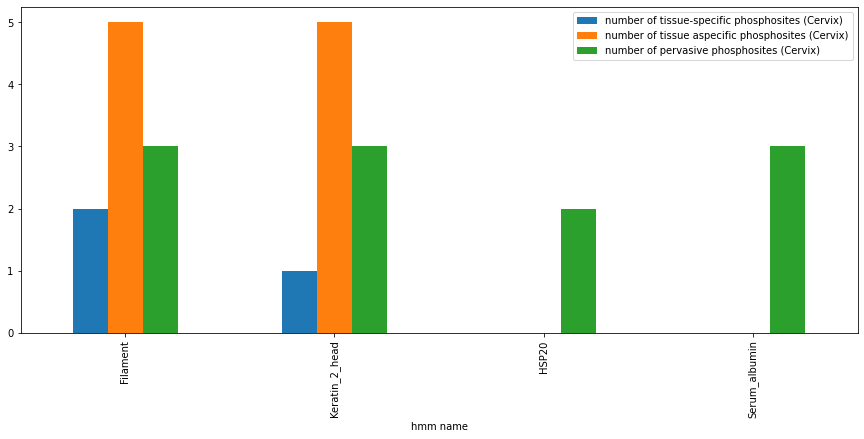

In [170]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Cervix"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Cervix)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Cervix"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Cervix)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Cervix"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Cervix)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Cervix)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Cervix)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Cervix)"]>1))].plot(kind="bar", figsize=(15,6))

## Dental plaque

<AxesSubplot:xlabel='clan'>

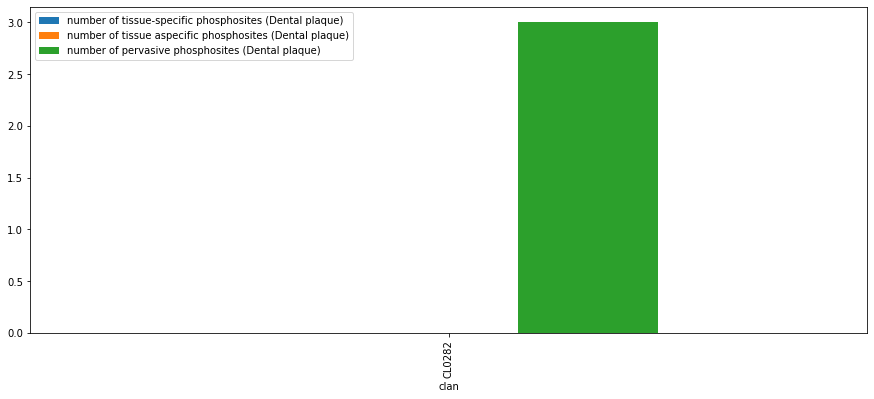

In [171]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Dental plaque"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Dental plaque)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Dental plaque"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Dental plaque)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Dental plaque"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Dental plaque)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Dental plaque)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Dental plaque)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Dental plaque)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

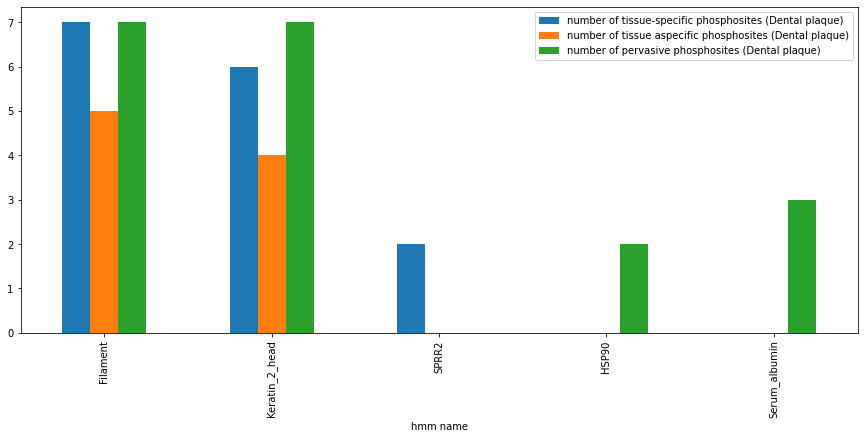

In [172]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Dental plaque"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Dental plaque)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Dental plaque"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Dental plaque)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Dental plaque"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Dental plaque)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Dental plaque)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Dental plaque)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Dental plaque)"]>1))].plot(kind="bar", figsize=(15,6))

## Esophagus

<AxesSubplot:xlabel='clan'>

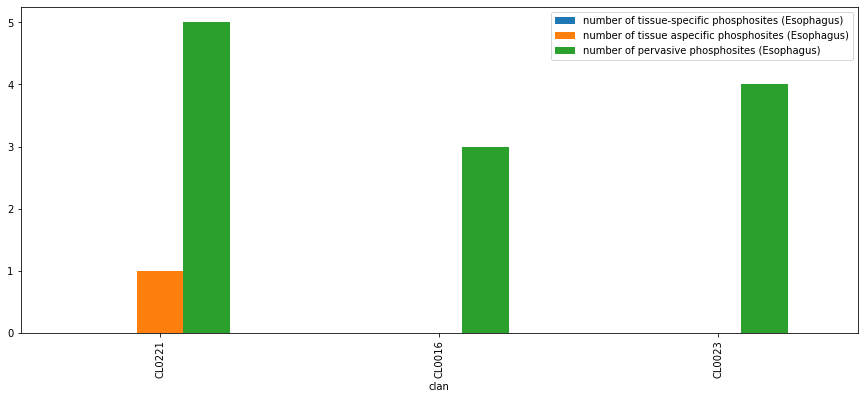

In [173]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Esophagus"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Esophagus)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Esophagus"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Esophagus)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Esophagus"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Esophagus)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Esophagus)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Esophagus)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Esophagus)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

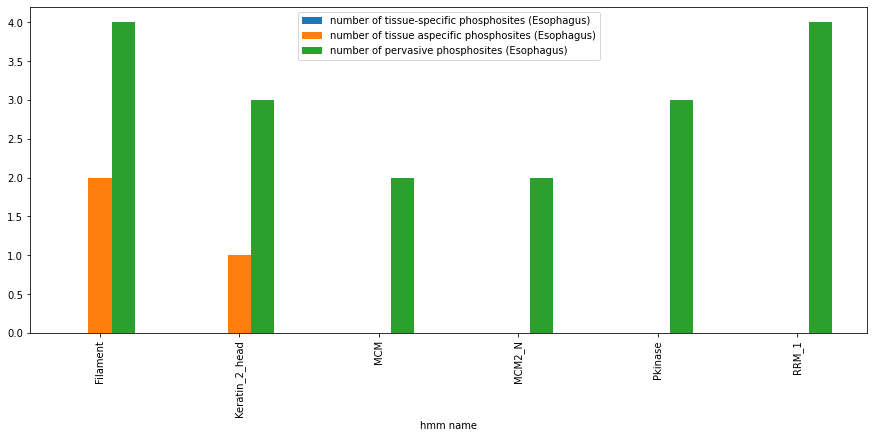

In [174]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Esophagus"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Esophagus)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Esophagus"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Esophagus)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Esophagus"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Esophagus)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Esophagus)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Esophagus)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Esophagus)"]>1))].plot(kind="bar", figsize=(15,6))

## Eye

<AxesSubplot:xlabel='clan'>

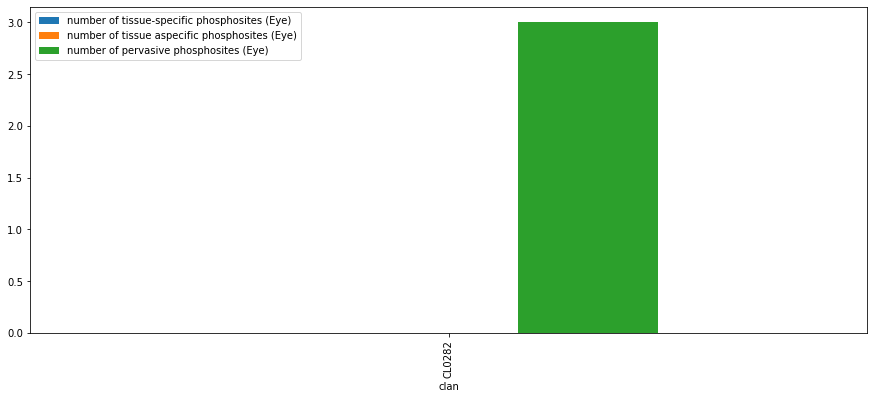

In [175]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Eye"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Eye)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Eye"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Eye)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Eye"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Eye)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Eye)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Eye)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Eye)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

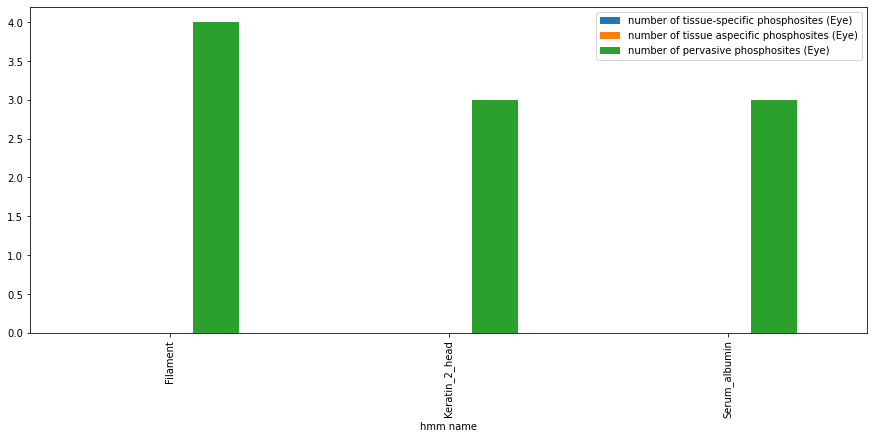

In [176]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Eye"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Eye)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Eye"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Eye)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Eye"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Eye)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Eye)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Eye)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Eye)"]>1))].plot(kind="bar", figsize=(15,6))

## Follicular fluid

In [177]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Follicular fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Follicular fluid)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Follicular fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Follicular fluid)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Follicular fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Follicular fluid)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

#Family A G protein-coupled receptor-like superfamily

number of tissue-specific phosphosites (Follicular fluid)  \
clan                                                                
CL0192                                                NaN           

        number of tissue aspecific phosphosites (Follicular fluid)  \
clan                                                                 
CL0192                                                  1            

        number of pervasive phosphosites (Follicular fluid)  
clan                                                         
CL0192                                                NaN

In [178]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Follicular fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Follicular fluid)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Follicular fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Follicular fluid)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Follicular fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Follicular fluid)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

#G-protein coupled taste receptor protein family domain

number of tissue-specific phosphosites (Follicular fluid)  \
hmm name                                                              
TAS2R                                                   NaN           

          number of tissue aspecific phosphosites (Follicular fluid)  \
hmm name                                                               
TAS2R                                                     1            

          number of pervasive phosphosites (Follicular fluid)  
hmm name                                                       
TAS2R                                                   NaN

## Heart

<AxesSubplot:xlabel='clan'>

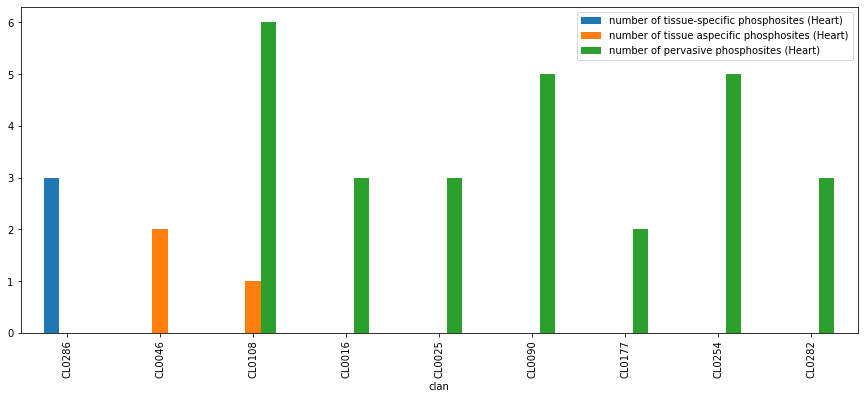

In [179]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Heart"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Heart)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Heart"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Heart)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Heart"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Heart)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Heart)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Heart)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Heart)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

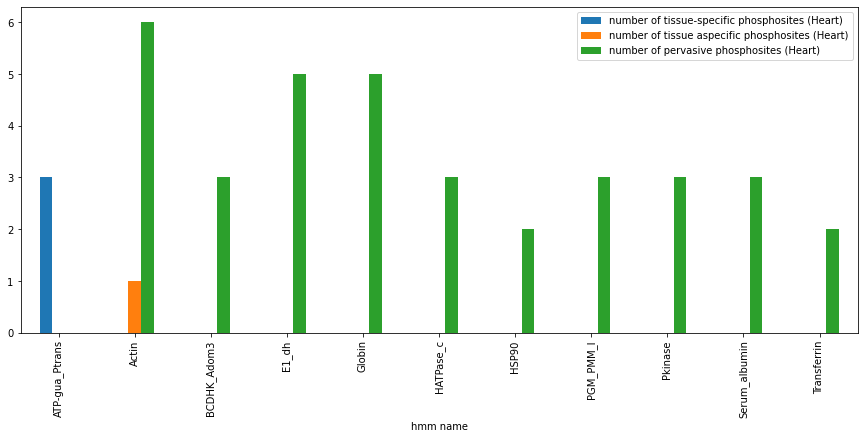

In [180]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Heart"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Heart)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Heart"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Heart)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Heart"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Heart)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Heart)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Heart)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Heart)"]>1))].plot(kind="bar", figsize=(15,6))

## HeLa

<AxesSubplot:xlabel='clan'>

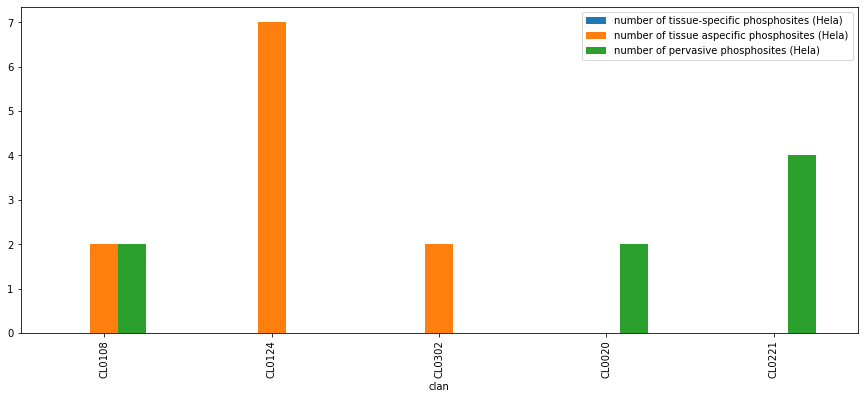

In [181]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Hela"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Hela)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Hela"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Hela)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Hela"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Hela)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Hela)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Hela)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Hela)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

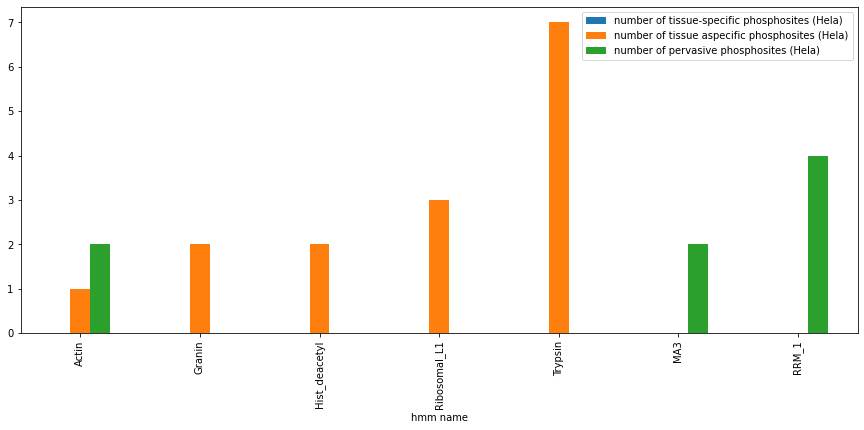

In [182]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Hela"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Hela)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Hela"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Hela)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Hela"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Hela)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Hela)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Hela)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Hela)"]>1))].plot(kind="bar", figsize=(15,6))

## Kidney

<AxesSubplot:xlabel='clan'>

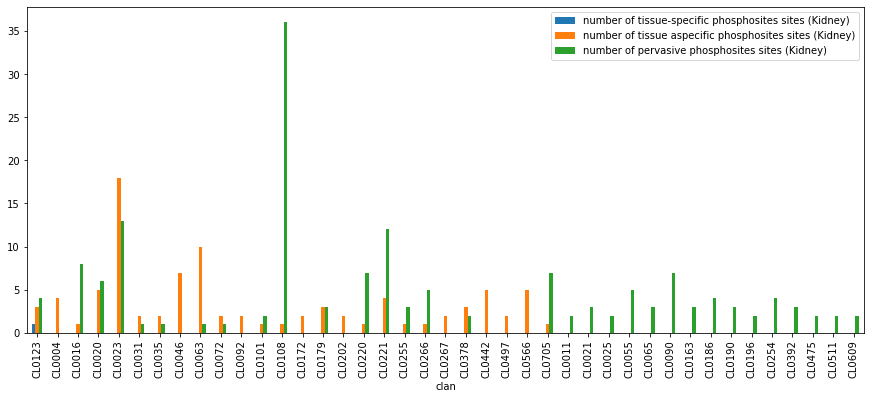

In [183]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites sites (Kidney)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites sites (Kidney)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites sites (Kidney)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites sites (Kidney)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites sites (Kidney)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites sites (Kidney)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

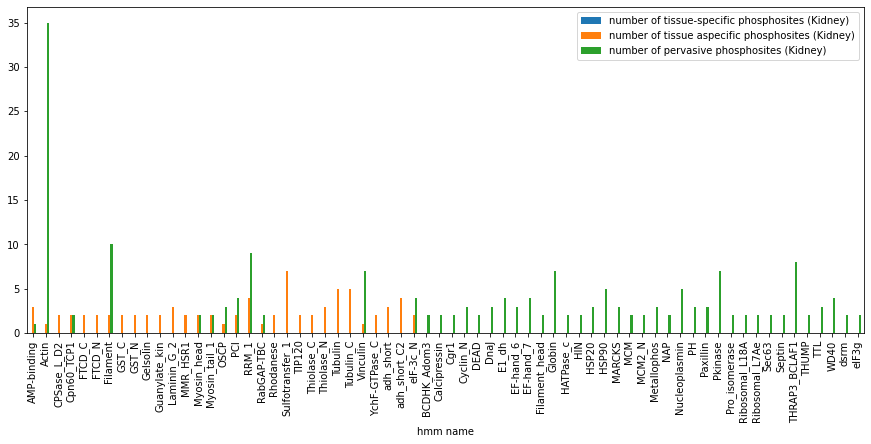

In [184]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Kidney)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Kidney)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Kidney)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Kidney)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Kidney)"]>1))].plot(kind="bar", figsize=(15,6))

## Liver

<AxesSubplot:xlabel='clan'>

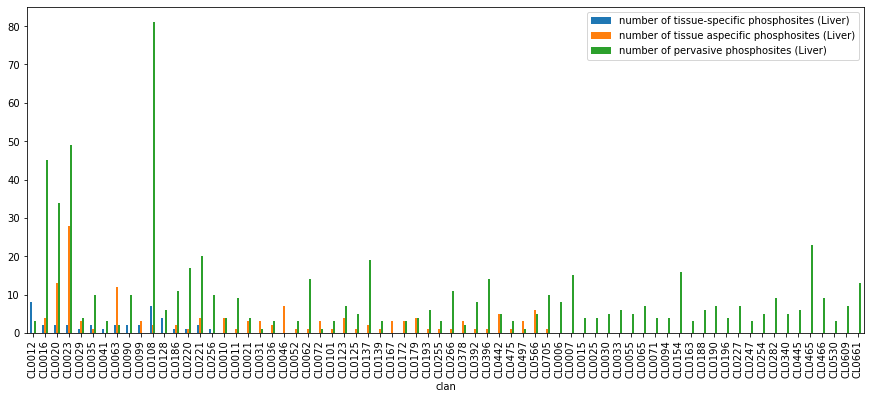

In [185]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Liver)"]>2)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Liver)"]>2)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Liver)"]>2))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

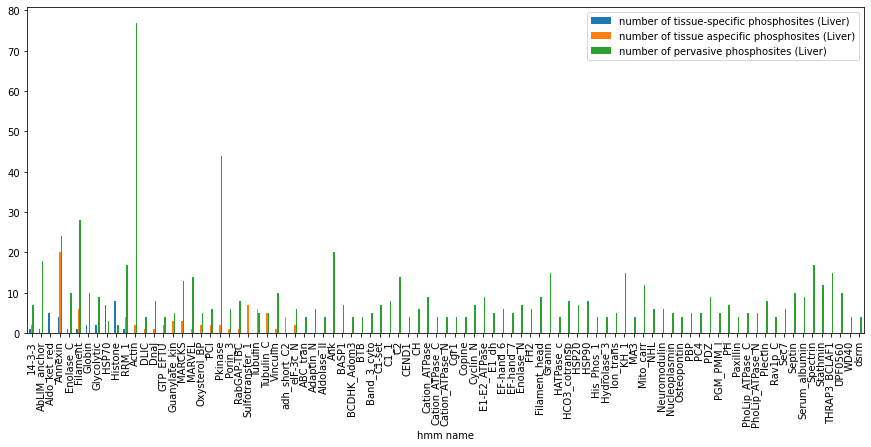

In [186]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Liver)"]>3)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Liver)"]>3)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Liver)"]>3))].plot(kind="bar", figsize=(15,6))

## Lung

<AxesSubplot:xlabel='clan'>

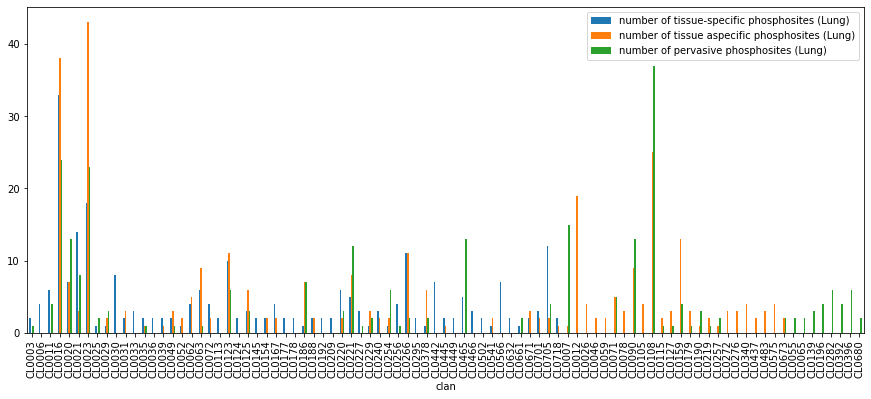

In [187]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Lung)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Lung)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Lung)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

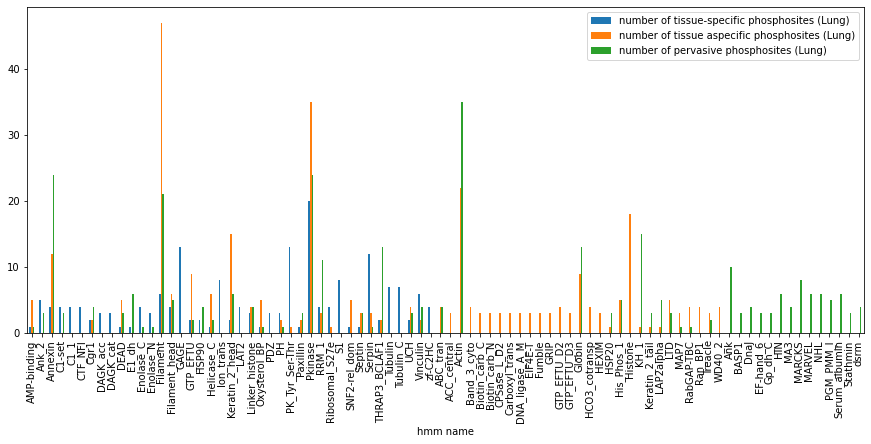

In [188]:
df_hmm_name_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_name_all_tissue = pd.concat([df_hmm_name_tspec_tissue, df_hmm_name_taspec_tissue, df_hmm_name_gen_tissue], axis=1)
df_hmm_name_all_tissue[((df_hmm_name_all_tissue["number of tissue-specific phosphosites (Lung)"]>2)|
                 (df_hmm_name_all_tissue["number of tissue aspecific phosphosites (Lung)"]>2)|
                 (df_hmm_name_all_tissue["number of pervasive phosphosites (Lung)"]>2))].plot(kind="bar", figsize=(15,6))

## Lymph node

<AxesSubplot:xlabel='clan'>

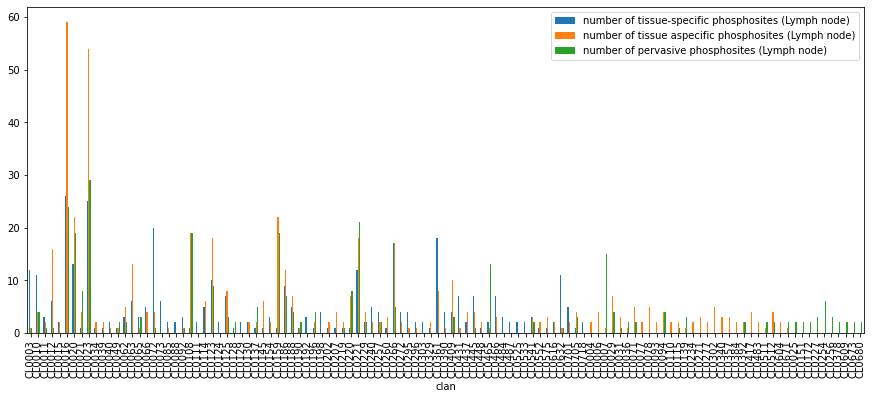

In [189]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Lymph node)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Lymph node)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Lymph node)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

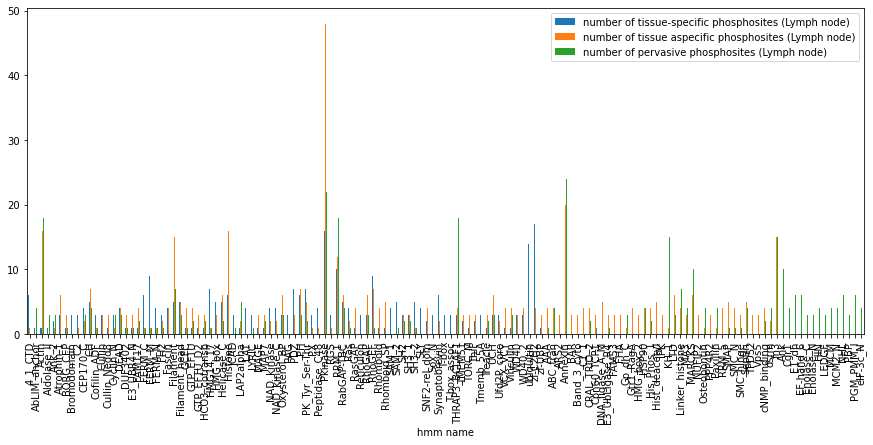

In [190]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Lymph node)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Lymph node)"]>2)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Lymph node)"]>2))].plot(kind="bar", figsize=(15,6))

## Menstrual fluid

In [191]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Menstrual fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Menstrual fluid)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Menstrual fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Menstrual fluid)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Menstrual fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Menstrual fluid)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

number of tissue-specific phosphosites (Menstrual fluid)  \
clan                                                                
CL0011                                                 1.0          
CL0029                                                 NaN          
CL0090                                                 NaN          
CL0128                                                 NaN          
No_clan                                                NaN          

         number of tissue aspecific phosphosites (Menstrual fluid)  \
clan                                                                 
CL0011                                                 NaN           
CL0029                                                 NaN           
CL0090                                                 NaN           
CL0128                                                 NaN           
No_clan                                                NaN           

         number of pervasive phosphosites (Menstrual fluid)  
clan                                                         
CL0011                                                   1   
CL0029                                                   1   
CL0090                                                   1   
CL0128                                                   1   
No_clan                                                  2

In [192]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Menstrual fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Menstrual fluid)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Menstrual fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Menstrual fluid)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Menstrual fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Menstrual fluid)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue#[((df_hmm_all_tissue["number of tissue-specific phosphosites (Menstrual fluid)"]>1)|
                 #(df_hmm_all_tissue["number of tissue aspecific phosphosites (Menstrual fluid)"]>1)|
                 #(df_hmm_all_tissue["number of pervasively phosphosites (Menstrual fluid)"]>1))].plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphosites (Menstrual fluid)  \
hmm name                                                             
V-set                                                   1.0          
C1-set                                                  NaN          
Globin                                                  NaN          
ITI_HC_C                                                NaN          
Serpin                                                  NaN          
VIT                                                     NaN          
VWA                                                     NaN          

          number of tissue aspecific phosphosites (Menstrual fluid)  \
hmm name                                                              
V-set                                                   NaN           
C1-set                                                  NaN           
Globin                                                  NaN           
ITI_HC_C                                                NaN           
Serpin                                                  NaN           
VIT                                                     NaN           
VWA                                                     NaN           

          number of pervasive phosphosites (Menstrual fluid)  
hmm name                                                      
V-set                                                   NaN   
C1-set                                                  1.0   
Globin                                                  1.0   
ITI_HC_C                                                1.0   
Serpin                                                  1.0   
VIT                                                     1.0   
VWA                                                     1.0

## Monocytes

<AxesSubplot:xlabel='clan'>

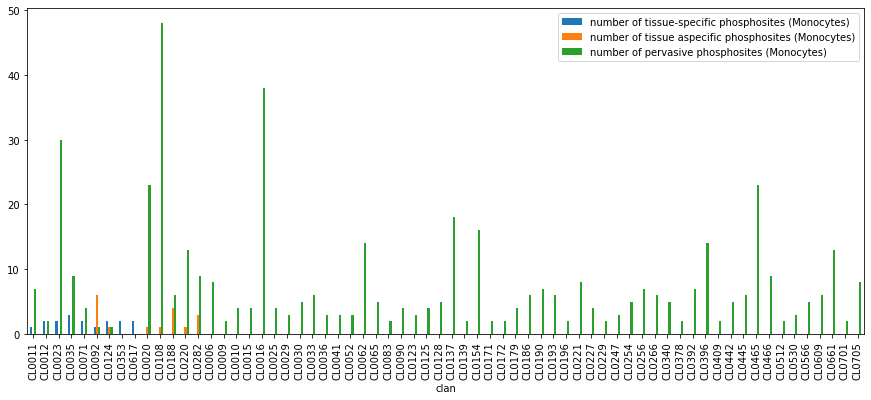

In [193]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Monocytes)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Monocytes)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Monocytes)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Monocytes)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

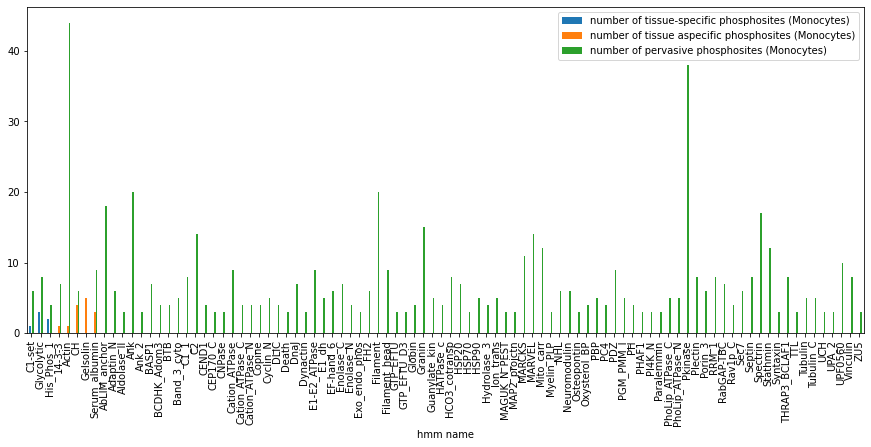

In [194]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Monocytes)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Monocytes)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Monocytes)"]>2)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Monocytes)"]>2))].plot(kind="bar", figsize=(15,6))

## Nasal polyps

<AxesSubplot:xlabel='clan'>

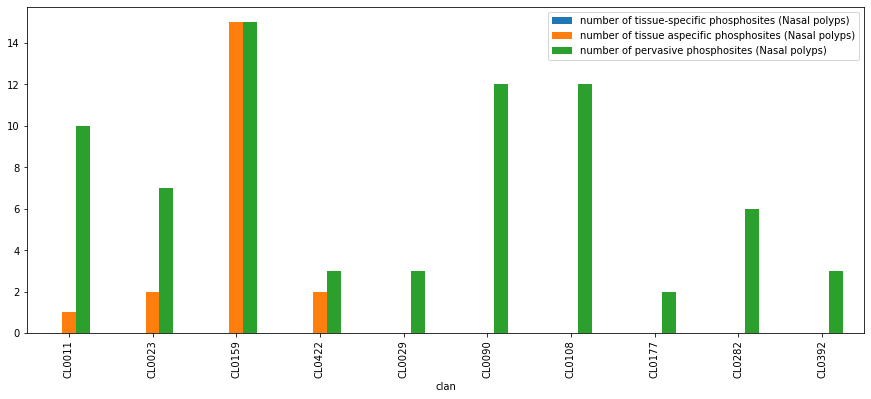

In [195]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Nasal polyps"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Nasal polyps)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Nasal polyps"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Nasal polyps)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Nasal polyps"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Nasal polyps)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Nasal polyps)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Nasal polyps)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Nasal polyps)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

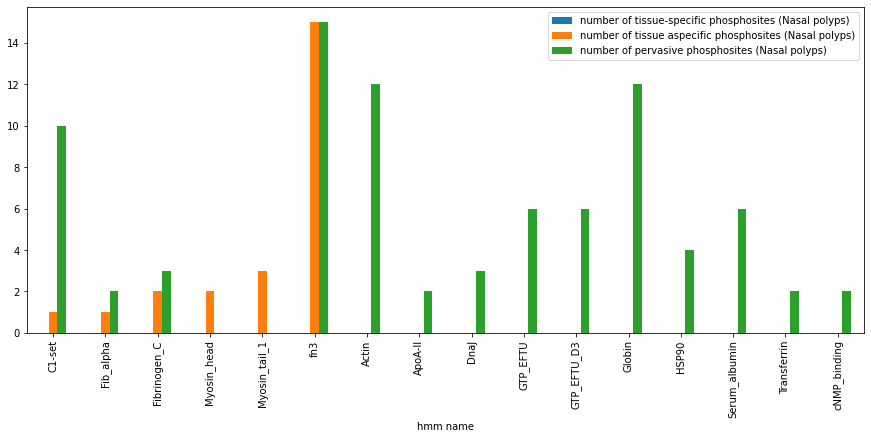

In [196]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Nasal polyps"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Nasal polyps)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Nasal polyps"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Nasal polyps)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Nasal polyps"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Nasal polyps)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Nasal polyps)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Nasal polyps)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Nasal polyps)"]>1))].plot(kind="bar", figsize=(15,6))

## NK-cells

<AxesSubplot:xlabel='clan'>

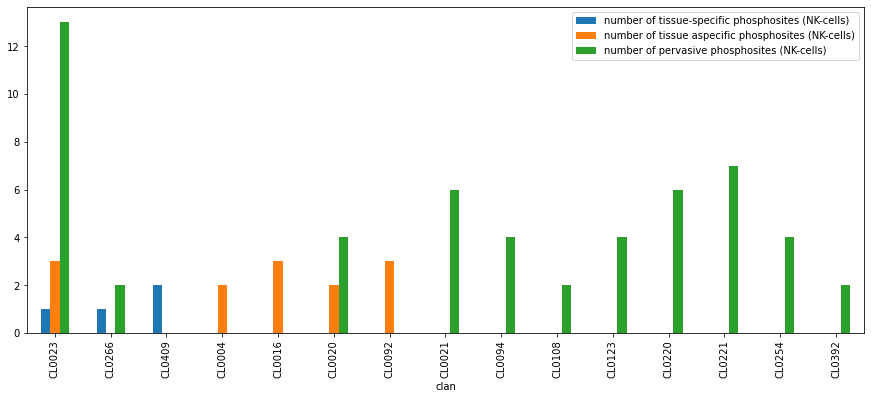

In [197]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["NK-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (NK-cells)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["NK-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (NK-cells)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["NK-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (NK-cells)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (NK-cells)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (NK-cells)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (NK-cells)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

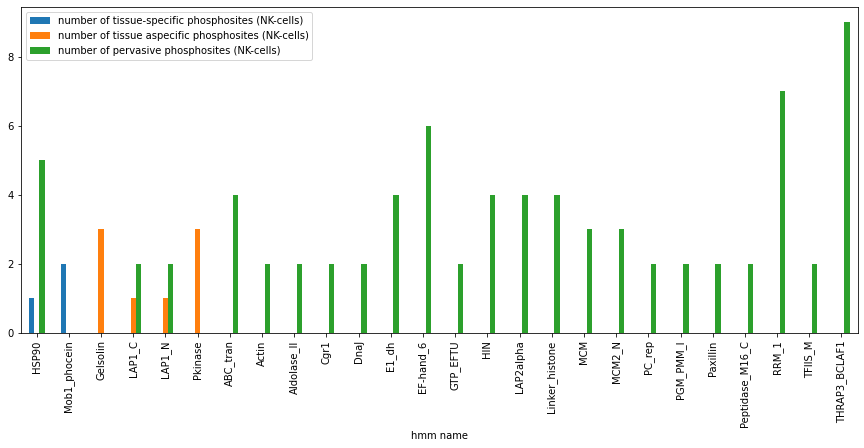

In [198]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["NK-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (NK-cells)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["NK-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (NK-cells)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["NK-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (NK-cells)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (NK-cells)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (NK-cells)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (NK-cells)"]>1))].plot(kind="bar", figsize=(15,6))

## Ovary

<AxesSubplot:xlabel='clan'>

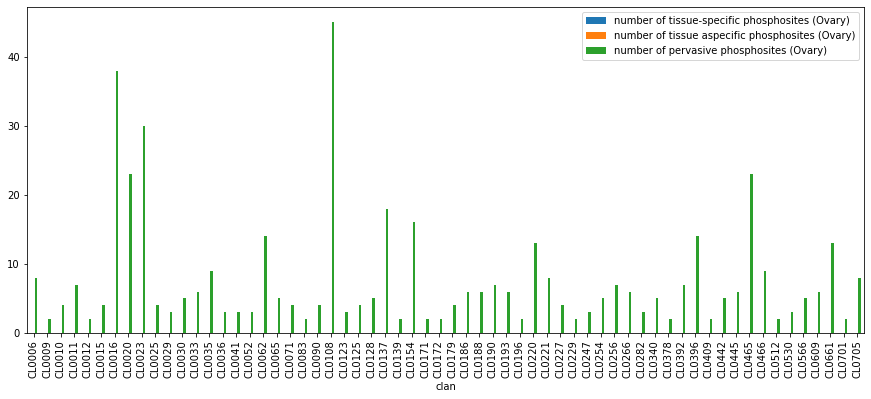

In [199]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Ovary)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Ovary)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Ovary)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Ovary)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Ovary)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

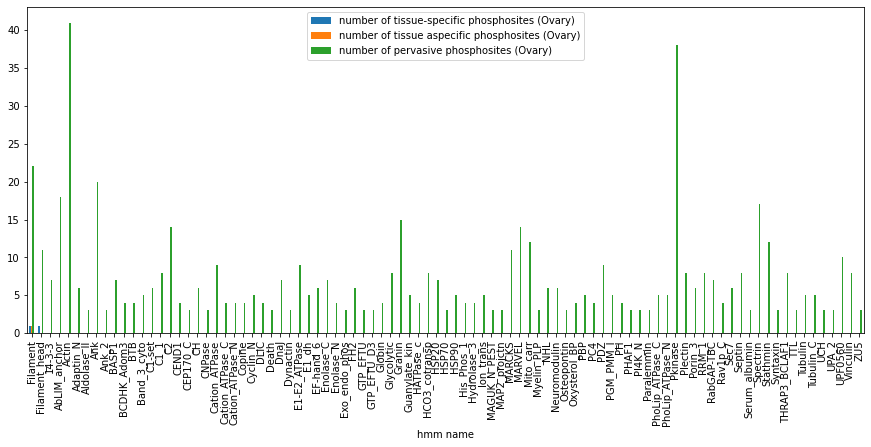

In [200]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Ovary)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Ovary)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Ovary)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Ovary)"]>2)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Ovary)"]>2))].plot(kind="bar", figsize=(15,6))

## Pancreas

<AxesSubplot:xlabel='clan'>

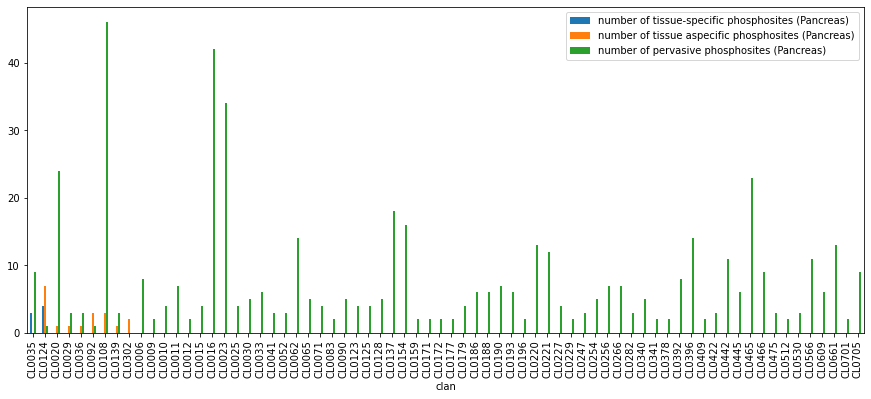

In [201]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Pancreas)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Pancreas)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Pancreas)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Pancreas)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

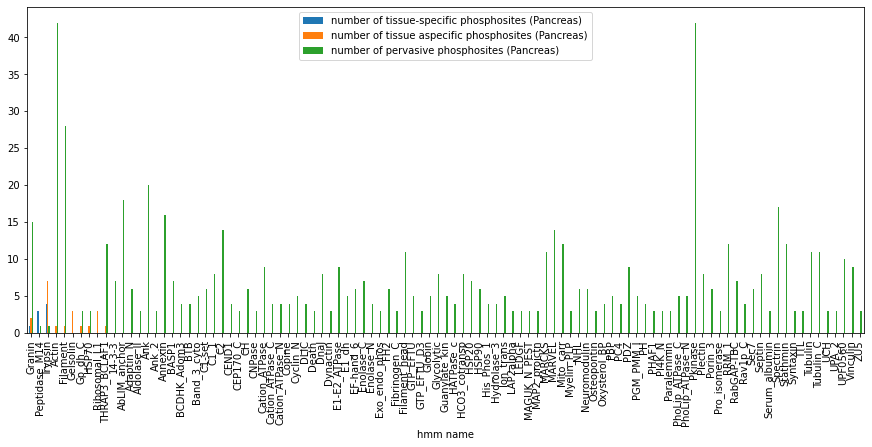

In [202]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Pancreas)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Pancreas)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Pancreas)"]>2)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Pancreas)"]>2))].plot(kind="bar", figsize=(15,6))

## Palatine tonsils

<AxesSubplot:xlabel='clan'>

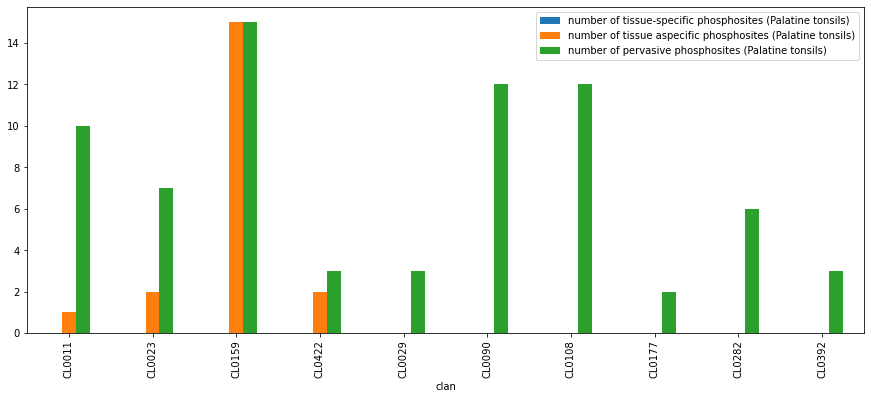

In [203]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Palatine tonsils"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Palatine tonsils)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Palatine tonsils"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Palatine tonsils)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Palatine tonsils"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Palatine tonsils)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Palatine tonsils)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Palatine tonsils)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Palatine tonsils)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

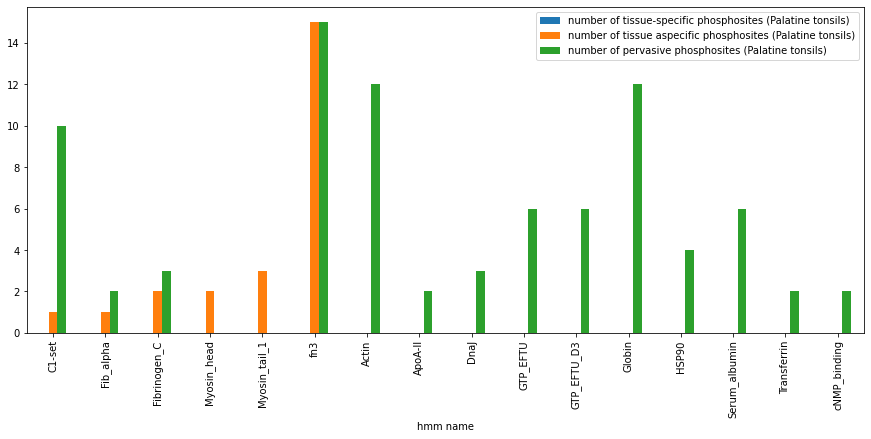

In [204]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Palatine tonsils"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Palatine tonsils)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Palatine tonsils"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Palatine tonsils)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Palatine tonsils"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Palatine tonsils)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Palatine tonsils)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Palatine tonsils)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Palatine tonsils)"]>1))].plot(kind="bar", figsize=(15,6))

## Parotid gland

<AxesSubplot:xlabel='clan'>

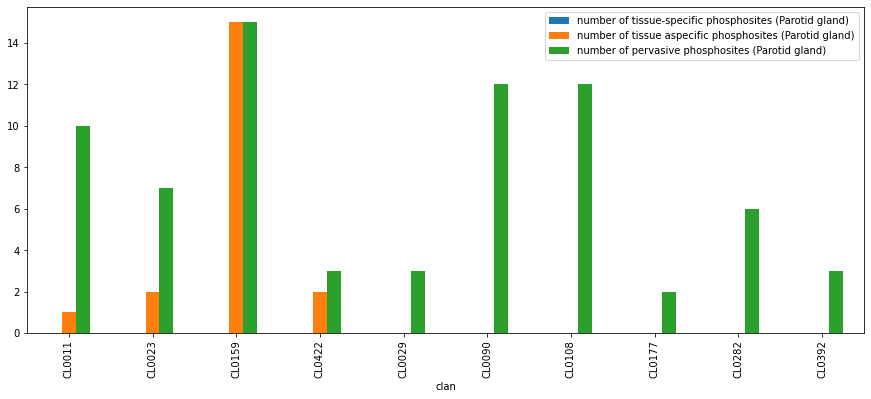

In [205]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Parotid gland"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Parotid gland)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Parotid gland"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Parotid gland)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Parotid gland"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Parotid gland)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Parotid gland)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Parotid gland)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Parotid gland)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

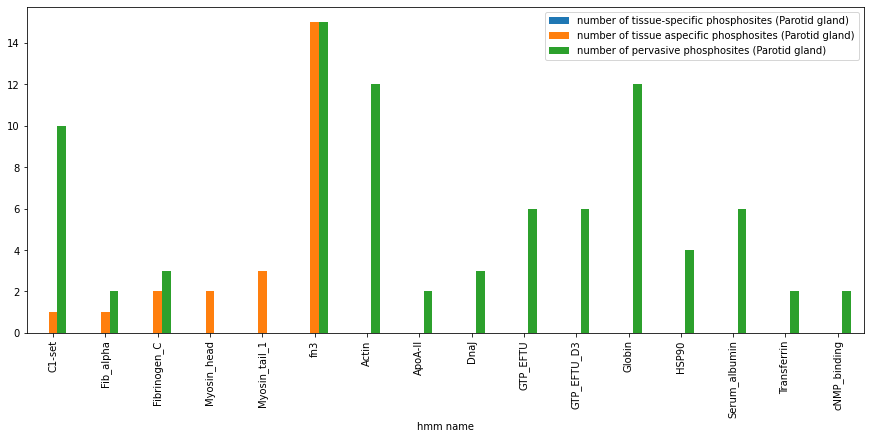

In [206]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Parotid gland"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Parotid gland)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Parotid gland"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Parotid gland)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Parotid gland"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Parotid gland)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Parotid gland)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Parotid gland)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Parotid gland)"]>1))].plot(kind="bar", figsize=(15,6))

## PBMC

<AxesSubplot:xlabel='clan'>

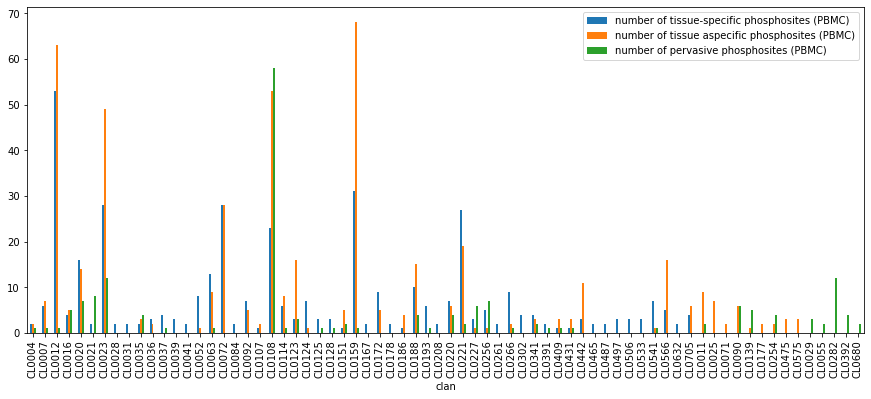

In [207]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (PBMC)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (PBMC)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (PBMC)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

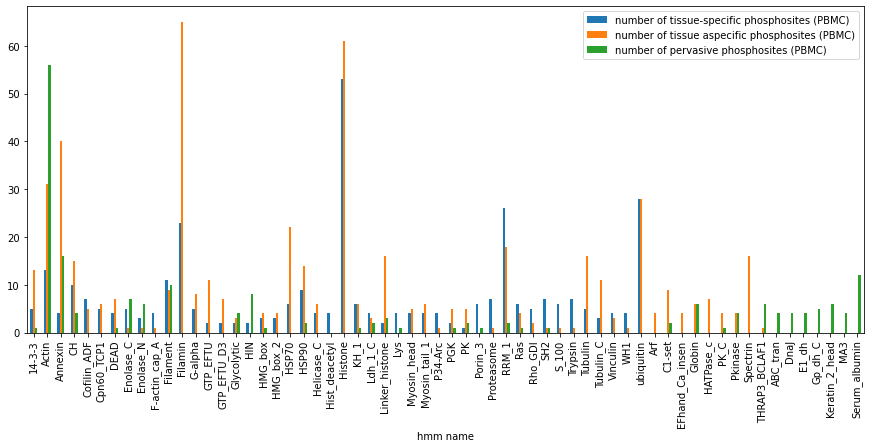

In [208]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (PBMC)"]>3)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (PBMC)"]>3)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (PBMC)"]>3))].plot(kind="bar", figsize=(15,6))

## Peritoneal dialysis fluid

In [209]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

number of tissue-specific phosphosites (Peritoneal dialysis fluid)  \
clan                                                                          
No_clan                                                NaN                    

         number of tissue aspecific phosphosites (Peritoneal dialysis fluid)  \
clan                                                                           
No_clan                                                NaN                     

         number of pervasive phosphosites (Peritoneal dialysis fluid)  
clan                                                                   
No_clan                                                  3

In [210]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Peritoneal dialysis fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Peritoneal dialysis fluid)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

number of tissue-specific phosphosites (Peritoneal dialysis fluid)  \
hmm name                                                                             
Filament                                                      NaN                    
Keratin_2_head                                                NaN                    
Keratin_2_tail                                                NaN                    

                number of tissue aspecific phosphosites (Peritoneal dialysis fluid)  \
hmm name                                                                              
Filament                                                      NaN                     
Keratin_2_head                                                NaN                     
Keratin_2_tail                                                NaN                     

                number of pervasive phosphosites (Peritoneal dialysis fluid)  
hmm name                                                                      
Filament                                                        1             
Keratin_2_head                                                  1             
Keratin_2_tail                                                  1

## Placenta

<AxesSubplot:xlabel='clan'>

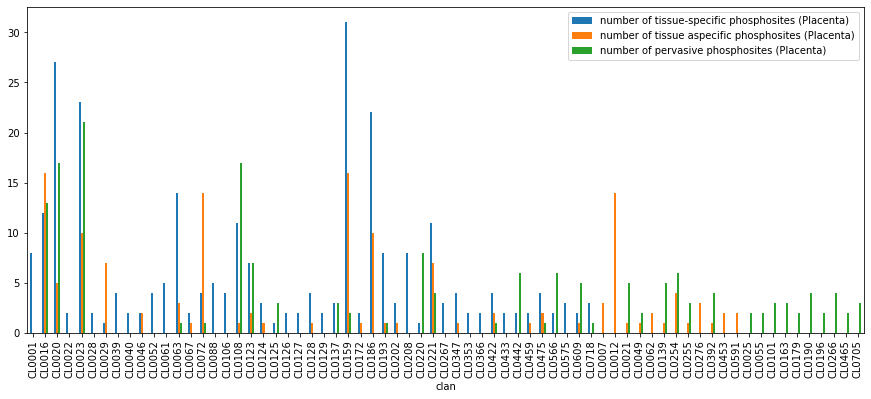

In [211]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Placenta)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Placenta)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Placenta)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

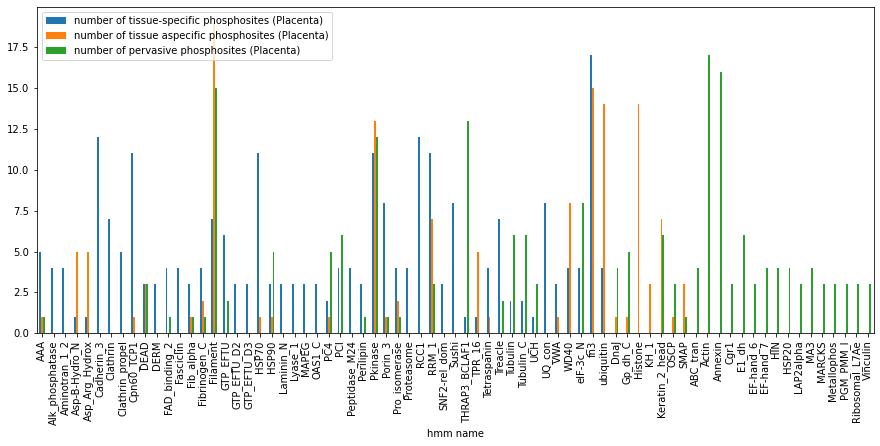

In [212]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Placenta)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Placenta)"]>2)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Placenta)"]>2))].plot(kind="bar", figsize=(15,6))

## Skeletal muscle

<AxesSubplot:xlabel='clan'>

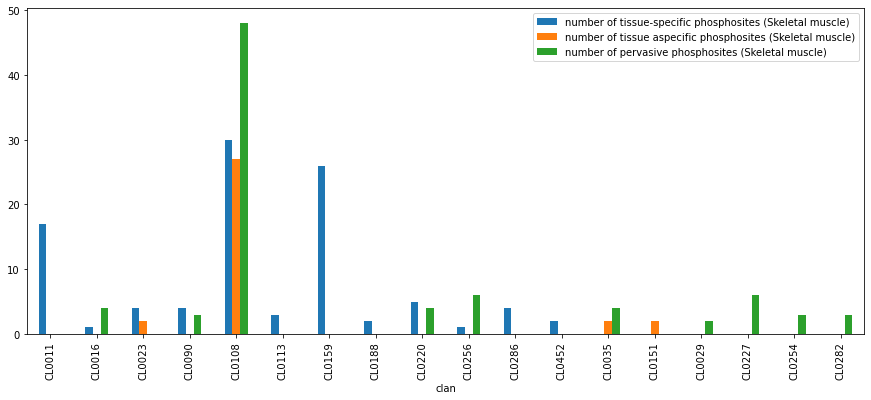

In [213]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Skeletal muscle)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Skeletal muscle)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Skeletal muscle)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

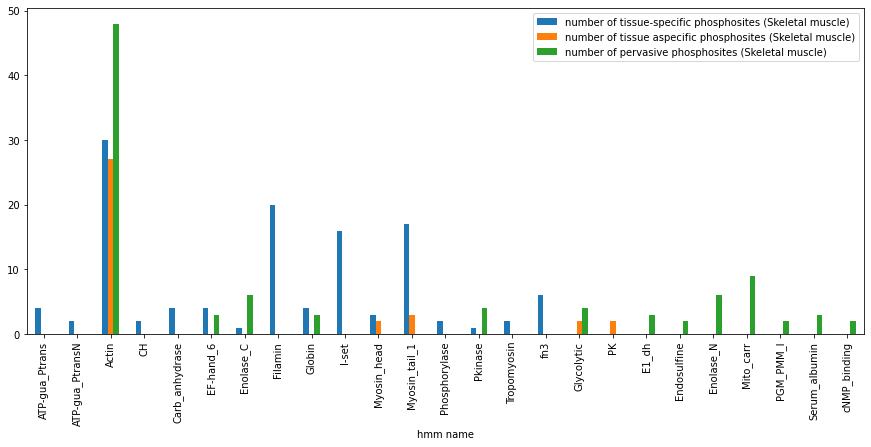

In [214]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Skeletal muscle)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Skeletal muscle)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Skeletal muscle)"]>1))].plot(kind="bar", figsize=(15,6))

## Skin

<AxesSubplot:xlabel='clan'>

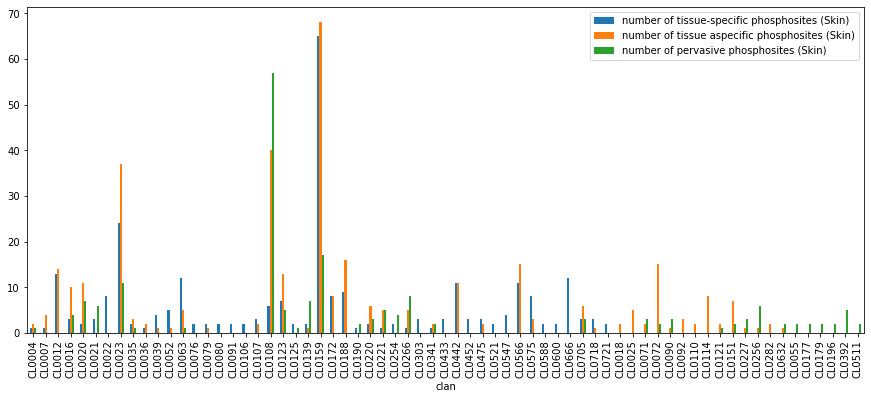

In [215]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Skin)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Skin)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Skin)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

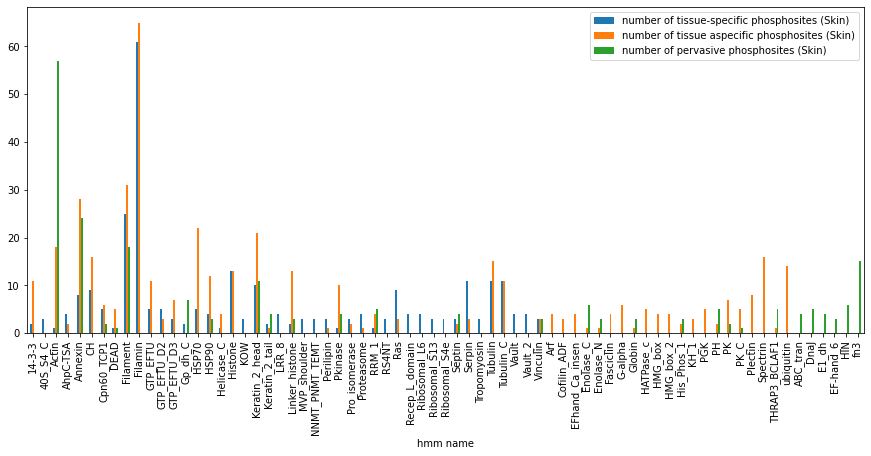

In [216]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Skin)"]>2)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Skin)"]>2)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Skin)"]>2))].plot(kind="bar", figsize=(15,6))

## Small intestine

<AxesSubplot:xlabel='clan'>

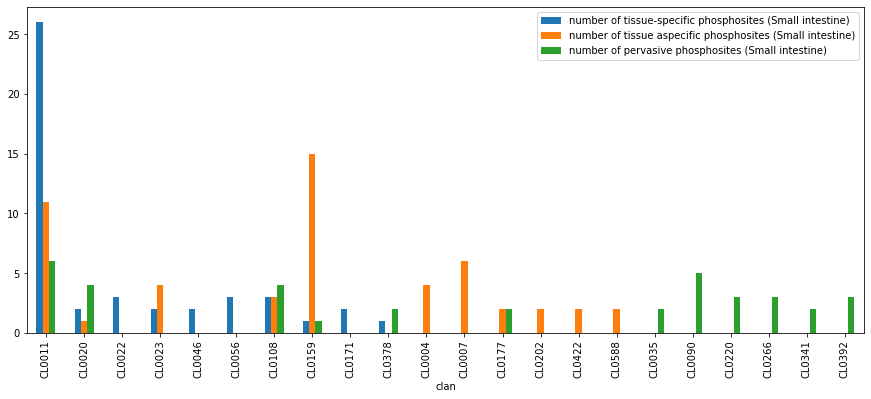

In [217]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Small intestine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Small intestine)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Small intestine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Small intestine)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Small intestine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Small intestine)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Small intestine)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Small intestine)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Small intestine)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

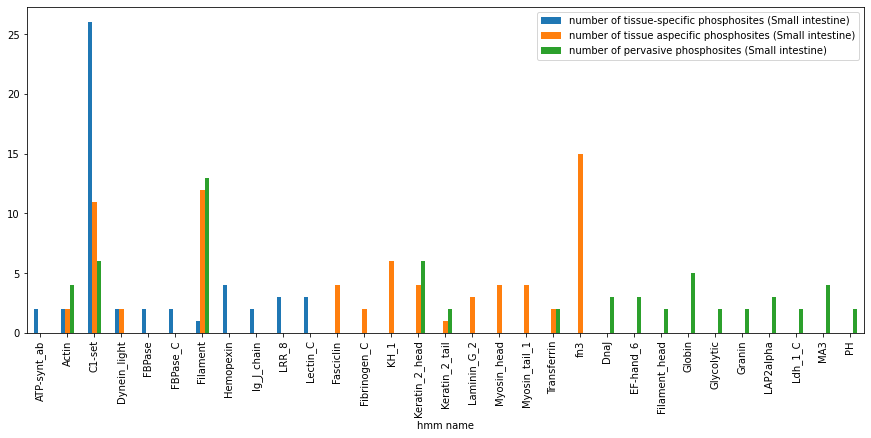

In [218]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Small intestine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Small intestine)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Small intestine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Small intestine)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Small intestine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Small intestine)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Small intestine)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Small intestine)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Small intestine)"]>1))].plot(kind="bar", figsize=(15,6))

## Synovial tissue

In [219]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Synovial tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Synovial tissue)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Synovial tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Synovial tissue)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Synovial tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Synovial tissue)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

number of tissue-specific phosphosites (Synovial tissue)  \
clan                                                                
CL0422                                                 NaN          
CL0029                                                 NaN          
CL0128                                                 NaN          
No_clan                                                NaN          

         number of tissue aspecific phosphosites (Synovial tissue)  \
clan                                                                 
CL0422                                                 1.0           
CL0029                                                 NaN           
CL0128                                                 NaN           
No_clan                                                NaN           

         number of pervasive phosphosites (Synovial tissue)  
clan                                                         
CL0422                                                 NaN   
CL0029                                                 2.0   
CL0128                                                 2.0   
No_clan                                                3.0

In [220]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Synovial tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Synovial tissue)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Synovial tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Synovial tissue)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Synovial tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Synovial tissue)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

number of tissue-specific phosphosites (Synovial tissue)  \
hmm name                                                                 
Fibrinogen_C                                                NaN          
ITI_HC_C                                                    NaN          
Serpin                                                      NaN          
VIT                                                         NaN          
VWA                                                         NaN          

              number of tissue aspecific phosphosites (Synovial tissue)  \
hmm name                                                                  
Fibrinogen_C                                                1.0           
ITI_HC_C                                                    NaN           
Serpin                                                      NaN           
VIT                                                         NaN           
VWA                                                         NaN           

              number of pervasive phosphosites (Synovial tissue)  
hmm name                                                          
Fibrinogen_C                                                NaN   
ITI_HC_C                                                    2.0   
Serpin                                                      1.0   
VIT                                                         2.0   
VWA                                                         2.0

## T-cells

In [221]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["T-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (T-cells)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["T-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (T-cells)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["T-cells"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (T-cells)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphosites (T-cells)"]>1)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphosites (T-cells)"]>1)|
                 #(df_clan_all_tissue["number of pervasively phosphosites (T-cells)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphosites (T-cells)  \
clan                                                       
CL0035                                               NaN   
CL0705                                               NaN   

        number of tissue aspecific phosphosites (T-cells)  \
clan                                                        
CL0035                                                1.0   
CL0705                                                NaN   

        number of pervasive phosphosites (T-cells)  
clan                                                
CL0035                                         NaN  
CL0705                                         2.0

<AxesSubplot:xlabel='hmm name'>

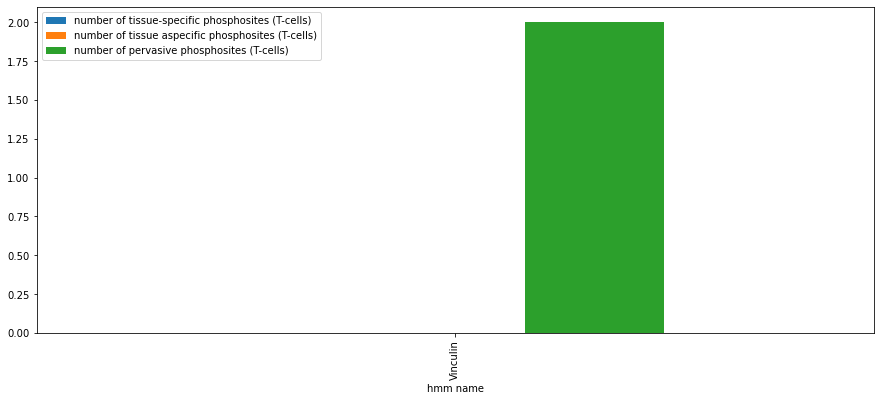

In [222]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["T-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (T-cells)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["T-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (T-cells)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["T-cells"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (T-cells)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (T-cells)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (T-cells)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (T-cells)"]>1))].plot(kind="bar", figsize=(15,6))

## Testis

<AxesSubplot:xlabel='clan'>

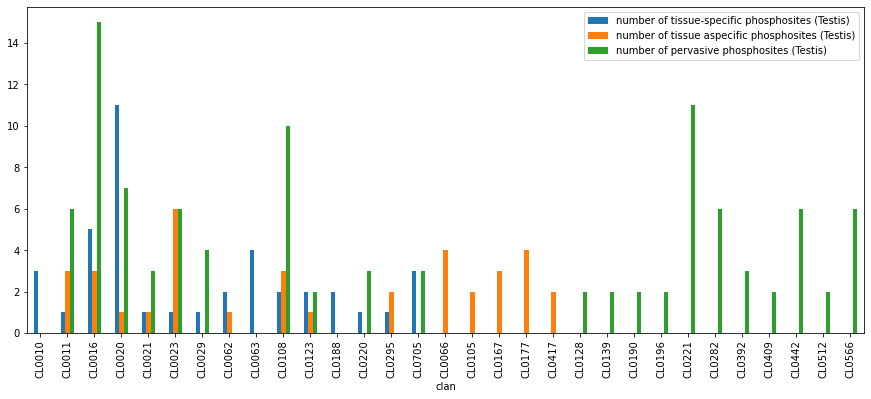

In [223]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Testis)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Testis)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Testis)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Testis)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Testis)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

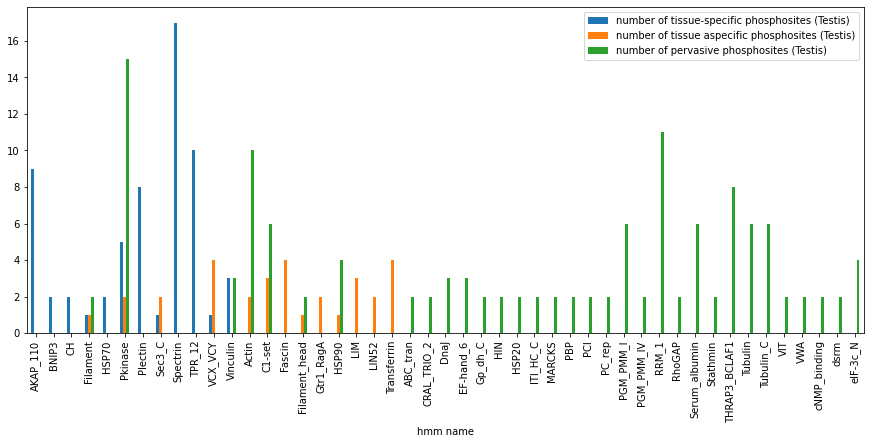

In [224]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Testis)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Testis)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Testis)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Testis)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Testis)"]>1))].plot(kind="bar", figsize=(15,6))

## Tooth

In [225]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Tooth"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Tooth)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Tooth"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Tooth)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Tooth"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Tooth)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue

Empty DataFrame
Columns: [number of tissue-specific phosphosites (Tooth), number of tissue aspecific phosphosites (Tooth), number of pervasive phosphosites (Tooth)]
Index: []

In [226]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Tooth"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Tooth)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Tooth"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Tooth)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Tooth"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Tooth)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

Empty DataFrame
Columns: [number of tissue-specific phosphosites (Tooth), number of tissue aspecific phosphosites (Tooth), number of pervasive phosphosites (Tooth)]
Index: []

## Umbilical cord

<AxesSubplot:xlabel='clan'>

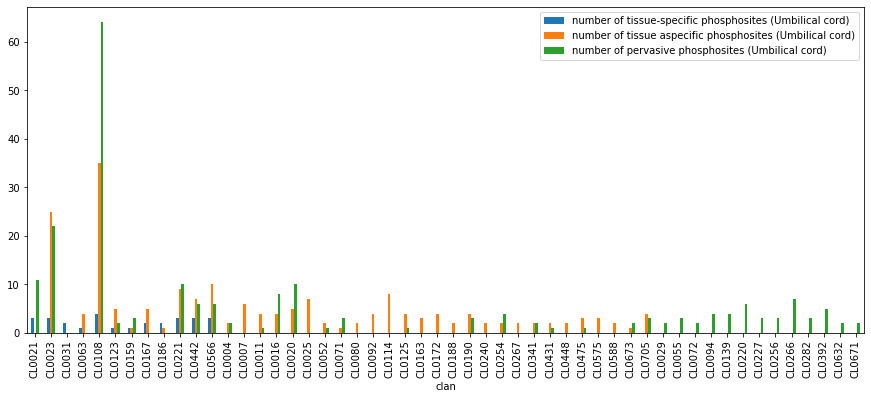

In [227]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Umbilical cord)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Umbilical cord)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Umbilical cord)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

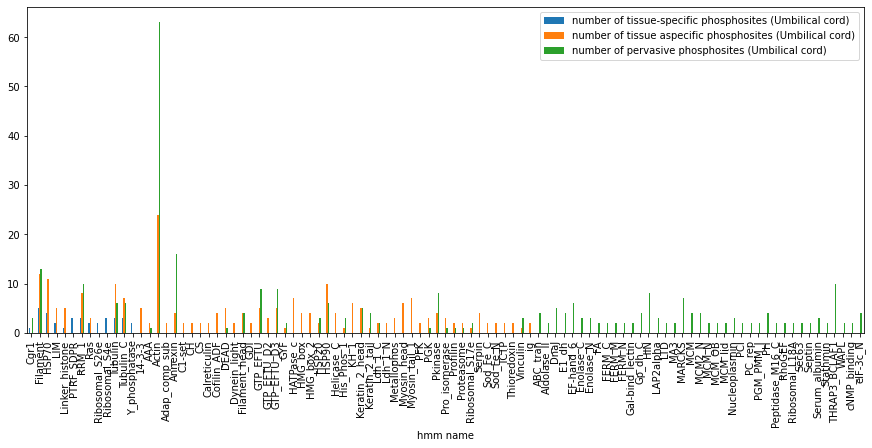

In [228]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Umbilical cord)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Umbilical cord)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Umbilical cord)"]>1))].plot(kind="bar", figsize=(15,6))

## Ureter

In [229]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Ureter"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Ureter)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Ureter"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Ureter)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Ureter"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Ureter)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue#[((df_clan_all_tissue["number of tissue-specific phosphosites (Ureter)"]>1)|
                 #(df_clan_all_tissue["number of tissue aspecific phosphosites (Ureter)"]>1)|
                 #(df_clan_all_tissue["number of pervasively phosphosites (Ureter)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

number of tissue-specific phosphosites (Ureter)  \
clan                                                       
CL0092                                               1.0   
CL0190                                               1.0   
No_clan                                              1.0   
CL0179                                               NaN   
CL0506                                               NaN   
CL0023                                               NaN   
CL0090                                               NaN   
CL0159                                               NaN   

         number of tissue aspecific phosphosites (Ureter)  \
clan                                                        
CL0092                                                NaN   
CL0190                                                NaN   
No_clan                                               3.0   
CL0179                                                1.0   
CL0506                                                1.0   
CL0023                                                NaN   
CL0090                                                NaN   
CL0159                                                NaN   

         number of pervasive phosphosites (Ureter)  
clan                                                
CL0092                                         NaN  
CL0190                                         2.0  
No_clan                                        4.0  
CL0179                                         NaN  
CL0506                                         NaN  
CL0023                                         1.0  
CL0090                                         1.0  
CL0159                                         1.0

In [230]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Ureter"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Ureter)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Ureter"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Ureter)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Ureter"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Ureter)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue

number of tissue-specific phosphosites (Ureter)  \
hmm name                                                         
Gelsolin                                                   1.0   
HSP20                                                      1.0   
VHP                                                        1.0   
ATP-grasp_2                                                NaN   
Filament                                                   NaN   
Filament_head                                              NaN   
GAGE                                                       NaN   
Ligase_CoA                                                 NaN   
Globin                                                     NaN   
LTD                                                        NaN   
PTRF_SDPR                                                  NaN   
Septin                                                     NaN   

               number of tissue aspecific phosphosites (Ureter)  \
hmm name                                                          
Gelsolin                                                    NaN   
HSP20                                                       NaN   
VHP                                                         NaN   
ATP-grasp_2                                                 1.0   
Filament                                                    1.0   
Filament_head                                               1.0   
GAGE                                                        1.0   
Ligase_CoA                                                  1.0   
Globin                                                      NaN   
LTD                                                         NaN   
PTRF_SDPR                                                   NaN   
Septin                                                      NaN   

               number of pervasive phosphosites (Ureter)  
hmm name                                                  
Gelsolin                                             NaN  
HSP20                                                2.0  
VHP                                                  NaN  
ATP-grasp_2                                          NaN  
Filament                                             2.0  
Filament_head                                        1.0  
GAGE                                                 NaN  
Ligase_CoA                                           NaN  
Globin                                               1.0  
LTD                                                  1.0  
PTRF_SDPR                                            1.0  
Septin                                               1.0

## Urinary bladder

<AxesSubplot:xlabel='clan'>

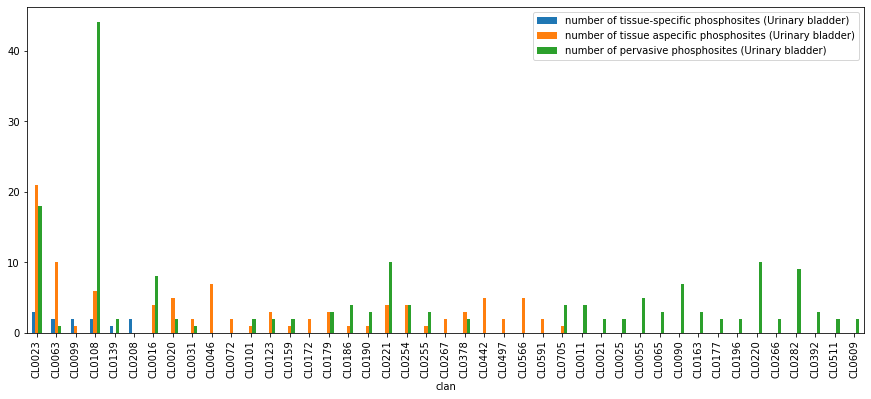

In [231]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Urinary bladder)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Urinary bladder)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Urinary bladder)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

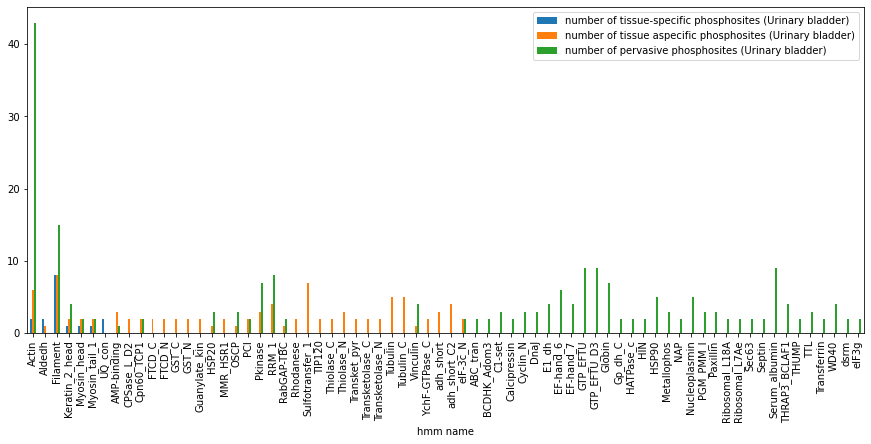

In [232]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Urinary bladder)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Urinary bladder)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Urinary bladder)"]>1))].plot(kind="bar", figsize=(15,6))

## Urine

<AxesSubplot:xlabel='clan'>

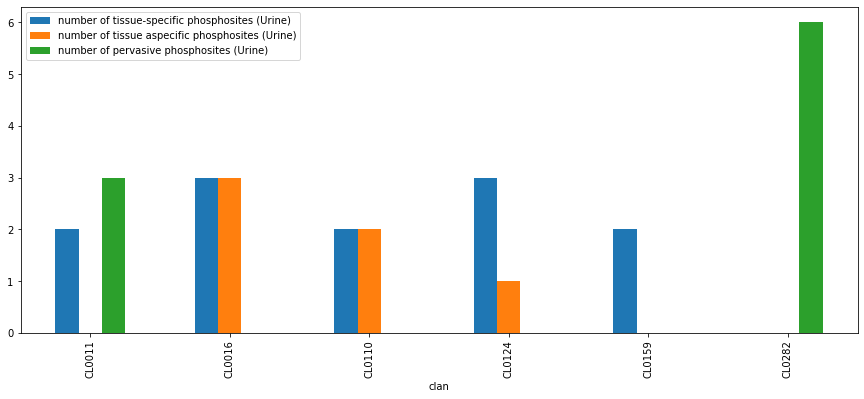

In [233]:
df_clan_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Urine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Urine)"}, inplace=True, axis=1)
df_clan_tspec_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Urine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Urine)"}, inplace=True, axis=1)
df_clan_taspec_tissue.set_index(["clan"], inplace=True)
df_clan_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Urine"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Urine)"}, inplace=True, axis=1)
df_clan_gen_tissue.set_index(["clan"], inplace=True)
df_clan_all_tissue = pd.concat([df_clan_tspec_tissue, df_clan_taspec_tissue, df_clan_gen_tissue], axis=1)
df_clan_all_tissue[((df_clan_all_tissue["number of tissue-specific phosphosites (Urine)"]>1)|
                 (df_clan_all_tissue["number of tissue aspecific phosphosites (Urine)"]>1)|
                 (df_clan_all_tissue["number of pervasive phosphosites (Urine)"]>1))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6))

<AxesSubplot:xlabel='hmm name'>

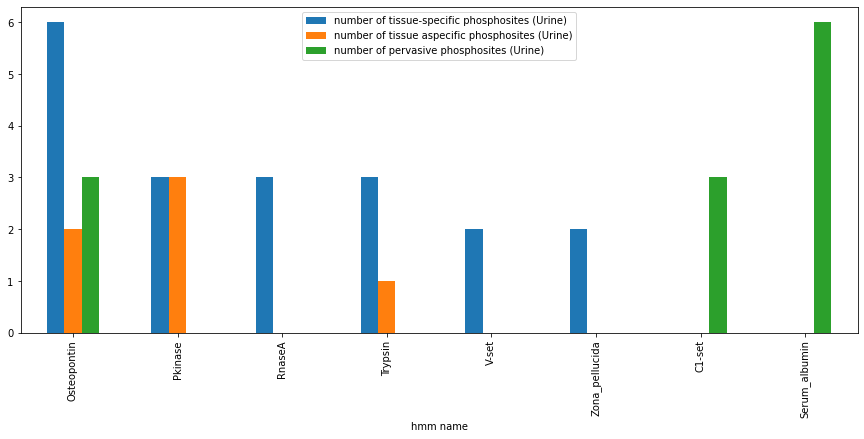

In [234]:
df_hmm_tspec_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Urine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_tspec_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Urine)"}, inplace=True, axis=1)
df_hmm_tspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_taspec_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Urine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_taspec_tissue.rename({"ACC_ID": "number of tissue aspecific phosphosites (Urine)"}, inplace=True, axis=1)
df_hmm_taspec_tissue.set_index(["hmm name"], inplace=True)
df_hmm_gen_tissue = gen_sites_pfam.loc[gen_sites_pfam["Urine"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_gen_tissue.rename({"ACC_ID": "number of pervasive phosphosites (Urine)"}, inplace=True, axis=1)
df_hmm_gen_tissue.set_index(["hmm name"], inplace=True)
df_hmm_all_tissue = pd.concat([df_hmm_tspec_tissue, df_hmm_taspec_tissue, df_hmm_gen_tissue], axis=1)
df_hmm_all_tissue[((df_hmm_all_tissue["number of tissue-specific phosphosites (Urine)"]>1)|
                 (df_hmm_all_tissue["number of tissue aspecific phosphosites (Urine)"]>1)|
                 (df_hmm_all_tissue["number of pervasive phosphosites (Urine)"]>1))].plot(kind="bar", figsize=(15,6))

# 7. Comparison across tissues

## 7.1 Clans

In [235]:
df_clan_tspec_Adipose_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_clan_tspec_Adipose_tissue["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :]["ACC_ID"].count()
df_clan_tspec_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_clan_tspec_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_clan_tspec_Adipose_tissue["Total"]
df_clan_tspec_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_clan_tspec_Adipose_tissue.set_index(["clan"], inplace=True)
df_clan_tspec_Blood = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_tspec_Blood["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :]["ACC_ID"].count()
df_clan_tspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_clan_tspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_clan_tspec_Blood["Total"]
df_clan_tspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_clan_tspec_Blood.set_index(["clan"], inplace=True)
df_clan_tspec_Brain = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_clan_tspec_Brain["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :]["ACC_ID"].count()
df_clan_tspec_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_clan_tspec_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_clan_tspec_Brain["Total"]
df_clan_tspec_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_clan_tspec_Brain.set_index(["clan"], inplace=True)
df_clan_tspec_Cerebrospinal_fluid = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_tspec_Cerebrospinal_fluid["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].count()
df_clan_tspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_clan_tspec_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_clan_tspec_Cerebrospinal_fluid["Total"]
df_clan_tspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_tspec_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
df_clan_tspec_Colon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_tspec_Colon["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :]["ACC_ID"].count()
df_clan_tspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_clan_tspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_clan_tspec_Colon["Total"]
df_clan_tspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_clan_tspec_Colon.set_index(["clan"], inplace=True)
df_clan_tspec_Kidney = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_clan_tspec_Kidney["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :]["ACC_ID"].count()
df_clan_tspec_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_clan_tspec_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_clan_tspec_Kidney["Total"]
df_clan_tspec_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_clan_tspec_Kidney.set_index(["clan"], inplace=True)
df_clan_tspec_Liver = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_tspec_Liver["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :]["ACC_ID"].count()
df_clan_tspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_clan_tspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_clan_tspec_Liver["Total"]
df_clan_tspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_clan_tspec_Liver.set_index(["clan"], inplace=True)
df_clan_tspec_Lung = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_tspec_Lung["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :]["ACC_ID"].count()
df_clan_tspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_clan_tspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_clan_tspec_Lung["Total"]
df_clan_tspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lung.set_index(["clan"], inplace=True)
df_clan_tspec_Lymph_node = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_tspec_Lymph_node["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :]["ACC_ID"].count()
df_clan_tspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_clan_tspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_clan_tspec_Lymph_node["Total"]
df_clan_tspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lymph_node.set_index(["clan"], inplace=True)
df_clan_tspec_Monocytes = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_clan_tspec_Monocytes["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :]["ACC_ID"].count()
df_clan_tspec_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_clan_tspec_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_clan_tspec_Monocytes["Total"]
df_clan_tspec_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_tspec_Monocytes.set_index(["clan"], inplace=True)
df_clan_tspec_Ovary = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_clan_tspec_Ovary["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :]["ACC_ID"].count()
df_clan_tspec_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_clan_tspec_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_clan_tspec_Ovary["Total"]
df_clan_tspec_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_clan_tspec_Ovary.set_index(["clan"], inplace=True)
df_clan_tspec_Pancreas = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_clan_tspec_Pancreas["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :]["ACC_ID"].count()
df_clan_tspec_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_clan_tspec_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_clan_tspec_Pancreas["Total"]
df_clan_tspec_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_tspec_Pancreas.set_index(["clan"], inplace=True)
df_clan_tspec_PBMC = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_tspec_PBMC["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :]["ACC_ID"].count()
df_clan_tspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_clan_tspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_clan_tspec_PBMC["Total"]
df_clan_tspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_clan_tspec_PBMC.set_index(["clan"], inplace=True)
df_clan_tspec_Placenta = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_tspec_Placenta["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :]["ACC_ID"].count()
df_clan_tspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_tspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_tspec_Placenta["Total"]
df_clan_tspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_tspec_Placenta.set_index(["clan"], inplace=True)
df_clan_tspec_Skeletal_muscle = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_tspec_Skeletal_muscle["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :]["ACC_ID"].count()
df_clan_tspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_clan_tspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_clan_tspec_Skeletal_muscle["Total"]
df_clan_tspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_tspec_Skeletal_muscle.set_index(["clan"], inplace=True)
df_clan_tspec_Skin = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_tspec_Skin["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :]["ACC_ID"].count()
df_clan_tspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_clan_tspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_clan_tspec_Skin["Total"]
df_clan_tspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_clan_tspec_Skin.set_index(["clan"], inplace=True)
df_clan_tspec_Testis = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_clan_tspec_Testis["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :]["ACC_ID"].count()
df_clan_tspec_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_clan_tspec_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_clan_tspec_Testis["Total"]
df_clan_tspec_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_clan_tspec_Testis.set_index(["clan"], inplace=True)
df_clan_tspec_Umbilical_cord = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_clan_tspec_Umbilical_cord["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :]["ACC_ID"].count()
df_clan_tspec_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_clan_tspec_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_clan_tspec_Umbilical_cord["Total"]
df_clan_tspec_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_clan_tspec_Umbilical_cord.set_index(["clan"], inplace=True)
df_clan_tspec_Urinary_bladder = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_clan_tspec_Urinary_bladder["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :]["ACC_ID"].count()
df_clan_tspec_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_clan_tspec_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_clan_tspec_Urinary_bladder["Total"]
df_clan_tspec_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_clan_tspec_Urinary_bladder.set_index(["clan"], inplace=True)

In [236]:
df_clan_tspec_all = pd.concat([df_clan_tspec_Adipose_tissue, df_clan_tspec_Blood, df_clan_tspec_Brain,
                               df_clan_tspec_Cerebrospinal_fluid, df_clan_tspec_Colon, df_clan_tspec_Kidney,
                               df_clan_tspec_Liver, df_clan_tspec_Lung, df_clan_tspec_Lymph_node, df_clan_tspec_Monocytes,
                               df_clan_tspec_Ovary, df_clan_tspec_Pancreas, df_clan_tspec_PBMC, df_clan_tspec_Placenta,
                               df_clan_tspec_Skeletal_muscle, df_clan_tspec_Skin, df_clan_tspec_Testis,
                              df_clan_tspec_Umbilical_cord, df_clan_tspec_Urinary_bladder], axis=1)
df_clan_tspec_all.dropna(axis=1, how="all", inplace=True)
df_clan_tspec_all

ratio of tissue-specific phosphosites (Blood)  \
clan                                                    
CL0001                                       0.178891   
CL0003                                       0.357782   
CL0004                                       0.536673   
CL0005                                       0.178891   
CL0006                                       0.357782   
...                                               ...   
CL0721                                            NaN   
CL0325                                            NaN   
CL0479                                            NaN   
CL0523                                            NaN   
CL0622                                            NaN   

        ratio of tissue-specific phosphosites (Brain)  \
clan                                                    
CL0001                                            NaN   
CL0003                                            NaN   
CL0004                                            NaN   
CL0005                                            NaN   
CL0006                                            NaN   
...                                               ...   
CL0721                                            NaN   
CL0325                                            NaN   
CL0479                                            NaN   
CL0523                                            NaN   
CL0622                                            NaN   

        ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
clan                                                                  
CL0001                                                NaN             
CL0003                                                NaN             
CL0004                                                NaN             
CL0005                                                NaN             
CL0006                                                NaN             
...                                                   ...             
CL0721                                                NaN             
CL0325                                                NaN             
CL0479                                                NaN             
CL0523                                                NaN             
CL0622                                                NaN             

        ratio of tissue-specific phosphosites (Colon)  \
clan                                                    
CL0001                                            NaN   
CL0003                                       0.061728   
CL0004                                       0.308642   
CL0005                                       0.061728   
CL0006                                       0.123457   
...                                               ...   
CL0721                                            NaN   
CL0325                                            NaN   
CL0479                                            NaN   
CL0523                                            NaN   
CL0622                                            NaN   

        ratio of tissue-specific phosphosites (Kidney)  \
clan                                                     
CL0001                                             NaN   
CL0003                                             NaN   
CL0004                                             NaN   
CL0005                                             NaN   
CL0006                                             NaN   
...                                                ...   
CL0721                                             NaN   
CL0325                                             NaN   
CL0479                                             NaN   
CL0523                                             NaN   
CL0622                                             NaN   

        ratio of tissue-specific phosphosites (Liver)  \
clan                                          

- CL0035: Peptidase clan MH/MC/MF
- CL0124: Peptidase clan PA
- CL0221: RRM clan
- CL0071: Histidine phosphatase superfamily

<AxesSubplot:xlabel='clan'>

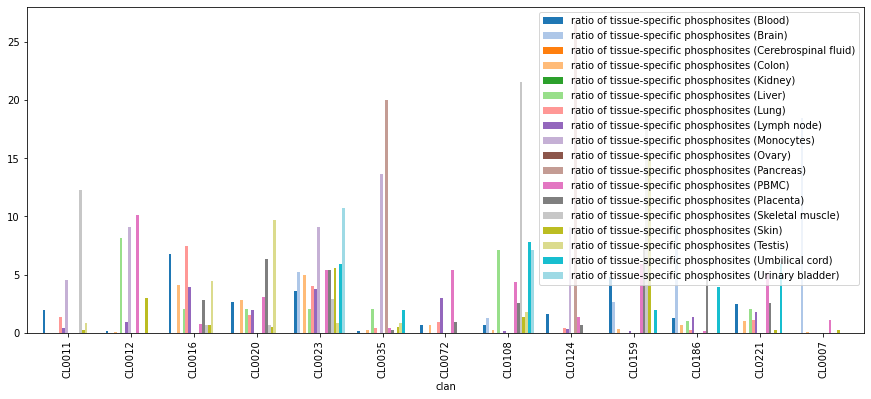

In [237]:
df_clan_tspec_all[(df_clan_tspec_all["ratio of tissue-specific phosphosites (Blood)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Blood)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Blood)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Brain)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Brain)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Brain)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Colon)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Colon)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Colon)"].std()))|
                  #(df_clan_tspec_all["ratio of tissue-specific phosphosites (Kidney)"]>0.33)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Liver)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Liver)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Liver)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Lung)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Lung)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Lung)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Lymph node)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Lymph node)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Lymph node)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Monocytes)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Monocytes)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Monocytes)"].std()))|
                 #(df_clan_tspec_all["ratio of tissue-specific phosphosites (Ovary)"]>2)|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Pancreas)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Pancreas)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Pancreas)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (PBMC)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (PBMC)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (PBMC)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Placenta)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Placenta)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Placenta)"].std()))|
                  (df_clan_tspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Skin)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Skin)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Skin)"].std()))|
                  (df_clan_tspec_all["ratio of tissue-specific phosphosites (Testis)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Testis)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Testis)"].std()))|
                  (df_clan_tspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

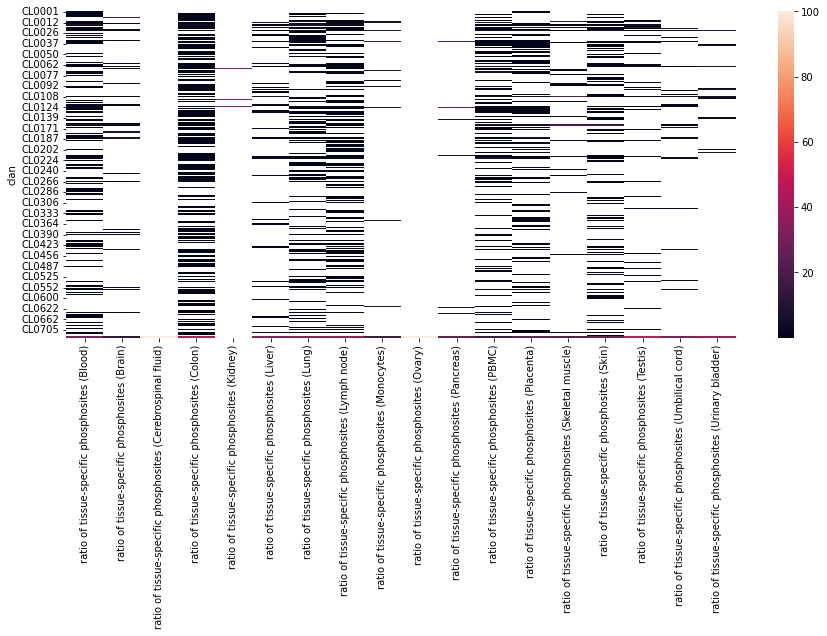

In [238]:
df_clan_tspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_tspec_all)
plt.show()

In [239]:
df_clan_taspec_Adipose_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_clan_taspec_Adipose_tissue["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :]["ACC_ID"].count()
df_clan_taspec_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_clan_taspec_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_clan_taspec_Adipose_tissue["Total"]
df_clan_taspec_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_clan_taspec_Adipose_tissue.set_index(["clan"], inplace=True)
df_clan_taspec_Blood = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_taspec_Blood["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :]["ACC_ID"].count()
df_clan_taspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_clan_taspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_clan_taspec_Blood["Total"]
df_clan_taspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_clan_taspec_Blood.set_index(["clan"], inplace=True)
df_clan_taspec_Brain = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_clan_taspec_Brain["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :]["ACC_ID"].count()
df_clan_taspec_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_clan_taspec_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_clan_taspec_Brain["Total"]
df_clan_taspec_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_clan_taspec_Brain.set_index(["clan"], inplace=True)
df_clan_taspec_Cerebrospinal_fluid = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_taspec_Cerebrospinal_fluid["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].count()
df_clan_taspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_clan_taspec_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_clan_taspec_Cerebrospinal_fluid["Total"]
df_clan_taspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_taspec_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
df_clan_taspec_Colon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_taspec_Colon["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :]["ACC_ID"].count()
df_clan_taspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_clan_taspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_clan_taspec_Colon["Total"]
df_clan_taspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_clan_taspec_Colon.set_index(["clan"], inplace=True)
df_clan_taspec_Kidney = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_clan_taspec_Kidney["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :]["ACC_ID"].count()
df_clan_taspec_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_clan_taspec_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_clan_taspec_Kidney["Total"]
df_clan_taspec_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_clan_taspec_Kidney.set_index(["clan"], inplace=True)
df_clan_taspec_Liver = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_taspec_Liver["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :]["ACC_ID"].count()
df_clan_taspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_clan_taspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_clan_taspec_Liver["Total"]
df_clan_taspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_clan_taspec_Liver.set_index(["clan"], inplace=True)
df_clan_taspec_Lung = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_taspec_Lung["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :]["ACC_ID"].count()
df_clan_taspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_clan_taspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_clan_taspec_Lung["Total"]
df_clan_taspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lung.set_index(["clan"], inplace=True)
df_clan_taspec_Lymph_node = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_taspec_Lymph_node["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :]["ACC_ID"].count()
df_clan_taspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_clan_taspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_clan_taspec_Lymph_node["Total"]
df_clan_taspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lymph_node.set_index(["clan"], inplace=True)
df_clan_taspec_Monocytes = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_clan_taspec_Monocytes["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :]["ACC_ID"].count()
df_clan_taspec_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_clan_taspec_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_clan_taspec_Monocytes["Total"]
df_clan_taspec_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_taspec_Monocytes.set_index(["clan"], inplace=True)
df_clan_taspec_Ovary = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_clan_taspec_Ovary["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :]["ACC_ID"].count()
df_clan_taspec_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_clan_taspec_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_clan_taspec_Ovary["Total"]
df_clan_taspec_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_clan_taspec_Ovary.set_index(["clan"], inplace=True)
df_clan_taspec_Pancreas = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_clan_taspec_Pancreas["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :]["ACC_ID"].count()
df_clan_taspec_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_clan_taspec_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_clan_taspec_Pancreas["Total"]
df_clan_taspec_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_taspec_Pancreas.set_index(["clan"], inplace=True)
df_clan_taspec_PBMC = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_taspec_PBMC["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :]["ACC_ID"].count()
df_clan_taspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_clan_taspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_clan_taspec_PBMC["Total"]
df_clan_taspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_clan_taspec_PBMC.set_index(["clan"], inplace=True)
df_clan_taspec_Placenta = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_taspec_Placenta["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :]["ACC_ID"].count()
df_clan_taspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_taspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_taspec_Placenta["Total"]
df_clan_taspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_taspec_Placenta.set_index(["clan"], inplace=True)
df_clan_taspec_Skeletal_muscle = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_taspec_Skeletal_muscle["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :]["ACC_ID"].count()
df_clan_taspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_clan_taspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_clan_taspec_Skeletal_muscle["Total"]
df_clan_taspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_taspec_Skeletal_muscle.set_index(["clan"], inplace=True)
df_clan_taspec_Skin = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_taspec_Skin["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :]["ACC_ID"].count()
df_clan_taspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_clan_taspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_clan_taspec_Skin["Total"]
df_clan_taspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_clan_taspec_Skin.set_index(["clan"], inplace=True)
df_clan_taspec_Testis = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_clan_taspec_Testis["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :]["ACC_ID"].count()
df_clan_taspec_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_clan_taspec_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_clan_taspec_Testis["Total"]
df_clan_taspec_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_clan_taspec_Testis.set_index(["clan"], inplace=True)
df_clan_taspec_Umbilical_cord = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_clan_taspec_Umbilical_cord["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :]["ACC_ID"].count()
df_clan_taspec_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_clan_taspec_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_clan_taspec_Umbilical_cord["Total"]
df_clan_taspec_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_clan_taspec_Umbilical_cord.set_index(["clan"], inplace=True)
df_clan_taspec_Urinary_bladder = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_clan_taspec_Urinary_bladder["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :]["ACC_ID"].count()
df_clan_taspec_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_clan_taspec_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_clan_taspec_Urinary_bladder["Total"]
df_clan_taspec_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_clan_taspec_Urinary_bladder.set_index(["clan"], inplace=True)

In [240]:
df_clan_taspec_all = pd.concat([df_clan_taspec_Adipose_tissue, df_clan_taspec_Blood, df_clan_taspec_Brain,
                                df_clan_taspec_Cerebrospinal_fluid, df_clan_taspec_Colon,
                                df_clan_taspec_Kidney, df_clan_taspec_Liver, df_clan_taspec_Lung, df_clan_taspec_Lymph_node,
                              df_clan_taspec_Monocytes, df_clan_taspec_Ovary,
                                df_clan_taspec_Pancreas, 
                              df_clan_taspec_PBMC, df_clan_taspec_Placenta, df_clan_taspec_Skeletal_muscle,
                               df_clan_taspec_Skin, df_clan_taspec_Testis,
                               df_clan_taspec_Umbilical_cord, df_clan_taspec_Urinary_bladder], axis=1)
df_clan_taspec_all

ratio of tissue-specific phosphosites (Adipose tissue)  \
clan                                                             
CL0004                                           0.840336        
CL0011                                           3.361345        
CL0020                                           1.680672        
CL0023                                          10.084034        
CL0025                                           2.521008        
...                                                   ...        
CL0492                                                NaN        
CL0347                                                NaN        
CL0351                                                NaN        
CL0318                                                NaN        
CL0652                                                NaN        

        ratio of tissue-specific phosphosites (Blood)  \
clan                                                    
CL0004                                       0.119760   
CL0011                                       0.359281   
CL0020                                       1.556886   
CL0023                                       5.628743   
CL0025                                            NaN   
...                                               ...   
CL0492                                            NaN   
CL0347                                            NaN   
CL0351                                            NaN   
CL0318                                            NaN   
CL0652                                            NaN   

        ratio of tissue-specific phosphosites (Brain)  \
clan                                                    
CL0004                                            NaN   
CL0011                                       7.526882   
CL0020                                            NaN   
CL0023                                            NaN   
CL0025                                            NaN   
...                                               ...   
CL0492                                            NaN   
CL0347                                            NaN   
CL0351                                            NaN   
CL0318                                            NaN   
CL0652                                            NaN   

        ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
clan                                                                  
CL0004                                                NaN             
CL0011                                               12.5             
CL0020                                                NaN             
CL0023                                                NaN             
CL0025                                                NaN             
...                                                   ...             
CL0492                                                NaN             
CL0347                                                NaN             
CL0351                                                NaN             
CL0318                                                NaN             
CL0652                                                NaN             

        ratio of tissue-specific phosphosites (Colon)  \
clan                                                    
CL0004                                       0.075988   
CL0011                                            NaN   
CL0020                                       2.659574   
CL0023                                       6.838906   
CL0025                                            NaN   
...                                               ...   
CL0492                                            NaN   
CL0347                                            NaN   
CL0351                                            NaN   
CL0318                                            NaN   
CL0652                                            NaN   


<AxesSubplot:xlabel='clan'>

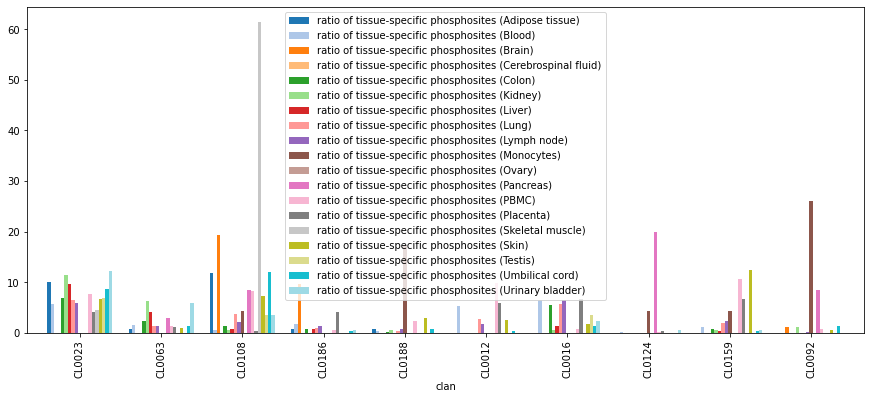

In [241]:
df_clan_taspec_all[(df_clan_taspec_all["ratio of tissue-specific phosphosites (Blood)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Blood)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Blood)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Brain)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Brain)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Brain)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Colon)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Colon)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Colon)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Kidney)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Kidney)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Kidney)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Liver)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Liver)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Liver)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Lung)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Lung)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Lung)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Lymph node)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Lymph node)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Lymph node)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Monocytes)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Monocytes)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Monocytes)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Ovary)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Ovary)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Ovary)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Pancreas)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Pancreas)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Pancreas)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (PBMC)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (PBMC)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (PBMC)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Placenta)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Placenta)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Placenta)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Skin)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Skin)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Skin)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Testis)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Testis)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Testis)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Umbilical cord)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Urinary bladder)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

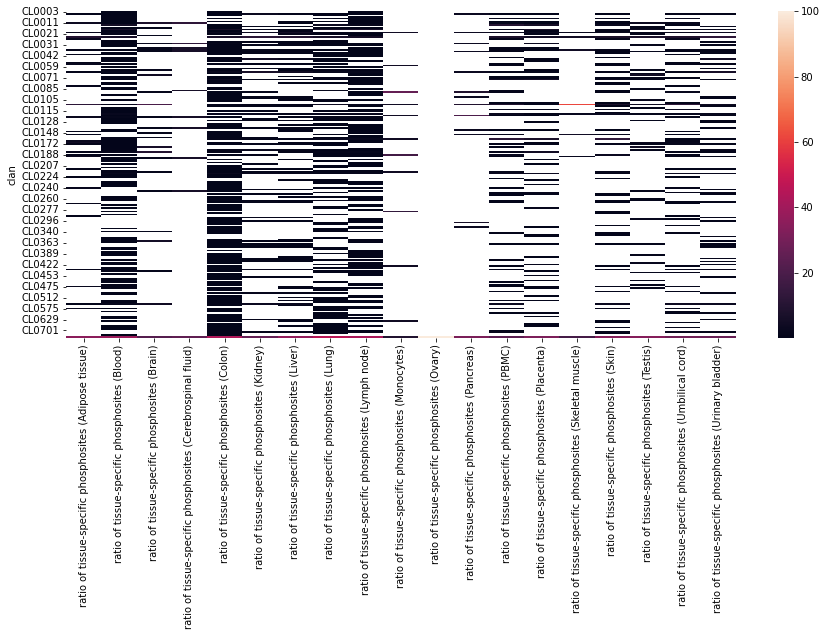

In [242]:
df_clan_taspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_taspec_all)
plt.show()

In [243]:
df_clan_gen_Adipose_tissue = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_clan_gen_Adipose_tissue["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :]["ACC_ID"].count()
df_clan_gen_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_clan_gen_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_clan_gen_Adipose_tissue["Total"]
df_clan_gen_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_clan_gen_Adipose_tissue.set_index(["clan"], inplace=True)
df_clan_gen_Blood = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_gen_Blood["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :]["ACC_ID"].count()
df_clan_gen_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_clan_gen_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_clan_gen_Blood["Total"]
df_clan_gen_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_clan_gen_Blood.set_index(["clan"], inplace=True)
df_clan_gen_Brain = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_clan_gen_Brain["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :]["ACC_ID"].count()
df_clan_gen_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_clan_gen_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_clan_gen_Brain["Total"]
df_clan_gen_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_clan_gen_Brain.set_index(["clan"], inplace=True)
df_clan_gen_Cerebrospinal_fluid = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_clan_gen_Cerebrospinal_fluid["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].count()
df_clan_gen_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_clan_gen_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_clan_gen_Cerebrospinal_fluid["Total"]
df_clan_gen_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_clan_gen_Cerebrospinal_fluid.set_index(["clan"], inplace=True)
df_clan_gen_Colon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_gen_Colon["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :]["ACC_ID"].count()
df_clan_gen_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_clan_gen_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_clan_gen_Colon["Total"]
df_clan_gen_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_clan_gen_Colon.set_index(["clan"], inplace=True)
df_clan_gen_Kidney = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_clan_gen_Kidney["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :]["ACC_ID"].count()
df_clan_gen_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_clan_gen_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_clan_gen_Kidney["Total"]
df_clan_gen_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_clan_gen_Kidney.set_index(["clan"], inplace=True)
df_clan_gen_Liver = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_gen_Liver["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :]["ACC_ID"].count()
df_clan_gen_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_clan_gen_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_clan_gen_Liver["Total"]
df_clan_gen_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_clan_gen_Liver.set_index(["clan"], inplace=True)
df_clan_gen_Lung = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_gen_Lung["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :]["ACC_ID"].count()
df_clan_gen_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_clan_gen_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_clan_gen_Lung["Total"]
df_clan_gen_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_clan_gen_Lung.set_index(["clan"], inplace=True)
df_clan_gen_Lymph_node = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_gen_Lymph_node["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :]["ACC_ID"].count()
df_clan_gen_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_clan_gen_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_clan_gen_Lymph_node["Total"]
df_clan_gen_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_gen_Lymph_node.set_index(["clan"], inplace=True)
df_clan_gen_Monocytes = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_clan_gen_Monocytes["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :]["ACC_ID"].count()
df_clan_gen_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_clan_gen_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_clan_gen_Monocytes["Total"]
df_clan_gen_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_clan_gen_Monocytes.set_index(["clan"], inplace=True)
df_clan_gen_Ovary = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_clan_gen_Ovary["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :]["ACC_ID"].count()
df_clan_gen_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_clan_gen_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_clan_gen_Ovary["Total"]
df_clan_gen_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_clan_gen_Ovary.set_index(["clan"], inplace=True)
df_clan_gen_Pancreas = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_clan_gen_Pancreas["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :]["ACC_ID"].count()
df_clan_gen_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_clan_gen_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_clan_gen_Pancreas["Total"]
df_clan_gen_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_clan_gen_Pancreas.set_index(["clan"], inplace=True)
df_clan_gen_PBMC = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_gen_PBMC["Total"] = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :]["ACC_ID"].count()
df_clan_gen_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_clan_gen_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_clan_gen_PBMC["Total"]
df_clan_gen_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_clan_gen_PBMC.set_index(["clan"], inplace=True)
df_clan_gen_Placenta = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_gen_Placenta["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :]["ACC_ID"].count()
df_clan_gen_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_gen_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_gen_Placenta["Total"]
df_clan_gen_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_gen_Placenta.set_index(["clan"], inplace=True)
df_clan_gen_Skeletal_muscle = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_gen_Skeletal_muscle["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :]["ACC_ID"].count()
df_clan_gen_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_clan_gen_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_clan_gen_Skeletal_muscle["Total"]
df_clan_gen_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_gen_Skeletal_muscle.set_index(["clan"], inplace=True)
df_clan_gen_Skin = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_gen_Skin["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :]["ACC_ID"].count()
df_clan_gen_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_clan_gen_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_clan_gen_Skin["Total"]
df_clan_gen_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_clan_gen_Skin.set_index(["clan"], inplace=True)
df_clan_gen_Testis = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_clan_gen_Testis["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :]["ACC_ID"].count()
df_clan_gen_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_clan_gen_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_clan_gen_Testis["Total"]
df_clan_gen_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_clan_gen_Testis.set_index(["clan"], inplace=True)
df_clan_gen_Umbilical_cord = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_clan_gen_Umbilical_cord["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :]["ACC_ID"].count()
df_clan_gen_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_clan_gen_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_clan_gen_Umbilical_cord["Total"]
df_clan_gen_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_clan_gen_Umbilical_cord.set_index(["clan"], inplace=True)
df_clan_gen_Urinary_bladder = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_clan_gen_Urinary_bladder["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :]["ACC_ID"].count()
df_clan_gen_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_clan_gen_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_clan_gen_Urinary_bladder["Total"]
df_clan_gen_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_clan_gen_Urinary_bladder.set_index(["clan"], inplace=True)

In [244]:
df_clan_gen_all = pd.concat([df_clan_gen_Adipose_tissue, df_clan_gen_Blood, df_clan_gen_Brain,
                                df_clan_gen_Cerebrospinal_fluid, df_clan_gen_Colon,
                                df_clan_gen_Kidney, df_clan_gen_Liver, df_clan_gen_Lung, df_clan_gen_Lymph_node,
                              df_clan_gen_Monocytes, df_clan_gen_Ovary,
                                df_clan_gen_Pancreas, 
                              df_clan_gen_PBMC, df_clan_gen_Placenta, df_clan_gen_Skeletal_muscle,
                               df_clan_gen_Skin, df_clan_gen_Testis,
                               df_clan_gen_Umbilical_cord, df_clan_gen_Urinary_bladder], axis=1)
df_clan_gen_all

ratio of tissue-specific phosphosites (Adipose tissue)  \
clan                                                             
CL0004                                           0.502513        
CL0011                                           0.502513        
CL0016                                           2.512563        
CL0020                                           3.015075        
CL0021                                           3.517588        
...                                                   ...        
CL0129                                                NaN        
CL0163                                                NaN        
CL0382                                                NaN        
CL0718                                                NaN        
CL0391                                                NaN        

        ratio of tissue-specific phosphosites (Blood)  \
clan                                                    
CL0004                                       0.084388   
CL0011                                       1.350211   
CL0016                                       3.966245   
CL0020                                       2.700422   
CL0021                                       1.012658   
...                                               ...   
CL0129                                            NaN   
CL0163                                            NaN   
CL0382                                            NaN   
CL0718                                            NaN   
CL0391                                            NaN   

        ratio of tissue-specific phosphosites (Brain)  \
clan                                                    
CL0004                                       0.108225   
CL0011                                       0.974026   
CL0016                                       4.220779   
CL0020                                       2.597403   
CL0021                                       0.108225   
...                                               ...   
CL0129                                            NaN   
CL0163                                            NaN   
CL0382                                            NaN   
CL0718                                            NaN   
CL0391                                            NaN   

        ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
clan                                                                  
CL0004                                           0.114679             
CL0011                                           0.917431             
CL0016                                           4.357798             
CL0020                                           2.637615             
CL0021                                                NaN             
...                                                   ...             
CL0129                                                NaN             
CL0163                                                NaN             
CL0382                                                NaN             
CL0718                                                NaN             
CL0391                                                NaN             

        ratio of tissue-specific phosphosites (Colon)  \
clan                                                    
CL0004                                            NaN   
CL0011                                       0.303951   
CL0016                                       4.103343   
CL0020                                       3.343465   
CL0021                                       1.519757   
...                                               ...   
CL0129                                       0.151976   
CL0163                                       0.455927   
CL0382                                       0.151976   
CL0718                                       0.151976   
CL0391                                            NaN   


<AxesSubplot:xlabel='clan'>

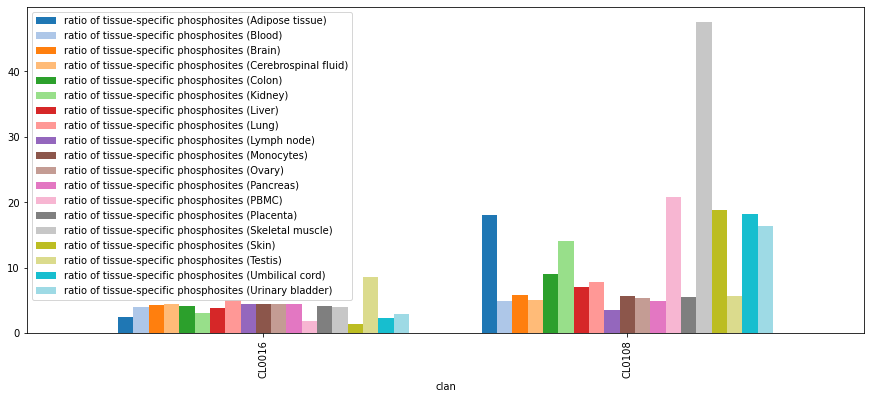

In [245]:
df_clan_gen_all[(df_clan_gen_all["ratio of tissue-specific phosphosites (Blood)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Blood)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Blood)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Brain)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Brain)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Brain)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Colon)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Colon)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Colon)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Kidney)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Kidney)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Kidney)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Liver)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Liver)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Liver)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Lung)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Lung)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Lung)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Lymph node)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Lymph node)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Lymph node)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Monocytes)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Monocytes)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Monocytes)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Ovary)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Ovary)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Ovary)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Pancreas)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Pancreas)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Pancreas)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (PBMC)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (PBMC)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (PBMC)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Placenta)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Placenta)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Placenta)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Skeletal muscle)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Skin)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Skin)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Skin)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Testis)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Testis)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Testis)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Umbilical cord)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Umbilical cord)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Umbilical cord)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Urinary bladder)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Urinary bladder)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Urinary bladder)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

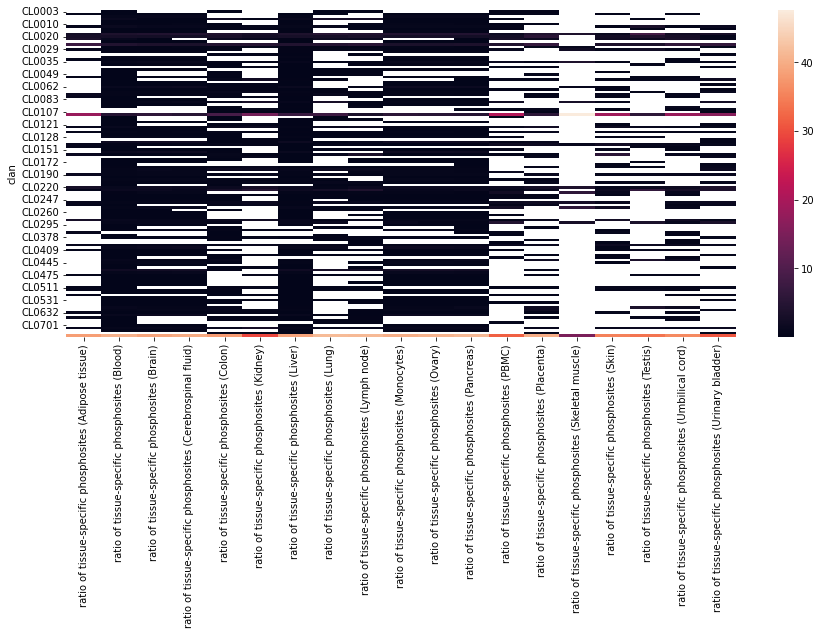

In [246]:
df_clan_gen_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_gen_all)
plt.show()

## 7.2 Domains

In [247]:
df_hmm_name_tspec_Adipose_tissue = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_name_tspec_Adipose_tissue["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Adipose tissue"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_hmm_name_tspec_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_hmm_name_tspec_Adipose_tissue["Total"]
df_hmm_name_tspec_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Adipose_tissue.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Blood = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_name_tspec_Blood["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_hmm_name_tspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_hmm_name_tspec_Blood["Total"]
df_hmm_name_tspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Blood.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Brain = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_hmm_name_tspec_Brain["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Brain"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_hmm_name_tspec_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_hmm_name_tspec_Brain["Total"]
df_hmm_name_tspec_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Brain.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Cerebrospinal_fluid = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_tspec_Cerebrospinal_fluid["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_hmm_name_tspec_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_hmm_name_tspec_Cerebrospinal_fluid["Total"]
df_hmm_name_tspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Colon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_name_tspec_Colon["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_hmm_name_tspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_hmm_name_tspec_Colon["Total"]
df_hmm_name_tspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Colon.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Kidney = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_hmm_name_tspec_Kidney["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Kidney"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_hmm_name_tspec_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_hmm_name_tspec_Kidney["Total"]
df_hmm_name_tspec_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Kidney.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Liver = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_name_tspec_Liver["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_hmm_name_tspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_hmm_name_tspec_Liver["Total"]
df_hmm_name_tspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Liver.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Lung = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lung["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_hmm_name_tspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_hmm_name_tspec_Lung["Total"]
df_hmm_name_tspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lung.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Lymph_node = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lymph_node["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_hmm_name_tspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_hmm_name_tspec_Lymph_node["Total"]
df_hmm_name_tspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lymph_node.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Monocytes = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_tspec_Monocytes["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Monocytes"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_hmm_name_tspec_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_hmm_name_tspec_Monocytes["Total"]
df_hmm_name_tspec_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Monocytes.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Ovary = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_hmm_name_tspec_Ovary["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Ovary"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_hmm_name_tspec_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_hmm_name_tspec_Ovary["Total"]
df_hmm_name_tspec_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Ovary.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Pancreas = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_tspec_Pancreas["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Pancreas"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_hmm_name_tspec_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_hmm_name_tspec_Pancreas["Total"]
df_hmm_name_tspec_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Pancreas.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_PBMC = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_name_tspec_PBMC["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_hmm_name_tspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_hmm_name_tspec_PBMC["Total"]
df_hmm_name_tspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_PBMC.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Placenta = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_tspec_Placenta["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_tspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_tspec_Placenta["Total"]
df_hmm_name_tspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Placenta.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Skeletal_muscle = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_tspec_Skeletal_muscle["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_hmm_name_tspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_hmm_name_tspec_Skeletal_muscle["Total"]
df_hmm_name_tspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Skeletal_muscle.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Skin = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_name_tspec_Skin["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_hmm_name_tspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_hmm_name_tspec_Skin["Total"]
df_hmm_name_tspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Skin.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Testis = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_hmm_name_tspec_Testis["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Testis"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_hmm_name_tspec_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_hmm_name_tspec_Testis["Total"]
df_hmm_name_tspec_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Testis.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Umbilical_cord = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_name_tspec_Umbilical_cord["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Umbilical cord"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_hmm_name_tspec_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_hmm_name_tspec_Umbilical_cord["Total"]
df_hmm_name_tspec_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Umbilical_cord.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Urinary_bladder = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_name_tspec_Urinary_bladder["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Urinary bladder"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_hmm_name_tspec_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_hmm_name_tspec_Urinary_bladder["Total"]
df_hmm_name_tspec_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Urinary_bladder.set_index(["hmm name"], inplace=True)

In [248]:
df_hmm_name_tspec_all = pd.concat([df_hmm_name_tspec_Adipose_tissue, df_hmm_name_tspec_Blood, df_hmm_name_tspec_Brain,
                               df_hmm_name_tspec_Cerebrospinal_fluid, df_hmm_name_tspec_Colon, df_hmm_name_tspec_Kidney,
                               df_hmm_name_tspec_Liver, df_hmm_name_tspec_Lung, df_hmm_name_tspec_Lymph_node, df_hmm_name_tspec_Monocytes,
                               df_hmm_name_tspec_Ovary, df_hmm_name_tspec_Pancreas, df_hmm_name_tspec_PBMC, df_hmm_name_tspec_Placenta,
                               df_hmm_name_tspec_Skeletal_muscle, df_hmm_name_tspec_Skin, df_hmm_name_tspec_Testis,
                              df_hmm_name_tspec_Umbilical_cord, df_hmm_name_tspec_Urinary_bladder], axis=1)
df_hmm_name_tspec_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_tspec_all

ratio of tissue-specific phosphosites (Blood)  \
hmm name                                                         
4_1_CTD                                               0.178891   
A2M                                                   0.536673   
A2M_BRD                                               1.073345   
A2M_recep                                             0.536673   
AAA                                                   0.536673   
...                                                        ...   
WD40_4                                                     NaN   
DUF1075                                                    NaN   
PRT6_C                                                     NaN   
Sacchrp_dh_C                                               NaN   
Sacchrp_dh_NADP                                            NaN   

                 ratio of tissue-specific phosphosites (Brain)  \
hmm name                                                         
4_1_CTD                                                    NaN   
A2M                                                        NaN   
A2M_BRD                                                    NaN   
A2M_recep                                                  NaN   
AAA                                                        NaN   
...                                                        ...   
WD40_4                                                     NaN   
DUF1075                                                    NaN   
PRT6_C                                                     NaN   
Sacchrp_dh_C                                               NaN   
Sacchrp_dh_NADP                                            NaN   

                 ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
hmm name                                                                       
4_1_CTD                                                        NaN             
A2M                                                            NaN             
A2M_BRD                                                        NaN             
A2M_recep                                                      NaN             
AAA                                                            NaN             
...                                                            ...             
WD40_4                                                         NaN             
DUF1075                                                        NaN             
PRT6_C                                                         NaN             
Sacchrp_dh_C                                                   NaN             
Sacchrp_dh_NADP                                                NaN             

                 ratio of tissue-specific phosphosites (Colon)  \
hmm name                                                         
4_1_CTD                                               0.185185   
A2M                                                        NaN   
A2M_BRD                                                    NaN   
A2M_recep                                                  NaN   
AAA                                                   0.370370   
...                                                        ...   
WD40_4                                                     NaN   
DUF1075                                                    NaN   
PRT6_C                                                     NaN   
Sacchrp_dh_C                                               NaN   
Sacchrp_dh_NADP                                            NaN   

                 ratio of tissue-specific phosphosites (Kidney)  \
hmm name                                                          
4_1_CTD                                                     NaN   
A2M                                                         NaN   
A2M_BRD                                                     NaN   
A2M_recep                                                   NaN 

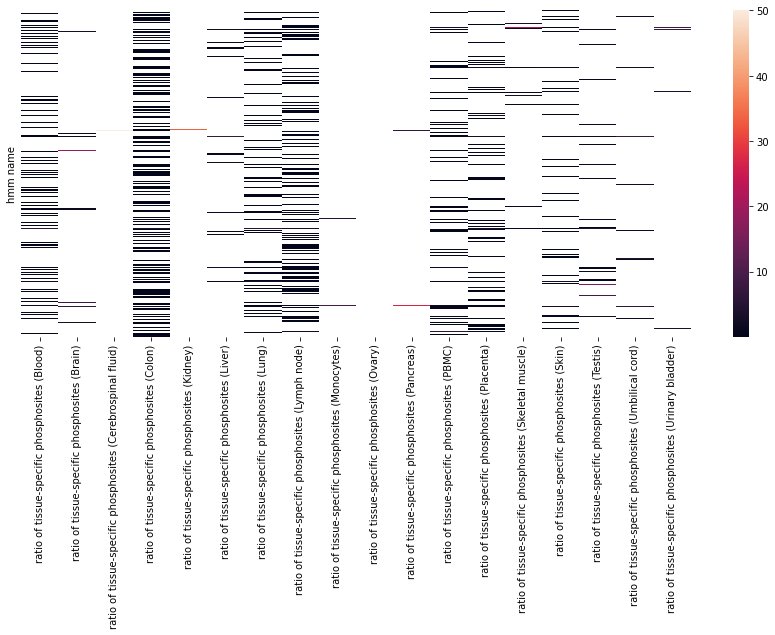

In [249]:
df_hmm_name_tspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_tspec_all, xticklabels=True)
plt.yticks([],[])
plt.show()

In [250]:
df_hmm_name_taspec_Adipose_tissue = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_name_taspec_Adipose_tissue["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Adipose tissue"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_hmm_name_taspec_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_hmm_name_taspec_Adipose_tissue["Total"]
df_hmm_name_taspec_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Adipose_tissue.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Blood = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_name_taspec_Blood["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Blood"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_hmm_name_taspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_hmm_name_taspec_Blood["Total"]
df_hmm_name_taspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Blood.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Brain = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_hmm_name_taspec_Brain["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Brain"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_hmm_name_taspec_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_hmm_name_taspec_Brain["Total"]
df_hmm_name_taspec_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Brain.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Cerebrospinal_fluid = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_taspec_Cerebrospinal_fluid["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_hmm_name_taspec_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_hmm_name_taspec_Cerebrospinal_fluid["Total"]
df_hmm_name_taspec_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Colon = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_name_taspec_Colon["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Colon"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_hmm_name_taspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_hmm_name_taspec_Colon["Total"]
df_hmm_name_taspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Colon.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Kidney = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_hmm_name_taspec_Kidney["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Kidney"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_hmm_name_taspec_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_hmm_name_taspec_Kidney["Total"]
df_hmm_name_taspec_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Kidney.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Liver = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_name_taspec_Liver["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Liver"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_hmm_name_taspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_hmm_name_taspec_Liver["Total"]
df_hmm_name_taspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Liver.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Lung = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lung["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Lung"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_hmm_name_taspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_hmm_name_taspec_Lung["Total"]
df_hmm_name_taspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lung.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Lymph_node = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lymph_node["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Lymph node"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_hmm_name_taspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_hmm_name_taspec_Lymph_node["Total"]
df_hmm_name_taspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lymph_node.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Monocytes = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_taspec_Monocytes["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Monocytes"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_hmm_name_taspec_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_hmm_name_taspec_Monocytes["Total"]
df_hmm_name_taspec_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Monocytes.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Ovary = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_hmm_name_taspec_Ovary["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Ovary"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_hmm_name_taspec_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_hmm_name_taspec_Ovary["Total"]
df_hmm_name_taspec_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Ovary.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Pancreas = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_taspec_Pancreas["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Pancreas"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_hmm_name_taspec_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_hmm_name_taspec_Pancreas["Total"]
df_hmm_name_taspec_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Pancreas.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_PBMC = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_name_taspec_PBMC["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["PBMC"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_hmm_name_taspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_hmm_name_taspec_PBMC["Total"]
df_hmm_name_taspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_PBMC.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Placenta = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_taspec_Placenta["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Placenta"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_taspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_taspec_Placenta["Total"]
df_hmm_name_taspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Placenta.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Skeletal_muscle = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_taspec_Skeletal_muscle["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Skeletal muscle"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_hmm_name_taspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_hmm_name_taspec_Skeletal_muscle["Total"]
df_hmm_name_taspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Skeletal_muscle.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Skin = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_name_taspec_Skin["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Skin"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_hmm_name_taspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_hmm_name_taspec_Skin["Total"]
df_hmm_name_taspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Skin.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Testis = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_hmm_name_taspec_Testis["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Testis"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_hmm_name_taspec_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_hmm_name_taspec_Testis["Total"]
df_hmm_name_taspec_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Testis.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Umbilical_cord = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_name_taspec_Umbilical_cord["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Umbilical cord"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_hmm_name_taspec_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_hmm_name_taspec_Umbilical_cord["Total"]
df_hmm_name_taspec_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Umbilical_cord.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Urinary_bladder = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_name_taspec_Urinary_bladder["Total"] = taspec_sites_pfam.loc[taspec_sites_pfam["Urinary bladder"]==1, :]["ACC_ID"].count()
df_hmm_name_taspec_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_hmm_name_taspec_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_hmm_name_taspec_Urinary_bladder["Total"]
df_hmm_name_taspec_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Urinary_bladder.set_index(["hmm name"], inplace=True)

In [251]:
df_hmm_name_taspec_all = pd.concat([df_hmm_name_taspec_Adipose_tissue, df_hmm_name_taspec_Blood, df_hmm_name_taspec_Brain,
                               df_hmm_name_taspec_Cerebrospinal_fluid, df_hmm_name_taspec_Colon, df_hmm_name_taspec_Kidney,
                               df_hmm_name_taspec_Liver, df_hmm_name_taspec_Lung, df_hmm_name_taspec_Lymph_node, df_hmm_name_taspec_Monocytes,
                               df_hmm_name_taspec_Ovary, df_hmm_name_taspec_Pancreas, df_hmm_name_taspec_PBMC, df_hmm_name_taspec_Placenta,
                               df_hmm_name_taspec_Skeletal_muscle, df_hmm_name_taspec_Skin, df_hmm_name_taspec_Testis,
                              df_hmm_name_taspec_Umbilical_cord, df_hmm_name_taspec_Urinary_bladder], axis=1)
df_hmm_name_taspec_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_taspec_all

ratio of tissue-specific phosphosites (Adipose tissue)  \
hmm name                                                                
14-3-3                                                  1.680672        
AAA                                                     1.680672        
AIRC                                                    0.840336        
ARPC4                                                   0.840336        
Actin                                                  10.924370        
...                                                          ...        
Thioredoxin                                                  NaN        
Thioredoxin_6                                                NaN        
DJ-1_PfpI                                                    NaN        
GAGE                                                         NaN        
Dynamin_N                                                    NaN        

               ratio of tissue-specific phosphosites (Blood)  \
hmm name                                                       
14-3-3                                                   NaN   
AAA                                                 0.359281   
AIRC                                                0.119760   
ARPC4                                                    NaN   
Actin                                               0.239521   
...                                                      ...   
Thioredoxin                                              NaN   
Thioredoxin_6                                            NaN   
DJ-1_PfpI                                                NaN   
GAGE                                                     NaN   
Dynamin_N                                                NaN   

               ratio of tissue-specific phosphosites (Brain)  \
hmm name                                                       
14-3-3                                                   NaN   
AAA                                                      NaN   
AIRC                                                     NaN   
ARPC4                                                    NaN   
Actin                                              19.354839   
...                                                      ...   
Thioredoxin                                              NaN   
Thioredoxin_6                                            NaN   
DJ-1_PfpI                                                NaN   
GAGE                                                     NaN   
Dynamin_N                                                NaN   

               ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
hmm name                                                                     
14-3-3                                                       NaN             
AAA                                                          NaN             
AIRC                                                         NaN             
ARPC4                                                        NaN             
Actin                                                        NaN             
...                                                          ...             
Thioredoxin                                                  NaN             
Thioredoxin_6                                                NaN             
DJ-1_PfpI                                                    NaN             
GAGE                                                         NaN             
Dynamin_N                                                    NaN             

               ratio of tissue-specific phosphosites (Colon)  \
hmm name                                                       
14-3-3                                              0.607903   
AAA                                                 0.379939   
AIRC                                                0.075988   
ARPC4                                                    NaN   


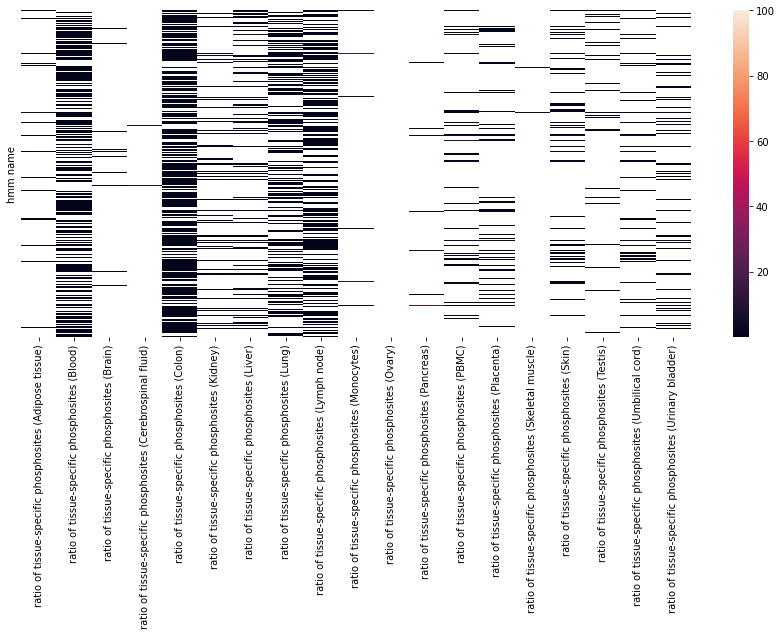

In [252]:
df_hmm_name_taspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_taspec_all, yticklabels=False)
plt.show()

In [253]:
df_hmm_name_gen_Adipose_tissue = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Adipose_tissue.rename({"ACC_ID": "number of tissue-specific phosphosites (Adipose tissue)"}, inplace=True, axis=1)
df_hmm_name_gen_Adipose_tissue["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Adipose tissue"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Adipose_tissue["ratio of tissue-specific phosphosites (Adipose tissue)"] = df_hmm_name_gen_Adipose_tissue["number of tissue-specific phosphosites (Adipose tissue)"]*100/df_hmm_name_gen_Adipose_tissue["Total"]
df_hmm_name_gen_Adipose_tissue.drop(["number of tissue-specific phosphosites (Adipose tissue)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Adipose_tissue.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Blood = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_name_gen_Blood["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Blood"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_hmm_name_gen_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_hmm_name_gen_Blood["Total"]
df_hmm_name_gen_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Blood.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Brain = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Brain.rename({"ACC_ID": "number of tissue-specific phosphosites (Brain)"}, inplace=True, axis=1)
df_hmm_name_gen_Brain["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Brain"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Brain["ratio of tissue-specific phosphosites (Brain)"] = df_hmm_name_gen_Brain["number of tissue-specific phosphosites (Brain)"]*100/df_hmm_name_gen_Brain["Total"]
df_hmm_name_gen_Brain.drop(["number of tissue-specific phosphosites (Brain)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Brain.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Cerebrospinal_fluid = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Cerebrospinal_fluid.rename({"ACC_ID": "number of tissue-specific phosphosites (Cerebrospinal fluid)"}, inplace=True, axis=1)
df_hmm_name_gen_Cerebrospinal_fluid["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Cerebrospinal fluid"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Cerebrospinal_fluid["ratio of tissue-specific phosphosites (Cerebrospinal fluid)"] = df_hmm_name_gen_Cerebrospinal_fluid["number of tissue-specific phosphosites (Cerebrospinal fluid)"]*100/df_hmm_name_gen_Cerebrospinal_fluid["Total"]
df_hmm_name_gen_Cerebrospinal_fluid.drop(["number of tissue-specific phosphosites (Cerebrospinal fluid)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Cerebrospinal_fluid.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Colon = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_name_gen_Colon["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Colon"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_hmm_name_gen_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_hmm_name_gen_Colon["Total"]
df_hmm_name_gen_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Colon.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Kidney = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Kidney.rename({"ACC_ID": "number of tissue-specific phosphosites (Kidney)"}, inplace=True, axis=1)
df_hmm_name_gen_Kidney["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Kidney"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Kidney["ratio of tissue-specific phosphosites (Kidney)"] = df_hmm_name_gen_Kidney["number of tissue-specific phosphosites (Kidney)"]*100/df_hmm_name_gen_Kidney["Total"]
df_hmm_name_gen_Kidney.drop(["number of tissue-specific phosphosites (Kidney)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Kidney.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Liver = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_name_gen_Liver["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Liver"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_hmm_name_gen_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_hmm_name_gen_Liver["Total"]
df_hmm_name_gen_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Liver.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Lung = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_gen_Lung["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Lung"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_hmm_name_gen_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_hmm_name_gen_Lung["Total"]
df_hmm_name_gen_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Lung.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Lymph_node = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_gen_Lymph_node["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Lymph node"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_hmm_name_gen_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_hmm_name_gen_Lymph_node["Total"]
df_hmm_name_gen_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Lymph_node.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Monocytes = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Monocytes.rename({"ACC_ID": "number of tissue-specific phosphosites (Monocytes)"}, inplace=True, axis=1)
df_hmm_name_gen_Monocytes["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Monocytes"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Monocytes["ratio of tissue-specific phosphosites (Monocytes)"] = df_hmm_name_gen_Monocytes["number of tissue-specific phosphosites (Monocytes)"]*100/df_hmm_name_gen_Monocytes["Total"]
df_hmm_name_gen_Monocytes.drop(["number of tissue-specific phosphosites (Monocytes)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Monocytes.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Ovary = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Ovary.rename({"ACC_ID": "number of tissue-specific phosphosites (Ovary)"}, inplace=True, axis=1)
df_hmm_name_gen_Ovary["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Ovary"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Ovary["ratio of tissue-specific phosphosites (Ovary)"] = df_hmm_name_gen_Ovary["number of tissue-specific phosphosites (Ovary)"]*100/df_hmm_name_gen_Ovary["Total"]
df_hmm_name_gen_Ovary.drop(["number of tissue-specific phosphosites (Ovary)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Ovary.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Pancreas = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Pancreas.rename({"ACC_ID": "number of tissue-specific phosphosites (Pancreas)"}, inplace=True, axis=1)
df_hmm_name_gen_Pancreas["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Pancreas"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Pancreas["ratio of tissue-specific phosphosites (Pancreas)"] = df_hmm_name_gen_Pancreas["number of tissue-specific phosphosites (Pancreas)"]*100/df_hmm_name_gen_Pancreas["Total"]
df_hmm_name_gen_Pancreas.drop(["number of tissue-specific phosphosites (Pancreas)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Pancreas.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_PBMC = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_name_gen_PBMC["Total"] = gen_sites_pfam.loc[gen_sites_pfam["PBMC"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_hmm_name_gen_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_hmm_name_gen_PBMC["Total"]
df_hmm_name_gen_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_PBMC.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Placenta = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_gen_Placenta["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Placenta"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_gen_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_gen_Placenta["Total"]
df_hmm_name_gen_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Placenta.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Skeletal_muscle = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_gen_Skeletal_muscle["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Skeletal muscle"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_hmm_name_gen_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_hmm_name_gen_Skeletal_muscle["Total"]
df_hmm_name_gen_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Skeletal_muscle.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Skin = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_name_gen_Skin["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Skin"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_hmm_name_gen_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_hmm_name_gen_Skin["Total"]
df_hmm_name_gen_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Skin.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Testis = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites (Testis)"}, inplace=True, axis=1)
df_hmm_name_gen_Testis["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Testis"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Testis["ratio of tissue-specific phosphosites (Testis)"] = df_hmm_name_gen_Testis["number of tissue-specific phosphosites (Testis)"]*100/df_hmm_name_gen_Testis["Total"]
df_hmm_name_gen_Testis.drop(["number of tissue-specific phosphosites (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Testis.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Umbilical_cord = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Umbilical_cord.rename({"ACC_ID": "number of tissue-specific phosphosites (Umbilical cord)"}, inplace=True, axis=1)
df_hmm_name_gen_Umbilical_cord["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Umbilical cord"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Umbilical_cord["ratio of tissue-specific phosphosites (Umbilical cord)"] = df_hmm_name_gen_Umbilical_cord["number of tissue-specific phosphosites (Umbilical cord)"]*100/df_hmm_name_gen_Umbilical_cord["Total"]
df_hmm_name_gen_Umbilical_cord.drop(["number of tissue-specific phosphosites (Umbilical cord)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Umbilical_cord.set_index(["hmm name"], inplace=True)
df_hmm_name_gen_Urinary_bladder = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_gen_Urinary_bladder.rename({"ACC_ID": "number of tissue-specific phosphosites (Urinary bladder)"}, inplace=True, axis=1)
df_hmm_name_gen_Urinary_bladder["Total"] = gen_sites_pfam.loc[gen_sites_pfam["Urinary bladder"]==1, :]["ACC_ID"].count()
df_hmm_name_gen_Urinary_bladder["ratio of tissue-specific phosphosites (Urinary bladder)"] = df_hmm_name_gen_Urinary_bladder["number of tissue-specific phosphosites (Urinary bladder)"]*100/df_hmm_name_gen_Urinary_bladder["Total"]
df_hmm_name_gen_Urinary_bladder.drop(["number of tissue-specific phosphosites (Urinary bladder)", "Total"], axis=1, inplace=True)
df_hmm_name_gen_Urinary_bladder.set_index(["hmm name"], inplace=True)

In [254]:
df_hmm_name_gen_all = pd.concat([df_hmm_name_gen_Adipose_tissue, df_hmm_name_gen_Blood, df_hmm_name_gen_Brain,
                               df_hmm_name_gen_Cerebrospinal_fluid, df_hmm_name_gen_Colon, df_hmm_name_gen_Kidney,
                               df_hmm_name_gen_Liver, df_hmm_name_gen_Lung, df_hmm_name_gen_Lymph_node, df_hmm_name_gen_Monocytes,
                               df_hmm_name_gen_Ovary, df_hmm_name_gen_Pancreas, df_hmm_name_gen_PBMC, df_hmm_name_gen_Placenta,
                               df_hmm_name_gen_Skeletal_muscle, df_hmm_name_gen_Skin, df_hmm_name_gen_Testis,
                              df_hmm_name_gen_Umbilical_cord, df_hmm_name_gen_Urinary_bladder], axis=1)
df_hmm_name_gen_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_gen_all

ratio of tissue-specific phosphosites (Adipose tissue)  \
hmm name                                                                 
AAA                                                      0.502513        
AD                                                       0.502513        
Actin                                                   17.587940        
Aldolase_II                                              1.005025        
Amidohydro_1                                             0.502513        
...                                                           ...        
Ribosomal_L7Ae                                                NaN        
THUMP                                                         NaN        
Tropomodulin                                                  NaN        
CAP_C                                                         NaN        
fn3                                                           NaN        

                ratio of tissue-specific phosphosites (Blood)  \
hmm name                                                        
AAA                                                  0.084388   
AD                                                        NaN   
Actin                                                4.472574   
Aldolase_II                                          0.337553   
Amidohydro_1                                         0.084388   
...                                                       ...   
Ribosomal_L7Ae                                            NaN   
THUMP                                                     NaN   
Tropomodulin                                              NaN   
CAP_C                                                     NaN   
fn3                                                       NaN   

                ratio of tissue-specific phosphosites (Brain)  \
hmm name                                                        
AAA                                                       NaN   
AD                                                        NaN   
Actin                                                5.303030   
Aldolase_II                                          0.324675   
Amidohydro_1                                         0.108225   
...                                                       ...   
Ribosomal_L7Ae                                            NaN   
THUMP                                                     NaN   
Tropomodulin                                              NaN   
CAP_C                                                     NaN   
fn3                                                       NaN   

                ratio of tissue-specific phosphosites (Cerebrospinal fluid)  \
hmm name                                                                      
AAA                                                           NaN             
AD                                                            NaN             
Actin                                                    4.472477             
Aldolase_II                                              0.344037             
Amidohydro_1                                             0.114679             
...                                                           ...             
Ribosomal_L7Ae                                                NaN             
THUMP                                                         NaN             
Tropomodulin                                                  NaN             
CAP_C                                                         NaN             
fn3                                                           NaN             

                ratio of tissue-specific phosphosites (Colon)  \
hmm name                                                        
AAA                                                  0.151976   
AD                                                        NaN   
Actin                                                8.662614   
Aldolase

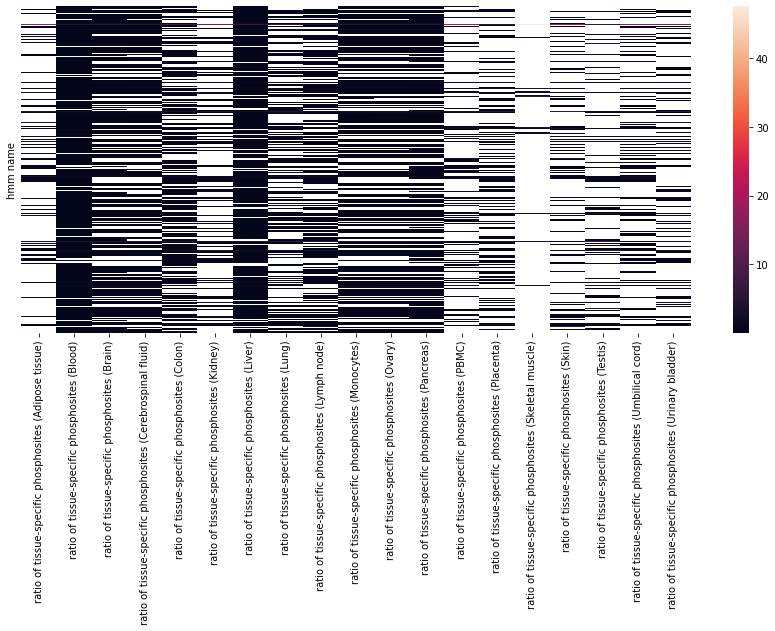

In [255]:
df_hmm_name_gen_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_gen_all, yticklabels=False)
plt.show()

In [256]:
print(gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==0)]["ACC_ID"].nunique())
print(gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==0)].shape[0])
gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==0)]

85
111


ACC_ID  UP_POS                                             tissue  \
69    O00567     520  Liver,PBMC,PBMC,PBMC,PBMC,PBMC,PBMC,Umbilical ...   
100   O14683      16  Blood,Blood,Blood,Blood,Blood,Blood,Colon,Colo...   
189   O43765     305  Blood,Pancreas,Colon,Colon,Colon,Colon,Colon,C...   
190   O43765     307  Blood,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
234   O60885     470  Blood,Brain,Colon,Colon,Colon,Colon,Colon,Colo...   
...      ...     ...                                                ...   
3319  Q9Y2V2      41  Liver,Liver,Blood,Blood,Blood,Blood,Blood,Bloo...   
3322  Q9Y2W1     243  Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PBMC,PBM...   
3329  Q9Y2X3     502  Liver,PBMC,Umbilical cord,Umbilical cord,B-cel...   
3354  Q9Y4F1     427  Liver,Liver,Liver,Liver,Blood,Blood,Kidney,Kid...   
3371  Q9Y617     289        Urinary bladder, Colon, Kidney, Liver,Brain   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
69        S               0        1      1     0      1       0  ...   
100       T               0        0      1     0      1       0  ...   
189       S               0        0      1     0      1       0  ...   
190       S               0        0      1     0      1       0  ...   
234       S               0        0      1     0      1       0  ...   
...     ...             ...      ...    ...   ...    ...     ...  ...   
3319      S               1        0      1     0      1       0  ...   
3322      S               1        1      1     0      1       0  ...   
3329      S               0        1      1     0      1       0  ...   
3354      S               1        0      1     0      1       0  ...   
3371      Y               0        0      0     0      1       0  ...   

      Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
69                  0                0        0       1      0   
100                 0                0        0       1      0   
189                 0                0        0       0      0   
190                 0                0        0       0      0   
234                 0                0        0       0      0   
...               ...              ...      ...     ...    ...   
3319                0                0        0       0      0   
3322                1                0        0       0      0   
3329                0                0        0       0      0   
3354                0                0        0       0      0   
3371                0                0        0       0      0   

      Umbilical cord  Ureter  Urinary bladder  Urine  Total  
69                 1       0                1      0     14  
100                0       0                0      0      6  
189                0       0                0      0      6  
190                0       0                0      0      5  
234                0       0                0      0      5  
...              ...     ...              ...    ...    ...  
3319               1       0                0      0      9  
3322               1       0                0      0     16  
3329               1       0                0      0     10  
3354               1       0                0      0      9  
3371               0       0                1      0      5  

[111 rows x 46 columns]

In [257]:
print(gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==1)]["ACC_ID"].nunique())
print(gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==1)].shape[0])
gen_sites[(gen_sites["Brain"]==1)&(gen_sites["Cerebrospinal fluid"]==1)]

867
2196


ACC_ID  UP_POS                                             tissue  \
0     A0A0C4DH39      51  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
1         A0JNW5    1402  Blood,Blood,Blood,Blood, Cerebrospinal fluid, ...   
2         A2RU30     454  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3         A5A3E0     939  Skin,Colon,Colon,Colon,Colon,Colon,Colon,Colon...   
4         A5A3E0     940  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
...          ...     ...                                                ...   
3400      Q9Y6V0    3585  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3401      Q9Y6V0    4023  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3402      Q9Y6V0    4024  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3403      Q9Y6V0    4395  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   
3404      Q9Y6X4     635  Blood, Cerebrospinal fluid, Liver, Ovary, Panc...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0         S               0        0      1     0      1       0  ...   
1         S               0        0      1     0      1       0  ...   
2         S               0        0      1     0      1       0  ...   
3         S               0        0      1     0      1       0  ...   
4         Y               1        0      1     0      1       0  ...   
...     ...             ...      ...    ...   ...    ...     ...  ...   
3400      S               0        0      1     0      1       0  ...   
3401      S               0        0      1     0      1       0  ...   
3402      S               0        0      1     0      1       0  ...   
3403      S               0        0      1     0      1       0  ...   
3404      S               0        0      1     0      1       0  ...   

      Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
0                   0                0        0       0      0   
1                   0                0        0       0      0   
2                   0                0        0       0      0   
3                   0                0        0       0      0   
4                   0                0        0       1      0   
...               ...              ...      ...     ...    ...   
3400                0                0        0       0      0   
3401                0                0        0       0      0   
3402                0                0        0       0      0   
3403                0                0        0       0      0   
3404                0                0        0       0      0   

      Umbilical cord  Ureter  Urinary bladder  Urine  Total  
0                  0       0                0      0      7  
1                  0       0                0      0      8  
2                  0       0                0      0      7  
3                  0       0                0      0     11  
4                  1       0                0      0     13  
...              ...     ...              ...    ...    ...  
3400               0       0                0      0      7  
3401               0       0                0      0      7  
3402               0       0                0      0      7  
3403               0       0                0      0      7  
3404               0       0                0      0      7  

[2196 rows x 46 columns]

In [258]:
print(gen_sites[(gen_sites["Brain"]==0)&(gen_sites["Cerebrospinal fluid"]==1)]["ACC_ID"].nunique())
print(gen_sites[(gen_sites["Brain"]==0)&(gen_sites["Cerebrospinal fluid"]==1)].shape[0])
gen_sites[(gen_sites["Brain"]==0)&(gen_sites["Cerebrospinal fluid"]==1)]

6
7


ACC_ID  UP_POS                                             tissue  \
368   P02042      51  Breast,Breast,Breast,Breast,Breast,Breast,Brea...   
370   P02042      87  Lung,Lung,Nasal polyps, Palatine tonsils, Paro...   
516   P05546      66  Blood,Blood,Synovial tissue,Synovial tissue,Sy...   
689   P10451     219  Liver,Liver,Liver,Liver,Urinary bladder,Urinar...   
741   P11277    2114  Lung,Lung,Urinary bladder,Cerebrospinal fluid,...   
1536  P68871      45  Breast,Breast,Breast,Breast,Breast,Breast,Brea...   
1542  P69905      25  Breast,Breast,Breast,Breast,Breast,Breast,Brea...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
368       S               0        0      0     0      0       1  ...   
370       S               0        0      0     0      0       0  ...   
516       T               0        0      1     0      0       0  ...   
689       S               0        0      0     0      0       0  ...   
741       S               0        0      0     0      0       0  ...   
1536      S               0        0      0     0      0       1  ...   
1542      Y               0        0      0     0      0       1  ...   

      Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
368                 1                0        0       0      0   
370                 0                0        0       0      0   
516                 0                1        0       0      0   
689                 0                0        0       0      0   
741                 0                0        0       0      0   
1536                0                0        0       0      0   
1542                0                0        0       0      0   

      Umbilical cord  Ureter  Urinary bladder  Urine  Total  
368                0       0                1      0     13  
370                0       0                0      0      5  
516                0       0                0      0      6  
689                0       0                1      1      6  
741                0       0                1      0      5  
1536               0       0                0      0     10  
1542               0       0                0      0      7  

[7 rows x 46 columns]

In [259]:
data = pd.read_csv("phospho_data_tissue_annotation.tsv", sep="\t")
data.dropna(inplace=True)
data_gen_sites_br_cf = pd.merge(gen_sites[(gen_sites["Brain"]==1)|(gen_sites["Cerebrospinal fluid"]==1)], data[["ACC_ID", "UP_POS", "proj", "tissue"]], how="left", on=["ACC_ID", "UP_POS"])
data_gen_sites_br_cf_gr = data_gen_sites_br_cf.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"tissue_y": lambda x: ",".join(x.unique())})
data_gen_sites_br_cf_gr["tissue_y"].value_counts()

Blood, Cerebrospinal fluid, Liver, Ovary, Pancreas, Brain, Monocytes                                                             1004
Colon,Blood, Cerebrospinal fluid, Liver, Ovary, Pancreas, Brain, Monocytes                                                         69
Brain,Blood, Cerebrospinal fluid, Liver, Ovary, Pancreas, Brain, Monocytes                                                         66
Blood, Cerebrospinal fluid, Liver, Ovary, Pancreas, Brain, Monocytes,Lymph node                                                    57
Colon,Blood, Cerebrospinal fluid, Liver, Ovary, Pancreas, Brain, Monocytes,Lymph node                                              29
                                                                                                                                 ... 
Urinary bladder, Colon, Kidney, Liver,Small intestine,Blood, Cerebrospinal fluid, Liver, Ovary, Pancreas, Brain, Monocytes          1
Liver,PBMC,Colon,Brain,Testis,Lung                            

# 8. Comparing tissue-specific sites on non-tissue-specific proteins vs tissue-specific proteins

In [263]:
nontspecprot_tspecsites = pd.read_csv("Tissue aspecific and pervasively P proteins tspec sites", sep="\t")
nontspecprot_tspecsites.head()

ACC_ID  Adipose tissue_protein  B-cells_protein  Blood_protein  \
0  A0AVK6                       0                0              1   
1  A0FGR8                       0                0              1   
2  A0FGR8                       0                0              1   
3  A0FGR8                       0                0              1   
4  A0JLT2                       0                0              1   

   Bone_protein  Brain_protein  Breast_protein  Cerebrospinal fluid_protein  \
0             0              0               0                            0   
1             0              0               0                            0   
2             0              0               0                            0   
3             0              0               0                            0   
4             0              0               0                            0   

   Cervix_protein  Colon_protein  ...  Umbilical cord_protein  Ureter_protein  \
0               0              1  ...                       0               0   
1               0              1  ...                       0               0   
2               0              1  ...                       0               0   
3               0              1  ...                       0               0   
4               0              1  ...                       0               0   

   Urinary bladder_protein  Urine_protein  Total_protein  UP_POS  \
0                        0              0              2      68   
1                        0              0              5     743   
2                        0              0              5     737   
3                        0              0              5     736   
4                        0              0              3     234   

                                              tissue  modres  tissue_site  \
0                                  Colon,Colon,Colon       S        Colon   
1  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...       S        Colon   
2                                              Colon       S        Colon   
3  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...       S        Colon   
4                                              Blood       S        Blood   

                                      Type  
0  tissue aspecific phosphorylated protein  
1       pervasively phosphorylated protein  
2       pervasively phosphorylated protein  
3       pervasively phosphorylated protein  
4  tissue aspecific phosphorylated protein  

[5 rows x 48 columns]

In [264]:
nontspecprot_tspecsites_pfam = pd.merge(nontspecprot_tspecsites, tspec_sites_pfam[["ACC_ID", "UP_POS", "hmm start", "hmm end", "hmm name", "type", "clan", "E-value"]], how="right", on=["ACC_ID", "UP_POS"], indicator =True)
nontspecprot_tspecsites_pfam.head()

ACC_ID  Adipose tissue_protein  B-cells_protein  Blood_protein  \
0  A0A075B6H7                     NaN              NaN            NaN   
1  A0A075B6S5                     NaN              NaN            NaN   
2  A0A0B4J2D9                     NaN              NaN            NaN   
3  A0A0C4DH24                     NaN              NaN            NaN   
4  A0A0C4DH67                     NaN              NaN            NaN   

   Bone_protein  Brain_protein  Breast_protein  Cerebrospinal fluid_protein  \
0           NaN            NaN             NaN                          NaN   
1           NaN            NaN             NaN                          NaN   
2           NaN            NaN             NaN                          NaN   
3           NaN            NaN             NaN                          NaN   
4           NaN            NaN             NaN                          NaN   

   Cervix_protein  Colon_protein  ...  modres  tissue_site  Type  hmm start  \
0             NaN            NaN  ...     NaN          NaN   NaN          1   
1             NaN            NaN  ...     NaN          NaN   NaN          1   
2             NaN            NaN  ...     NaN          NaN   NaN          1   
3             NaN            NaN  ...     NaN          NaN   NaN          2   
4             NaN            NaN  ...     NaN          NaN   NaN          1   

   hmm end  hmm name    type    clan       E-value      _merge  
0       91     V-set  Domain  CL0011  1.100000e-13  right_only  
1       92     V-set  Domain  CL0011  2.200000e-13  right_only  
2       92     V-set  Domain  CL0011  7.100000e-13  right_only  
3       91     V-set  Domain  CL0011  1.200000e-11  right_only  
4       91     V-set  Domain  CL0011  1.100000e-11  right_only  

[5 rows x 55 columns]

In total, 14 019 tissue-specific phosphosites have been identified. 2 794 on tissue-specific phosphorylated proteins. Here, 827 of these phosphosites have been found inside an annotated region in pfam. Aother 4 986 tissue-specific phosphosites have been identified on tissue-aspecific phosphoryalted proteins, of which 1 487 have been found to have an annotation comprising the phosphosite. For the remaining 6 236 phosphosites identified on pervasively phosphorylated proteins, 2 017 have been found annotated

In [265]:
tspecsites_tspecproteins_pfam = nontspecprot_tspecsites_pfam[nontspecprot_tspecsites_pfam["_merge"]=="right_only"]
print(tspecsites_tspecproteins_pfam["ACC_ID"].nunique())
print(tspecsites_tspecproteins_pfam.shape[0])
tspecsites_tspecproteins_pfam["tissue_site"] = 0
for tissue in list_tissues_STY:
    tissue = tissue+"_protein"
    tspecsites_tspecproteins_pfam.drop([tissue], inplace=True, axis=1)
tspecsites_tspecproteins_pfam.drop(["_merge", "Total_protein", "tissue", "modres", "tissue_site", "Type"], inplace=True, axis=1)
tspecsites_tspecproteins_pfam = pd.merge(tspecsites_tspecproteins_pfam[["ACC_ID", "UP_POS"]], tspec_sites_pfam, how="left", on=["ACC_ID", "UP_POS"], indicator=True)
tspecsites_tspecproteins_pfam.drop(["_merge"], inplace=True, axis=1)
for tissue in list_tissues_STY:
    tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam[tissue]==1, "tissue_site"] = tissue
tspecsites_tspecproteins_pfam.head()

726
1251


C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1016061217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tspecsites_tspecproteins_pfam["tissue_site"] = 0
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ACC_ID  UP_POS             tissue modres  Adipose tissue  B-cells  \
0  A0A075B6H7      30               Lung      T               0        0   
1  A0A075B6S5      52    Menstrual fluid      S               0        0   
2  A0A0B4J2D9      52  Blood,Blood,Blood      S               0        0   
3  A0A0C4DH24      75    Skeletal muscle      S               0        0   
4  A0A0C4DH67      50              Blood      S               0        0   

   Blood  Bone  Brain  Breast  ...  Urinary bladder  Urine  Total  hmm start  \
0      0     0      0       0  ...                0      0      1          1   
1      0     0      0       0  ...                0      0      1          1   
2      1     0      0       0  ...                0      0      1          1   
3      0     0      0       0  ...                0      0      1          2   
4      1     0      0       0  ...                0      0      1          1   

   hmm end  hmm name    type    clan       E-value      tissue_site  
0       91     V-set  Domain  CL0011  1.100000e-13             Lung  
1       92     V-set  Domain  CL0011  2.200000e-13  Menstrual fluid  
2       92     V-set  Domain  CL0011  7.100000e-13            Blood  
3       91     V-set  Domain  CL0011  1.200000e-11  Skeletal muscle  
4       91     V-set  Domain  CL0011  1.100000e-11            Blood  

[5 rows x 53 columns]

In [266]:
tspecsites_taspecproteins_pfam = nontspecprot_tspecsites_pfam[(nontspecprot_tspecsites_pfam["_merge"]=="both")&(nontspecprot_tspecsites_pfam["Type"]=="tissue aspecific phosphorylated protein")]
print(tspecsites_taspecproteins_pfam["ACC_ID"].nunique())
print(tspecsites_taspecproteins_pfam.shape[0])
for tissue in list_tissues_STY:
    tissue = tissue+"_protein"
    tspecsites_taspecproteins_pfam.drop([tissue], axis=1, inplace=True)
tspecsites_taspecproteins_pfam.drop(["_merge"], axis=1, inplace=True)
tspecsites_taspecproteins_pfam.head()

667
1757


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ACC_ID  Total_protein  UP_POS  \
10  A0M8Q6            4.0      10   
11  A1KXE4            3.0     185   
12  A1L170            3.0      18   
13  A1L170            3.0     222   
14  A1L170            3.0     223   

                                               tissue modres tissue_site  \
10                                     Lung,Lung,Lung      T        Lung   
11                                              Colon      T       Colon   
12                                         Lymph node      S  Lymph node   
13                                  Colon,Colon,Colon      S       Colon   
14  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...      S       Colon   

                                       Type  hmm start  hmm end hmm name  \
10  tissue aspecific phosphorylated protein          1       85   C1-set   
11  tissue aspecific phosphorylated protein        100      243    TCRP1   
12  tissue aspecific phosphorylated protein          1      273  DUF4628   
13  tissue aspecific phosphorylated protein          1      273  DUF4628   
14  tissue aspecific phosphorylated protein          1      273  DUF4628   

      type     clan        E-value  
10  Domain   CL0011   2.100000e-27  
11  Family  No_clan   3.100000e-81  
12  Family  No_clan  1.900000e-120  
13  Family  No_clan  1.900000e-120  
14  Family  No_clan  1.900000e-120

In [267]:
tspecsites_genproteins_pfam = nontspecprot_tspecsites_pfam[(nontspecprot_tspecsites_pfam["_merge"]=="both")&(nontspecprot_tspecsites_pfam["Type"]=="pervasively phosphorylated protein")]
print(tspecsites_genproteins_pfam["ACC_ID"].nunique())
print(tspecsites_genproteins_pfam.shape[0])
for tissue in list_tissues_STY:
    tissue = tissue+"_protein"
    tspecsites_genproteins_pfam.drop([tissue], inplace=True, axis=1)
tspecsites_genproteins_pfam.drop(["_merge"], inplace=True, axis=1)
tspecsites_genproteins_pfam.head()

624
2378


C:\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


ACC_ID  Total_protein  UP_POS tissue modres tissue_site  \
30  A6NMY6           13.0      31   Skin      T        Skin   
31  A6NMY6           13.0      31   Skin      T        Skin   
32  A6NMY6           13.0      31   Skin      T        Skin   
33  A6NMY6           13.0      31   Skin      T        Skin   
36  A8MVW0            8.0     750   Lung      T        Lung   

                                  Type  hmm start  hmm end hmm name    type  \
30  pervasively phosphorylated protein          1       66  Annexin  Domain   
31  pervasively phosphorylated protein          1       66  Annexin  Domain   
32  pervasively phosphorylated protein          1       66  Annexin  Domain   
33  pervasively phosphorylated protein          2       66  Annexin  Domain   
36  pervasively phosphorylated protein          1      817  UPF0560  Family   

       clan       E-value  
30  No_clan  1.100000e-23  
31  No_clan  3.100000e-20  
32  No_clan  3.900000e-15  
33  No_clan  1.500000e-13  
36   CL0661  0.000000e+00

<AxesSubplot:title={'center':'Number of tissue-specific phosphosites in a domain on any of proteins of any of the three categories'}, xlabel='Tissue'>

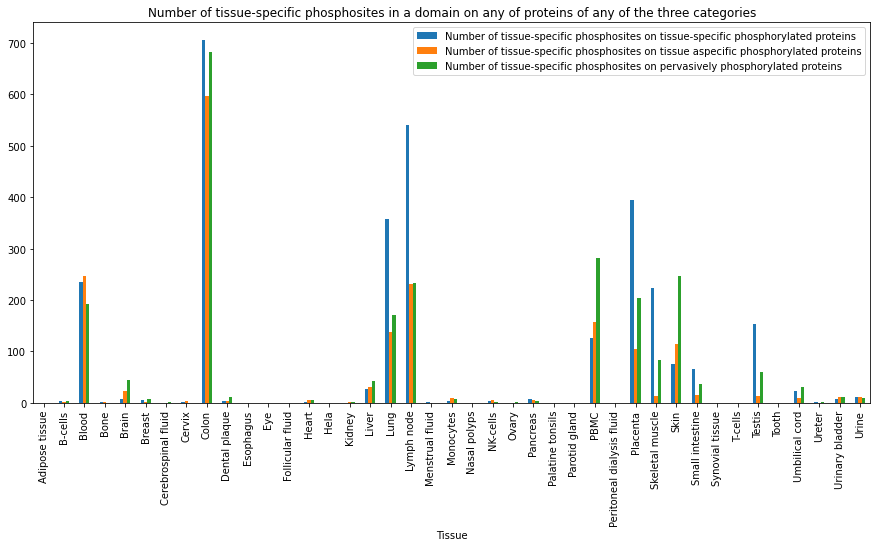

In [268]:
df_spread_tissues = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
list_total = []
for tissue in list_tissues_STY:
    count_tspec = tspecsites_tspecproteins_pfam[tspecsites_tspecproteins_pfam["tissue_site"]==tissue]["ACC_ID"].count()
    count_taspec = tspecsites_taspecproteins_pfam[tspecsites_taspecproteins_pfam["tissue_site"]==tissue]["ACC_ID"].count()
    count_gen = tspecsites_genproteins_pfam[tspecsites_genproteins_pfam["tissue_site"]==tissue]["ACC_ID"].count()
    count_total = tspec_sites_pfam.loc[tspec_sites_pfam[tissue]==1]["ACC_ID"].count()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
    list_total.append(count_total)
df_spread_tissues["Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins"] = list_tspec
df_spread_tissues["Number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins"] = list_taspec
df_spread_tissues["Number of tissue-specific phosphosites on pervasively phosphorylated proteins"] = list_gen
df_spread_tissues["Total"] = list_total
df_spread_tissues
df_spread_tissues[["Tissue", "Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins", "Number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins", "Number of tissue-specific phosphosites on pervasively phosphorylated proteins"]].plot(x="Tissue", kind="bar", figsize=(15,7), title="Number of tissue-specific phosphosites in a domain on any of proteins of any of the three categories")
#plt.savefig("WP2 Pfam_proteins having tissue-specific phosphosites in a functional domain.png", format="png", bbox_inches="tight")

<AxesSubplot:xlabel='Tissue'>

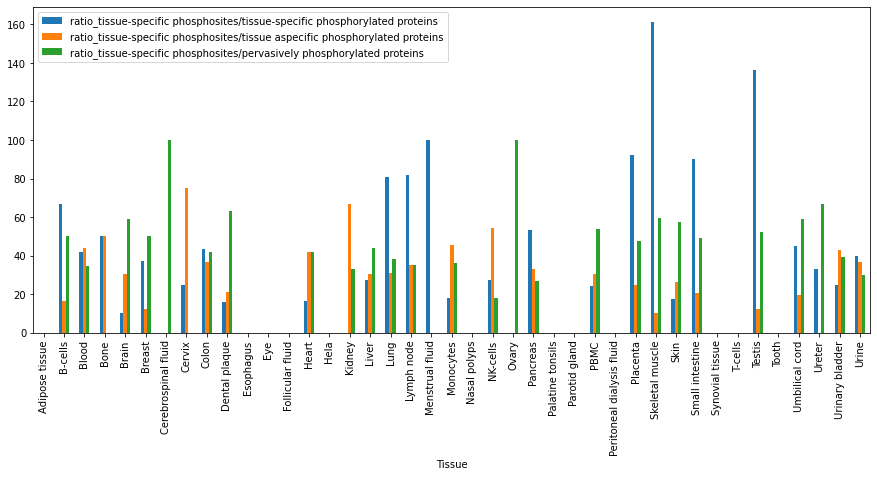

In [269]:
df_spread_tissues["ratio_tissue-specific phosphosites/tissue-specific phosphorylated proteins"] = df_spread_tissues["Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_tissue-specific phosphosites/tissue aspecific phosphorylated proteins"] = df_spread_tissues["Number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins"]*100/df_spread_tissues["Total"]
df_spread_tissues["ratio_tissue-specific phosphosites/pervasively phosphorylated proteins"] = df_spread_tissues["Number of tissue-specific phosphosites on pervasively phosphorylated proteins"]*100/df_spread_tissues["Total"]
df_spread_tissues[["Tissue", "ratio_tissue-specific phosphosites/tissue-specific phosphorylated proteins", "ratio_tissue-specific phosphosites/tissue aspecific phosphorylated proteins", "ratio_tissue-specific phosphosites/pervasively phosphorylated proteins"]].plot(kind="bar", x="Tissue", figsize=(15,6))

In [270]:
df_spread_tissues

Tissue  \
0              Adipose tissue   
1                     B-cells   
2                       Blood   
3                        Bone   
4                       Brain   
5                      Breast   
6         Cerebrospinal fluid   
7                      Cervix   
8                       Colon   
9               Dental plaque   
10                  Esophagus   
11                        Eye   
12           Follicular fluid   
13                      Heart   
14                       Hela   
15                     Kidney   
16                      Liver   
17                       Lung   
18                 Lymph node   
19            Menstrual fluid   
20                  Monocytes   
21               Nasal polyps   
22                   NK-cells   
23                      Ovary   
24                   Pancreas   
25           Palatine tonsils   
26              Parotid gland   
27                       PBMC   
28  Peritoneal dialysis fluid   
29                   Placenta   
30            Skeletal muscle   
31                       Skin   
32            Small intestine   
33            Synovial tissue   
34                    T-cells   
35                     Testis   
36                      Tooth   
37             Umbilical cord   
38                     Ureter   
39            Urinary bladder   
40                      Urine   

    Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins  \
0                                                   0                                   
1                                                   4                                   
2                                                 235                                   
3                                                   1                                   
4                                                   8                                   
5                                                   6                                   
6                                                   0                                   
7                                                   1                                   
8                                                 705                                   
9                                                   3                                   
10                                                  0                                   
11                                                  0                                   
12                                                  0                                   
13                                                  2                                   
14                                                  0                                   
15                                                  0                                   
16                                                 27                                   
17                                                358                                   
18                                                540                                   
19                                                  1                                   
20                                                  4                                   
21                                                  0                                   
22                                                  3                                   
23                                                  0                                   
24                                                  8                                   
25                                                  0                                   
26                                                  0                                   
27                                                126                                   
28                                                  0  

In [271]:
print(tspecsites_tspecproteins_pfam[tspecsites_tspecproteins_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(tspecsites_tspecproteins_pfam[tspecsites_tspecproteins_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

701
300


In [272]:
print(tspecsites_taspecproteins_pfam[tspecsites_taspecproteins_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(tspecsites_taspecproteins_pfam[tspecsites_taspecproteins_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

687
300


In [273]:
print(tspecsites_genproteins_pfam[tspecsites_genproteins_pfam["clan"]=="No_clan"]["ACC_ID"].count())
print(tspecsites_genproteins_pfam[tspecsites_genproteins_pfam["clan"]=="No_clan"]["ACC_ID"].nunique())

868
268


## 8.1 Type of domain annotation

<AxesSubplot:title={'center':'Number of sites with a certain kind of domain'}, xlabel='Type'>

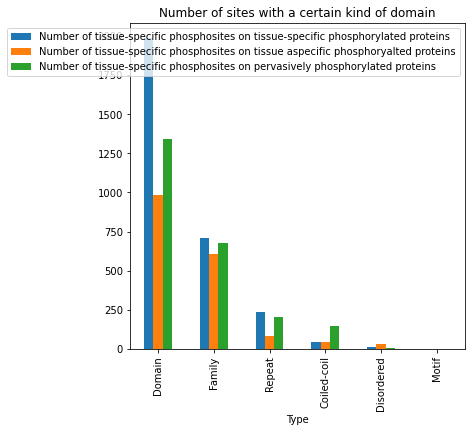

In [274]:
list_types = ["Domain", "Family", "Repeat", "Coiled-coil", "Disordered", "Motif"]
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    count_tspec = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["type"]==element, :]["ACC_ID"].count()
    count_taspec = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["type"]==element, :]["ACC_ID"].count()
    count_gen = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["type"]==element, :]["ACC_ID"].count()
    list_counts_tspec.append(count_tspec)
    list_counts_taspec.append(count_taspec)
    list_counts_gen.append(count_gen)
df_types = pd.DataFrame({"Type": list_types, "Number of tissue-specific phosphosites on tissue-specific phosphorylated proteins": list_counts_tspec,
                        "Number of tissue-specific phosphosites on tissue aspecific phosphoryalted proteins": list_counts_taspec,
                         "Number of tissue-specific phosphosites on pervasively phosphorylated proteins": list_counts_gen})
df_types.plot(kind="bar", x="Type", figsize=(6,6), title="Number of sites with a certain kind of domain")

In [275]:
df_types_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
for element in list_types:
    list_counts_tspec = []
    list_counts_taspec = []
    list_counts_gen = []
    for tissue in list_tissues_STY:
        count_tspec = tspecsites_tspecproteins_pfam.loc[(tspecsites_tspecproteins_pfam["tissue_site"]==tissue)&(tspecsites_tspecproteins_pfam["type"]==element), :]["ACC_ID"].count()
        count_taspec = tspecsites_taspecproteins_pfam.loc[(tspecsites_taspecproteins_pfam["tissue_site"]==tissue)&(tspecsites_taspecproteins_pfam["type"]==element), :]["ACC_ID"].count()
        count_gen = tspecsites_genproteins_pfam.loc[(tspecsites_genproteins_pfam["tissue_site"]==tissue)&(tspecsites_genproteins_pfam["type"]==element), :]["ACC_ID"].count()
        list_counts_tspec.append(count_tspec)
        list_counts_taspec.append(count_taspec)
        list_counts_gen.append(count_gen)
    tspec_colname = element+"_tspec"
    taspec_colname = element+"_taspec"
    gen_colname = element+"_pervasive"
    df_types_tissue[tspec_colname] = list_counts_tspec
    df_types_tissue[taspec_colname] = list_counts_taspec
    df_types_tissue[gen_colname] = list_counts_gen
df_types_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
0              Adipose tissue             0              0                 0   
1                     B-cells             2              0                 0   
2                       Blood           151            144               119   
3                        Bone             1              1                 0   
4                       Brain             5             11                37   
5                      Breast             6              2                 8   
6         Cerebrospinal fluid             0              0                 0   
7                      Cervix             0              0                 0   
8                       Colon           464            292               316   
9               Dental plaque             0              2                 1   
10                  Esophagus             0              0                 0   
11                        Eye             0              0                 0   
12           Follicular fluid             0              0                 0   
13                      Heart             1              4                 4   
14                       Hela             0              0                 0   
15                     Kidney             0              1                 1   
16                      Liver            21             23                24   
17                       Lung           182             75                94   
18                 Lymph node           404            112               130   
19            Menstrual fluid             1              0                 0   
20                  Monocytes             3              9                 6   
21               Nasal polyps             0              0                 0   
22                   NK-cells             0              4                 1   
23                      Ovary             0              0                 0   
24                   Pancreas             6              4                 2   
25           Palatine tonsils             0              0                 0   
26              Parotid gland             0              0                 0   
27                       PBMC            92            108               207   
28  Peritoneal dialysis fluid             0              0                 0   
29                   Placenta           325             67                93   
30            Skeletal muscle           215             10                34   
31                       Skin            35             82               176   
32            Small intestine            22              9                32   
33            Synovial tissue             0              0                 0   
34                    T-cells             0              0                 0   
35                     Testis            23              8                33   
36                      Tooth             0              0                 0   
37             Umbilical cord            14              6                14   
38                     Ureter             1              0                 2   
39            Urinary bladder             4              3                 4   
40                      Urine             6              8                 2   

    Family_tspec  Family_taspec  Family_pervasive  Repeat_tspec  \
0              0              0                 0             0   
1              2              1                 1             0   
2             68             77                56             9   
3              0              0                 0             0   
4              3              4                 5             0   
5              0              0                 0             0   
6              0              0                 2             0   
7              0              1                 0             0   
8            191            246               200          

<AxesSubplot:xlabel='Tissue'>

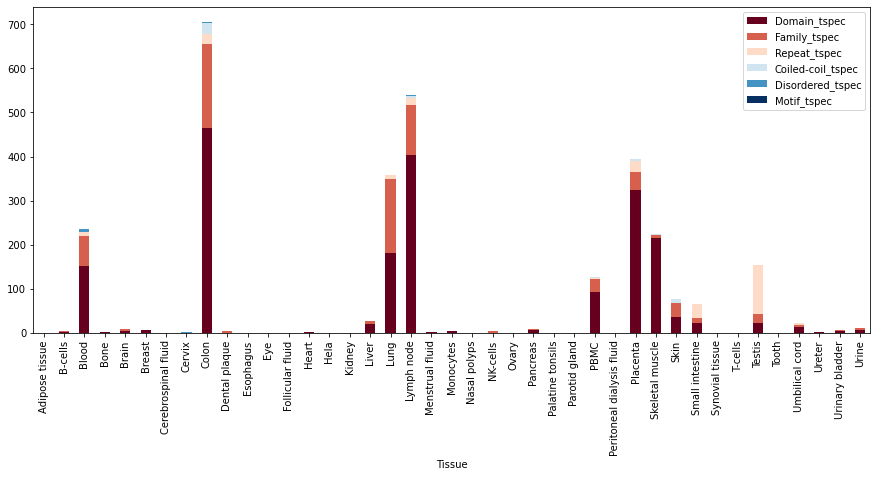

In [276]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("tspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")

<AxesSubplot:xlabel='Tissue'>

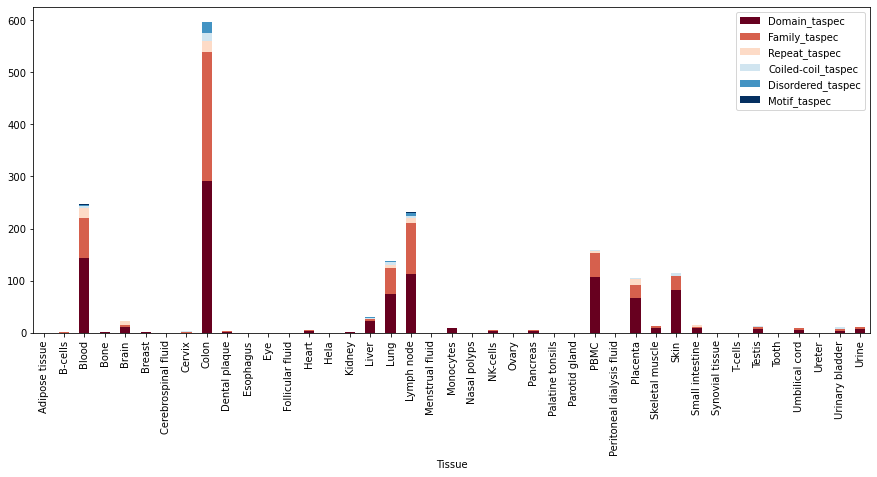

In [277]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("taspec"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")

<AxesSubplot:xlabel='Tissue'>

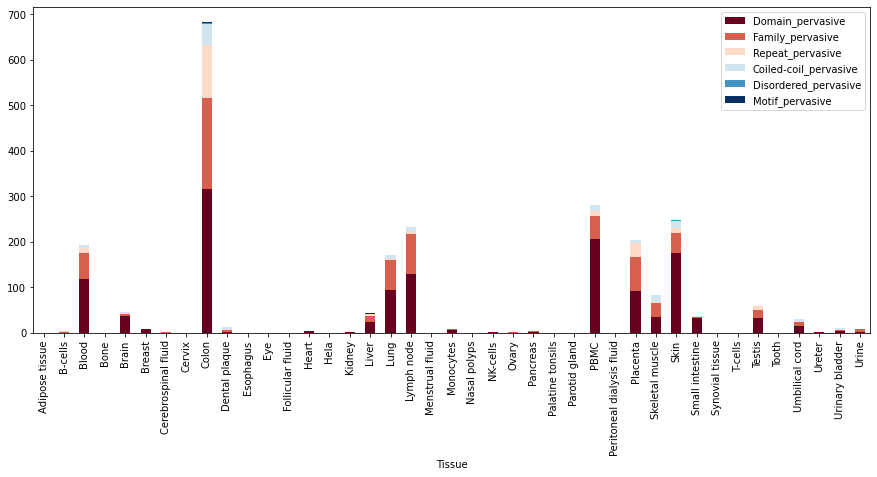

In [278]:
df_types_tissue.loc[:, ((df_types_tissue.columns.str.contains("pervasive"))|df_types_tissue.columns.str.contains("Tissue"))].plot(kind="bar", x="Tissue", figsize=(15,6), stacked=True, colormap="RdBu")

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1914250863.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/1914250863.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp

<AxesSubplot:title={'center':"Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

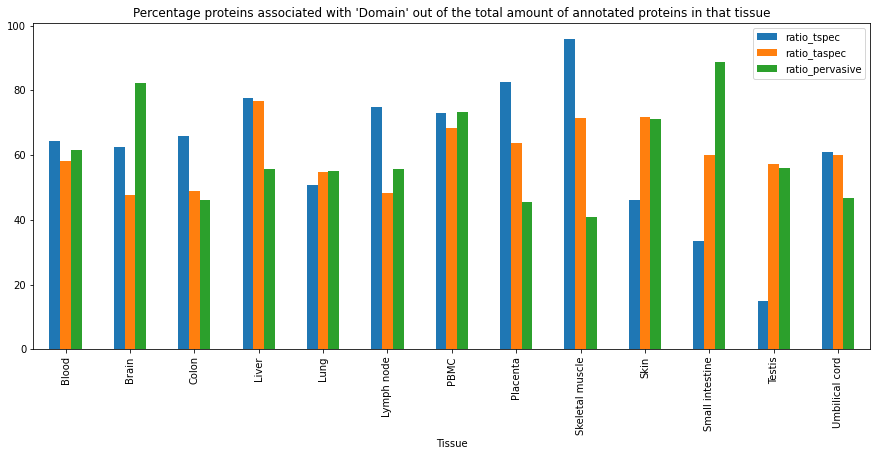

In [279]:
df_domain_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Domain")|df_types_tissue.columns.str.contains("Tissue"))]
df_domain_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_domain_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_domain_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_domain_tissue = df_domain_tissue[(df_domain_tissue["Total_tspec"]>=25)|(df_domain_tissue["Total_taspec"]>=25)|(df_domain_tissue["Total_pervasive"]>=25)]
df_domain_tissue["ratio_tspec"] = df_domain_tissue["Domain_tspec"]*100/df_domain_tissue["Total_tspec"]
df_domain_tissue["ratio_taspec"] = df_domain_tissue["Domain_taspec"]*100/df_domain_tissue["Total_taspec"]
df_domain_tissue["ratio_pervasive"] = df_domain_tissue["Domain_pervasive"]*100/df_domain_tissue["Total_pervasive"]

df_domain_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Domain' out of the total amount of annotated proteins in that tissue")

In [280]:
df_domain_tissue

Tissue  Domain_tspec  Domain_taspec  Domain_pervasive  \
2             Blood           151            144               119   
4             Brain             5             11                37   
8             Colon           464            292               316   
16            Liver            21             23                24   
17             Lung           182             75                94   
18       Lymph node           404            112               130   
27             PBMC            92            108               207   
29         Placenta           325             67                93   
30  Skeletal muscle           215             10                34   
31             Skin            35             82               176   
32  Small intestine            22              9                32   
35           Testis            23              8                33   
37   Umbilical cord            14              6                14   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
2           235           247              193    64.255319     58.299595   
4             8            23               45    62.500000     47.826087   
8           705           596              683    65.815603     48.993289   
16           27            30               43    77.777778     76.666667   
17          358           137              171    50.837989     54.744526   
18          540           232              233    74.814815     48.275862   
27          126           158              282    73.015873     68.354430   
29          394           105              204    82.487310     63.809524   
30          224            14               83    95.982143     71.428571   
31           76           114              247    46.052632     71.929825   
32           66            15               36    33.333333     60.000000   
35          154            14               59    14.935065     57.142857   
37           23            10               30    60.869565     60.000000   

    ratio_pervasive  
2         61.658031  
4         82.222222  
8         46.266471  
16        55.813953  
17        54.970760  
18        55.793991  
27        73.404255  
29        45.588235  
30        40.963855  
31        71.255061  
32        88.888889  
35        55.932203  
37        46.666667

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3711207709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3711207709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp

<AxesSubplot:title={'center':"Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

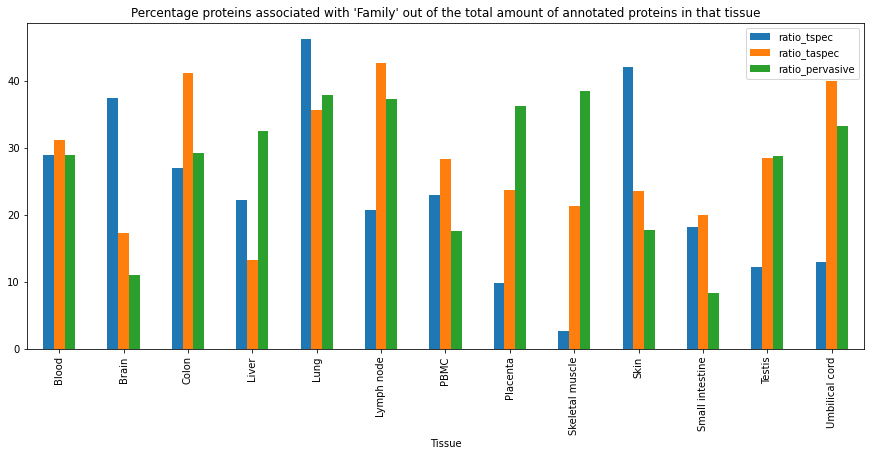

In [281]:
df_family_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Family")|df_types_tissue.columns.str.contains("Tissue"))]
df_family_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_family_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_family_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_family_tissue = df_family_tissue[(df_family_tissue["Total_tspec"]>=25)|(df_family_tissue["Total_taspec"]>=25)|(df_family_tissue["Total_pervasive"]>=25)]
df_family_tissue["ratio_tspec"] = df_family_tissue["Family_tspec"]*100/df_family_tissue["Total_tspec"]
df_family_tissue["ratio_taspec"] = df_family_tissue["Family_taspec"]*100/df_family_tissue["Total_taspec"]
df_family_tissue["ratio_pervasive"] = df_family_tissue["Family_pervasive"]*100/df_family_tissue["Total_pervasive"]

df_family_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Family' out of the total amount of annotated proteins in that tissue")

In [282]:
df_family_tissue

Tissue  Family_tspec  Family_taspec  Family_pervasive  \
2             Blood            68             77                56   
4             Brain             3              4                 5   
8             Colon           191            246               200   
16            Liver             6              4                14   
17             Lung           166             49                65   
18       Lymph node           112             99                87   
27             PBMC            29             45                50   
29         Placenta            39             25                74   
30  Skeletal muscle             6              3                32   
31             Skin            32             27                44   
32  Small intestine            12              3                 3   
35           Testis            19              4                17   
37   Umbilical cord             3              4                10   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
2           235           247              193    28.936170     31.174089   
4             8            23               45    37.500000     17.391304   
8           705           596              683    27.092199     41.275168   
16           27            30               43    22.222222     13.333333   
17          358           137              171    46.368715     35.766423   
18          540           232              233    20.740741     42.672414   
27          126           158              282    23.015873     28.481013   
29          394           105              204     9.898477     23.809524   
30          224            14               83     2.678571     21.428571   
31           76           114              247    42.105263     23.684211   
32           66            15               36    18.181818     20.000000   
35          154            14               59    12.337662     28.571429   
37           23            10               30    13.043478     40.000000   

    ratio_pervasive  
2         29.015544  
4         11.111111  
8         29.282577  
16        32.558140  
17        38.011696  
18        37.339056  
27        17.730496  
29        36.274510  
30        38.554217  
31        17.813765  
32         8.333333  
35        28.813559  
37        33.333333

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/2477384024.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/2477384024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp

<AxesSubplot:title={'center':"Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

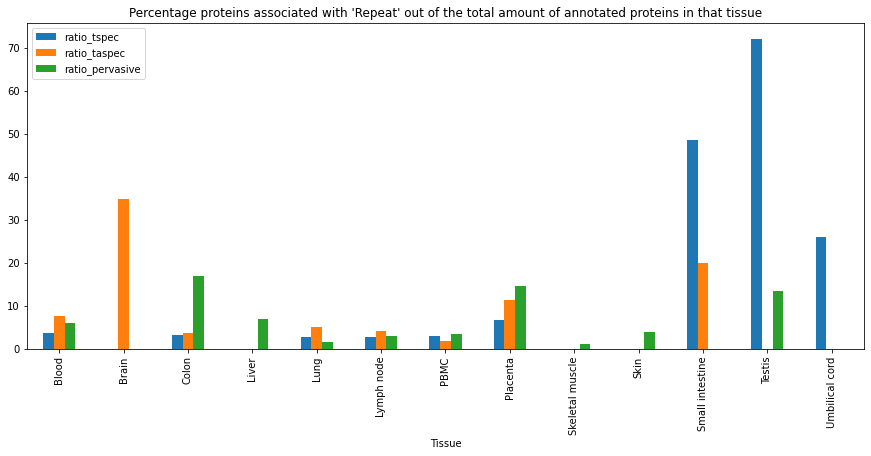

In [283]:
df_repeat_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Repeat")|df_types_tissue.columns.str.contains("Tissue"))]
df_repeat_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_repeat_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_repeat_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_repeat_tissue = df_repeat_tissue[(df_repeat_tissue["Total_tspec"]>=25)|(df_repeat_tissue["Total_taspec"]>=25)|(df_repeat_tissue["Total_pervasive"]>=25)]
df_repeat_tissue["ratio_tspec"] = df_repeat_tissue["Repeat_tspec"]*100/df_repeat_tissue["Total_tspec"]
df_repeat_tissue["ratio_taspec"] = df_repeat_tissue["Repeat_taspec"]*100/df_repeat_tissue["Total_taspec"]
df_repeat_tissue["ratio_pervasive"] = df_repeat_tissue["Repeat_pervasive"]*100/df_repeat_tissue["Total_pervasive"]

df_repeat_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Repeat' out of the total amount of annotated proteins in that tissue")

In [284]:
df_repeat_tissue

Tissue  Repeat_tspec  Repeat_taspec  Repeat_pervasive  \
2             Blood             9             19                12   
4             Brain             0              8                 0   
8             Colon            23             22               116   
16            Liver             0              0                 3   
17             Lung            10              7                 3   
18       Lymph node            16             10                 7   
27             PBMC             4              3                10   
29         Placenta            27             12                30   
30  Skeletal muscle             0              0                 1   
31             Skin             0              0                10   
32  Small intestine            32              3                 0   
35           Testis           111              0                 8   
37   Umbilical cord             6              0                 0   

    Total_tspec  Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  \
2           235           247              193     3.829787      7.692308   
4             8            23               45     0.000000     34.782609   
8           705           596              683     3.262411      3.691275   
16           27            30               43     0.000000      0.000000   
17          358           137              171     2.793296      5.109489   
18          540           232              233     2.962963      4.310345   
27          126           158              282     3.174603      1.898734   
29          394           105              204     6.852792     11.428571   
30          224            14               83     0.000000      0.000000   
31           76           114              247     0.000000      0.000000   
32           66            15               36    48.484848     20.000000   
35          154            14               59    72.077922      0.000000   
37           23            10               30    26.086957      0.000000   

    ratio_pervasive  
2          6.217617  
4          0.000000  
8         16.983895  
16         6.976744  
17         1.754386  
18         3.004292  
27         3.546099  
29        14.705882  
30         1.204819  
31         4.048583  
32         0.000000  
35        13.559322  
37         0.000000

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/2034386475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/2034386475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\

<AxesSubplot:title={'center':"Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

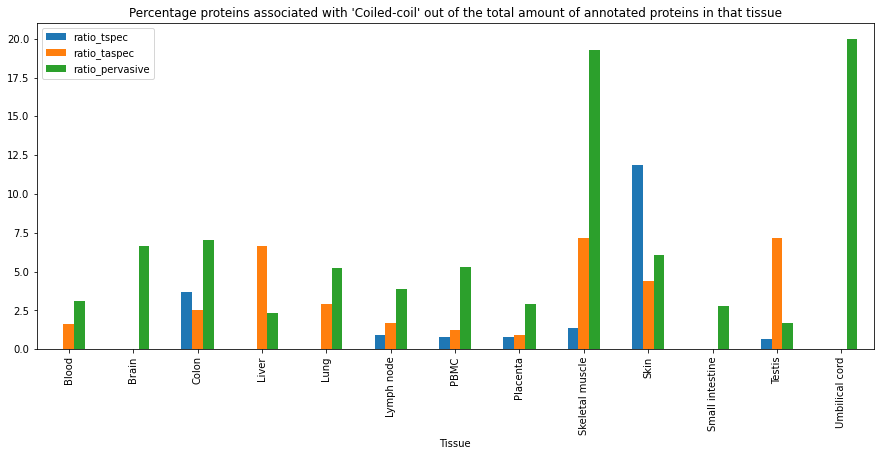

In [285]:
df_coiled_coil_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Coiled-coil")|df_types_tissue.columns.str.contains("Tissue"))]
df_coiled_coil_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_coiled_coil_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_coiled_coil_tissue = df_coiled_coil_tissue[(df_coiled_coil_tissue["Total_tspec"]>=25)|(df_coiled_coil_tissue["Total_taspec"]>=25)|(df_coiled_coil_tissue["Total_pervasive"]>=25)]
df_coiled_coil_tissue["ratio_tspec"] = df_coiled_coil_tissue["Coiled-coil_tspec"]*100/df_coiled_coil_tissue["Total_tspec"]
df_coiled_coil_tissue["ratio_taspec"] = df_coiled_coil_tissue["Coiled-coil_taspec"]*100/df_coiled_coil_tissue["Total_taspec"]
df_coiled_coil_tissue["ratio_pervasive"] = df_coiled_coil_tissue["Coiled-coil_pervasive"]*100/df_coiled_coil_tissue["Total_pervasive"]

df_coiled_coil_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Coiled-coil' out of the total amount of annotated proteins in that tissue")

In [286]:
df_coiled_coil_tissue

Tissue  Coiled-coil_tspec  Coiled-coil_taspec  \
2             Blood                  0                   4   
4             Brain                  0                   0   
8             Colon                 26                  15   
16            Liver                  0                   2   
17             Lung                  0                   4   
18       Lymph node                  5                   4   
27             PBMC                  1                   2   
29         Placenta                  3                   1   
30  Skeletal muscle                  3                   1   
31             Skin                  9                   5   
32  Small intestine                  0                   0   
35           Testis                  1                   1   
37   Umbilical cord                  0                   0   

    Coiled-coil_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
2                       6          235           247              193   
4                       3            8            23               45   
8                      48          705           596              683   
16                      1           27            30               43   
17                      9          358           137              171   
18                      9          540           232              233   
27                     15          126           158              282   
29                      6          394           105              204   
30                     16          224            14               83   
31                     15           76           114              247   
32                      1           66            15               36   
35                      1          154            14               59   
37                      6           23            10               30   

    ratio_tspec  ratio_taspec  ratio_pervasive  
2      0.000000      1.619433         3.108808  
4      0.000000      0.000000         6.666667  
8      3.687943      2.516779         7.027818  
16     0.000000      6.666667         2.325581  
17     0.000000      2.919708         5.263158  
18     0.925926      1.724138         3.862661  
27     0.793651      1.265823         5.319149  
29     0.761421      0.952381         2.941176  
30     1.339286      7.142857        19.277108  
31    11.842105      4.385965         6.072874  
32     0.000000      0.000000         2.777778  
35     0.649351      7.142857         1.694915  
37     0.000000      0.000000        20.000000

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3779459206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3779459206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Lo

<AxesSubplot:title={'center':"Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

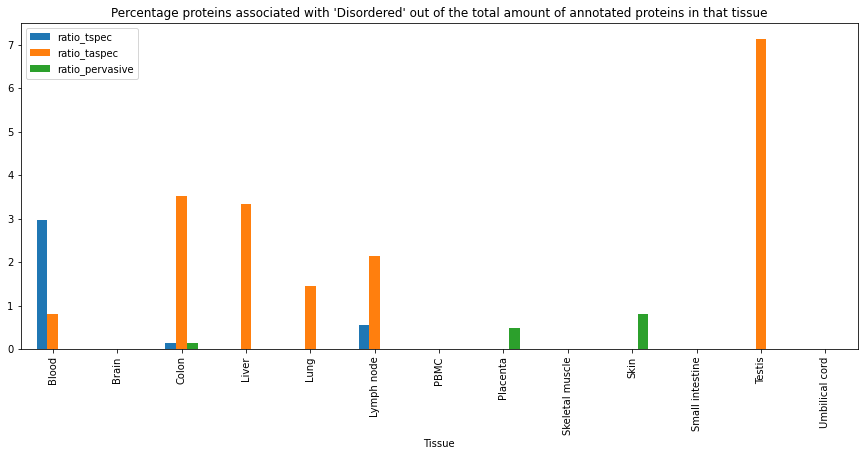

In [287]:
df_disordered_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Disordered")|df_types_tissue.columns.str.contains("Tissue"))]
df_disordered_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_disordered_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_disordered_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_disordered_tissue = df_disordered_tissue[(df_disordered_tissue["Total_tspec"]>=25)|(df_disordered_tissue["Total_taspec"]>=25)|(df_disordered_tissue["Total_pervasive"]>=25)]
df_disordered_tissue["ratio_tspec"] = df_disordered_tissue["Disordered_tspec"]*100/df_disordered_tissue["Total_tspec"]
df_disordered_tissue["ratio_taspec"] = df_disordered_tissue["Disordered_taspec"]*100/df_disordered_tissue["Total_taspec"]
df_disordered_tissue["ratio_pervasive"] = df_disordered_tissue["Disordered_pervasive"]*100/df_disordered_tissue["Total_pervasive"]

df_disordered_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Disordered' out of the total amount of annotated proteins in that tissue")

In [288]:
df_disordered_tissue

Tissue  Disordered_tspec  Disordered_taspec  \
2             Blood                 7                  2   
4             Brain                 0                  0   
8             Colon                 1                 21   
16            Liver                 0                  1   
17             Lung                 0                  2   
18       Lymph node                 3                  5   
27             PBMC                 0                  0   
29         Placenta                 0                  0   
30  Skeletal muscle                 0                  0   
31             Skin                 0                  0   
32  Small intestine                 0                  0   
35           Testis                 0                  1   
37   Umbilical cord                 0                  0   

    Disordered_pervasive  Total_tspec  Total_taspec  Total_pervasive  \
2                      0          235           247              193   
4                      0            8            23               45   
8                      1          705           596              683   
16                     0           27            30               43   
17                     0          358           137              171   
18                     0          540           232              233   
27                     0          126           158              282   
29                     1          394           105              204   
30                     0          224            14               83   
31                     2           76           114              247   
32                     0           66            15               36   
35                     0          154            14               59   
37                     0           23            10               30   

    ratio_tspec  ratio_taspec  ratio_pervasive  
2      2.978723      0.809717         0.000000  
4      0.000000      0.000000         0.000000  
8      0.141844      3.523490         0.146413  
16     0.000000      3.333333         0.000000  
17     0.000000      1.459854         0.000000  
18     0.555556      2.155172         0.000000  
27     0.000000      0.000000         0.000000  
29     0.000000      0.000000         0.490196  
30     0.000000      0.000000         0.000000  
31     0.000000      0.000000         0.809717  
32     0.000000      0.000000         0.000000  
35     0.000000      7.142857         0.000000  
37     0.000000      0.000000         0.000000

C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3844705944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\55/ipykernel_21216/3844705944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
C:\Users\hannedvo\AppData\Local\Temp\5

<AxesSubplot:title={'center':"Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue"}, xlabel='Tissue'>

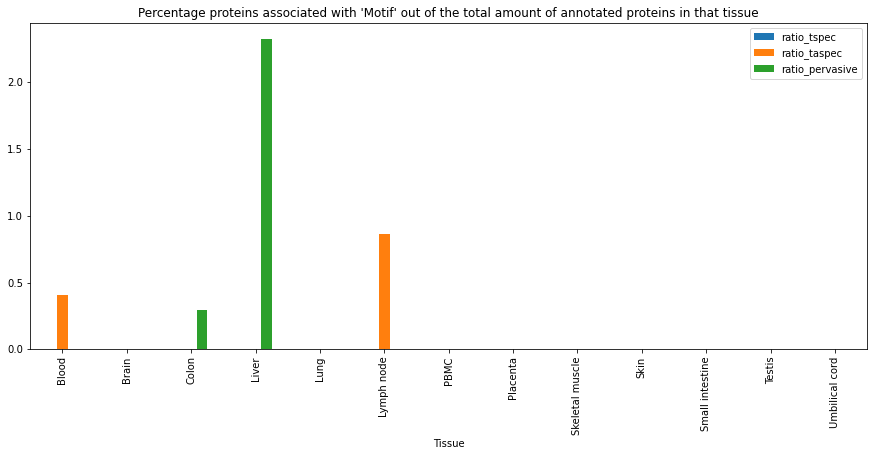

In [289]:
df_motif_tissue = df_types_tissue.loc[:,( df_types_tissue.columns.str.contains("Motif")|df_types_tissue.columns.str.contains("Tissue"))]
df_motif_tissue["Total_tspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("tspec"))].sum(axis=1)
df_motif_tissue["Total_taspec"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("taspec"))].sum(axis=1)
df_motif_tissue["Total_pervasive"] = df_types_tissue.loc[:, (df_types_tissue.columns.str.contains("pervasive"))].sum(axis=1)
df_motif_tissue = df_motif_tissue[(df_motif_tissue["Total_tspec"]>=25)|(df_motif_tissue["Total_taspec"]>=25)|(df_motif_tissue["Total_pervasive"]>=25)]
df_motif_tissue["ratio_tspec"] = df_motif_tissue["Motif_tspec"]*100/df_motif_tissue["Total_tspec"]
df_motif_tissue["ratio_taspec"] = df_motif_tissue["Motif_taspec"]*100/df_motif_tissue["Total_taspec"]
df_motif_tissue["ratio_pervasive"] = df_motif_tissue["Motif_pervasive"]*100/df_motif_tissue["Total_pervasive"]

df_motif_tissue[["Tissue", "ratio_tspec", "ratio_taspec", "ratio_pervasive"]].plot(kind="bar", x="Tissue", figsize=(15,6), title="Percentage proteins associated with 'Motif' out of the total amount of annotated proteins in that tissue")

In [290]:
df_motif_tissue

Tissue  Motif_tspec  Motif_taspec  Motif_pervasive  Total_tspec  \
2             Blood            0             1                0          235   
4             Brain            0             0                0            8   
8             Colon            0             0                2          705   
16            Liver            0             0                1           27   
17             Lung            0             0                0          358   
18       Lymph node            0             2                0          540   
27             PBMC            0             0                0          126   
29         Placenta            0             0                0          394   
30  Skeletal muscle            0             0                0          224   
31             Skin            0             0                0           76   
32  Small intestine            0             0                0           66   
35           Testis            0             0                0          154   
37   Umbilical cord            0             0                0           23   

    Total_taspec  Total_pervasive  ratio_tspec  ratio_taspec  ratio_pervasive  
2            247              193          0.0      0.404858         0.000000  
4             23               45          0.0      0.000000         0.000000  
8            596              683          0.0      0.000000         0.292826  
16            30               43          0.0      0.000000         2.325581  
17           137              171          0.0      0.000000         0.000000  
18           232              233          0.0      0.862069         0.000000  
27           158              282          0.0      0.000000         0.000000  
29           105              204          0.0      0.000000         0.000000  
30            14               83          0.0      0.000000         0.000000  
31           114              247          0.0      0.000000         0.000000  
32            15               36          0.0      0.000000         0.000000  
35            14               59          0.0      0.000000         0.000000  
37            10               30          0.0      0.000000         0.000000

## 8.2 Domain names

<AxesSubplot:title={'center':'Number of tissue-specific phosphosites on proteins of any of the three categories in a type of domain'}, xlabel='hmm name'>

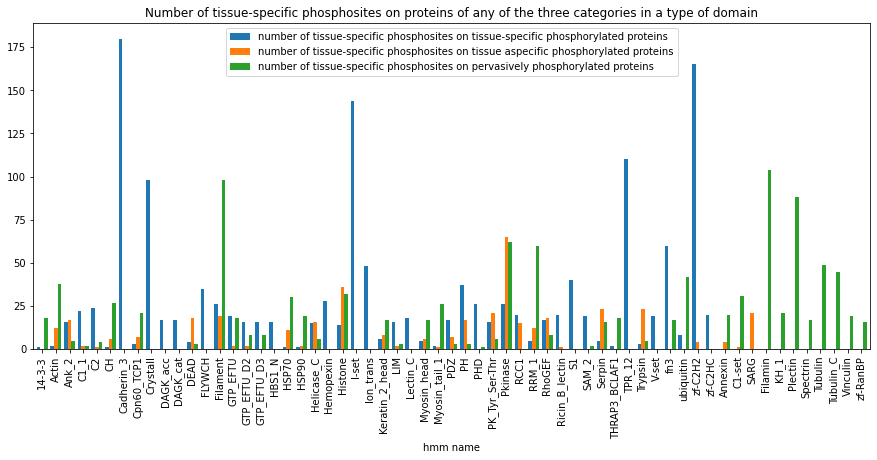

In [291]:
tspec_proteins_pfam_hmm_name = tspecsites_tspecproteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
tspec_proteins_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins"}, inplace=True, )
tspec_proteins_pfam_hmm_name.set_index("hmm name", inplace=True)
taspec_proteins_pfam_hmm_name = tspecsites_taspecproteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
taspec_proteins_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins"}, inplace=True)
taspec_proteins_pfam_hmm_name.set_index("hmm name", inplace=True)
gen_proteins_pfam_hmm_name = tspecsites_genproteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].count()
gen_proteins_pfam_hmm_name.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites on pervasively phosphorylated proteins"}, inplace=True)
gen_proteins_pfam_hmm_name.set_index("hmm name", inplace=True)

pfam_hmm_name = pd.concat([tspec_proteins_pfam_hmm_name, taspec_proteins_pfam_hmm_name, gen_proteins_pfam_hmm_name], axis=1)

pfam_hmm_name[(pfam_hmm_name["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins"]>15)|
             (pfam_hmm_name["number of tissue-specific phosphosites on tissue aspecific phosphorylated proteins"]>15)|
             (pfam_hmm_name["number of tissue-specific phosphosites on pervasively phosphorylated proteins"]>15)].plot(kind="bar", figsize=(15,6), width=0.8, title="Number of tissue-specific phosphosites on proteins of any of the three categories in a type of domain")

## 8.3 Clans

<AxesSubplot:title={'center':'Number of phosphosites in a domain in the indicated clan'}, xlabel='clan'>

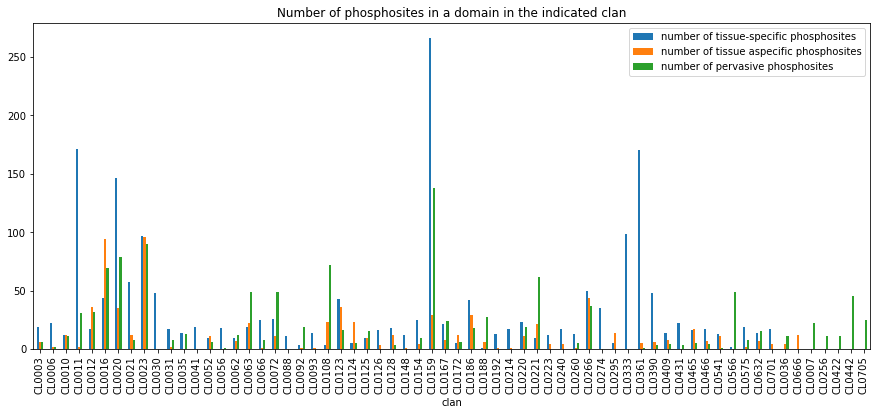

In [292]:
tspec_proteins_pfam_clan = tspecsites_tspecproteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].count()
tspec_proteins_pfam_clan.rename(columns ={"ACC_ID": "number of tissue-specific phosphosites"}, inplace=True, )
tspec_proteins_pfam_clan.set_index("clan", inplace=True)
taspec_proteins_pfam_clan = tspecsites_taspecproteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].count()
taspec_proteins_pfam_clan.rename(columns ={"ACC_ID": "number of tissue aspecific phosphosites"}, inplace=True)
taspec_proteins_pfam_clan.set_index("clan", inplace=True)
gen_proteins_pfam_clan = tspecsites_genproteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].count()
gen_proteins_pfam_clan.rename(columns ={"ACC_ID": "number of pervasive phosphosites"}, inplace=True)
gen_proteins_pfam_clan.set_index("clan", inplace=True)

pfam_clan = pd.concat([tspec_proteins_pfam_clan, taspec_proteins_pfam_clan, gen_proteins_pfam_clan], axis=1)

pfam_clan[(pfam_clan["number of tissue-specific phosphosites"]>10)|
             (pfam_clan["number of tissue aspecific phosphosites"]>10)|
             (pfam_clan["number of pervasive phosphosites"]>10)].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), title="Number of phosphosites in a domain in the indicated clan")

In [293]:
df_clan_tspec_Blood = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Blood"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_clan_tspec_Blood["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Blood"]==1, :]["ACC_ID"].count()
df_clan_tspec_Blood["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"] = df_clan_tspec_Blood["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"]*100/df_clan_tspec_Blood["Total"]
df_clan_tspec_Blood.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_clan_tspec_Blood.set_index(["clan"], inplace=True)
df_clan_tspec_Colon = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Colon"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_clan_tspec_Colon["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Colon"]==1, :]["ACC_ID"].count()
df_clan_tspec_Colon["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"] = df_clan_tspec_Colon["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"]*100/df_clan_tspec_Colon["Total"]
df_clan_tspec_Colon.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_clan_tspec_Colon.set_index(["clan"], inplace=True)
df_clan_tspec_Liver = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Liver"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_clan_tspec_Liver["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Liver"]==1, :]["ACC_ID"].count()
df_clan_tspec_Liver["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"] = df_clan_tspec_Liver["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"]*100/df_clan_tspec_Liver["Total"]
df_clan_tspec_Liver.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_clan_tspec_Liver.set_index(["clan"], inplace=True)
df_clan_tspec_Lung = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lung"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_clan_tspec_Lung["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lung"]==1, :]["ACC_ID"].count()
df_clan_tspec_Lung["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"] = df_clan_tspec_Lung["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"]*100/df_clan_tspec_Lung["Total"]
df_clan_tspec_Lung.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lung.set_index(["clan"], inplace=True)
df_clan_tspec_Lymph_node = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lymph node"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_clan_tspec_Lymph_node["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Lymph node"]==1, :]["ACC_ID"].count()
df_clan_tspec_Lymph_node["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"] = df_clan_tspec_Lymph_node["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"]*100/df_clan_tspec_Lymph_node["Total"]
df_clan_tspec_Lymph_node.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_tspec_Lymph_node.set_index(["clan"], inplace=True)
df_clan_tspec_PBMC = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["PBMC"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_clan_tspec_PBMC["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["PBMC"]==1, :]["ACC_ID"].count()
df_clan_tspec_PBMC["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"] = df_clan_tspec_PBMC["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"]*100/df_clan_tspec_PBMC["Total"]
df_clan_tspec_PBMC.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_clan_tspec_PBMC.set_index(["clan"], inplace=True)
df_clan_tspec_Placenta = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_clan_tspec_Placenta["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Placenta"]==1, :]["ACC_ID"].count()
df_clan_tspec_Placenta["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"] = df_clan_tspec_Placenta["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"]*100/df_clan_tspec_Placenta["Total"]
df_clan_tspec_Placenta.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_clan_tspec_Placenta.set_index(["clan"], inplace=True)
df_clan_tspec_Skeletal_muscle = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skeletal muscle"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_tspec_Skeletal_muscle["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skeletal muscle"]==1, :]["ACC_ID"].count()
df_clan_tspec_Skeletal_muscle["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"] = df_clan_tspec_Skeletal_muscle["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"]*100/df_clan_tspec_Skeletal_muscle["Total"]
df_clan_tspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_tspec_Skeletal_muscle.set_index(["clan"], inplace=True)
df_clan_tspec_Skin = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skin"]==1, :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_clan_tspec_Skin["Total"] = tspecsites_tspecproteins_pfam.loc[tspecsites_tspecproteins_pfam["Skin"]==1, :]["ACC_ID"].count()
df_clan_tspec_Skin["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"] = df_clan_tspec_Skin["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"]*100/df_clan_tspec_Skin["Total"]
df_clan_tspec_Skin.drop(["number of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_clan_tspec_Skin.set_index(["clan"], inplace=True)

In [294]:
df_clan_tspec_all = pd.concat([df_clan_tspec_Blood, df_clan_tspec_Colon, 
                               df_clan_tspec_Liver, df_clan_tspec_Lung, df_clan_tspec_Lymph_node, df_clan_tspec_PBMC,
                               df_clan_tspec_Placenta,
                               df_clan_tspec_Skeletal_muscle, df_clan_tspec_Skin], axis=1)
df_clan_tspec_all.dropna(axis=1, how="all", inplace=True)
df_clan_tspec_all

ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)  \
clan                                                                                               
CL0011                                           4.680851                                          
CL0012                                           0.425532                                          
CL0016                                           2.553191                                          
CL0020                                           3.829787                                          
CL0023                                           0.851064                                          
...                                                   ...                                          
CL0174                                                NaN                                          
CL0188                                                NaN                                          
CL0226                                                NaN                                          
CL0408                                                NaN                                          
CL0600                                                NaN                                          

        ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)  \
clan                                                                                               
CL0011                                                NaN                                          
CL0012                                           0.283688                                          
CL0016                                           0.709220                                          
CL0020                                           0.851064                                          
CL0023                                           7.234043                                          
...                                                   ...                                          
CL0174                                                NaN                                          
CL0188                                                NaN                                          
CL0226                                                NaN                                          
CL0408                                                NaN                                          
CL0600                                                NaN                                          

        ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)  \
clan                                                                                               
CL0011                                                NaN                                          
CL0012                                                NaN                                          
CL0016                                                NaN                                          
CL0020                                                NaN                                          
CL0023                                           3.703704                                          
...                                                   ...                                          
CL0174                                                NaN                                          
CL0188                                                NaN                                          
CL0226                                                NaN                                          
CL0408                                                NaN                                          
CL0600                                                NaN                                          

        ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)  \
clan  

<AxesSubplot:xlabel='clan'>

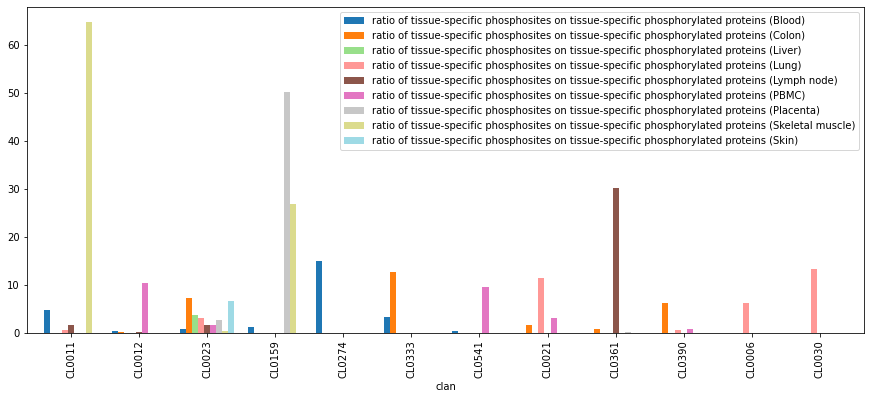

In [295]:
df_clan_tspec_all[(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Blood)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Colon)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Liver)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lung)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Lymph node)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (PBMC)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Placenta)"].std()))|
                  (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skeletal muscle)"].std()))|
                 (df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"]>(df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"].mean()+df_clan_tspec_all["ratio of tissue-specific phosphosites on tissue-specific phosphorylated proteins (Skin)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

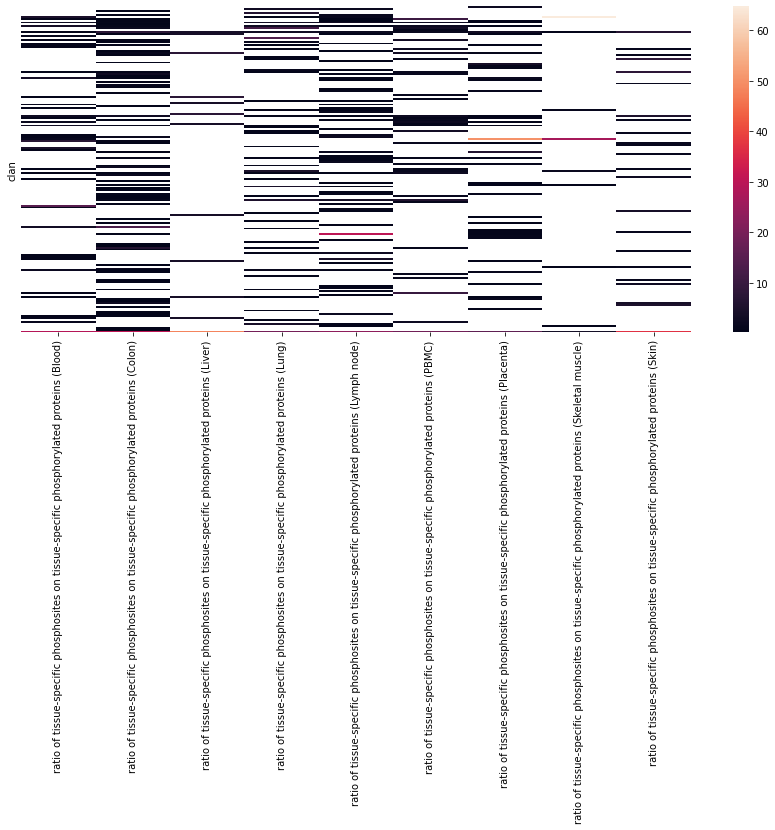

In [296]:
df_clan_tspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_tspec_all, yticklabels=False)
plt.show()

In [297]:
df_clan_taspec_Blood = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Blood", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_taspec_Blood["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Blood", :]["ACC_ID"].count()
df_clan_taspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_clan_taspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_clan_taspec_Blood["Total"]
df_clan_taspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_clan_taspec_Blood.set_index(["clan"], inplace=True)
df_clan_taspec_Colon = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Colon", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_taspec_Colon["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Colon", :]["ACC_ID"].count()
df_clan_taspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_clan_taspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_clan_taspec_Colon["Total"]
df_clan_taspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_clan_taspec_Colon.set_index(["clan"], inplace=True)
df_clan_taspec_Liver = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Liver", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_taspec_Liver["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Liver", :]["ACC_ID"].count()
df_clan_taspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_clan_taspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_clan_taspec_Liver["Total"]
df_clan_taspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_clan_taspec_Liver.set_index(["clan"], inplace=True)
df_clan_taspec_Lung = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lung", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_taspec_Lung["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lung", :]["ACC_ID"].count()
df_clan_taspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_clan_taspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_clan_taspec_Lung["Total"]
df_clan_taspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lung.set_index(["clan"], inplace=True)
df_clan_taspec_Lymph_node = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_taspec_Lymph_node["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lymph node", :]["ACC_ID"].count()
df_clan_taspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_clan_taspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_clan_taspec_Lymph_node["Total"]
df_clan_taspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_taspec_Lymph_node.set_index(["clan"], inplace=True)
df_clan_taspec_PBMC = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="PBMC", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_taspec_PBMC["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="PBMC", :]["ACC_ID"].count()
df_clan_taspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_clan_taspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_clan_taspec_PBMC["Total"]
df_clan_taspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_clan_taspec_PBMC.set_index(["clan"], inplace=True)
df_clan_taspec_Placenta = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_taspec_Placenta["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :]["ACC_ID"].count()
df_clan_taspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_taspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_taspec_Placenta["Total"]
df_clan_taspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_taspec_Placenta.set_index(["clan"], inplace=True)
df_clan_taspec_Skeletal_muscle = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_taspec_Skeletal_muscle["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skeletal muscle", :]["ACC_ID"].count()
df_clan_taspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_clan_taspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_clan_taspec_Skeletal_muscle["Total"]
df_clan_taspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_taspec_Skeletal_muscle.set_index(["clan"], inplace=True)
df_clan_taspec_Skin = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skin", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_taspec_Skin["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skin", :]["ACC_ID"].count()
df_clan_taspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_clan_taspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_clan_taspec_Skin["Total"]
df_clan_taspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_clan_taspec_Skin.set_index(["clan"], inplace=True)

In [298]:
df_clan_taspec_all = pd.concat([df_clan_taspec_Blood, df_clan_taspec_Colon,
                                df_clan_taspec_Liver, df_clan_taspec_Lung, df_clan_taspec_Lymph_node,
                              df_clan_taspec_PBMC, df_clan_taspec_Placenta, df_clan_taspec_Skeletal_muscle,
                               df_clan_taspec_Skin, ], axis=1)
df_clan_taspec_all

ratio of tissue-specific phosphosites (Blood)  \
clan                                                    
CL0003                                       0.809717   
CL0004                                       1.214575   
CL0005                                       0.404858   
CL0015                                       0.404858   
CL0016                                       4.048583   
...                                               ...   
CL0492                                            NaN   
CL0575                                            NaN   
CL0588                                            NaN   
CL0666                                            NaN   
CL0721                                            NaN   

        ratio of tissue-specific phosphosites (Colon)  \
clan                                                    
CL0003                                       0.167785   
CL0004                                       0.671141   
CL0005                                       0.167785   
CL0015                                       0.167785   
CL0016                                       7.550336   
...                                               ...   
CL0492                                            NaN   
CL0575                                            NaN   
CL0588                                            NaN   
CL0666                                            NaN   
CL0721                                            NaN   

        ratio of tissue-specific phosphosites (Liver)  \
clan                                                    
CL0003                                            NaN   
CL0004                                            NaN   
CL0005                                            NaN   
CL0015                                            NaN   
CL0016                                       6.666667   
...                                               ...   
CL0492                                            NaN   
CL0575                                            NaN   
CL0588                                            NaN   
CL0666                                            NaN   
CL0721                                            NaN   

        ratio of tissue-specific phosphosites (Lung)  \
clan                                                   
CL0003                                           NaN   
CL0004                                      0.729927   
CL0005                                           NaN   
CL0015                                      0.729927   
CL0016                                     11.678832   
...                                              ...   
CL0492                                           NaN   
CL0575                                           NaN   
CL0588                                           NaN   
CL0666                                           NaN   
CL0721                                           NaN   

        ratio of tissue-specific phosphosites (Lymph node)  \
clan                                                         
CL0003                                           1.293103    
CL0004                                                NaN    
CL0005                                                NaN    
CL0015                                                NaN    
CL0016                                           5.172414    
...                                                   ...    
CL0492                                                NaN    
CL0575                                                NaN    
CL0588                                                NaN    
CL0666                                                NaN    
CL0721                                                NaN    

        ratio of tissue-specific phosphosites (PBMC)  \
clan                                                   
CL0003                                           NaN   
CL0004                                           NaN   
CL0005                

<AxesSubplot:xlabel='clan'>

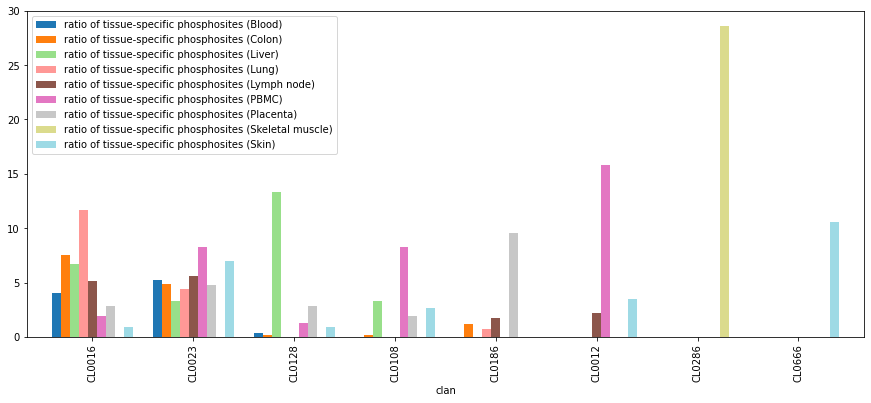

In [299]:
df_clan_taspec_all[(df_clan_taspec_all["ratio of tissue-specific phosphosites (Blood)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Blood)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Blood)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Colon)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Colon)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Colon)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Liver)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Liver)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Liver)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Lung)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Lung)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Lung)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Lymph node)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Lymph node)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Lymph node)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (PBMC)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (PBMC)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (PBMC)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Placenta)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Placenta)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Placenta)"].std()))|
                  (df_clan_taspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].std()))|
                 (df_clan_taspec_all["ratio of tissue-specific phosphosites (Skin)"]>(df_clan_taspec_all["ratio of tissue-specific phosphosites (Skin)"].mean()+df_clan_taspec_all["ratio of tissue-specific phosphosites (Skin)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8)

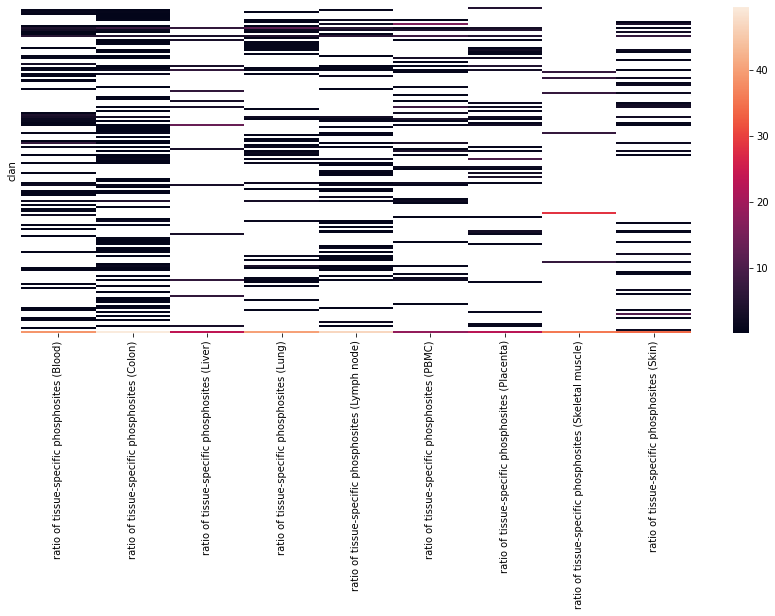

In [300]:
df_clan_taspec_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_taspec_all, yticklabels=False)
plt.show()

In [301]:
df_clan_gen_Blood = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Blood", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_clan_gen_Blood["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Blood", :]["ACC_ID"].count()
df_clan_gen_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_clan_gen_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_clan_gen_Blood["Total"]
df_clan_gen_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_clan_gen_Blood.set_index(["clan"], inplace=True)
df_clan_gen_Colon = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Colon", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_clan_gen_Colon["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Colon", :]["ACC_ID"].count()
df_clan_gen_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_clan_gen_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_clan_gen_Colon["Total"]
df_clan_gen_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_clan_gen_Colon.set_index(["clan"], inplace=True)
df_clan_gen_Liver = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Liver", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_clan_gen_Liver["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Liver", :]["ACC_ID"].count()
df_clan_gen_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_clan_gen_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_clan_gen_Liver["Total"]
df_clan_gen_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_clan_gen_Liver.set_index(["clan"], inplace=True)
df_clan_gen_Lung = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lung", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_clan_gen_Lung["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lung", :]["ACC_ID"].count()
df_clan_gen_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_clan_gen_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_clan_gen_Lung["Total"]
df_clan_gen_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_clan_gen_Lung.set_index(["clan"], inplace=True)
df_clan_gen_Lymph_node = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_clan_gen_Lymph_node["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lymph node", :]["ACC_ID"].count()
df_clan_gen_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_clan_gen_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_clan_gen_Lymph_node["Total"]
df_clan_gen_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_clan_gen_Lymph_node.set_index(["clan"], inplace=True)
df_clan_gen_PBMC = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="PBMC", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_clan_gen_PBMC["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="PBMC", :]["ACC_ID"].count()
df_clan_gen_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_clan_gen_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_clan_gen_PBMC["Total"]
df_clan_gen_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_clan_gen_PBMC.set_index(["clan"], inplace=True)
df_clan_gen_Placenta = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_clan_gen_Placenta["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :]["ACC_ID"].count()
df_clan_gen_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_clan_gen_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_clan_gen_Placenta["Total"]
df_clan_gen_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_clan_gen_Placenta.set_index(["clan"], inplace=True)
df_clan_gen_Skeletal_muscle = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_clan_gen_Skeletal_muscle["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skeletal muscle", :]["ACC_ID"].count()
df_clan_gen_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_clan_gen_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_clan_gen_Skeletal_muscle["Total"]
df_clan_gen_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_clan_gen_Skeletal_muscle.set_index(["clan"], inplace=True)
df_clan_gen_Skin = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skin", :].groupby(["clan"], as_index=False)["ACC_ID"].count()
df_clan_gen_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_clan_gen_Skin["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skin", :]["ACC_ID"].count()
df_clan_gen_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_clan_gen_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_clan_gen_Skin["Total"]
df_clan_gen_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_clan_gen_Skin.set_index(["clan"], inplace=True)

In [302]:
df_clan_gen_all = pd.concat([df_clan_gen_Blood, df_clan_gen_Colon,
                                df_clan_gen_Liver, df_clan_gen_Lung, df_clan_gen_Lymph_node,
                            df_clan_gen_PBMC, df_clan_gen_Placenta, df_clan_gen_Skeletal_muscle,
                               df_clan_gen_Skin], axis=1)
df_clan_gen_all

ratio of tissue-specific phosphosites (Blood)  \
clan                                                    
CL0001                                       0.518135   
CL0006                                       1.036269   
CL0011                                       0.518135   
CL0016                                      11.917098   
CL0020                                       1.554404   
...                                               ...   
CL0139                                            NaN   
CL0311                                            NaN   
CL0448                                            NaN   
CL0547                                            NaN   
CL0591                                            NaN   

        ratio of tissue-specific phosphosites (Colon)  \
clan                                                    
CL0001                                            NaN   
CL0006                                            NaN   
CL0011                                            NaN   
CL0016                                       2.489019   
CL0020                                       4.538799   
...                                               ...   
CL0139                                            NaN   
CL0311                                            NaN   
CL0448                                            NaN   
CL0547                                            NaN   
CL0591                                            NaN   

        ratio of tissue-specific phosphosites (Liver)  \
clan                                                    
CL0001                                            NaN   
CL0006                                            NaN   
CL0011                                            NaN   
CL0016                                            NaN   
CL0020                                       4.651163   
...                                               ...   
CL0139                                            NaN   
CL0311                                            NaN   
CL0448                                            NaN   
CL0547                                            NaN   
CL0591                                            NaN   

        ratio of tissue-specific phosphosites (Lung)  \
clan                                                   
CL0001                                           NaN   
CL0006                                           NaN   
CL0011                                      1.754386   
CL0016                                      3.508772   
CL0020                                      1.754386   
...                                              ...   
CL0139                                           NaN   
CL0311                                           NaN   
CL0448                                           NaN   
CL0547                                           NaN   
CL0591                                           NaN   

        ratio of tissue-specific phosphosites (Lymph node)  \
clan                                                         
CL0001                                                NaN    
CL0006                                                NaN    
CL0011                                                NaN    
CL0016                                           3.004292    
CL0020                                           2.145923    
...                                                   ...    
CL0139                                                NaN    
CL0311                                                NaN    
CL0448                                                NaN    
CL0547                                                NaN    
CL0591                                                NaN    

        ratio of tissue-specific phosphosites (PBMC)  \
clan                                                   
CL0001                                           NaN   
CL0006                                           NaN   
CL0011                

<AxesSubplot:title={'center':'Number of tissue-specific phosphosites'}, xlabel='clan'>

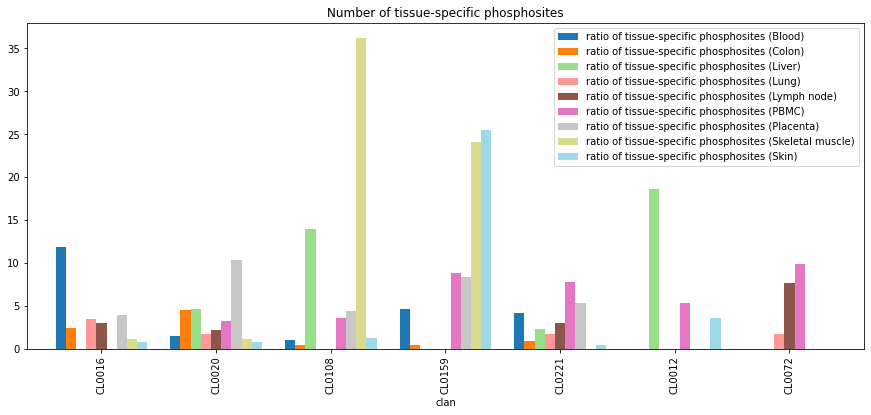

In [303]:
df_clan_gen_all[(df_clan_gen_all["ratio of tissue-specific phosphosites (Blood)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Blood)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Blood)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Colon)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Colon)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Colon)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Liver)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Liver)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Liver)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Lung)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Lung)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Lung)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Lymph node)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Lymph node)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Lymph node)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (PBMC)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (PBMC)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (PBMC)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Placenta)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Placenta)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Placenta)"].std()))|
                  (df_clan_gen_all["ratio of tissue-specific phosphosites (Skeletal muscle)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Skeletal muscle)"].std()))|
                 (df_clan_gen_all["ratio of tissue-specific phosphosites (Skin)"]>(df_clan_gen_all["ratio of tissue-specific phosphosites (Skin)"].mean()+df_clan_gen_all["ratio of tissue-specific phosphosites (Skin)"].std()))].drop(["No_clan"]).plot(kind="bar", figsize=(15,6), colormap="tab20", width=0.8, title="Number of tissue-specific phosphosites")

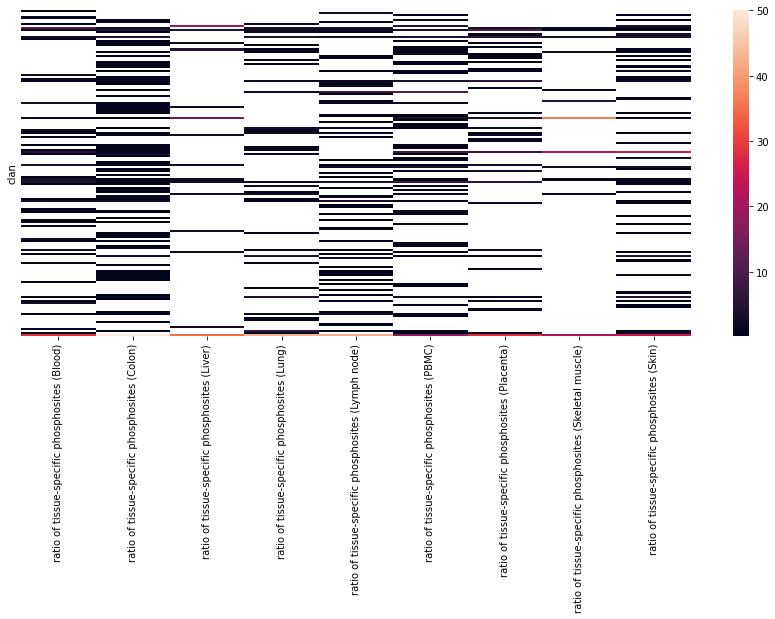

In [304]:
df_clan_gen_all.sort_values(["clan"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_clan_gen_all, yticklabels=False)
plt.show()

## 8.4 Domain names

In [305]:
df_hmm_name_tspec_Blood = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites (Blood)"}, inplace=True, axis=1)
df_hmm_name_tspec_Blood["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Blood"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Blood["ratio of tissue-specific phosphosites (Blood)"] = df_hmm_name_tspec_Blood["number of tissue-specific phosphosites (Blood)"]*100/df_hmm_name_tspec_Blood["Total"]
df_hmm_name_tspec_Blood.drop(["number of tissue-specific phosphosites (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Blood.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Colon = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites (Colon)"}, inplace=True, axis=1)
df_hmm_name_tspec_Colon["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Colon"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Colon["ratio of tissue-specific phosphosites (Colon)"] = df_hmm_name_tspec_Colon["number of tissue-specific phosphosites (Colon)"]*100/df_hmm_name_tspec_Colon["Total"]
df_hmm_name_tspec_Colon.drop(["number of tissue-specific phosphosites (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Colon.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Liver = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites (Liver)"}, inplace=True, axis=1)
df_hmm_name_tspec_Liver["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Liver"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Liver["ratio of tissue-specific phosphosites (Liver)"] = df_hmm_name_tspec_Liver["number of tissue-specific phosphosites (Liver)"]*100/df_hmm_name_tspec_Liver["Total"]
df_hmm_name_tspec_Liver.drop(["number of tissue-specific phosphosites (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Liver.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Lung = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites (Lung)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lung["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lung"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Lung["ratio of tissue-specific phosphosites (Lung)"] = df_hmm_name_tspec_Lung["number of tissue-specific phosphosites (Lung)"]*100/df_hmm_name_tspec_Lung["Total"]
df_hmm_name_tspec_Lung.drop(["number of tissue-specific phosphosites (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lung.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Lymph_node = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_tspec_Lymph_node["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Lymph node"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Lymph_node["ratio of tissue-specific phosphosites (Lymph node)"] = df_hmm_name_tspec_Lymph_node["number of tissue-specific phosphosites (Lymph node)"]*100/df_hmm_name_tspec_Lymph_node["Total"]
df_hmm_name_tspec_Lymph_node.drop(["number of tissue-specific phosphosites (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Lymph_node.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_PBMC = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites (PBMC)"}, inplace=True, axis=1)
df_hmm_name_tspec_PBMC["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["PBMC"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_PBMC["ratio of tissue-specific phosphosites (PBMC)"] = df_hmm_name_tspec_PBMC["number of tissue-specific phosphosites (PBMC)"]*100/df_hmm_name_tspec_PBMC["Total"]
df_hmm_name_tspec_PBMC.drop(["number of tissue-specific phosphosites (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_PBMC.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Placenta = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites (Placenta)"}, inplace=True, axis=1)
df_hmm_name_tspec_Placenta["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Placenta"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Placenta["ratio of tissue-specific phosphosites (Placenta)"] = df_hmm_name_tspec_Placenta["number of tissue-specific phosphosites (Placenta)"]*100/df_hmm_name_tspec_Placenta["Total"]
df_hmm_name_tspec_Placenta.drop(["number of tissue-specific phosphosites (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Placenta.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Skeletal_muscle = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_tspec_Skeletal_muscle["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skeletal muscle"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Skeletal_muscle["ratio of tissue-specific phosphosites (Skeletal muscle)"] = df_hmm_name_tspec_Skeletal_muscle["number of tissue-specific phosphosites (Skeletal muscle)"]*100/df_hmm_name_tspec_Skeletal_muscle["Total"]
df_hmm_name_tspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Skeletal_muscle.set_index(["hmm name"], inplace=True)
df_hmm_name_tspec_Skin = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites (Skin)"}, inplace=True, axis=1)
df_hmm_name_tspec_Skin["Total"] = tspec_sites_pfam.loc[tspec_sites_pfam["Skin"]==1, :]["ACC_ID"].count()
df_hmm_name_tspec_Skin["ratio of tissue-specific phosphosites (Skin)"] = df_hmm_name_tspec_Skin["number of tissue-specific phosphosites (Skin)"]*100/df_hmm_name_tspec_Skin["Total"]
df_hmm_name_tspec_Skin.drop(["number of tissue-specific phosphosites (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_tspec_Skin.set_index(["hmm name"], inplace=True)

In [306]:
df_hmm_name_tspec_all = pd.concat([df_hmm_name_tspec_Blood, df_hmm_name_tspec_Colon, 
                               df_hmm_name_tspec_Liver, df_hmm_name_tspec_Lung, df_hmm_name_tspec_Lymph_node, 
                                   df_hmm_name_tspec_PBMC, df_hmm_name_tspec_Placenta,
                               df_hmm_name_tspec_Skeletal_muscle, df_hmm_name_tspec_Skin], axis=1)
df_hmm_name_tspec_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_tspec_all

ratio of tissue-specific phosphosites (Blood)  \
hmm name                                                        
4_1_CTD                                              0.178891   
A2M                                                  0.536673   
A2M_BRD                                              1.073345   
A2M_recep                                            0.536673   
AAA                                                  0.536673   
...                                                       ...   
Vault_4                                                   NaN   
eIF2_C                                                    NaN   
eIF3_N                                                    NaN   
muHD                                                      NaN   
vATP-synt_AC39                                            NaN   

                ratio of tissue-specific phosphosites (Colon)  \
hmm name                                                        
4_1_CTD                                              0.185185   
A2M                                                       NaN   
A2M_BRD                                                   NaN   
A2M_recep                                                 NaN   
AAA                                                  0.370370   
...                                                       ...   
Vault_4                                                   NaN   
eIF2_C                                                    NaN   
eIF3_N                                                    NaN   
muHD                                                      NaN   
vATP-synt_AC39                                            NaN   

                ratio of tissue-specific phosphosites (Liver)  \
hmm name                                                        
4_1_CTD                                                   NaN   
A2M                                                       NaN   
A2M_BRD                                                   NaN   
A2M_recep                                                 NaN   
AAA                                                       NaN   
...                                                       ...   
Vault_4                                                   NaN   
eIF2_C                                                    NaN   
eIF3_N                                                    NaN   
muHD                                                      NaN   
vATP-synt_AC39                                            NaN   

                ratio of tissue-specific phosphosites (Lung)  \
hmm name                                                       
4_1_CTD                                                  NaN   
A2M                                                      NaN   
A2M_BRD                                                  NaN   
A2M_recep                                                NaN   
AAA                                                      NaN   
...                                                      ...   
Vault_4                                                  NaN   
eIF2_C                                                   NaN   
eIF3_N                                                   NaN   
muHD                                                     NaN   
vATP-synt_AC39                                           NaN   

                ratio of tissue-specific phosphosites (Lymph node)  \
hmm name                                                             
4_1_CTD                                                   0.91047    
A2M                                                           NaN    
A2M_BRD                                                       NaN    
A2M_recep                                                     NaN    
AAA                                                           NaN    
...                                                           ...    
Vault_4                                                       NaN    
eIF2_C         

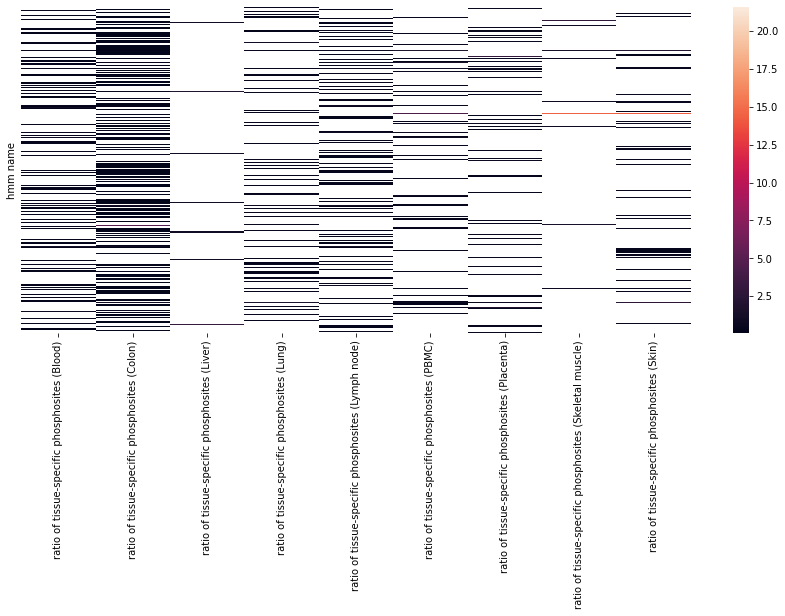

In [307]:
df_hmm_name_tspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_tspec_all, xticklabels=True)
plt.yticks([],[])
plt.show()

In [308]:
df_hmm_name_taspec_Blood = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Blood", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Blood.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_name_taspec_Blood["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Blood", :]["ACC_ID"].count()
df_hmm_name_taspec_Blood["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Blood)"] = df_hmm_name_taspec_Blood["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Blood)"]*100/df_hmm_name_taspec_Blood["Total"]
df_hmm_name_taspec_Blood.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Blood.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Colon = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Colon", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Colon.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_name_taspec_Colon["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Colon", :]["ACC_ID"].count()
df_hmm_name_taspec_Colon["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Colon)"] = df_hmm_name_taspec_Colon["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Colon)"]*100/df_hmm_name_taspec_Colon["Total"]
df_hmm_name_taspec_Colon.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Colon.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Liver = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Liver", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Liver.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_name_taspec_Liver["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Liver", :]["ACC_ID"].count()
df_hmm_name_taspec_Liver["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Liver)"] = df_hmm_name_taspec_Liver["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Liver)"]*100/df_hmm_name_taspec_Liver["Total"]
df_hmm_name_taspec_Liver.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Liver.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Lung = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lung", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Lung.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Lung)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lung["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lung", :]["ACC_ID"].count()
df_hmm_name_taspec_Lung["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Lung)"] = df_hmm_name_taspec_Lung["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Lung)"]*100/df_hmm_name_taspec_Lung["Total"]
df_hmm_name_taspec_Lung.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lung.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Lymph_node = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Lymph_node.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_taspec_Lymph_node["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Lymph node", :]["ACC_ID"].count()
df_hmm_name_taspec_Lymph_node["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Lymph node)"] = df_hmm_name_taspec_Lymph_node["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Lymph node)"]*100/df_hmm_name_taspec_Lymph_node["Total"]
df_hmm_name_taspec_Lymph_node.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Lymph_node.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_PBMC = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="PBMC", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_PBMC.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_name_taspec_PBMC["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="PBMC", :]["ACC_ID"].count()
df_hmm_name_taspec_PBMC["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (PBMC)"] = df_hmm_name_taspec_PBMC["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (PBMC)"]*100/df_hmm_name_taspec_PBMC["Total"]
df_hmm_name_taspec_PBMC.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_PBMC.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Placenta = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Placenta.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_taspec_Placenta["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Placenta", :]["ACC_ID"].count()
df_hmm_name_taspec_Placenta["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Placenta)"] = df_hmm_name_taspec_Placenta["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Placenta)"]*100/df_hmm_name_taspec_Placenta["Total"]
df_hmm_name_taspec_Placenta.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Placenta.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Skeletal_muscle = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Skeletal_muscle.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_taspec_Skeletal_muscle["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skeletal muscle", :]["ACC_ID"].count()
df_hmm_name_taspec_Skeletal_muscle["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Skeletal muscle)"] = df_hmm_name_taspec_Skeletal_muscle["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Skeletal muscle)"]*100/df_hmm_name_taspec_Skeletal_muscle["Total"]
df_hmm_name_taspec_Skeletal_muscle.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Skeletal_muscle.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Skin = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skin", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Skin.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_name_taspec_Skin["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Skin", :]["ACC_ID"].count()
df_hmm_name_taspec_Skin["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Skin)"] = df_hmm_name_taspec_Skin["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Skin)"]*100/df_hmm_name_taspec_Skin["Total"]
df_hmm_name_taspec_Skin.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Skin.set_index(["hmm name"], inplace=True)
df_hmm_name_taspec_Testis = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Testis", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_taspec_Testis.rename({"ACC_ID": "number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Testis)"}, inplace=True, axis=1)
df_hmm_name_taspec_Testis["Total"] = tspecsites_taspecproteins_pfam.loc[tspecsites_taspecproteins_pfam["tissue_site"]=="Testis", :]["ACC_ID"].count()
df_hmm_name_taspec_Testis["ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Testis)"] = df_hmm_name_taspec_Testis["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Testis)"]*100/df_hmm_name_taspec_Testis["Total"]
df_hmm_name_taspec_Testis.drop(["number of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_taspec_Testis.set_index(["hmm name"], inplace=True)

In [309]:
df_hmm_name_taspec_all = pd.concat([df_hmm_name_taspec_Blood, df_hmm_name_taspec_Colon, 
                               df_hmm_name_taspec_Liver, df_hmm_name_taspec_Lung, df_hmm_name_taspec_Lymph_node, 
                                    df_hmm_name_taspec_PBMC, df_hmm_name_taspec_Placenta,
                               df_hmm_name_taspec_Skeletal_muscle, df_hmm_name_taspec_Skin], axis=1)
df_hmm_name_taspec_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_taspec_all

ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Blood)  \
hmm name                                                                                                
A2M                                                   0.809717                                          
A2M_BRD                                               1.619433                                          
A2M_recep                                             0.809717                                          
AAA                                                   1.214575                                          
AP1AR                                                 0.404858                                          
...                                                        ...                                          
Vault_4                                                    NaN                                          
eIF2_C                                                     NaN                                          
eIF3_N                                                     NaN                                          
ig                                                         NaN                                          
tRNA-synt_2                                                NaN                                          

             ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Colon)  \
hmm name                                                                                                
A2M                                                        NaN                                          
A2M_BRD                                                    NaN                                          
A2M_recep                                                  NaN                                          
AAA                                                   1.006711                                          
AP1AR                                                 0.167785                                          
...                                                        ...                                          
Vault_4                                                    NaN                                          
eIF2_C                                                     NaN                                          
eIF3_N                                                     NaN                                          
ig                                                         NaN                                          
tRNA-synt_2                                                NaN                                          

             ratio of tissue-specific phosphosites on tissue aspecific phsphorylated proteins (Liver)  \
hmm name                                                                                                
A2M                                                        NaN                                          
A2M_BRD                                                    NaN                                          
A2M_recep                                                  NaN                                          
AAA                                                        NaN                                          
AP1AR                                                      NaN                                          
...                                                        ...                                          
Vault_4                                                    NaN                                          
eIF2_C                                                     NaN                                          
eIF3_N                                                     NaN                                          
ig                                                         NaN                                          
tRNA-synt_2          

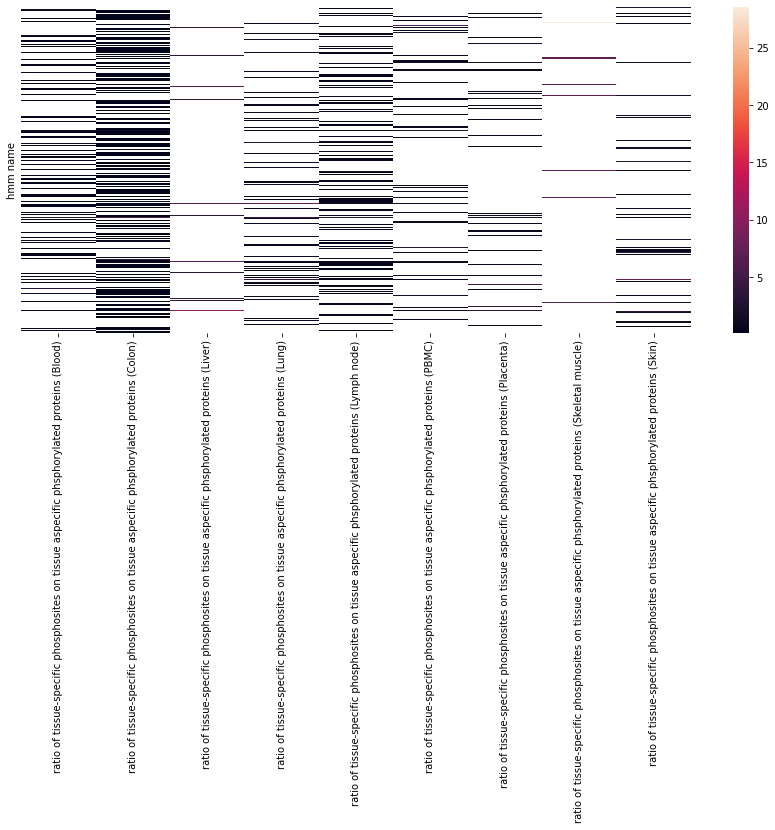

In [310]:
df_hmm_name_taspec_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_taspec_all, yticklabels=False)
plt.show()

In [311]:
df_hmm_name_tgen_Blood = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Blood", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_Blood.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"}, inplace=True, axis=1)
df_hmm_name_tgen_Blood["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Blood", :]["ACC_ID"].count()
df_hmm_name_tgen_Blood["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"] = df_hmm_name_tgen_Blood["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Blood)"]*100/df_hmm_name_tgen_Blood["Total"]
df_hmm_name_tgen_Blood.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Blood)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_Blood.set_index(["hmm name"], inplace=True)
df_hmm_name_tgen_Colon = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Colon", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_Colon.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"}, inplace=True, axis=1)
df_hmm_name_tgen_Colon["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Colon", :]["ACC_ID"].count()
df_hmm_name_tgen_Colon["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"] = df_hmm_name_tgen_Colon["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Colon)"]*100/df_hmm_name_tgen_Colon["Total"]
df_hmm_name_tgen_Colon.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Colon)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_Colon.set_index(["hmm name"], inplace=True)
df_hmm_name_tgen_Liver = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Liver", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_Liver.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"}, inplace=True, axis=1)
df_hmm_name_tgen_Liver["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Liver", :]["ACC_ID"].count()
df_hmm_name_tgen_Liver["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"] = df_hmm_name_tgen_Liver["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Liver)"]*100/df_hmm_name_tgen_Liver["Total"]
df_hmm_name_tgen_Liver.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Liver)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_Liver.set_index(["hmm name"], inplace=True)
df_hmm_name_tgen_Lung = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lung", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_Lung.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"}, inplace=True, axis=1)
df_hmm_name_tgen_Lung["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lung", :]["ACC_ID"].count()
df_hmm_name_tgen_Lung["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"] = df_hmm_name_tgen_Lung["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Lung)"]*100/df_hmm_name_tgen_Lung["Total"]
df_hmm_name_tgen_Lung.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Lung)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_Lung.set_index(["hmm name"], inplace=True)
df_hmm_name_tgen_Lymph_node = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lymph node", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_Lymph_node.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"}, inplace=True, axis=1)
df_hmm_name_tgen_Lymph_node["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Lymph node", :]["ACC_ID"].count()
df_hmm_name_tgen_Lymph_node["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"] = df_hmm_name_tgen_Lymph_node["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)"]*100/df_hmm_name_tgen_Lymph_node["Total"]
df_hmm_name_tgen_Lymph_node.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Lymph node)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_Lymph_node.set_index(["hmm name"], inplace=True)
df_hmm_name_tgen_PBMC = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="PBMC", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_PBMC.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"}, inplace=True, axis=1)
df_hmm_name_tgen_PBMC["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="PBMC", :]["ACC_ID"].count()
df_hmm_name_tgen_PBMC["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"] = df_hmm_name_tgen_PBMC["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)"]*100/df_hmm_name_tgen_PBMC["Total"]
df_hmm_name_tgen_PBMC.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (PBMC)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_PBMC.set_index(["hmm name"], inplace=True)
df_hmm_name_tgen_Placenta = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_Placenta.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"}, inplace=True, axis=1)
df_hmm_name_tgen_Placenta["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Placenta", :]["ACC_ID"].count()
df_hmm_name_tgen_Placenta["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"] = df_hmm_name_tgen_Placenta["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)"]*100/df_hmm_name_tgen_Placenta["Total"]
df_hmm_name_tgen_Placenta.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Placenta)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_Placenta.set_index(["hmm name"], inplace=True)
df_hmm_name_tgen_Skeletal_muscle = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skeletal muscle", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_Skeletal_muscle.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"}, inplace=True, axis=1)
df_hmm_name_tgen_Skeletal_muscle["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skeletal muscle", :]["ACC_ID"].count()
df_hmm_name_tgen_Skeletal_muscle["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"] = df_hmm_name_tgen_Skeletal_muscle["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)"]*100/df_hmm_name_tgen_Skeletal_muscle["Total"]
df_hmm_name_tgen_Skeletal_muscle.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Skeletal muscle)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_Skeletal_muscle.set_index(["hmm name"], inplace=True)
df_hmm_name_tgen_Skin = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skin", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_Skin.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"}, inplace=True, axis=1)
df_hmm_name_tgen_Skin["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Skin", :]["ACC_ID"].count()
df_hmm_name_tgen_Skin["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"] = df_hmm_name_tgen_Skin["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Skin)"]*100/df_hmm_name_tgen_Skin["Total"]
df_hmm_name_tgen_Skin.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Skin)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_Skin.set_index(["hmm name"], inplace=True)
df_hmm_name_tgen_Testis = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Testis", :].groupby(["hmm name"], as_index=False)["ACC_ID"].count()
df_hmm_name_tgen_Testis.rename({"ACC_ID": "number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Testis)"}, inplace=True, axis=1)
df_hmm_name_tgen_Testis["Total"] = tspecsites_genproteins_pfam.loc[tspecsites_genproteins_pfam["tissue_site"]=="Testis", :]["ACC_ID"].count()
df_hmm_name_tgen_Testis["ratio of gentissue-specific phosphosites on pervasively phosphorylated proteins (Testis)"] = df_hmm_name_tgen_Testis["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Testis)"]*100/df_hmm_name_tgen_Testis["Total"]
df_hmm_name_tgen_Testis.drop(["number of gentissue-specific phosphosites on pervasively phosphorylated proteins (Testis)", "Total"], axis=1, inplace=True)
df_hmm_name_tgen_Testis.set_index(["hmm name"], inplace=True)

In [312]:
df_hmm_name_gen_all = pd.concat([df_hmm_name_gen_Blood,df_hmm_name_gen_Colon,
                               df_hmm_name_gen_Liver, df_hmm_name_gen_Lung, df_hmm_name_gen_Lymph_node, 
                                 df_hmm_name_gen_PBMC, df_hmm_name_gen_Placenta,
                               df_hmm_name_gen_Skeletal_muscle, df_hmm_name_gen_Skin], axis=1)
df_hmm_name_gen_all.dropna(axis=1, how="all", inplace=True)
df_hmm_name_gen_all

ratio of tissue-specific phosphosites (Blood)  \
hmm name                                                      
14-3-3                                             0.590717   
4_1_CTD                                            0.084388   
7tm_4                                              0.084388   
AAA                                                0.084388   
AAA_33                                             0.253165   
...                                                     ...   
Tropomodulin                                            NaN   
WD40                                                    NaN   
AD                                                      NaN   
CAP_C                                                   NaN   
fn3                                                     NaN   

              ratio of tissue-specific phosphosites (Colon)  \
hmm name                                                      
14-3-3                                             0.607903   
4_1_CTD                                            0.151976   
7tm_4                                                   NaN   
AAA                                                0.151976   
AAA_33                                             0.151976   
...                                                     ...   
Tropomodulin                                       0.151976   
WD40                                               0.607903   
AD                                                      NaN   
CAP_C                                                   NaN   
fn3                                                     NaN   

              ratio of tissue-specific phosphosites (Liver)  \
hmm name                                                      
14-3-3                                             0.602410   
4_1_CTD                                            0.086059   
7tm_4                                              0.086059   
AAA                                                0.086059   
AAA_33                                             0.258176   
...                                                     ...   
Tropomodulin                                       0.086059   
WD40                                               0.344234   
AD                                                 0.086059   
CAP_C                                                   NaN   
fn3                                                     NaN   

              ratio of tissue-specific phosphosites (Lung)  \
hmm name                                                     
14-3-3                                                 NaN   
4_1_CTD                                                NaN   
7tm_4                                                  NaN   
AAA                                                    NaN   
AAA_33                                             0.21097   
...                                                    ...   
Tropomodulin                                       0.21097   
WD40                                                   NaN   
AD                                                 0.21097   
CAP_C                                                  NaN   
fn3                                                    NaN   

              ratio of tissue-specific phosphosites (Lymph node)  \
hmm name                                                           
14-3-3                                                      NaN    
4_1_CTD                                                     NaN    
7tm_4                                                       NaN    
AAA                                                    0.184843    
AAA_33                                                 0.184843    
...                                                         ...    
Tropomodulin                                           0.184843    
WD40                                                        NaN    
AD                                                     0.184843    

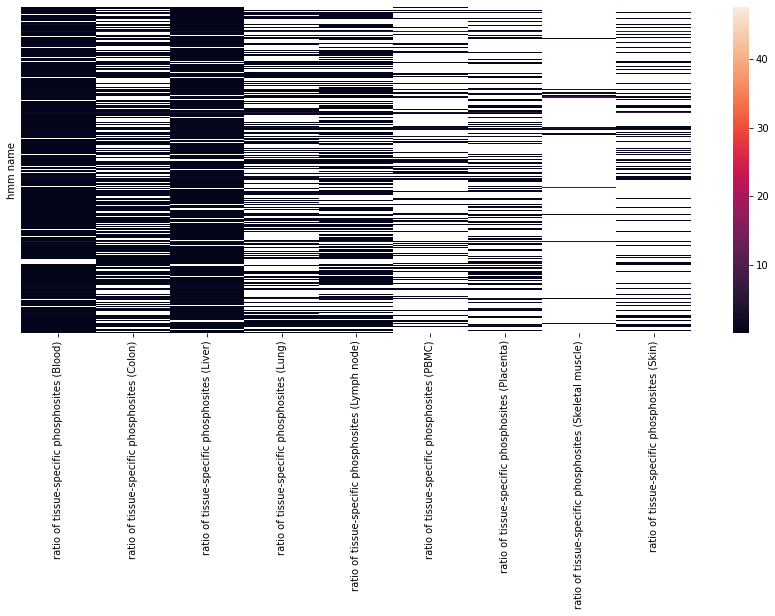

In [313]:
df_hmm_name_gen_all.sort_values(["hmm name"], inplace=True)
plt.figure(figsize=(15,6))
sns.heatmap(df_hmm_name_gen_all, yticklabels=False)
plt.show()

# 9 Comparison of the type of annotation, domain, and clan, for the proteins having tissue-specific phopshosites and pervasive phosphosites with UniProtKB proteins

For this part, we don't take into account whether a phosphosite has been identified insinde the domain or not.

In [314]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
tspec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
tspecsites_tspecproteins = pd.merge(tspec_proteins["ACC_ID"], tspec_sites, on=["ACC_ID"], how="left")
tspecsites_tspecproteins

ACC_ID  UP_POS                                             tissue  \
0     A0A075B6H7      30                                               Lung   
1     A0A075B6S5      52                                    Menstrual fluid   
2     A0A087WXM9     223                                             Testis   
3     A0A0B4J2D5     124                                               PBMC   
4     A0A0B4J2D5     145                                               PBMC   
...          ...     ...                                                ...   
2789      Q9Y6R7    4801  Small intestine,Small intestine,Small intestin...   
2790      Q9Y6R7    5062  Small intestine,Small intestine,Small intestin...   
2791      Q9Y6X8      37  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   
2792      Q9Y6Y8     737                                              Colon   
2793      Q9Y6Y8     926  Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...   

     modres  Adipose tissue  B-cells  Blood  Bone  Brain  Breast  ...  \
0         T               0        0      0     0      0       0  ...   
1         S               0        0      0     0      0       0  ...   
2         S               0        0      0     0      0       0  ...   
3         S               0        0      0     0      0       0  ...   
4         T               0        0      0     0      0       0  ...   
...     ...             ...      ...    ...   ...    ...     ...  ...   
2789      Y               0        0      0     0      0       0  ...   
2790      T               0        0      0     0      0       0  ...   
2791      T               0        0      0     0      0       0  ...   
2792      S               0        0      0     0      0       0  ...   
2793      S               0        0      0     0      0       0  ...   

      Small intestine  Synovial tissue  T-cells  Testis  Tooth  \
0                   0                0        0       0      0   
1                   0                0        0       0      0   
2                   0                0        0       1      0   
3                   0                0        0       0      0   
4                   0                0        0       0      0   
...               ...              ...      ...     ...    ...   
2789                1                0        0       0      0   
2790                1                0        0       0      0   
2791                0                0        0       0      0   
2792                0                0        0       0      0   
2793                0                0        0       0      0   

      Umbilical cord  Ureter  Urinary bladder  Urine  Total  
0                  0       0                0      0      1  
1                  0       0                0      0      1  
2                  0       0                0      0      1  
3                  0       0                0      0      1  
4                  0       0                0      0      1  
...              ...     ...              ...    ...    ...  
2789               0       0                0      0      1  
2790               0       0                0      0      1  
2791               0       0                0      0      1  
2792               0       0                0      0      1  
2793               0       0                0      0      1  

[2794 rows x 46 columns]

In [315]:
nontspec_prot = pd.read_csv("Tissue aspecific and pervasively P proteins tspec sites", sep="\t")
tspecsites_taspecproteins = pd.merge(nontspec_prot[nontspec_prot["Type"]=="tissue aspecific phosphorylated protein"][["ACC_ID", "UP_POS"]], tspec_sites, on=["ACC_ID", "UP_POS"], how="left")
tspecsites_genproteins = pd.merge(nontspec_prot[nontspec_prot["Type"]=="pervasively phosphorylated protein"][["ACC_ID", "UP_POS"]], tspec_sites, on=["ACC_ID", "UP_POS"], how="left")

In [316]:
tspecsites_tspecproteins_pfam = pd.merge(tspecsites_tspecproteins, pfam_sub, how="inner", on="ACC_ID")
tspecsites_taspecproteins_pfam = pd.merge(tspecsites_taspecproteins, pfam_sub, how="inner", on="ACC_ID")
tspecsites_genproteins_pfam = pd.merge(tspecsites_genproteins, pfam_sub, how="inner", on="ACC_ID")

In [317]:
Uniprot = pd.read_csv("UniprotKB_GO_human_mannually annotated.tab", sep="\t")
Uniprot.rename({"Entry": "ACC_ID"}, axis=1,inplace=True)
Uniprot_pfam = pd.merge(Uniprot["ACC_ID"], pfam_sub, how="inner", on="ACC_ID")

In [318]:
df_types_tissue = pd.DataFrame({"Type": list_types})
list_counts_tspec = []
list_counts_taspec = []
list_counts_gen = []
list_total = []
for element in list_types:
    count_tspec = tspecsites_tspecproteins_pfam.loc[(tspecsites_tspecproteins_pfam["type"]==element), :]["ACC_ID"].nunique()
    count_taspec = tspecsites_taspecproteins_pfam.loc[(tspecsites_taspecproteins_pfam["type"]==element), :]["ACC_ID"].nunique()
    count_gen = tspecsites_genproteins_pfam.loc[(tspecsites_genproteins_pfam["type"]==element), :]["ACC_ID"].nunique()
    list_counts_tspec.append(count_tspec)
    list_counts_taspec.append(count_taspec)
    list_counts_gen.append(count_gen)
    count_total = Uniprot_pfam.loc[(Uniprot_pfam["type"]==element), :]["ACC_ID"].nunique()
    list_total.append(count_total)
df_types_tissue["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"] = list_counts_tspec
df_types_tissue["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"] = list_counts_taspec
df_types_tissue["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"] = list_counts_gen
df_types_tissue["Number of proteins in UniProtKB"] = list_total
df_types_tissue

Type  \
0       Domain   
1       Family   
2       Repeat   
3  Coiled-coil   
4   Disordered   
5        Motif   

   Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                               1277                                       
1                                                873                                       
2                                                193                                       
3                                                 48                                       
4                                                 15                                       
5                                                 30                                       

   Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                               1073                                        
1                                                686                                        
2                                                163                                        
3                                                 50                                        
4                                                 30                                        
5                                                 22                                        

   Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
0                                                925                                   
1                                                571                                   
2                                                174                                   
3                                                 67                                   
4                                                 14                                   
5                                                 30                                   

   Number of proteins in UniProtKB  
0                            11306  
1                             9223  
2                             1702  
3                              396  
4                              110  
5                              259

In [319]:
print(tspecsites_tspecproteins_pfam["ACC_ID"].nunique()*100/Uniprot_pfam["ACC_ID"].nunique())
print(tspecsites_taspecproteins_pfam["ACC_ID"].nunique()*100/Uniprot_pfam["ACC_ID"].nunique())
print(tspecsites_genproteins_pfam["ACC_ID"].nunique()*100/Uniprot_pfam["ACC_ID"].nunique())

10.259294974820529
8.202078645665917
6.991321118611379


<AxesSubplot:title={'center':'Ratio of proteins with a certain kind of domain'}, xlabel='Type'>

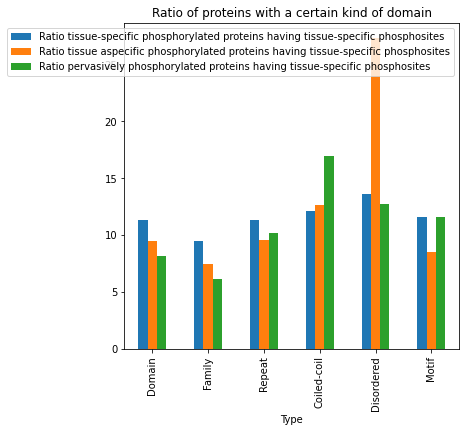

In [320]:
df_types_tissue["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"] = df_types_tissue["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]*100/df_types_tissue["Number of proteins in UniProtKB"]
df_types_tissue["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"] = df_types_tissue["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]*100/df_types_tissue["Number of proteins in UniProtKB"]
df_types_tissue["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"] = df_types_tissue["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]*100/df_types_tissue["Number of proteins in UniProtKB"]

df_types_tissue[["Type", "Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites", "Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites", "Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]].plot(kind="bar", x="Type", figsize=(6,6), title="Ratio of proteins with a certain kind of domain")
#plt.savefig("WP2 Pfam_annotation_phosphosites.png", format="png", bbox_inches="tight")

In [321]:
df_gr_clan_tspec = tspecsites_tspecproteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_tspec.rename({"ACC_ID": "Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_clan_tspec.set_index(["clan"], inplace=True)
df_gr_clan_taspec = tspecsites_taspecproteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_taspec.rename({"ACC_ID": "Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_clan_taspec.set_index(["clan"], inplace=True)
df_gr_clan_gen = tspecsites_genproteins_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_gen.rename({"ACC_ID": "Number of pervasively phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_clan_gen.set_index(["clan"], inplace=True)
df_gr_clan_uni = Uniprot_pfam.groupby(["clan"], as_index=False)["ACC_ID"].nunique()
df_gr_clan_uni.rename({"ACC_ID": "Number of proteins from Uniprot"}, axis=1, inplace=True)

df_gr_clan_data = pd.concat([df_gr_clan_tspec, df_gr_clan_taspec, df_gr_clan_gen])

df_gr_clan_data.reset_index(inplace=True)
df_gr_clan_data.rename({"index": "clan"}, axis=1, inplace=True)
df_gr_clan_data

clan  \
0     CL0001   
1     CL0003   
2     CL0004   
3     CL0005   
4     CL0006   
..       ...   
806   CL0702   
807   CL0705   
808   CL0718   
809   CL0719   
810  No_clan   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                                 35.0                                       
1                                                 24.0                                       
2                                                 15.0                                       
3                                                  5.0                                       
4                                                 11.0                                       
..                                                 ...                                       
806                                                NaN                                       
807                                                NaN                                       
808                                                NaN                                       
809                                                NaN                                       
810                                                NaN                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                                  NaN                                        
1                                                  NaN                                        
2                                                  NaN                                        
3                                                  NaN                                        
4                                                  NaN                                        
..                                                 ...                                        
806                                                NaN                                        
807                                                NaN                                        
808                                                NaN                                        
809                                                NaN                                        
810                                                NaN                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  
0                                                  NaN                                  
1                                                  NaN                                  
2                                                  NaN                                  
3                                                  NaN                                  
4                                                  NaN                                  
..                                                 ...                                  
806                                                2.0                                  
807                                                5.0                                  
808                                                1.0                                  
809                                                3.0                                  
810                                              679.0                                  

[811 rows x 4 columns]

In [322]:
df_gr_clan_all = pd.merge(df_gr_clan_data, df_gr_clan_uni, how="inner", on=["clan"])
df_gr_clan_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"] = df_gr_clan_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_clan_all["Number of proteins from Uniprot"]
df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"] = df_gr_clan_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_clan_all["Number of proteins from Uniprot"]
df_gr_clan_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"] = df_gr_clan_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_clan_all["Number of proteins from Uniprot"]
df_gr_clan_all = df_gr_clan_all.groupby(["clan"], as_index=False).max()
df_gr_clan_all.sort_values("clan", inplace=True)

df_gr_clan_all

clan  \
0     CL0001   
1     CL0003   
2     CL0004   
3     CL0005   
4     CL0006   
..       ...   
382   CL0718   
383   CL0719   
384   CL0720   
385   CL0721   
386  No_clan   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                                 35.0                                       
1                                                 24.0                                       
2                                                 15.0                                       
3                                                  5.0                                       
4                                                 11.0                                       
..                                                 ...                                       
382                                                2.0                                       
383                                                1.0                                       
384                                                1.0                                       
385                                                NaN                                       
386                                              849.0                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                                 22.0                                        
1                                                 19.0                                        
2                                                 16.0                                        
3                                                  1.0                                        
4                                                 12.0                                        
..                                                 ...                                        
382                                                2.0                                        
383                                                1.0                                        
384                                                NaN                                        
385                                                1.0                                        
386                                              782.0                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
0                                                  9.0                                   
1                                                 11.0                                   
2                                                  7.0                                   
3                                                  1.0                                   
4                                                 14.0                                   
..                                                 ...                                   
382                                                1.0                                   
383                                                3.0                                   
384                                                NaN                                   
385                                                NaN                                   
386                                              679.0                                   

     Number of proteins from Uniprot  \
0                                245   
1                                114   
2                                205   
3                                 45   
4                                 68   
..                               ...   
382                                5   
383                                5   
384                                3   
385                                7   
386                     

In [323]:
print(df_gr_clan_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"].describe())
print(df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"].describe())
print(df_gr_clan_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"].describe())

count    306.000000
mean      18.757898
std       15.432075
min        1.265823
25%       10.000000
50%       14.441277
75%       22.195513
max      100.000000
Name: Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites, dtype: float64
count    265.000000
mean      15.267901
std       14.292917
min        0.581395
25%        6.250000
50%       11.111111
75%       20.000000
max      100.000000
Name: Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites, dtype: float64
count    240.000000
mean      18.785061
std       18.834872
min        0.116144
25%        6.639344
50%       13.778819
75%       23.190045
max      100.000000
Name: Ratio pervasively phosphorylated proteins having tissue-specific phosphosites, dtype: float64


In [324]:
whisker_tspec = 1.5*(22.20-10)
whisker_taspec = 1.5*(20-6.25)
whisker_gen =  1.5*(23.19-6.64)

<AxesSubplot:title={'center':'Ratio of clans in each of the three categories'}, xlabel='clan'>

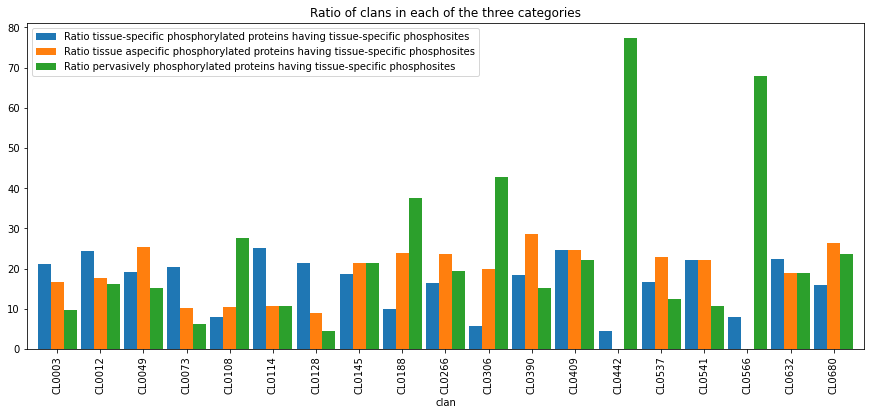

In [325]:
df_gr_clan_all[(((df_gr_clan_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_clan_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>=10))|
              ((df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>whisker_taspec)&(df_gr_clan_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>=10))|
               ((df_gr_clan_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]>whisker_gen)&(df_gr_clan_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]>=10)))][["clan",
   "Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites", "Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites",
    "Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]].plot(kind="bar", x="clan", figsize=(15,6), width=0.9, title="Ratio of clans in each of the three categories")
#plt.savefig("WP2 Pfam_clan_phosphosites.png", format="png", bbox_inches="tight")

In [326]:
df_gr_clan_all[(df_gr_clan_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_clan_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>=10)]

clan  \
1    CL0003   
9    CL0012   
38   CL0049   
60   CL0073   
90   CL0114   
101  CL0128   
109  CL0145   
247  CL0390   
256  CL0409   
313  CL0541   
350  CL0632   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1                                                 24.0                                       
9                                                 18.0                                       
38                                                19.0                                       
60                                                10.0                                       
90                                                14.0                                       
101                                               19.0                                       
109                                               13.0                                       
247                                               22.0                                       
256                                               20.0                                       
313                                               23.0                                       
350                                               13.0                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1                                                 19.0                                        
9                                                 13.0                                        
38                                                25.0                                        
60                                                 5.0                                        
90                                                 6.0                                        
101                                                8.0                                        
109                                               15.0                                        
247                                               34.0                                        
256                                               20.0                                        
313                                               23.0                                        
350                                               11.0                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
1                                                 11.0                                   
9                                                 12.0                                   
38                                                15.0                                   
60                                                 3.0                                   
90                                                 6.0                                   
101                                                4.0                                   
109                                               15.0                                   
247                                               18.0                                   
256                                               18.0                                   
313                                               11.0                                   
350                                               11.0                                   

     Number of proteins from Uniprot  \
1                                114   
9                                 74   
38                                99   
60                                49   
90                                56   
101                               89   
109                               70   
247                              119   
256                               81   
313                              104   
350                               5

In [327]:
df_gr_clan_all[(df_gr_clan_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_clan_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>=10)]

clan  \
7    CL0010   
13   CL0016   
38   CL0049   
109  CL0145   
135  CL0188   
182  CL0266   
247  CL0390   
256  CL0409   
282  CL0466   
310  CL0537   
313  CL0541   
350  CL0632   
365  CL0671   
369  CL0680   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
7                                                 35.0                                       
13                                                79.0                                       
38                                                19.0                                       
109                                               13.0                                       
135                                                8.0                                       
182                                               63.0                                       
247                                               22.0                                       
256                                               20.0                                       
282                                               22.0                                       
310                                                8.0                                       
313                                               23.0                                       
350                                               13.0                                       
365                                                9.0                                       
369                                                6.0                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
7                                                 49.0                                        
13                                               102.0                                        
38                                                25.0                                        
109                                               15.0                                        
135                                               19.0                                        
182                                               91.0                                        
247                                               34.0                                        
256                                               20.0                                        
282                                               27.0                                        
310                                               11.0                                        
313                                               23.0                                        
350                                               11.0                                        
365                                               11.0                                        
369                                               10.0                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
7                                                 54.0                                   
13                                                76.0                                   
38                                                15.0                                   
109                                               15.0                                   
135                                               30.0                                   
182                                               75.0                                   
247                                               18.0                                   
256                                               18.0                                   
282                                               26.0                                   
310                                         

In [328]:
df_gr_clan_all[(df_gr_clan_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_clan_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]>=10)]

clan  \
4    CL0006   
5    CL0007   
7    CL0010   
85   CL0108   
109  CL0145   
135  CL0188   
152  CL0221   
182  CL0266   
207  CL0306   
256  CL0409   
270  CL0442   
282  CL0466   
323  CL0566   
350  CL0632   

     Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
4                                                 11.0                                       
5                                                  5.0                                       
7                                                 35.0                                       
85                                                 6.0                                       
109                                               13.0                                       
135                                                8.0                                       
152                                               25.0                                       
182                                               63.0                                       
207                                                2.0                                       
256                                               20.0                                       
270                                                1.0                                       
282                                               22.0                                       
323                                                2.0                                       
350                                               13.0                                       

     Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
4                                                 12.0                                        
5                                                  5.0                                        
7                                                 49.0                                        
85                                                 8.0                                        
109                                               15.0                                        
135                                               19.0                                        
152                                               39.0                                        
182                                               91.0                                        
207                                                7.0                                        
256                                               20.0                                        
270                                                NaN                                        
282                                               27.0                                        
323                                                NaN                                        
350                                               11.0                                        

     Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
4                                                 14.0                                   
5                                                 10.0                                   
7                                                 54.0                                   
85                                                21.0                                   
109                                               15.0                                   
135                                               30.0                                   
152                                               53.0                                   
182                                               75.0                                   
207                                               15.0                                   
256                                         

In [329]:
df_gr_hmm_tspec = tspecsites_tspecproteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_tspec.rename({"ACC_ID": "Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_hmm_tspec.set_index(["hmm name"], inplace=True)
df_gr_hmm_taspec = tspecsites_taspecproteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_taspec.rename({"ACC_ID": "Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_hmm_taspec.set_index(["hmm name"], inplace=True)
df_gr_hmm_gen = tspecsites_genproteins_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_gen.rename({"ACC_ID": "Number of pervasively phosphorylated proteins having tissue-specific phosphosites"}, axis=1, inplace=True)
df_gr_hmm_gen.set_index(["hmm name"], inplace=True)
df_gr_hmm_uni = Uniprot_pfam.groupby(["hmm name"], as_index=False)["ACC_ID"].nunique()
df_gr_hmm_uni.rename({"ACC_ID": "Number of proteins from Uniprot"}, axis=1, inplace=True)

df_gr_hmm_data = pd.concat([df_gr_hmm_tspec, df_gr_hmm_taspec, df_gr_hmm_gen])

df_gr_hmm_data.reset_index(inplace=True)
df_gr_hmm_data.rename({"index": "hmm name"}, axis=1, inplace=True)
df_gr_hmm_data

hmm name  \
0           14-3-3   
1       2-Hacid_dh   
2     2-Hacid_dh_C   
3     2OG-FeII_Oxy   
4      5_nucleotid   
...            ...   
4519        zf-UBP   
4520    zf-UBP_var   
4521        zf-UBR   
4522    zf-piccolo   
4523    zf_C2H2_10   

      Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                                   1.0                                       
1                                                   1.0                                       
2                                                   1.0                                       
3                                                   1.0                                       
4                                                   1.0                                       
...                                                 ...                                       
4519                                                NaN                                       
4520                                                NaN                                       
4521                                                NaN                                       
4522                                                NaN                                       
4523                                                NaN                                       

      Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                                   NaN                                        
1                                                   NaN                                        
2                                                   NaN                                        
3                                                   NaN                                        
4                                                   NaN                                        
...                                                 ...                                        
4519                                                NaN                                        
4520                                                NaN                                        
4521                                                NaN                                        
4522                                                NaN                                        
4523                                                NaN                                        

      Number of pervasively phosphorylated proteins having tissue-specific phosphosites  
0                                                   NaN                                  
1                                                   NaN                                  
2                                                   NaN                                  
3                                                   NaN                                  
4                                                   NaN                                  
...                                                 ...                                  
4519                                                4.0                                  
4520                                                1.0                                  
4521                                                1.0                                  
4522                                                2.0                                  
4523                                                1.0                                  

[4524 rows x 4 columns]

In [330]:
df_gr_hmm_all = pd.merge(df_gr_hmm_data, df_gr_hmm_uni, how="inner", on=["hmm name"])
df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"] = df_gr_hmm_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_hmm_all["Number of proteins from Uniprot"]
df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"] = df_gr_hmm_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_hmm_all["Number of proteins from Uniprot"]
df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"] = df_gr_hmm_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]*100/df_gr_hmm_all["Number of proteins from Uniprot"]
df_gr_hmm_all = df_gr_hmm_all.groupby(["hmm name"], as_index=False).max()
df_gr_hmm_all.sort_values("hmm name", inplace=True)

df_gr_hmm_all

hmm name  \
0         1-cysPrx_C   
1             14-3-3   
2         2-Hacid_dh   
3       2-Hacid_dh_C   
4       2-oxoacid_dh   
...              ...   
3184       zf_CCCH_4   
3185       zf_CCCH_5   
3186        zf_Hakai   
3187  zinc_ribbon_10   
3188   zinc_ribbon_2   

      Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
0                                                   NaN                                       
1                                                   1.0                                       
2                                                   1.0                                       
3                                                   1.0                                       
4                                                   NaN                                       
...                                                 ...                                       
3184                                                1.0                                       
3185                                                NaN                                       
3186                                                1.0                                       
3187                                                NaN                                       
3188                                                NaN                                       

      Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
0                                                   2.0                                        
1                                                   NaN                                        
2                                                   NaN                                        
3                                                   NaN                                        
4                                                   1.0                                        
...                                                 ...                                        
3184                                                NaN                                        
3185                                                1.0                                        
3186                                                NaN                                        
3187                                                1.0                                        
3188                                                1.0                                        

      Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
0                                                   2.0                                   
1                                                   6.0                                   
2                                                   NaN                                   
3                                                   NaN                                   
4                                                   1.0                                   
...                                                 ...                                   
3184                                                NaN                                   
3185                                                NaN                                   
3186                                                NaN                                   
3187                                                NaN                                   
3188                                                NaN                                   

      Number of proteins from Uniprot  \
0                                   5   
1                                   7   
2                                   4   
3                                   4   
4                                   4   
...                               ...   
3184                                2   
3185    

In [331]:
print(df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"].describe())
print(df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"].describe())
print(df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"].describe())

count    1675.000000
mean       44.169992
std        33.333376
min         0.941176
25%        16.666667
50%        33.333333
75%        60.000000
max       100.000000
Name: Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites, dtype: float64
count    1533.000000
mean       47.777491
std        34.535483
min         0.554017
25%        18.181818
50%        33.333333
75%       100.000000
max       100.000000
Name: Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites, dtype: float64
count    1316.000000
mean       48.933820
std        34.360419
min         0.738916
25%        20.000000
50%        41.123188
75%       100.000000
max       100.000000
Name: Ratio pervasively phosphorylated proteins having tissue-specific phosphosites, dtype: float64


In [332]:
whisker_tspec = df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"].mean()
whisker_taspec = df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"].mean()
whisker_gen = df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"].mean()
if whisker_tspec > 100:
    whisker_tspec = 100
if whisker_taspec > 100:
    whisker_taspec = 100
if whisker_gen > 100:
    whisker_gen = 100

<AxesSubplot:title={'center':'Ratio domains in each of the three categories'}, xlabel='hmm name'>

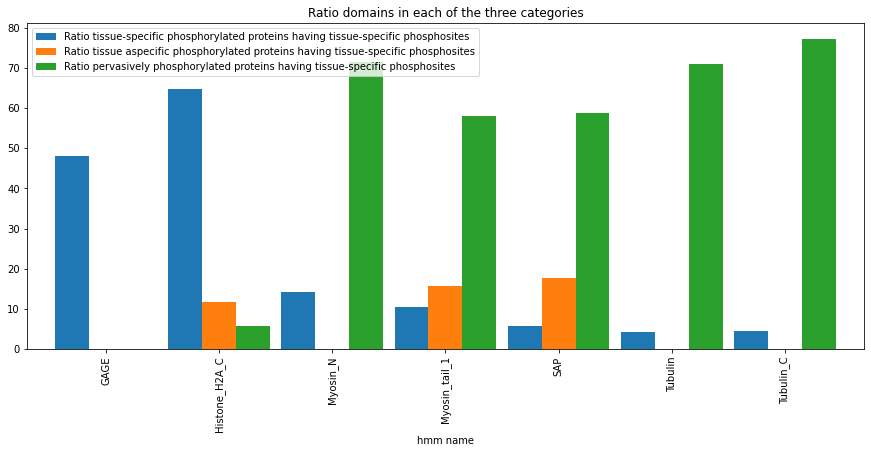

In [333]:
df_gr_hmm_all[(((df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_hmm_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>=10))|
              ((df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>whisker_taspec)&(df_gr_hmm_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>=10))|
               ((df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]>whisker_gen)&(df_gr_hmm_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]>=10)))][["hmm name",
   "Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites",
   "Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites",
    "Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]].plot(kind="bar", x="hmm name", figsize=(15,6), width=0.9, title="Ratio domains in each of the three categories")

In [334]:
print(whisker_tspec)
print(whisker_taspec)
print(whisker_gen)

44.16999242394368
47.777491266430225
48.933819650346166


In [335]:
df_gr_hmm_all[(((df_gr_hmm_all["Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_hmm_all["Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites"]>=10)))]

hmm name  \
1094           GAGE   
1285  Histone_H2A_C   

      Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1094                                               13.0                                       
1285                                               11.0                                       

      Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1094                                                NaN                                        
1285                                                2.0                                        

      Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
1094                                                NaN                                   
1285                                                1.0                                   

      Number of proteins from Uniprot  \
1094                               27   
1285                               17   

      Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1094                                          48.148148                                   
1285                                          64.705882                                   

      Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1094                                                NaN                                    
1285                                          11.764706                                    

      Ratio pervasively phosphorylated proteins having tissue-specific phosphosites  
1094                                                NaN                              
1285                                           5.882353

In [336]:
df_gr_hmm_all[(((df_gr_hmm_all["Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_hmm_all["Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites"]>=10)))]

Empty DataFrame
Columns: [hmm name, Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites, Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites, Number of pervasively phosphorylated proteins having tissue-specific phosphosites, Number of proteins from Uniprot, Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites, Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites, Ratio pervasively phosphorylated proteins having tissue-specific phosphosites]
Index: []

In [337]:
df_gr_hmm_all[(((df_gr_hmm_all["Ratio pervasively phosphorylated proteins having tissue-specific phosphosites"]>whisker_tspec)&(df_gr_hmm_all["Number of pervasively phosphorylated proteins having tissue-specific phosphosites"]>=10)))]

hmm name  \
1712       Myosin_N   
1715  Myosin_tail_1   
2461            SAP   
2866        Tubulin   
2869      Tubulin_C   

      Number of tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1712                                                2.0                                       
1715                                                2.0                                       
2461                                                1.0                                       
2866                                                1.0                                       
2869                                                1.0                                       

      Number of tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1712                                                NaN                                        
1715                                                3.0                                        
2461                                                3.0                                        
2866                                                NaN                                        
2869                                                NaN                                        

      Number of pervasively phosphorylated proteins having tissue-specific phosphosites  \
1712                                               10.0                                   
1715                                               11.0                                   
2461                                               10.0                                   
2866                                               17.0                                   
2869                                               17.0                                   

      Number of proteins from Uniprot  \
1712                               14   
1715                               19   
2461                               17   
2866                               24   
2869                               22   

      Ratio tissue-specific phosphorylated proteins having tissue-specific phosphosites  \
1712                                          14.285714                                   
1715                                          10.526316                                   
2461                                           5.882353                                   
2866                                           4.166667                                   
2869                                           4.545455                                   

      Ratio tissue aspecific phosphorylated proteins having tissue-specific phosphosites  \
1712                                                NaN                                    
1715                                          15.789474                                    
2461                                          17.647059                                    
2866                                                NaN                                    
2869                                                NaN                                    

      Ratio pervasively phosphorylated proteins having tissue-specific phosphosites  
1712                                          71.428571                              
1715                                          57.894737                              
2461                                          58.823529                              
2866                                          70.833333                              
2869                                          77.272727